In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
train_df=pd.read_csv('df-train_set.csv')

In [5]:
test_df_1=pd.read_csv('df-test_set.csv')
test_df_1.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [6]:
train_df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [9]:
train_df.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,64376.000000,64376.000000,64376.000000,6.437600e+04,64376.000000,64376.000000,64376.000000,64376.00
mean,12.781592,75.651938,89.607858,1.939501e+04,446.104402,3336.641295,477.646328,NaN
std,35.943052,159.508144,172.223177,4.442192e+04,1184.169758,7682.295441,1453.892091,NaN
min,0.120000,1.000000,1.000000,-5.770000e+04,-595.000000,-5040.000000,-512.000000,-inf
25%,7.000000,30.000000,35.000000,1.154000e+03,20.000000,175.000000,0.000000,4.02
50%,10.000000,46.000000,55.000000,5.400000e+03,107.000000,940.000000,76.000000,6.00
75%,11.000000,80.000000,100.000000,1.877200e+04,390.000000,3250.000000,381.000000,8.67
max,500.000000,4400.000000,4400.000000,1.134701e+06,39453.000000,192230.000000,93193.000000,inf


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


In [13]:
train_df.isna().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [7]:
apple_df = train_df.loc[train_df['Commodities'] == 'APPLE GOLDEN DELICIOUS']
apple_df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [8]:
apple_df["Date"] = apple_df["Date"].apply(pd.to_datetime)

In [9]:
apple_df.drop('Date1' ,axis=1)

KeyError: "['Date1'] not found in axis"

In [50]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1952 non-null   object        
 1   Container         1952 non-null   object        
 2   Size_Grade        1952 non-null   object        
 3   Weight_Kg         1952 non-null   float64       
 4   Commodities       1952 non-null   object        
 5   Date              1952 non-null   datetime64[ns]
 6   Low_Price         1952 non-null   float64       
 7   High_Price        1952 non-null   float64       
 8   Sales_Total       1952 non-null   float64       
 9   Total_Qty_Sold    1952 non-null   int64         
 10  Total_Kg_Sold     1952 non-null   float64       
 11  Stock_On_Hand     1952 non-null   int64         
 12  avg_price_per_kg  1952 non-null   float64       
 13  Date1             1952 non-null   datetime64[ns]
dtypes: datetime64[ns](2), f

In [10]:
def to_season(m):
    if 9<= m<= 11:
        return "spring"
    if 1<= m<= 2:
        return "summer"
    if m == 12:
        return "summer"
    if 3<= m<= 5:
        return "autumn"
    if 6<= m<= 8:
        return "winter"


In [11]:
apple_df["Season"] = apple_df["Date"].dt.month.map(to_season)

In [57]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1952 non-null   object        
 1   Container         1952 non-null   object        
 2   Size_Grade        1952 non-null   object        
 3   Weight_Kg         1952 non-null   float64       
 4   Commodities       1952 non-null   object        
 5   Date              1952 non-null   datetime64[ns]
 6   Low_Price         1952 non-null   float64       
 7   High_Price        1952 non-null   float64       
 8   Sales_Total       1952 non-null   float64       
 9   Total_Qty_Sold    1952 non-null   int64         
 10  Total_Kg_Sold     1952 non-null   float64       
 11  Stock_On_Hand     1952 non-null   int64         
 12  avg_price_per_kg  1952 non-null   float64       
 13  Date1             1952 non-null   datetime64[ns]
 14  season            1952 

In [12]:
apple_df.drop(columns=['season', 'Date1'], inplace=True)
 

KeyError: "['season' 'Date1'] not found in axis"

In [59]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1952 non-null   object        
 1   Container         1952 non-null   object        
 2   Size_Grade        1952 non-null   object        
 3   Weight_Kg         1952 non-null   float64       
 4   Commodities       1952 non-null   object        
 5   Date              1952 non-null   datetime64[ns]
 6   Low_Price         1952 non-null   float64       
 7   High_Price        1952 non-null   float64       
 8   Sales_Total       1952 non-null   float64       
 9   Total_Qty_Sold    1952 non-null   int64         
 10  Total_Kg_Sold     1952 non-null   float64       
 11  Stock_On_Hand     1952 non-null   int64         
 12  avg_price_per_kg  1952 non-null   float64       
 13  Season            1952 non-null   object        
dtypes: datetime64[ns](1), f

In [13]:
apple_copy = apple_df.copy()

In [14]:
apple_copy.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Season
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,spring
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,autumn
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11,autumn
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,autumn
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50,spring


In [18]:
apple_df.isna().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
Season              0
dtype: int64

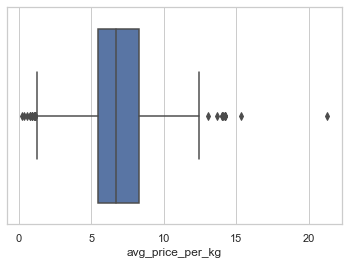

In [19]:
import seaborn as sns

sns.set_theme(style="whitegrid")



ax = sns.boxplot(x='avg_price_per_kg', data=apple_copy)

In [15]:
# dummy encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [16]:
ohe.fit_transform(apple_copy[['Province','Container','Size_Grade','Date','Season']])

<1952x179 sparse matrix of type '<class 'numpy.float64'>'
	with 9760 stored elements in Compressed Sparse Row format>

In [17]:
ohe.categories_

[array(['CAPE', 'EASTERN CAPE', 'NATAL', 'ORANGE FREE STATE', 'TRANSVAAL',
        'W.CAPE-BERGRIVER ETC', 'WEST COAST'], dtype=object),
 array(['AC030', 'DT063', 'EC120', 'EF120', 'EG140', 'IA400', 'JE090',
        'JG110', 'M4183', 'M6125', 'M9125'], dtype=object),
 array(['1L', '1M', '1S', '1U', '1X', '2L', '2M', '2S', '2U', '2X'],
       dtype=object),
 array(['2019-12-11T00:00:00.000000000', '2019-12-12T00:00:00.000000000',
        '2019-12-14T00:00:00.000000000', '2019-12-23T00:00:00.000000000',
        '2019-12-30T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
        '2020-01-03T00:00:00.000000000', '2020-01-04T00:00:00.000000000',
        '2020-01-06T00:00:00.000000000', '2020-01-08T00:00:00.000000000',
        '2020-01-09T00:00:00.000000000', '2020-01-10T00:00:00.000000000',
        '2020-01-11T00:00:00.000000000', '2020-01-13T00:00:00.000000000',
        '2020-01-14T00:00:00.000000000', '2020-01-16T00:00:00.000000000',
        '2020-01-20T00:00:00.000000000', '2020-01

In [18]:
apple_copy_x= apple_copy.drop('avg_price_per_kg', axis=1)

In [19]:
apple_copy.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Season
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,spring
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,autumn
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11,autumn
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,autumn
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50,spring


In [24]:
pip install lazypredict --user

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install pyforest 


Note: you may need to restart the kernel to use updated packages.


In [102]:
pip install lazypredict

In [20]:
# Importing important libraries
import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix# Scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error# Hide warnings
import warnings
warnings.filterwarnings('ignore')# Setting up max columns displayed to 100
pd.options.display.max_columns = 100

In [27]:
apple_copy_x.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Season
1,CAPE,M4183,1L,18.30,APPLE GOLDEN DELICIOUS,2020-09-09,150.00,170.00,51710.00,332,6075.60,822,spring
7,CAPE,JG110,2M,11.00,APPLE GOLDEN DELICIOUS,2020-04-14,50.00,50.00,16000.00,320,3520.00,0,autumn
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.00,APPLE GOLDEN DELICIOUS,2020-04-16,55.00,55.00,990.00,18,162.00,1506,autumn
40,CAPE,M4183,1S,18.30,APPLE GOLDEN DELICIOUS,2020-05-04,80.00,120.00,32020.00,388,7100.40,443,autumn
69,EASTERN CAPE,IA400,1S,400.00,APPLE GOLDEN DELICIOUS,2020-09-28,1800.00,1800.00,1800.00,1,400.00,2,spring


In [28]:
from sklearn.model_selection import train_test_split

In [21]:
# Creating train test split
X = apple_copy.drop(columns=['avg_price_per_kg'])
y = apple_copy['avg_price_per_kg']# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3,test_size=0.25)

<IPython.core.display.Javascript object>

In [30]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:23<00:00,  1.80it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.90       0.90  0.72        1.46
XGBRegressor                                 0.90       0.90  0.72        1.49
HistGradientBoostingRegressor                0.90       0.90  0.72        4.25
LGBMRegressor                                0.90       0.90  0.73        0.65
RandomForestRegressor                        0.89       0.89  0.76        1.68
GradientBoostingRegressor                    0.88       0.89  0.78        0.71
BaggingRegressor                             0.88       0.88  0.79        0.34
ExtraTreeRegressor                           0.86       0.86  0.86        0.11
MLPRegressor                                 0.85       0.86  0.88        4.97
DecisionTreeRegressor                        0.83       0.83  0.94        0.13
SVR                                          0.79   

In [36]:
extra_tree = ExtraTreesRegressor()
et = extra_tree.fit(X_train,y_train)
et

ValueError: could not convert string to float: 'NATAL'

In [37]:
X_train

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Season
50194,NATAL,AC030,2S,3.00,APPLE GOLDEN DELICIOUS,2020-04-09,10.00,10.00,20.00,2,6.00,8,autumn
50103,EASTERN CAPE,EC120,1S,12.00,APPLE GOLDEN DELICIOUS,2020-03-20,36.00,36.00,3240.00,90,1080.00,0,autumn
31229,CAPE,JE090,2U,9.00,APPLE GOLDEN DELICIOUS,2020-04-07,40.00,50.00,330.00,8,72.00,54,autumn
51283,CAPE,M4183,1S,18.30,APPLE GOLDEN DELICIOUS,2020-04-23,100.00,100.00,2100.00,21,384.30,195,autumn
8648,CAPE,EC120,1S,12.00,APPLE GOLDEN DELICIOUS,2020-06-22,60.00,112.00,23778.00,288,3456.00,1623,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40477,CAPE,JE090,2M,9.00,APPLE GOLDEN DELICIOUS,2020-04-01,40.00,55.00,12300.00,303,2727.00,466,autumn
58127,W.CAPE-BERGRIVER ETC,M4183,1M,18.30,APPLE GOLDEN DELICIOUS,2020-01-16,144.00,144.00,18432.00,128,2342.40,0,summer
48684,W.CAPE-BERGRIVER ETC,EC120,1M,12.00,APPLE GOLDEN DELICIOUS,2020-06-22,120.00,120.00,7680.00,64,768.00,0,winter
58619,EASTERN CAPE,JE090,2M,9.00,APPLE GOLDEN DELICIOUS,2020-01-24,65.00,80.00,11490.00,170,1530.00,190,summer


In [26]:
# Explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting# Now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor

In [27]:
# Evaluation Functions
def rmse(model, y_test, y_pred, X_train, y_train):
 r_squared = model.score(X_test, y_test)
 mse = mean_squared_error(y_test, y_pred)
 rmse = np.sqrt(mse)
 print('R-squared: ' + str(r_squared))
 print('Mean Squared Error: '+ str(rmse))# Create model line scatter plot

def scatter_plot(y_test, y_pred, model_name):
    plt.figure(figsize=(10,6))
    sns.residplot(y_test, y_pred, lowess=True, color='#4682b4',
              line_kws={'lw': 2, 'color': 'r'})
    plt.title(str('Price vs Residuals for '+ model_name))
    plt.xlabel('Price',fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

In [22]:
#important
df = apple_df.copy()
df.drop(['Commodities','Date'], axis = 1, inplace = True)
df.head()

,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Season
1,CAPE,M4183,1L,18.30,150.00,170.00,51710.00,332,6075.60,822,8.51,spring
7,CAPE,JG110,2M,11.00,50.00,50.00,16000.00,320,3520.00,0,4.55,autumn
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.00,55.00,55.00,990.00,18,162.00,1506,6.11,autumn
40,CAPE,M4183,1S,18.30,80.00,120.00,32020.00,388,7100.40,443,4.51,autumn
69,EASTERN CAPE,IA400,1S,400.00,1800.00,1800.00,1800.00,1,400.00,2,4.50,spring


In [23]:
nums = pd.get_dummies(df, columns=['Province','Container','Size_Grade','Season'], drop_first = True)
nums.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,Province_TRANSVAAL,Province_W.CAPE-BERGRIVER ETC,Province_WEST COAST,Container_DT063,Container_EC120,Container_EF120,Container_EG140,Container_IA400,Container_JE090,Container_JG110,Container_M4183,Container_M6125,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_spring,Season_summer,Season_winter
1,18.30,150.00,170.00,51710.00,332,6075.60,822,8.51,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,11.00,50.00,50.00,16000.00,320,3520.00,0,4.55,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
24,9.00,55.00,55.00,990.00,18,162.00,1506,6.11,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
40,18.30,80.00,120.00,32020.00,388,7100.40,443,4.51,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
69,400.00,1800.00,1800.00,1800.00,1,400.00,2,4.50,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [24]:
x = nums.drop(['avg_price_per_kg'],axis =1)
y = nums['avg_price_per_kg']

In [50]:
# extra_tree = ExtraTreesRegressor()
# et = extra_tree.fit(x,y)
# et

ExtraTreesRegressor()

In [31]:
test_df = test_df_1.copy()

In [32]:
#same thing on test to prepare for modelling
test_df["Date"] = test_df["Date"].apply(pd.to_datetime)
test_df["Season"] = test_df["Date"].dt.month.map(to_season)

test_df.drop(['Commodities','Date','Index'], axis = 1, inplace = True)

test_nums = pd.get_dummies(test_df, columns=['Province','Container','Size_Grade','Season'], drop_first = True)

# test_nums.head()

In [70]:
# # Use the model to make predictions
# predicted_prices = et.predict(test_nums)
# # We will look at the predicted prices to ensure we have something sensible.
# print(predicted_prices)

[10.769  11.9815 10.      8.74    8.0592  4.65    3.64    7.6328  9.1077
  9.2882  5.4536  5.7424  8.7904  4.4459  4.5482  6.11    8.0357  4.5729
 10.8464  6.2196  5.6253  4.7576  5.8653  7.78    5.56    6.8746  7.7205
  7.9703  7.6049  7.1398  7.9289  5.57   10.1221  7.65    4.87    9.847
 10.9443 11.459   6.3617  6.7695  8.1248  8.635   4.92    6.1785  5.56
  5.3184  5.      5.5671  6.11    4.9705  1.6227  6.2464  5.8602 14.1979
  8.6798  6.1986 12.3167  9.2348  7.6341  5.9211  7.7631 11.3262  6.1973
  9.2162  6.3374  6.2159  6.9752  5.2822  5.5841  7.0951  5.4191  4.6162
  2.9     8.      6.8184  4.9979  6.1128  9.2775 10.9403  6.2331  5.8838
  5.      5.9     5.56    1.11    5.9655  7.143  11.3895  4.8304  7.311
  9.3955  9.5506  7.1922  6.0899  6.      6.6843  8.624   8.6735  6.91
  5.56   11.285   6.4802  6.      7.65    6.9521  8.7177  7.6413  2.73
 10.      5.      4.6308  7.82    6.11    4.24    7.2953 10.      5.4409
  9.5424  4.44    6.6208  5.95    4.1751  9.97    4.502   8

In [71]:
# my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# # you could use any filename. We choose submission here
# my_submission.to_csv('extra_tree_regressor.csv', index=False) #0.58 on leaderboard

In [72]:
my_submission.head()

,Index,avg_price_per_kg
0,1,10.77
1,2,11.98
2,3,10.00
3,4,8.74
4,5,8.06


In [73]:
#random forest
# rf = RandomForestRegressor()
# rf_mod = rf.fit(x,y)

# # Use the model to make predictions
# predicted_prices = rf_mod.predict(test_nums)

# my_submission_2 = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# # you could use any filename. We choose submission here
# my_submission_2.to_csv('random_forest.csv', index=False)#0.482 on leaderboard

<IPython.core.display.Javascript object>

In [14]:
def model_submitter(name_of_model):
    model = name_of_model
    mod = model.fit(x,y)

    # Use the model to make predictions
    predicted_prices = mod.predict(test_nums)

    my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
    # you could use any filename. We choose submission here
    return my_submission.to_csv('{}.csv'.format(name_of_model), index=False)

In [91]:
# model_submitter(DecisionTreeRegressor())#0.7

ValueError: setting an array element with a sequence.

In [84]:
# pip install catboost

^C
Note: you may need to restart the kernel to use updated packages.


In [45]:
from sklearn.linear_model       import LinearRegression, Lasso, Ridge
from sklearn.tree               import DecisionTreeRegressor
from sklearn.ensemble           import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost.sklearn            import XGBRegressor
from lightgbm                   import LGBMRegressor
# from catboost                   import CatBoostRegressor

In [24]:
# models_to_test = [Lasso(), Ridge(), GradientBoostingRegressor(),BaggingRegressor(), AdaBoostRegressor()]
#model_submitter(Lasso())#1.67
# model_submitter(GradientBoostingRegressor())#0.55
# model_submitter(BaggingRegressor())#0.52
# model_submitter(AdaBoostRegressor())#1.20
# model_submitter(LGBMRegressor()) #0.53

In [81]:
model_submitter(LinearRegression())#1.67

In [26]:
#hyperparam opt for random forest, random hyperparameters
n_estimators = [10,50]
max_depth = [5, 10]
min_samples_split = [10, 15]
min_samples_leaf = [ 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)


from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor(random_state = 1)
gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)

bestF = gridF.fit(x, y)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed: 13.3min finished


Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed: 12.9min finished


FileNotFoundError: [Errno 2] No such file or directory: "GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,\n             param_grid={'max_depth': [5, 10, 15, 20],\n                         'min_samples_leaf': [1, 2, 5, 10],\n                         'min_samples_split': [5, 10, 15, 100],\n                         'n_estimators': [100, 300, 500, 800]},\n             verbose=1).csv"

In [29]:
# bestF.best_estimator_

RandomForestRegressor(max_depth=15, min_samples_split=5, n_estimators=300,
                      random_state=1)

In [33]:
# brf = RandomForestRegressor(max_depth=15, min_samples_split=5, n_estimators=300,random_state=1)
# mod = brf.fit(x,y)

# # Use the model to make predictions
# predicted_prices = mod.predict(test_nums)

# my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# # you could use any filename. We choose submission here
# my_submission.to_csv('best_random_forest.csv', index=False)#0.50

In [ ]:
#standardising 
from sklearnarn

In [26]:
from sklearn.svm import SVR

In [27]:
# Instantiate support vector regression model
sv_reg = SVR(kernel='rbf', gamma='auto')

In [28]:
sv_reg.fit(x,y)

SVR(gamma='auto')

In [33]:
y_pred = sv_reg.predict(test_nums)


In [34]:
my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': y_pred})
    # you could use any filename. We choose submission here
my_submission.to_csv('SVR.csv', index=False) #SVM 1.99 on kaggle


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# #x_scaler = StandardScaler()
# y_scaler = StandardScaler()

# # Normalise X and y
# x_scaled = x_scaler.fit_transform(x[:,np.newaxis]) 
# y_scaled = y_scaler.fit_transform(y[:,np.newaxis]) 

In [40]:
# create scaler object
scaler = StandardScaler()
# create scaled version of the predictors (there is no need to scale the response)
x_scaled = scaler.fit_transform(x)

# convert the scaled predictor values into a dataframe
#x_standardise = pd.DataFrame(x_scaled,columns=x.columns)

#x_standardise.head()

In [41]:
test_nums_scaled = scaler.transform(test_nums)


In [42]:
brf = RandomForestRegressor()
mod = brf.fit(x_scaled,y)

# Use the model to make predictions
predicted_prices = mod.predict(test_nums_scaled)

my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('scaled_random_forest1.csv', index=False)#0.488

<IPython.core.display.Javascript object>

In [43]:
x_scaled

array([[-0.22243292, -0.06508733, -0.10531693, ...,  3.25868802,
        -0.46904158, -0.85738621],
       [-0.29570429, -0.33285514, -0.38217499, ..., -0.30687197,
        -0.46904158, -0.85738621],
       [-0.31577864, -0.31946675, -0.37063924, ..., -0.30687197,
        -0.46904158, -0.85738621],
       ...,
       [-0.31577864, -0.33285514, -0.35910349, ..., -0.30687197,
        -0.46904158, -0.85738621],
       [-0.29570429, -0.38640871, -0.4052465 , ..., -0.30687197,
        -0.46904158, -0.85738621],
       [-0.28566712, -0.23110338, -0.25758886, ..., -0.30687197,
        -0.46904158, -0.85738621]])

In [46]:
less = Lasso()
mod = less.fit(x_scaled,y)

# Use the model to make predictions
predicted_prices = mod.predict(test_nums_scaled)

my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('scaled_lasso.csv', index=False)#2.14

In [47]:
etr = ExtraTreesRegressor()

mod = etr.fit(x_scaled,y)

# Use the model to make predictions
predicted_prices = mod.predict(test_nums_scaled)

my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('scaled_etr.csv', index=False)#0.59

In [48]:
xgb = XGBRegressor() 
mod = xgb.fit(x_scaled,y)

# Use the model to make predictions
predicted_prices = mod.predict(test_nums_scaled)

my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('scaled_egb.csv', index=False)#0.458 

In [49]:
x_standardise_df = pd.DataFrame(x_scaled,columns=x.columns)


In [51]:
x_standardise_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,Province_TRANSVAAL,Province_W.CAPE-BERGRIVER ETC,Province_WEST COAST,Container_DT063,Container_EC120,Container_EF120,Container_EG140,Container_IA400,Container_JE090,Container_JG110,Container_M4183,Container_M6125,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_spring,Season_summer,Season_winter
0,-0.22,-0.07,-0.11,0.81,0.51,0.51,0.57,-0.34,-0.25,-0.07,-0.09,-0.54,-0.26,-0.06,-0.55,-0.20,-0.04,-0.28,-0.64,-0.21,1.52,-0.07,-0.04,-0.44,-0.61,-0.03,-0.31,-0.26,-0.37,-0.43,-0.09,-0.12,3.26,-0.47,-0.86
1,-0.30,-0.33,-0.38,-0.10,0.47,0.09,-0.56,-0.34,-0.25,-0.07,-0.09,-0.54,-0.26,-0.06,-0.55,-0.20,-0.04,-0.28,-0.64,4.69,-0.66,-0.07,-0.04,-0.44,-0.61,-0.03,-0.31,-0.26,2.72,-0.43,-0.09,-0.12,-0.31,-0.47,-0.86
2,-0.32,-0.32,-0.37,-0.49,-0.51,-0.46,1.52,-0.34,-0.25,-0.07,-0.09,1.85,-0.26,-0.06,-0.55,-0.20,-0.04,-0.28,1.57,-0.21,-0.66,-0.07,-0.04,-0.44,-0.61,-0.03,-0.31,-0.26,-0.37,2.31,-0.09,-0.12,-0.31,-0.47,-0.86
3,-0.22,-0.25,-0.22,0.31,0.69,0.68,0.05,-0.34,-0.25,-0.07,-0.09,-0.54,-0.26,-0.06,-0.55,-0.20,-0.04,-0.28,-0.64,-0.21,1.52,-0.07,-0.04,-0.44,1.63,-0.03,-0.31,-0.26,-0.37,-0.43,-0.09,-0.12,-0.31,-0.47,-0.86
4,3.61,4.35,3.66,-0.47,-0.56,-0.42,-0.56,2.91,-0.25,-0.07,-0.09,-0.54,-0.26,-0.06,-0.55,-0.20,-0.04,3.61,-0.64,-0.21,-0.66,-0.07,-0.04,-0.44,1.63,-0.03,-0.31,-0.26,-0.37,-0.43,-0.09,-0.12,3.26,-0.47,-0.86


In [52]:
test_nums_scaled_df = pd.DataFrame(test_nums_scaled,columns=x.columns)

In [53]:
test_nums_scaled_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,Province_TRANSVAAL,Province_W.CAPE-BERGRIVER ETC,Province_WEST COAST,Container_DT063,Container_EC120,Container_EF120,Container_EG140,Container_IA400,Container_JE090,Container_JG110,Container_M4183,Container_M6125,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_spring,Season_summer,Season_winter
0,-0.29,-0.12,-0.18,-0.39,-0.44,-0.41,-0.56,-0.34,-0.25,-0.07,-0.09,1.85,-0.26,-0.06,1.83,-0.20,-0.04,-0.28,-0.64,-0.21,-0.66,-0.07,-0.04,2.26,-0.61,-0.03,-0.31,-0.26,-0.37,-0.43,-0.09,-0.12,-0.31,-0.47,1.17
1,-0.22,0.12,0.01,-0.47,-0.54,-0.46,-0.56,-0.34,-0.25,-0.07,-0.09,1.85,-0.26,-0.06,-0.55,-0.20,-0.04,-0.28,-0.64,-0.21,1.52,-0.07,-0.04,-0.44,-0.61,-0.03,3.23,-0.26,-0.37,-0.43,-0.09,-0.12,-0.31,2.13,-0.86
2,-0.29,-0.15,-0.22,-0.50,-0.55,-0.47,-0.50,-0.34,-0.25,-0.07,-0.09,1.85,-0.26,-0.06,1.83,-0.20,-0.04,-0.28,-0.64,-0.21,-0.66,-0.07,-0.04,-0.44,1.63,-0.03,-0.31,-0.26,-0.37,-0.43,-0.09,-0.12,-0.31,-0.47,1.17
3,-0.22,-0.04,-0.13,-0.51,-0.56,-0.48,-0.55,-0.34,-0.25,-0.07,-0.09,1.85,-0.26,-0.06,-0.55,-0.20,-0.04,-0.28,-0.64,-0.21,1.52,-0.07,-0.04,2.26,-0.61,-0.03,-0.31,-0.26,-0.37,-0.43,-0.09,-0.12,-0.31,-0.47,-0.86
4,-0.22,-0.09,-0.13,-0.15,-0.24,-0.19,-0.54,-0.34,-0.25,-0.07,-0.09,1.85,-0.26,-0.06,-0.55,-0.20,-0.04,-0.28,-0.64,-0.21,1.52,-0.07,-0.04,-0.44,-0.61,-0.03,-0.31,-0.26,-0.37,-0.43,-0.09,-0.12,-0.31,-0.47,-0.86


In [55]:
# averaging two predictions best 
#merging the two dfs to get average combination   
sub2 = pd.read_csv('scaled_egb.csv')
sub3 = pd.read_csv('random_forest.csv')
merged = pd.merge(sub2, sub3, on='Index')
merged.head()
# Will give two columns of preds
merged['avg_price_per_kg'] = (merged['avg_price_per_kg_x'] + merged['avg_price_per_kg_y'])/2
merged[['Index', 'avg_price_per_kg']].to_csv('first_merge.csv', index=False)#0.452

In [64]:
# #merging the two dfs to get average combination   
# sub3 = pd.read_csv('first_merge.csv')
# sub4 = pd.read_csv('scaled_random_forest1.csv')
# merged1 = pd.merge(sub3,sub4, on='Index')
# # Will give two columns of preds
# merged1['avg_price_per_kg'] = (merged1['avg_price_per_kg_x'] + merged1['avg_price_per_kg_y'])/2
# merged1[['Index', 'avg_price_per_kg']].to_csv('second_merge.csv', index=False)#0.46

In [63]:
merged1

NameError: name 'merged1' is not defined

In [65]:
# #test on dropping columns 
# xs = x_standardise_df.copy()
# ts = test_nums_scaled_df.copy()

# xs.drop(['High_Price', 'Low_Price'], axis = 1, inplace = True)
# ts.drop(['High_Price', 'Low_Price'], axis = 1, inplace = True)

In [67]:
# xgb = XGBRegressor() 
# mod = xgb.fit(xs,y)

# # Use the model to make predictions
# predicted_prices = mod.predict(ts)

# my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# # you could use any filename. We choose submission here
# my_submission.to_csv('High_and_low_price_dropped.csv', index=False)#0.81

In [68]:
# #test on dropping columns 
# xs1 = x_standardise_df[['Total_Qty_Sold', 'Stock_On_Hand']]
# ts1 = test_nums_scaled_df[['Total_Qty_Sold', 'Stock_On_Hand']]

In [69]:
# xgb = XGBRegressor() 
# mod = xgb.fit(xs1,y)

# # Use the model to make predictions
# predicted_prices = mod.predict(ts1)

# my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# # you could use any filename. We choose submission here
# my_submission.to_csv('2_cols_only.csv', index=False) #2.171

<AxesSubplot:>

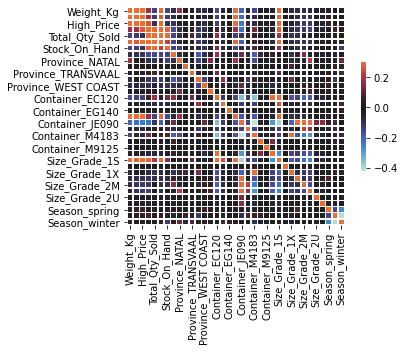

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = x_standardise_df.corr()
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [73]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.Collecting catboost



In [74]:
from catboost import CatBoostRegressor

In [75]:
cat = CatBoostRegressor()

mod = cat.fit(x_scaled,y)

# Use the model to make predictions
predicted_prices = mod.predict(test_nums_scaled)

my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('scaled_cat.csv', index=False)#0.59

Learning rate set to 0.043965
0:	learn: 2.1857387	total: 279ms	remaining: 4m 38s
1:	learn: 2.1232062	total: 290ms	remaining: 2m 24s
2:	learn: 2.0669341	total: 307ms	remaining: 1m 41s
3:	learn: 2.0140668	total: 317ms	remaining: 1m 19s
4:	learn: 1.9612246	total: 324ms	remaining: 1m 4s
5:	learn: 1.9065964	total: 330ms	remaining: 54.7s
6:	learn: 1.8611128	total: 336ms	remaining: 47.7s
7:	learn: 1.8177571	total: 342ms	remaining: 42.4s
8:	learn: 1.7725070	total: 347ms	remaining: 38.2s
9:	learn: 1.7319441	total: 353ms	remaining: 34.9s
10:	learn: 1.6884828	total: 359ms	remaining: 32.2s
11:	learn: 1.6539576	total: 364ms	remaining: 30s
12:	learn: 1.6217988	total: 421ms	remaining: 32s
13:	learn: 1.5825910	total: 431ms	remaining: 30.4s
14:	learn: 1.5460584	total: 442ms	remaining: 29s
15:	learn: 1.5158647	total: 452ms	remaining: 27.8s
16:	learn: 1.4871446	total: 459ms	remaining: 26.6s
17:	learn: 1.4585877	total: 466ms	remaining: 25.4s
18:	learn: 1.4324959	total: 473ms	remaining: 24.4s
19:	learn: 1.

179:	learn: 0.5583921	total: 1.42s	remaining: 6.48s
180:	learn: 0.5579764	total: 1.43s	remaining: 6.45s
181:	learn: 0.5572657	total: 1.43s	remaining: 6.43s
182:	learn: 0.5566394	total: 1.44s	remaining: 6.41s
183:	learn: 0.5548961	total: 1.44s	remaining: 6.39s
184:	learn: 0.5526655	total: 1.45s	remaining: 6.37s
185:	learn: 0.5513819	total: 1.45s	remaining: 6.35s
186:	learn: 0.5501565	total: 1.45s	remaining: 6.32s
187:	learn: 0.5492918	total: 1.46s	remaining: 6.29s
188:	learn: 0.5478259	total: 1.46s	remaining: 6.27s
189:	learn: 0.5470049	total: 1.46s	remaining: 6.24s
190:	learn: 0.5458071	total: 1.47s	remaining: 6.22s
191:	learn: 0.5448154	total: 1.47s	remaining: 6.2s
192:	learn: 0.5432304	total: 1.48s	remaining: 6.18s
193:	learn: 0.5416546	total: 1.48s	remaining: 6.16s
194:	learn: 0.5406792	total: 1.49s	remaining: 6.14s
195:	learn: 0.5396690	total: 1.49s	remaining: 6.12s
196:	learn: 0.5385352	total: 1.5s	remaining: 6.1s
197:	learn: 0.5380950	total: 1.5s	remaining: 6.09s
198:	learn: 0.53

360:	learn: 0.4096054	total: 2.23s	remaining: 3.95s
361:	learn: 0.4093011	total: 2.23s	remaining: 3.94s
362:	learn: 0.4089350	total: 2.24s	remaining: 3.93s
363:	learn: 0.4083740	total: 2.24s	remaining: 3.92s
364:	learn: 0.4079510	total: 2.24s	remaining: 3.9s
365:	learn: 0.4075342	total: 2.25s	remaining: 3.89s
366:	learn: 0.4068859	total: 2.25s	remaining: 3.88s
367:	learn: 0.4067547	total: 2.26s	remaining: 3.87s
368:	learn: 0.4060579	total: 2.26s	remaining: 3.87s
369:	learn: 0.4051791	total: 2.27s	remaining: 3.86s
370:	learn: 0.4044850	total: 2.27s	remaining: 3.85s
371:	learn: 0.4038590	total: 2.27s	remaining: 3.84s
372:	learn: 0.4028145	total: 2.28s	remaining: 3.83s
373:	learn: 0.4025399	total: 2.28s	remaining: 3.82s
374:	learn: 0.4016913	total: 2.29s	remaining: 3.81s
375:	learn: 0.4012476	total: 2.29s	remaining: 3.8s
376:	learn: 0.4003746	total: 2.29s	remaining: 3.79s
377:	learn: 0.4000943	total: 2.3s	remaining: 3.78s
378:	learn: 0.3996067	total: 2.3s	remaining: 3.77s
379:	learn: 0.39

527:	learn: 0.3288625	total: 3.19s	remaining: 2.85s
528:	learn: 0.3284935	total: 3.19s	remaining: 2.85s
529:	learn: 0.3282594	total: 3.2s	remaining: 2.84s
530:	learn: 0.3278978	total: 3.21s	remaining: 2.83s
531:	learn: 0.3277205	total: 3.21s	remaining: 2.82s
532:	learn: 0.3273850	total: 3.21s	remaining: 2.82s
533:	learn: 0.3269876	total: 3.22s	remaining: 2.81s
534:	learn: 0.3264741	total: 3.22s	remaining: 2.8s
535:	learn: 0.3263507	total: 3.23s	remaining: 2.79s
536:	learn: 0.3259117	total: 3.23s	remaining: 2.79s
537:	learn: 0.3255090	total: 3.23s	remaining: 2.78s
538:	learn: 0.3253106	total: 3.24s	remaining: 2.77s
539:	learn: 0.3247069	total: 3.24s	remaining: 2.76s
540:	learn: 0.3242443	total: 3.25s	remaining: 2.76s
541:	learn: 0.3239372	total: 3.25s	remaining: 2.75s
542:	learn: 0.3235122	total: 3.26s	remaining: 2.74s
543:	learn: 0.3232024	total: 3.26s	remaining: 2.73s
544:	learn: 0.3226513	total: 3.27s	remaining: 2.73s
545:	learn: 0.3221740	total: 3.27s	remaining: 2.72s
546:	learn: 0.

688:	learn: 0.2760923	total: 4.02s	remaining: 1.82s
689:	learn: 0.2759007	total: 4.03s	remaining: 1.81s
690:	learn: 0.2756258	total: 4.03s	remaining: 1.8s
691:	learn: 0.2752431	total: 4.04s	remaining: 1.8s
692:	learn: 0.2747969	total: 4.04s	remaining: 1.79s
693:	learn: 0.2745746	total: 4.04s	remaining: 1.78s
694:	learn: 0.2742762	total: 4.05s	remaining: 1.78s
695:	learn: 0.2739153	total: 4.05s	remaining: 1.77s
696:	learn: 0.2736186	total: 4.05s	remaining: 1.76s
697:	learn: 0.2732598	total: 4.06s	remaining: 1.76s
698:	learn: 0.2730358	total: 4.06s	remaining: 1.75s
699:	learn: 0.2726512	total: 4.07s	remaining: 1.74s
700:	learn: 0.2724102	total: 4.07s	remaining: 1.74s
701:	learn: 0.2720294	total: 4.08s	remaining: 1.73s
702:	learn: 0.2719878	total: 4.08s	remaining: 1.73s
703:	learn: 0.2718171	total: 4.09s	remaining: 1.72s
704:	learn: 0.2714243	total: 4.09s	remaining: 1.71s
705:	learn: 0.2711797	total: 4.1s	remaining: 1.71s
706:	learn: 0.2711468	total: 4.1s	remaining: 1.7s
707:	learn: 0.270

870:	learn: 0.2352398	total: 4.82s	remaining: 714ms
871:	learn: 0.2350737	total: 4.82s	remaining: 708ms
872:	learn: 0.2347851	total: 4.83s	remaining: 702ms
873:	learn: 0.2345451	total: 4.83s	remaining: 696ms
874:	learn: 0.2343182	total: 4.83s	remaining: 691ms
875:	learn: 0.2340941	total: 4.84s	remaining: 685ms
876:	learn: 0.2337519	total: 4.84s	remaining: 679ms
877:	learn: 0.2335242	total: 4.85s	remaining: 674ms
878:	learn: 0.2332657	total: 4.85s	remaining: 668ms
879:	learn: 0.2330371	total: 4.86s	remaining: 662ms
880:	learn: 0.2328738	total: 4.86s	remaining: 657ms
881:	learn: 0.2325461	total: 4.87s	remaining: 651ms
882:	learn: 0.2322397	total: 4.87s	remaining: 645ms
883:	learn: 0.2319866	total: 4.87s	remaining: 640ms
884:	learn: 0.2319125	total: 4.88s	remaining: 634ms
885:	learn: 0.2317471	total: 4.88s	remaining: 628ms
886:	learn: 0.2314712	total: 4.89s	remaining: 623ms
887:	learn: 0.2313527	total: 4.89s	remaining: 617ms
888:	learn: 0.2311532	total: 4.9s	remaining: 611ms
889:	learn: 0

In [76]:
# averaging two predictions best entry 
#merging the two dfs to get average combination   
sub2 = pd.read_csv('scaled_egb.csv')
sub3 = pd.read_csv('scaled_cat.csv')
merged = pd.merge(sub2, sub3, on='Index')
merged.head()
# Will give two columns of preds
merged['avg_price_per_kg'] = (merged['avg_price_per_kg_x'] + merged['avg_price_per_kg_y'])/2
merged[['Index', 'avg_price_per_kg']].to_csv('categb_merge.csv', index=False)#0.451

In [78]:
from sklearn.ensemble import StackingRegressor

In [79]:
models = [("Cat",cat),("rf",brf),("xgb",xgb)]

# Instead of choosing model weightings, we now declare the meta learner 
# model for our stacking ensemble. 
# Here we choose to use a simple linear regression 
meta_learner_reg = CatBoostRegressor()


s_reg = StackingRegressor(estimators=models, final_estimator=meta_learner_reg)

In [80]:
s_reg.fit(x_scaled,y)

Learning rate set to 0.043965
0:	learn: 2.1857387	total: 13.4ms	remaining: 13.4s
1:	learn: 2.1232062	total: 23.4ms	remaining: 11.7s
2:	learn: 2.0669341	total: 32.7ms	remaining: 10.9s
3:	learn: 2.0140668	total: 41.4ms	remaining: 10.3s
4:	learn: 1.9612246	total: 46.8ms	remaining: 9.32s
5:	learn: 1.9065964	total: 53ms	remaining: 8.78s
6:	learn: 1.8611128	total: 59ms	remaining: 8.37s
7:	learn: 1.8177571	total: 64.8ms	remaining: 8.03s
8:	learn: 1.7725070	total: 70.7ms	remaining: 7.79s
9:	learn: 1.7319441	total: 75.8ms	remaining: 7.5s
10:	learn: 1.6884828	total: 81ms	remaining: 7.28s
11:	learn: 1.6539576	total: 86.1ms	remaining: 7.09s
12:	learn: 1.6217988	total: 90.7ms	remaining: 6.89s
13:	learn: 1.5825910	total: 95.2ms	remaining: 6.7s
14:	learn: 1.5460584	total: 100ms	remaining: 6.57s
15:	learn: 1.5158647	total: 106ms	remaining: 6.49s
16:	learn: 1.4871446	total: 110ms	remaining: 6.36s
17:	learn: 1.4585877	total: 115ms	remaining: 6.27s
18:	learn: 1.4324959	total: 120ms	remaining: 6.18s
19:	l

166:	learn: 0.5734782	total: 900ms	remaining: 4.49s
167:	learn: 0.5724836	total: 902ms	remaining: 4.47s
168:	learn: 0.5715548	total: 906ms	remaining: 4.45s
169:	learn: 0.5707177	total: 910ms	remaining: 4.44s
170:	learn: 0.5683465	total: 913ms	remaining: 4.43s
171:	learn: 0.5670657	total: 916ms	remaining: 4.41s
172:	learn: 0.5661267	total: 920ms	remaining: 4.4s
173:	learn: 0.5650526	total: 923ms	remaining: 4.38s
174:	learn: 0.5636131	total: 928ms	remaining: 4.38s
175:	learn: 0.5624597	total: 933ms	remaining: 4.37s
176:	learn: 0.5613223	total: 937ms	remaining: 4.35s
177:	learn: 0.5604869	total: 940ms	remaining: 4.34s
178:	learn: 0.5594529	total: 945ms	remaining: 4.33s
179:	learn: 0.5583921	total: 948ms	remaining: 4.32s
180:	learn: 0.5579764	total: 953ms	remaining: 4.31s
181:	learn: 0.5572657	total: 958ms	remaining: 4.3s
182:	learn: 0.5566394	total: 962ms	remaining: 4.3s
183:	learn: 0.5548961	total: 967ms	remaining: 4.29s
184:	learn: 0.5526655	total: 972ms	remaining: 4.28s
185:	learn: 0.5

336:	learn: 0.4234780	total: 1.65s	remaining: 3.25s
337:	learn: 0.4227654	total: 1.66s	remaining: 3.24s
338:	learn: 0.4224024	total: 1.66s	remaining: 3.24s
339:	learn: 0.4217625	total: 1.66s	remaining: 3.23s
340:	learn: 0.4216471	total: 1.67s	remaining: 3.22s
341:	learn: 0.4207830	total: 1.67s	remaining: 3.22s
342:	learn: 0.4201705	total: 1.68s	remaining: 3.21s
343:	learn: 0.4194361	total: 1.68s	remaining: 3.2s
344:	learn: 0.4186347	total: 1.68s	remaining: 3.19s
345:	learn: 0.4180429	total: 1.69s	remaining: 3.19s
346:	learn: 0.4175359	total: 1.69s	remaining: 3.18s
347:	learn: 0.4173922	total: 1.7s	remaining: 3.18s
348:	learn: 0.4165900	total: 1.7s	remaining: 3.17s
349:	learn: 0.4163666	total: 1.71s	remaining: 3.17s
350:	learn: 0.4155978	total: 1.71s	remaining: 3.16s
351:	learn: 0.4151402	total: 1.72s	remaining: 3.16s
352:	learn: 0.4142153	total: 1.72s	remaining: 3.15s
353:	learn: 0.4130636	total: 1.72s	remaining: 3.15s
354:	learn: 0.4129574	total: 1.73s	remaining: 3.14s
355:	learn: 0.4

512:	learn: 0.3350972	total: 2.44s	remaining: 2.32s
513:	learn: 0.3346871	total: 2.45s	remaining: 2.31s
514:	learn: 0.3341547	total: 2.45s	remaining: 2.31s
515:	learn: 0.3338853	total: 2.45s	remaining: 2.3s
516:	learn: 0.3331473	total: 2.46s	remaining: 2.3s
517:	learn: 0.3326024	total: 2.46s	remaining: 2.29s
518:	learn: 0.3322130	total: 2.46s	remaining: 2.28s
519:	learn: 0.3316167	total: 2.47s	remaining: 2.28s
520:	learn: 0.3314269	total: 2.47s	remaining: 2.27s
521:	learn: 0.3310971	total: 2.48s	remaining: 2.27s
522:	learn: 0.3306901	total: 2.48s	remaining: 2.26s
523:	learn: 0.3303859	total: 2.49s	remaining: 2.26s
524:	learn: 0.3300822	total: 2.49s	remaining: 2.25s
525:	learn: 0.3297535	total: 2.5s	remaining: 2.25s
526:	learn: 0.3291931	total: 2.5s	remaining: 2.24s
527:	learn: 0.3288625	total: 2.5s	remaining: 2.24s
528:	learn: 0.3284935	total: 2.51s	remaining: 2.23s
529:	learn: 0.3282594	total: 2.51s	remaining: 2.23s
530:	learn: 0.3278978	total: 2.52s	remaining: 2.22s
531:	learn: 0.327

699:	learn: 0.2726512	total: 3.26s	remaining: 1.4s
700:	learn: 0.2724102	total: 3.27s	remaining: 1.39s
701:	learn: 0.2720294	total: 3.27s	remaining: 1.39s
702:	learn: 0.2719878	total: 3.27s	remaining: 1.38s
703:	learn: 0.2718171	total: 3.28s	remaining: 1.38s
704:	learn: 0.2714243	total: 3.28s	remaining: 1.37s
705:	learn: 0.2711797	total: 3.29s	remaining: 1.37s
706:	learn: 0.2711468	total: 3.29s	remaining: 1.36s
707:	learn: 0.2709330	total: 3.3s	remaining: 1.36s
708:	learn: 0.2707040	total: 3.3s	remaining: 1.35s
709:	learn: 0.2703590	total: 3.3s	remaining: 1.35s
710:	learn: 0.2700763	total: 3.31s	remaining: 1.34s
711:	learn: 0.2698531	total: 3.31s	remaining: 1.34s
712:	learn: 0.2696697	total: 3.32s	remaining: 1.33s
713:	learn: 0.2694678	total: 3.32s	remaining: 1.33s
714:	learn: 0.2692897	total: 3.33s	remaining: 1.32s
715:	learn: 0.2690485	total: 3.33s	remaining: 1.32s
716:	learn: 0.2689630	total: 3.44s	remaining: 1.36s
717:	learn: 0.2685400	total: 3.46s	remaining: 1.36s
718:	learn: 0.26

885:	learn: 0.2317471	total: 4.27s	remaining: 550ms
886:	learn: 0.2314712	total: 4.28s	remaining: 545ms
887:	learn: 0.2313527	total: 4.28s	remaining: 540ms
888:	learn: 0.2311532	total: 4.29s	remaining: 535ms
889:	learn: 0.2310408	total: 4.29s	remaining: 530ms
890:	learn: 0.2308416	total: 4.3s	remaining: 526ms
891:	learn: 0.2306718	total: 4.3s	remaining: 521ms
892:	learn: 0.2303803	total: 4.3s	remaining: 516ms
893:	learn: 0.2302707	total: 4.31s	remaining: 511ms
894:	learn: 0.2300673	total: 4.31s	remaining: 506ms
895:	learn: 0.2298503	total: 4.32s	remaining: 501ms
896:	learn: 0.2296990	total: 4.32s	remaining: 496ms
897:	learn: 0.2296895	total: 4.32s	remaining: 491ms
898:	learn: 0.2294488	total: 4.33s	remaining: 486ms
899:	learn: 0.2292442	total: 4.33s	remaining: 481ms
900:	learn: 0.2291586	total: 4.33s	remaining: 476ms
901:	learn: 0.2288105	total: 4.34s	remaining: 471ms
902:	learn: 0.2285957	total: 4.34s	remaining: 467ms
903:	learn: 0.2282962	total: 4.35s	remaining: 462ms
904:	learn: 0.2

63:	learn: 0.8195817	total: 327ms	remaining: 4.78s
64:	learn: 0.8127974	total: 332ms	remaining: 4.77s
65:	learn: 0.8063452	total: 337ms	remaining: 4.76s
66:	learn: 0.8002937	total: 341ms	remaining: 4.75s
67:	learn: 0.7960493	total: 346ms	remaining: 4.75s
68:	learn: 0.7899987	total: 351ms	remaining: 4.74s
69:	learn: 0.7845142	total: 356ms	remaining: 4.72s
70:	learn: 0.7803654	total: 360ms	remaining: 4.71s
71:	learn: 0.7751735	total: 365ms	remaining: 4.7s
72:	learn: 0.7702604	total: 369ms	remaining: 4.69s
73:	learn: 0.7661634	total: 374ms	remaining: 4.68s
74:	learn: 0.7613880	total: 379ms	remaining: 4.67s
75:	learn: 0.7570957	total: 384ms	remaining: 4.67s
76:	learn: 0.7512583	total: 389ms	remaining: 4.66s
77:	learn: 0.7464557	total: 394ms	remaining: 4.66s
78:	learn: 0.7420382	total: 399ms	remaining: 4.65s
79:	learn: 0.7380774	total: 404ms	remaining: 4.64s
80:	learn: 0.7343343	total: 408ms	remaining: 4.63s
81:	learn: 0.7297655	total: 413ms	remaining: 4.63s
82:	learn: 0.7253822	total: 419m

237:	learn: 0.4614582	total: 1.17s	remaining: 3.76s
238:	learn: 0.4602524	total: 1.18s	remaining: 3.75s
239:	learn: 0.4598080	total: 1.18s	remaining: 3.75s
240:	learn: 0.4594617	total: 1.19s	remaining: 3.74s
241:	learn: 0.4583023	total: 1.19s	remaining: 3.73s
242:	learn: 0.4572772	total: 1.2s	remaining: 3.73s
243:	learn: 0.4567460	total: 1.2s	remaining: 3.72s
244:	learn: 0.4559733	total: 1.21s	remaining: 3.72s
245:	learn: 0.4554706	total: 1.21s	remaining: 3.71s
246:	learn: 0.4542541	total: 1.22s	remaining: 3.71s
247:	learn: 0.4539402	total: 1.22s	remaining: 3.7s
248:	learn: 0.4535567	total: 1.23s	remaining: 3.7s
249:	learn: 0.4521983	total: 1.23s	remaining: 3.69s
250:	learn: 0.4510116	total: 1.24s	remaining: 3.69s
251:	learn: 0.4500372	total: 1.24s	remaining: 3.68s
252:	learn: 0.4488713	total: 1.25s	remaining: 3.68s
253:	learn: 0.4478765	total: 1.25s	remaining: 3.67s
254:	learn: 0.4473574	total: 1.25s	remaining: 3.67s
255:	learn: 0.4465035	total: 1.26s	remaining: 3.66s
256:	learn: 0.44

399:	learn: 0.3605215	total: 1.99s	remaining: 2.98s
400:	learn: 0.3601174	total: 1.99s	remaining: 2.97s
401:	learn: 0.3595398	total: 2s	remaining: 2.97s
402:	learn: 0.3592051	total: 2s	remaining: 2.96s
403:	learn: 0.3586513	total: 2s	remaining: 2.96s
404:	learn: 0.3584310	total: 2.01s	remaining: 2.95s
405:	learn: 0.3583631	total: 2.01s	remaining: 2.95s
406:	learn: 0.3577975	total: 2.02s	remaining: 2.94s
407:	learn: 0.3573197	total: 2.02s	remaining: 2.94s
408:	learn: 0.3565544	total: 2.03s	remaining: 2.93s
409:	learn: 0.3563535	total: 2.03s	remaining: 2.92s
410:	learn: 0.3559195	total: 2.04s	remaining: 2.92s
411:	learn: 0.3556143	total: 2.04s	remaining: 2.92s
412:	learn: 0.3548993	total: 2.05s	remaining: 2.91s
413:	learn: 0.3544182	total: 2.05s	remaining: 2.9s
414:	learn: 0.3539572	total: 2.06s	remaining: 2.9s
415:	learn: 0.3537823	total: 2.06s	remaining: 2.89s
416:	learn: 0.3537267	total: 2.07s	remaining: 2.89s
417:	learn: 0.3531266	total: 2.07s	remaining: 2.88s
418:	learn: 0.3527167	t

580:	learn: 0.2937916	total: 2.82s	remaining: 2.03s
581:	learn: 0.2934977	total: 2.82s	remaining: 2.03s
582:	learn: 0.2933794	total: 2.83s	remaining: 2.02s
583:	learn: 0.2930734	total: 2.83s	remaining: 2.02s
584:	learn: 0.2925002	total: 2.84s	remaining: 2.01s
585:	learn: 0.2920909	total: 2.84s	remaining: 2.01s
586:	learn: 0.2915990	total: 2.85s	remaining: 2s
587:	learn: 0.2914328	total: 2.85s	remaining: 2s
588:	learn: 0.2910684	total: 2.85s	remaining: 1.99s
589:	learn: 0.2907565	total: 2.86s	remaining: 1.99s
590:	learn: 0.2903770	total: 2.86s	remaining: 1.98s
591:	learn: 0.2900523	total: 2.87s	remaining: 1.98s
592:	learn: 0.2898504	total: 2.87s	remaining: 1.97s
593:	learn: 0.2895150	total: 2.88s	remaining: 1.97s
594:	learn: 0.2889090	total: 2.88s	remaining: 1.96s
595:	learn: 0.2888256	total: 2.88s	remaining: 1.96s
596:	learn: 0.2884755	total: 2.89s	remaining: 1.95s
597:	learn: 0.2881598	total: 2.89s	remaining: 1.95s
598:	learn: 0.2877358	total: 2.9s	remaining: 1.94s
599:	learn: 0.28754

768:	learn: 0.2454502	total: 3.63s	remaining: 1.09s
769:	learn: 0.2450973	total: 3.63s	remaining: 1.08s
770:	learn: 0.2449855	total: 3.64s	remaining: 1.08s
771:	learn: 0.2447224	total: 3.64s	remaining: 1.07s
772:	learn: 0.2446680	total: 3.65s	remaining: 1.07s
773:	learn: 0.2445819	total: 3.65s	remaining: 1.07s
774:	learn: 0.2443784	total: 3.66s	remaining: 1.06s
775:	learn: 0.2443015	total: 3.66s	remaining: 1.06s
776:	learn: 0.2441519	total: 3.67s	remaining: 1.05s
777:	learn: 0.2440124	total: 3.67s	remaining: 1.05s
778:	learn: 0.2437579	total: 3.67s	remaining: 1.04s
779:	learn: 0.2435117	total: 3.68s	remaining: 1.04s
780:	learn: 0.2430681	total: 3.68s	remaining: 1.03s
781:	learn: 0.2428536	total: 3.69s	remaining: 1.03s
782:	learn: 0.2426209	total: 3.69s	remaining: 1.02s
783:	learn: 0.2425727	total: 3.7s	remaining: 1.02s
784:	learn: 0.2424402	total: 3.7s	remaining: 1.01s
785:	learn: 0.2422772	total: 3.71s	remaining: 1.01s
786:	learn: 0.2420461	total: 3.71s	remaining: 1s
787:	learn: 0.241

926:	learn: 0.2160971	total: 4.29s	remaining: 338ms
927:	learn: 0.2157941	total: 4.29s	remaining: 333ms
928:	learn: 0.2155190	total: 4.3s	remaining: 328ms
929:	learn: 0.2154517	total: 4.3s	remaining: 324ms
930:	learn: 0.2153201	total: 4.3s	remaining: 319ms
931:	learn: 0.2149574	total: 4.31s	remaining: 314ms
932:	learn: 0.2148663	total: 4.31s	remaining: 310ms
933:	learn: 0.2146929	total: 4.32s	remaining: 305ms
934:	learn: 0.2144992	total: 4.32s	remaining: 300ms
935:	learn: 0.2143985	total: 4.33s	remaining: 296ms
936:	learn: 0.2142487	total: 4.33s	remaining: 291ms
937:	learn: 0.2139927	total: 4.33s	remaining: 286ms
938:	learn: 0.2138645	total: 4.34s	remaining: 282ms
939:	learn: 0.2137110	total: 4.34s	remaining: 277ms
940:	learn: 0.2135624	total: 4.34s	remaining: 272ms
941:	learn: 0.2134143	total: 4.35s	remaining: 268ms
942:	learn: 0.2132582	total: 4.35s	remaining: 263ms
943:	learn: 0.2131849	total: 4.35s	remaining: 258ms
944:	learn: 0.2131254	total: 4.36s	remaining: 254ms
945:	learn: 0.2

104:	learn: 0.7455106	total: 475ms	remaining: 4.05s
105:	learn: 0.7404253	total: 480ms	remaining: 4.05s
106:	learn: 0.7361019	total: 484ms	remaining: 4.04s
107:	learn: 0.7326037	total: 489ms	remaining: 4.04s
108:	learn: 0.7296930	total: 495ms	remaining: 4.04s
109:	learn: 0.7249023	total: 498ms	remaining: 4.03s
110:	learn: 0.7223812	total: 502ms	remaining: 4.02s
111:	learn: 0.7192733	total: 506ms	remaining: 4.01s
112:	learn: 0.7159338	total: 509ms	remaining: 4s
113:	learn: 0.7127312	total: 512ms	remaining: 3.98s
114:	learn: 0.7101551	total: 514ms	remaining: 3.96s
115:	learn: 0.7080115	total: 519ms	remaining: 3.95s
116:	learn: 0.7048236	total: 522ms	remaining: 3.94s
117:	learn: 0.7034385	total: 527ms	remaining: 3.94s
118:	learn: 0.7010770	total: 530ms	remaining: 3.93s
119:	learn: 0.6988771	total: 535ms	remaining: 3.92s
120:	learn: 0.6974646	total: 538ms	remaining: 3.91s
121:	learn: 0.6945463	total: 542ms	remaining: 3.9s
122:	learn: 0.6924993	total: 546ms	remaining: 3.89s
123:	learn: 0.69

291:	learn: 0.4701737	total: 1.26s	remaining: 3.07s
292:	learn: 0.4689766	total: 1.27s	remaining: 3.06s
293:	learn: 0.4676486	total: 1.27s	remaining: 3.06s
294:	learn: 0.4668569	total: 1.28s	remaining: 3.05s
295:	learn: 0.4654468	total: 1.29s	remaining: 3.06s
296:	learn: 0.4648862	total: 1.29s	remaining: 3.05s
297:	learn: 0.4645217	total: 1.29s	remaining: 3.05s
298:	learn: 0.4635080	total: 1.3s	remaining: 3.05s
299:	learn: 0.4622393	total: 1.3s	remaining: 3.04s
300:	learn: 0.4613052	total: 1.31s	remaining: 3.04s
301:	learn: 0.4597087	total: 1.31s	remaining: 3.04s
302:	learn: 0.4587149	total: 1.32s	remaining: 3.03s
303:	learn: 0.4580133	total: 1.32s	remaining: 3.02s
304:	learn: 0.4571530	total: 1.32s	remaining: 3.02s
305:	learn: 0.4560122	total: 1.33s	remaining: 3.02s
306:	learn: 0.4550955	total: 1.33s	remaining: 3.01s
307:	learn: 0.4542937	total: 1.34s	remaining: 3s
308:	learn: 0.4536160	total: 1.34s	remaining: 3s
309:	learn: 0.4526091	total: 1.34s	remaining: 2.99s
310:	learn: 0.451021

479:	learn: 0.3478826	total: 2.08s	remaining: 2.26s
480:	learn: 0.3471073	total: 2.09s	remaining: 2.25s
481:	learn: 0.3470335	total: 2.09s	remaining: 2.25s
482:	learn: 0.3466243	total: 2.09s	remaining: 2.24s
483:	learn: 0.3462976	total: 2.1s	remaining: 2.24s
484:	learn: 0.3456947	total: 2.1s	remaining: 2.23s
485:	learn: 0.3451552	total: 2.1s	remaining: 2.23s
486:	learn: 0.3446782	total: 2.11s	remaining: 2.22s
487:	learn: 0.3439172	total: 2.11s	remaining: 2.22s
488:	learn: 0.3438445	total: 2.12s	remaining: 2.21s
489:	learn: 0.3434332	total: 2.12s	remaining: 2.21s
490:	learn: 0.3433653	total: 2.12s	remaining: 2.2s
491:	learn: 0.3428934	total: 2.13s	remaining: 2.2s
492:	learn: 0.3425387	total: 2.13s	remaining: 2.19s
493:	learn: 0.3420661	total: 2.13s	remaining: 2.18s
494:	learn: 0.3414007	total: 2.14s	remaining: 2.18s
495:	learn: 0.3409756	total: 2.14s	remaining: 2.17s
496:	learn: 0.3404931	total: 2.14s	remaining: 2.17s
497:	learn: 0.3398631	total: 2.15s	remaining: 2.17s
498:	learn: 0.339

642:	learn: 0.2878094	total: 2.74s	remaining: 1.52s
643:	learn: 0.2877096	total: 2.74s	remaining: 1.51s
644:	learn: 0.2873456	total: 2.75s	remaining: 1.51s
645:	learn: 0.2872812	total: 2.75s	remaining: 1.51s
646:	learn: 0.2869238	total: 2.75s	remaining: 1.5s
647:	learn: 0.2865084	total: 2.75s	remaining: 1.5s
648:	learn: 0.2860953	total: 2.76s	remaining: 1.49s
649:	learn: 0.2860815	total: 2.76s	remaining: 1.49s
650:	learn: 0.2860685	total: 2.76s	remaining: 1.48s
651:	learn: 0.2860555	total: 2.77s	remaining: 1.48s
652:	learn: 0.2860407	total: 2.77s	remaining: 1.47s
653:	learn: 0.2857122	total: 2.77s	remaining: 1.47s
654:	learn: 0.2854822	total: 2.77s	remaining: 1.46s
655:	learn: 0.2850189	total: 2.78s	remaining: 1.46s
656:	learn: 0.2846464	total: 2.78s	remaining: 1.45s
657:	learn: 0.2843130	total: 2.79s	remaining: 1.45s
658:	learn: 0.2838882	total: 2.79s	remaining: 1.44s
659:	learn: 0.2834849	total: 2.79s	remaining: 1.44s
660:	learn: 0.2829671	total: 2.8s	remaining: 1.44s
661:	learn: 0.2

830:	learn: 0.2390774	total: 3.52s	remaining: 717ms
831:	learn: 0.2388401	total: 3.53s	remaining: 712ms
832:	learn: 0.2385458	total: 3.53s	remaining: 708ms
833:	learn: 0.2384803	total: 3.53s	remaining: 703ms
834:	learn: 0.2381682	total: 3.54s	remaining: 699ms
835:	learn: 0.2379909	total: 3.54s	remaining: 695ms
836:	learn: 0.2378659	total: 3.54s	remaining: 690ms
837:	learn: 0.2375456	total: 3.55s	remaining: 686ms
838:	learn: 0.2373593	total: 3.55s	remaining: 682ms
839:	learn: 0.2373077	total: 3.55s	remaining: 677ms
840:	learn: 0.2369566	total: 3.56s	remaining: 673ms
841:	learn: 0.2367243	total: 3.56s	remaining: 669ms
842:	learn: 0.2365476	total: 3.57s	remaining: 664ms
843:	learn: 0.2362803	total: 3.57s	remaining: 660ms
844:	learn: 0.2359960	total: 3.58s	remaining: 656ms
845:	learn: 0.2357438	total: 3.58s	remaining: 652ms
846:	learn: 0.2355402	total: 3.58s	remaining: 647ms
847:	learn: 0.2352106	total: 3.59s	remaining: 643ms
848:	learn: 0.2350499	total: 3.59s	remaining: 639ms
849:	learn: 

Learning rate set to 0.042255
0:	learn: 2.2071443	total: 8.03ms	remaining: 8.02s
1:	learn: 2.1490865	total: 46.2ms	remaining: 23s
2:	learn: 2.0940957	total: 55.1ms	remaining: 18.3s
3:	learn: 2.0438732	total: 63.3ms	remaining: 15.7s
4:	learn: 1.9937278	total: 71.6ms	remaining: 14.2s
5:	learn: 1.9449243	total: 80.3ms	remaining: 13.3s
6:	learn: 1.9026082	total: 89.3ms	remaining: 12.7s
7:	learn: 1.8566283	total: 97.9ms	remaining: 12.1s
8:	learn: 1.8132795	total: 106ms	remaining: 11.7s
9:	learn: 1.7741708	total: 114ms	remaining: 11.3s
10:	learn: 1.7363885	total: 121ms	remaining: 10.9s
11:	learn: 1.7019348	total: 128ms	remaining: 10.6s
12:	learn: 1.6707713	total: 134ms	remaining: 10.2s
13:	learn: 1.6327821	total: 140ms	remaining: 9.84s
14:	learn: 1.5962130	total: 146ms	remaining: 9.56s
15:	learn: 1.5668243	total: 149ms	remaining: 9.18s
16:	learn: 1.5383259	total: 154ms	remaining: 8.92s
17:	learn: 1.5124722	total: 159ms	remaining: 8.68s
18:	learn: 1.4887112	total: 163ms	remaining: 8.39s
19:	l

173:	learn: 0.5756379	total: 794ms	remaining: 3.77s
174:	learn: 0.5741990	total: 798ms	remaining: 3.76s
175:	learn: 0.5723168	total: 802ms	remaining: 3.75s
176:	learn: 0.5698469	total: 807ms	remaining: 3.75s
177:	learn: 0.5680392	total: 810ms	remaining: 3.74s
178:	learn: 0.5668974	total: 813ms	remaining: 3.73s
179:	learn: 0.5659355	total: 816ms	remaining: 3.72s
180:	learn: 0.5642457	total: 821ms	remaining: 3.71s
181:	learn: 0.5636058	total: 824ms	remaining: 3.7s
182:	learn: 0.5627774	total: 828ms	remaining: 3.7s
183:	learn: 0.5610401	total: 833ms	remaining: 3.69s
184:	learn: 0.5596085	total: 838ms	remaining: 3.69s
185:	learn: 0.5587851	total: 841ms	remaining: 3.68s
186:	learn: 0.5580877	total: 850ms	remaining: 3.69s
187:	learn: 0.5574761	total: 858ms	remaining: 3.71s
188:	learn: 0.5564671	total: 866ms	remaining: 3.72s
189:	learn: 0.5554087	total: 875ms	remaining: 3.73s
190:	learn: 0.5544771	total: 883ms	remaining: 3.74s
191:	learn: 0.5529652	total: 891ms	remaining: 3.75s
192:	learn: 0.

350:	learn: 0.4050997	total: 1.55s	remaining: 2.87s
351:	learn: 0.4043062	total: 1.56s	remaining: 2.87s
352:	learn: 0.4037372	total: 1.56s	remaining: 2.87s
353:	learn: 0.4036011	total: 1.57s	remaining: 2.86s
354:	learn: 0.4027076	total: 1.57s	remaining: 2.86s
355:	learn: 0.4023302	total: 1.58s	remaining: 2.85s
356:	learn: 0.4019932	total: 1.58s	remaining: 2.85s
357:	learn: 0.4012913	total: 1.58s	remaining: 2.84s
358:	learn: 0.4010188	total: 1.59s	remaining: 2.84s
359:	learn: 0.4000953	total: 1.59s	remaining: 2.83s
360:	learn: 0.3993191	total: 1.6s	remaining: 2.83s
361:	learn: 0.3986209	total: 1.6s	remaining: 2.83s
362:	learn: 0.3982577	total: 1.61s	remaining: 2.82s
363:	learn: 0.3975978	total: 1.61s	remaining: 2.81s
364:	learn: 0.3974215	total: 1.61s	remaining: 2.81s
365:	learn: 0.3969004	total: 1.62s	remaining: 2.81s
366:	learn: 0.3960252	total: 1.62s	remaining: 2.8s
367:	learn: 0.3952171	total: 1.63s	remaining: 2.79s
368:	learn: 0.3949306	total: 1.63s	remaining: 2.79s
369:	learn: 0.3

544:	learn: 0.3110166	total: 2.36s	remaining: 1.97s
545:	learn: 0.3106325	total: 2.37s	remaining: 1.97s
546:	learn: 0.3103344	total: 2.37s	remaining: 1.96s
547:	learn: 0.3097623	total: 2.37s	remaining: 1.96s
548:	learn: 0.3092737	total: 2.38s	remaining: 1.95s
549:	learn: 0.3089479	total: 2.38s	remaining: 1.95s
550:	learn: 0.3084467	total: 2.39s	remaining: 1.95s
551:	learn: 0.3080691	total: 2.39s	remaining: 1.94s
552:	learn: 0.3075727	total: 2.39s	remaining: 1.94s
553:	learn: 0.3072178	total: 2.4s	remaining: 1.93s
554:	learn: 0.3070140	total: 2.4s	remaining: 1.92s
555:	learn: 0.3067347	total: 2.4s	remaining: 1.92s
556:	learn: 0.3064427	total: 2.41s	remaining: 1.91s
557:	learn: 0.3062247	total: 2.41s	remaining: 1.91s
558:	learn: 0.3057107	total: 2.42s	remaining: 1.91s
559:	learn: 0.3053236	total: 2.42s	remaining: 1.9s
560:	learn: 0.3051136	total: 2.42s	remaining: 1.9s
561:	learn: 0.3045517	total: 2.43s	remaining: 1.89s
562:	learn: 0.3039782	total: 2.43s	remaining: 1.89s
563:	learn: 0.303

739:	learn: 0.2538100	total: 3.17s	remaining: 1.11s
740:	learn: 0.2533869	total: 3.18s	remaining: 1.11s
741:	learn: 0.2532221	total: 3.18s	remaining: 1.1s
742:	learn: 0.2530077	total: 3.18s	remaining: 1.1s
743:	learn: 0.2528168	total: 3.19s	remaining: 1.1s
744:	learn: 0.2524210	total: 3.19s	remaining: 1.09s
745:	learn: 0.2522142	total: 3.19s	remaining: 1.09s
746:	learn: 0.2519511	total: 3.2s	remaining: 1.08s
747:	learn: 0.2517746	total: 3.2s	remaining: 1.08s
748:	learn: 0.2517521	total: 3.21s	remaining: 1.07s
749:	learn: 0.2516757	total: 3.21s	remaining: 1.07s
750:	learn: 0.2515950	total: 3.21s	remaining: 1.06s
751:	learn: 0.2512654	total: 3.22s	remaining: 1.06s
752:	learn: 0.2511514	total: 3.22s	remaining: 1.06s
753:	learn: 0.2508021	total: 3.23s	remaining: 1.05s
754:	learn: 0.2503949	total: 3.23s	remaining: 1.05s
755:	learn: 0.2502602	total: 3.23s	remaining: 1.04s
756:	learn: 0.2501249	total: 3.24s	remaining: 1.04s
757:	learn: 0.2500413	total: 3.24s	remaining: 1.03s
758:	learn: 0.249

936:	learn: 0.2132931	total: 3.99s	remaining: 268ms
937:	learn: 0.2130775	total: 3.99s	remaining: 264ms
938:	learn: 0.2128740	total: 3.99s	remaining: 259ms
939:	learn: 0.2126709	total: 4s	remaining: 255ms
940:	learn: 0.2124439	total: 4s	remaining: 251ms
941:	learn: 0.2122437	total: 4s	remaining: 247ms
942:	learn: 0.2120205	total: 4.01s	remaining: 242ms
943:	learn: 0.2118185	total: 4.01s	remaining: 238ms
944:	learn: 0.2116220	total: 4.01s	remaining: 234ms
945:	learn: 0.2114899	total: 4.02s	remaining: 229ms
946:	learn: 0.2114306	total: 4.02s	remaining: 225ms
947:	learn: 0.2113811	total: 4.02s	remaining: 221ms
948:	learn: 0.2112847	total: 4.03s	remaining: 216ms
949:	learn: 0.2112528	total: 4.03s	remaining: 212ms
950:	learn: 0.2111424	total: 4.03s	remaining: 208ms
951:	learn: 0.2109762	total: 4.04s	remaining: 204ms
952:	learn: 0.2107644	total: 4.04s	remaining: 199ms
953:	learn: 0.2106619	total: 4.04s	remaining: 195ms
954:	learn: 0.2103552	total: 4.05s	remaining: 191ms
955:	learn: 0.2102580

114:	learn: 0.7002622	total: 487ms	remaining: 3.75s
115:	learn: 0.6978236	total: 490ms	remaining: 3.74s
116:	learn: 0.6942552	total: 497ms	remaining: 3.75s
117:	learn: 0.6924701	total: 503ms	remaining: 3.76s
118:	learn: 0.6904125	total: 506ms	remaining: 3.74s
119:	learn: 0.6888631	total: 513ms	remaining: 3.76s
120:	learn: 0.6866434	total: 518ms	remaining: 3.76s
121:	learn: 0.6825581	total: 522ms	remaining: 3.76s
122:	learn: 0.6801518	total: 529ms	remaining: 3.77s
123:	learn: 0.6773714	total: 533ms	remaining: 3.77s
124:	learn: 0.6744872	total: 539ms	remaining: 3.77s
125:	learn: 0.6735993	total: 544ms	remaining: 3.77s
126:	learn: 0.6712759	total: 547ms	remaining: 3.76s
127:	learn: 0.6688671	total: 550ms	remaining: 3.75s
128:	learn: 0.6672835	total: 554ms	remaining: 3.74s
129:	learn: 0.6652955	total: 558ms	remaining: 3.73s
130:	learn: 0.6634206	total: 565ms	remaining: 3.75s
131:	learn: 0.6610440	total: 572ms	remaining: 3.76s
132:	learn: 0.6596583	total: 575ms	remaining: 3.75s
133:	learn: 

298:	learn: 0.4596639	total: 1.29s	remaining: 3.03s
299:	learn: 0.4587532	total: 1.3s	remaining: 3.04s
300:	learn: 0.4582241	total: 1.31s	remaining: 3.04s
301:	learn: 0.4577655	total: 1.32s	remaining: 3.05s
302:	learn: 0.4568970	total: 1.33s	remaining: 3.06s
303:	learn: 0.4556408	total: 1.33s	remaining: 3.06s
304:	learn: 0.4545893	total: 1.34s	remaining: 3.06s
305:	learn: 0.4536257	total: 1.35s	remaining: 3.06s
306:	learn: 0.4528852	total: 1.35s	remaining: 3.06s
307:	learn: 0.4521378	total: 1.36s	remaining: 3.05s
308:	learn: 0.4510929	total: 1.36s	remaining: 3.05s
309:	learn: 0.4501862	total: 1.37s	remaining: 3.05s
310:	learn: 0.4497220	total: 1.37s	remaining: 3.04s
311:	learn: 0.4492713	total: 1.38s	remaining: 3.04s
312:	learn: 0.4486968	total: 1.38s	remaining: 3.04s
313:	learn: 0.4483969	total: 1.39s	remaining: 3.03s
314:	learn: 0.4474240	total: 1.39s	remaining: 3.02s
315:	learn: 0.4464932	total: 1.4s	remaining: 3.03s
316:	learn: 0.4456517	total: 1.41s	remaining: 3.03s
317:	learn: 0.

487:	learn: 0.3529085	total: 2.12s	remaining: 2.22s
488:	learn: 0.3525169	total: 2.12s	remaining: 2.22s
489:	learn: 0.3523088	total: 2.13s	remaining: 2.21s
490:	learn: 0.3519651	total: 2.13s	remaining: 2.21s
491:	learn: 0.3514452	total: 2.13s	remaining: 2.2s
492:	learn: 0.3508961	total: 2.14s	remaining: 2.2s
493:	learn: 0.3508084	total: 2.14s	remaining: 2.19s
494:	learn: 0.3503769	total: 2.14s	remaining: 2.19s
495:	learn: 0.3500748	total: 2.15s	remaining: 2.18s
496:	learn: 0.3493372	total: 2.15s	remaining: 2.18s
497:	learn: 0.3492409	total: 2.16s	remaining: 2.17s
498:	learn: 0.3488543	total: 2.16s	remaining: 2.17s
499:	learn: 0.3483776	total: 2.17s	remaining: 2.17s
500:	learn: 0.3478293	total: 2.17s	remaining: 2.17s
501:	learn: 0.3472461	total: 2.18s	remaining: 2.16s
502:	learn: 0.3466542	total: 2.18s	remaining: 2.16s
503:	learn: 0.3459096	total: 2.19s	remaining: 2.15s
504:	learn: 0.3454393	total: 2.19s	remaining: 2.15s
505:	learn: 0.3448538	total: 2.2s	remaining: 2.15s
506:	learn: 0.3

677:	learn: 0.2867488	total: 2.93s	remaining: 1.39s
678:	learn: 0.2864896	total: 2.94s	remaining: 1.39s
679:	learn: 0.2861174	total: 2.94s	remaining: 1.38s
680:	learn: 0.2860526	total: 2.94s	remaining: 1.38s
681:	learn: 0.2858376	total: 2.95s	remaining: 1.38s
682:	learn: 0.2856064	total: 2.96s	remaining: 1.37s
683:	learn: 0.2853885	total: 2.96s	remaining: 1.37s
684:	learn: 0.2853222	total: 2.96s	remaining: 1.36s
685:	learn: 0.2851202	total: 2.97s	remaining: 1.36s
686:	learn: 0.2849340	total: 2.97s	remaining: 1.35s
687:	learn: 0.2845637	total: 2.98s	remaining: 1.35s
688:	learn: 0.2844229	total: 2.98s	remaining: 1.35s
689:	learn: 0.2841324	total: 2.99s	remaining: 1.34s
690:	learn: 0.2838722	total: 3s	remaining: 1.34s
691:	learn: 0.2835032	total: 3s	remaining: 1.34s
692:	learn: 0.2834414	total: 3.01s	remaining: 1.33s
693:	learn: 0.2831400	total: 3.01s	remaining: 1.33s
694:	learn: 0.2825885	total: 3.02s	remaining: 1.32s
695:	learn: 0.2823569	total: 3.02s	remaining: 1.32s
696:	learn: 0.2819

856:	learn: 0.2428244	total: 3.75s	remaining: 625ms
857:	learn: 0.2425137	total: 3.75s	remaining: 620ms
858:	learn: 0.2422276	total: 3.75s	remaining: 616ms
859:	learn: 0.2419676	total: 3.75s	remaining: 611ms
860:	learn: 0.2417535	total: 3.76s	remaining: 607ms
861:	learn: 0.2416326	total: 3.76s	remaining: 602ms
862:	learn: 0.2413881	total: 3.76s	remaining: 597ms
863:	learn: 0.2411849	total: 3.77s	remaining: 593ms
864:	learn: 0.2409255	total: 3.77s	remaining: 589ms
865:	learn: 0.2407644	total: 3.78s	remaining: 584ms
866:	learn: 0.2406255	total: 3.78s	remaining: 580ms
867:	learn: 0.2404442	total: 3.79s	remaining: 576ms
868:	learn: 0.2404188	total: 3.79s	remaining: 571ms
869:	learn: 0.2401742	total: 3.79s	remaining: 567ms
870:	learn: 0.2398443	total: 3.8s	remaining: 563ms
871:	learn: 0.2396646	total: 3.8s	remaining: 558ms
872:	learn: 0.2396179	total: 3.81s	remaining: 554ms
873:	learn: 0.2395921	total: 3.81s	remaining: 549ms
874:	learn: 0.2392029	total: 3.82s	remaining: 545ms
875:	learn: 0.

18:	learn: 1.4552938	total: 150ms	remaining: 7.74s
19:	learn: 1.4285602	total: 156ms	remaining: 7.64s
20:	learn: 1.4013522	total: 161ms	remaining: 7.51s
21:	learn: 1.3741174	total: 165ms	remaining: 7.32s
22:	learn: 1.3466410	total: 168ms	remaining: 7.15s
23:	learn: 1.3216048	total: 173ms	remaining: 7.03s
24:	learn: 1.2985782	total: 177ms	remaining: 6.92s
25:	learn: 1.2796279	total: 182ms	remaining: 6.83s
26:	learn: 1.2577463	total: 186ms	remaining: 6.71s
27:	learn: 1.2379848	total: 190ms	remaining: 6.61s
28:	learn: 1.2187510	total: 195ms	remaining: 6.53s
29:	learn: 1.2032188	total: 200ms	remaining: 6.47s
30:	learn: 1.1910796	total: 206ms	remaining: 6.43s
31:	learn: 1.1738015	total: 211ms	remaining: 6.38s
32:	learn: 1.1602458	total: 216ms	remaining: 6.32s
33:	learn: 1.1413929	total: 221ms	remaining: 6.27s
34:	learn: 1.1247412	total: 226ms	remaining: 6.23s
35:	learn: 1.1136172	total: 231ms	remaining: 6.19s
36:	learn: 1.0999352	total: 236ms	remaining: 6.15s
37:	learn: 1.0899469	total: 242

205:	learn: 0.5444879	total: 956ms	remaining: 3.68s
206:	learn: 0.5438738	total: 965ms	remaining: 3.69s
207:	learn: 0.5431747	total: 974ms	remaining: 3.71s
208:	learn: 0.5425036	total: 980ms	remaining: 3.71s
209:	learn: 0.5421088	total: 985ms	remaining: 3.7s
210:	learn: 0.5408392	total: 990ms	remaining: 3.7s
211:	learn: 0.5394757	total: 994ms	remaining: 3.7s
212:	learn: 0.5379873	total: 999ms	remaining: 3.69s
213:	learn: 0.5366778	total: 1s	remaining: 3.69s
214:	learn: 0.5362117	total: 1.01s	remaining: 3.68s
215:	learn: 0.5343132	total: 1.01s	remaining: 3.67s
216:	learn: 0.5337432	total: 1.02s	remaining: 3.67s
217:	learn: 0.5332915	total: 1.02s	remaining: 3.66s
218:	learn: 0.5328962	total: 1.02s	remaining: 3.65s
219:	learn: 0.5322025	total: 1.03s	remaining: 3.65s
220:	learn: 0.5317097	total: 1.03s	remaining: 3.64s
221:	learn: 0.5301047	total: 1.04s	remaining: 3.63s
222:	learn: 0.5292828	total: 1.04s	remaining: 3.63s
223:	learn: 0.5283807	total: 1.04s	remaining: 3.62s
224:	learn: 0.5280

397:	learn: 0.3939036	total: 1.76s	remaining: 2.66s
398:	learn: 0.3935694	total: 1.76s	remaining: 2.65s
399:	learn: 0.3929321	total: 1.76s	remaining: 2.65s
400:	learn: 0.3921615	total: 1.77s	remaining: 2.64s
401:	learn: 0.3915535	total: 1.77s	remaining: 2.64s
402:	learn: 0.3912051	total: 1.78s	remaining: 2.63s
403:	learn: 0.3908175	total: 1.78s	remaining: 2.62s
404:	learn: 0.3899790	total: 1.78s	remaining: 2.62s
405:	learn: 0.3895466	total: 1.79s	remaining: 2.61s
406:	learn: 0.3890014	total: 1.79s	remaining: 2.61s
407:	learn: 0.3886002	total: 1.79s	remaining: 2.6s
408:	learn: 0.3882173	total: 1.8s	remaining: 2.6s
409:	learn: 0.3875721	total: 1.8s	remaining: 2.59s
410:	learn: 0.3872267	total: 1.81s	remaining: 2.59s
411:	learn: 0.3869703	total: 1.81s	remaining: 2.58s
412:	learn: 0.3861457	total: 1.81s	remaining: 2.58s
413:	learn: 0.3854200	total: 1.82s	remaining: 2.58s
414:	learn: 0.3845581	total: 1.82s	remaining: 2.57s
415:	learn: 0.3842213	total: 1.83s	remaining: 2.56s
416:	learn: 0.38

591:	learn: 0.3065453	total: 2.57s	remaining: 1.77s
592:	learn: 0.3061510	total: 2.58s	remaining: 1.77s
593:	learn: 0.3058783	total: 2.58s	remaining: 1.76s
594:	learn: 0.3055744	total: 2.58s	remaining: 1.76s
595:	learn: 0.3055115	total: 2.59s	remaining: 1.75s
596:	learn: 0.3051987	total: 2.59s	remaining: 1.75s
597:	learn: 0.3048138	total: 2.6s	remaining: 1.75s
598:	learn: 0.3041500	total: 2.6s	remaining: 1.74s
599:	learn: 0.3036219	total: 2.6s	remaining: 1.74s
600:	learn: 0.3033083	total: 2.61s	remaining: 1.73s
601:	learn: 0.3028344	total: 2.61s	remaining: 1.73s
602:	learn: 0.3024901	total: 2.62s	remaining: 1.72s
603:	learn: 0.3020626	total: 2.62s	remaining: 1.72s
604:	learn: 0.3018844	total: 2.63s	remaining: 1.71s
605:	learn: 0.3016939	total: 2.63s	remaining: 1.71s
606:	learn: 0.3012023	total: 2.63s	remaining: 1.71s
607:	learn: 0.3009271	total: 2.64s	remaining: 1.7s
608:	learn: 0.3004928	total: 2.64s	remaining: 1.7s
609:	learn: 0.3001509	total: 2.65s	remaining: 1.69s
610:	learn: 0.299

784:	learn: 0.2529276	total: 3.39s	remaining: 928ms
785:	learn: 0.2528094	total: 3.39s	remaining: 923ms
786:	learn: 0.2525485	total: 3.4s	remaining: 919ms
787:	learn: 0.2521765	total: 3.4s	remaining: 915ms
788:	learn: 0.2519213	total: 3.4s	remaining: 910ms
789:	learn: 0.2516091	total: 3.41s	remaining: 906ms
790:	learn: 0.2512573	total: 3.41s	remaining: 901ms
791:	learn: 0.2511122	total: 3.42s	remaining: 897ms
792:	learn: 0.2510308	total: 3.42s	remaining: 892ms
793:	learn: 0.2509767	total: 3.42s	remaining: 888ms
794:	learn: 0.2506339	total: 3.43s	remaining: 884ms
795:	learn: 0.2502526	total: 3.43s	remaining: 879ms
796:	learn: 0.2500942	total: 3.44s	remaining: 875ms
797:	learn: 0.2500621	total: 3.44s	remaining: 871ms
798:	learn: 0.2497730	total: 3.44s	remaining: 866ms
799:	learn: 0.2497326	total: 3.45s	remaining: 862ms
800:	learn: 0.2494805	total: 3.45s	remaining: 858ms
801:	learn: 0.2492977	total: 3.46s	remaining: 853ms
802:	learn: 0.2490038	total: 3.46s	remaining: 849ms
803:	learn: 0.2

943:	learn: 0.2220206	total: 4.05s	remaining: 240ms
944:	learn: 0.2218627	total: 4.05s	remaining: 236ms
945:	learn: 0.2217107	total: 4.05s	remaining: 231ms
946:	learn: 0.2215583	total: 4.06s	remaining: 227ms
947:	learn: 0.2213830	total: 4.06s	remaining: 223ms
948:	learn: 0.2211839	total: 4.06s	remaining: 218ms
949:	learn: 0.2209782	total: 4.07s	remaining: 214ms
950:	learn: 0.2206527	total: 4.07s	remaining: 210ms
951:	learn: 0.2206321	total: 4.08s	remaining: 205ms
952:	learn: 0.2204572	total: 4.08s	remaining: 201ms
953:	learn: 0.2201681	total: 4.08s	remaining: 197ms
954:	learn: 0.2201326	total: 4.09s	remaining: 193ms
955:	learn: 0.2198814	total: 4.09s	remaining: 188ms
956:	learn: 0.2198619	total: 4.09s	remaining: 184ms
957:	learn: 0.2197618	total: 4.1s	remaining: 180ms
958:	learn: 0.2195357	total: 4.1s	remaining: 175ms
959:	learn: 0.2193335	total: 4.11s	remaining: 171ms
960:	learn: 0.2193149	total: 4.11s	remaining: 167ms
961:	learn: 0.2192928	total: 4.12s	remaining: 163ms
962:	learn: 0.

135:	learn: 0.4846882	total: 470ms	remaining: 2.98s
136:	learn: 0.4841116	total: 473ms	remaining: 2.98s
137:	learn: 0.4830028	total: 477ms	remaining: 2.98s
138:	learn: 0.4819987	total: 480ms	remaining: 2.97s
139:	learn: 0.4816927	total: 483ms	remaining: 2.96s
140:	learn: 0.4812396	total: 485ms	remaining: 2.95s
141:	learn: 0.4809155	total: 486ms	remaining: 2.94s
142:	learn: 0.4805787	total: 488ms	remaining: 2.93s
143:	learn: 0.4801029	total: 490ms	remaining: 2.91s
144:	learn: 0.4795472	total: 492ms	remaining: 2.9s
145:	learn: 0.4789715	total: 494ms	remaining: 2.89s
146:	learn: 0.4785069	total: 495ms	remaining: 2.87s
147:	learn: 0.4775322	total: 497ms	remaining: 2.86s
148:	learn: 0.4766155	total: 499ms	remaining: 2.85s
149:	learn: 0.4756071	total: 501ms	remaining: 2.84s
150:	learn: 0.4746438	total: 502ms	remaining: 2.82s
151:	learn: 0.4743281	total: 505ms	remaining: 2.81s
152:	learn: 0.4733462	total: 507ms	remaining: 2.81s
153:	learn: 0.4725538	total: 508ms	remaining: 2.79s
154:	learn: 0

337:	learn: 0.3985680	total: 1.1s	remaining: 2.16s
338:	learn: 0.3983894	total: 1.1s	remaining: 2.15s
339:	learn: 0.3981570	total: 1.11s	remaining: 2.15s
340:	learn: 0.3978722	total: 1.11s	remaining: 2.14s
341:	learn: 0.3976642	total: 1.11s	remaining: 2.14s
342:	learn: 0.3973757	total: 1.11s	remaining: 2.13s
343:	learn: 0.3970762	total: 1.11s	remaining: 2.12s
344:	learn: 0.3969457	total: 1.12s	remaining: 2.12s
345:	learn: 0.3966585	total: 1.12s	remaining: 2.12s
346:	learn: 0.3963389	total: 1.12s	remaining: 2.12s
347:	learn: 0.3961802	total: 1.13s	remaining: 2.11s
348:	learn: 0.3955294	total: 1.13s	remaining: 2.11s
349:	learn: 0.3953332	total: 1.14s	remaining: 2.11s
350:	learn: 0.3950248	total: 1.14s	remaining: 2.1s
351:	learn: 0.3947556	total: 1.14s	remaining: 2.1s
352:	learn: 0.3943150	total: 1.15s	remaining: 2.1s
353:	learn: 0.3938451	total: 1.15s	remaining: 2.1s
354:	learn: 0.3936555	total: 1.15s	remaining: 2.09s
355:	learn: 0.3932627	total: 1.15s	remaining: 2.09s
356:	learn: 0.3928

532:	learn: 0.3537531	total: 1.74s	remaining: 1.53s
533:	learn: 0.3535497	total: 1.74s	remaining: 1.52s
534:	learn: 0.3534480	total: 1.75s	remaining: 1.52s
535:	learn: 0.3531480	total: 1.75s	remaining: 1.51s
536:	learn: 0.3529035	total: 1.75s	remaining: 1.51s
537:	learn: 0.3526611	total: 1.75s	remaining: 1.51s
538:	learn: 0.3526241	total: 1.76s	remaining: 1.5s
539:	learn: 0.3524768	total: 1.76s	remaining: 1.5s
540:	learn: 0.3521863	total: 1.76s	remaining: 1.5s
541:	learn: 0.3521604	total: 1.76s	remaining: 1.49s
542:	learn: 0.3518410	total: 1.77s	remaining: 1.49s
543:	learn: 0.3515836	total: 1.77s	remaining: 1.48s
544:	learn: 0.3514422	total: 1.77s	remaining: 1.48s
545:	learn: 0.3513126	total: 1.78s	remaining: 1.48s
546:	learn: 0.3511843	total: 1.78s	remaining: 1.48s
547:	learn: 0.3510477	total: 1.78s	remaining: 1.47s
548:	learn: 0.3508231	total: 1.79s	remaining: 1.47s
549:	learn: 0.3506343	total: 1.79s	remaining: 1.47s
550:	learn: 0.3504473	total: 1.79s	remaining: 1.46s
551:	learn: 0.3

728:	learn: 0.3221296	total: 2.38s	remaining: 886ms
729:	learn: 0.3220446	total: 2.39s	remaining: 883ms
730:	learn: 0.3219562	total: 2.39s	remaining: 879ms
731:	learn: 0.3218459	total: 2.39s	remaining: 876ms
732:	learn: 0.3216559	total: 2.4s	remaining: 873ms
733:	learn: 0.3214315	total: 2.4s	remaining: 870ms
734:	learn: 0.3212059	total: 2.4s	remaining: 866ms
735:	learn: 0.3211190	total: 2.4s	remaining: 863ms
736:	learn: 0.3209446	total: 2.41s	remaining: 859ms
737:	learn: 0.3208826	total: 2.41s	remaining: 855ms
738:	learn: 0.3206807	total: 2.41s	remaining: 852ms
739:	learn: 0.3206525	total: 2.42s	remaining: 849ms
740:	learn: 0.3203998	total: 2.42s	remaining: 846ms
741:	learn: 0.3203150	total: 2.42s	remaining: 843ms
742:	learn: 0.3201713	total: 2.43s	remaining: 840ms
743:	learn: 0.3198629	total: 2.43s	remaining: 836ms
744:	learn: 0.3197936	total: 2.43s	remaining: 833ms
745:	learn: 0.3197118	total: 2.44s	remaining: 830ms
746:	learn: 0.3196301	total: 2.44s	remaining: 826ms
747:	learn: 0.31

919:	learn: 0.3006311	total: 3.02s	remaining: 262ms
920:	learn: 0.3005870	total: 3.02s	remaining: 259ms
921:	learn: 0.3004530	total: 3.02s	remaining: 256ms
922:	learn: 0.3003373	total: 3.02s	remaining: 252ms
923:	learn: 0.3002231	total: 3.03s	remaining: 249ms
924:	learn: 0.3001990	total: 3.03s	remaining: 246ms
925:	learn: 0.3000336	total: 3.03s	remaining: 242ms
926:	learn: 0.2998840	total: 3.03s	remaining: 239ms
927:	learn: 0.2998452	total: 3.04s	remaining: 235ms
928:	learn: 0.2998252	total: 3.04s	remaining: 232ms
929:	learn: 0.2998023	total: 3.04s	remaining: 229ms
930:	learn: 0.2996554	total: 3.04s	remaining: 226ms
931:	learn: 0.2996333	total: 3.05s	remaining: 222ms
932:	learn: 0.2994778	total: 3.05s	remaining: 219ms
933:	learn: 0.2992781	total: 3.06s	remaining: 216ms
934:	learn: 0.2992559	total: 3.06s	remaining: 213ms
935:	learn: 0.2992105	total: 3.06s	remaining: 209ms
936:	learn: 0.2991186	total: 3.06s	remaining: 206ms
937:	learn: 0.2989692	total: 3.07s	remaining: 203ms
938:	learn: 

StackingRegressor(estimators=[('Cat',
                               <catboost.core.CatBoostRegressor object at 0x0000026DB9FB5AC0>),
                              ('rf', RandomForestRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                        

In [82]:
predicted_prices = s_reg.predict(test_nums_scaled)

my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('stacking_cat_rf_xgb.csv', index=False)#0.450

In [83]:
from sklearn.ensemble import AdaBoostRegressor

In [84]:
cat = CatBoostRegressor()

mod = AdaBoostRegressor(base_estimator = cat)


mod.fit(x_scaled,y)





Learning rate set to 0.043965
0:	learn: 2.1941015	total: 11.2ms	remaining: 11.2s
1:	learn: 2.1320160	total: 21.1ms	remaining: 10.6s
2:	learn: 2.0698569	total: 27.6ms	remaining: 9.17s
3:	learn: 2.0165266	total: 33.5ms	remaining: 8.34s
4:	learn: 1.9619166	total: 38.5ms	remaining: 7.67s
5:	learn: 1.9117730	total: 42.6ms	remaining: 7.05s
6:	learn: 1.8665283	total: 48.4ms	remaining: 6.87s
7:	learn: 1.8166307	total: 51.4ms	remaining: 6.37s
8:	learn: 1.7722483	total: 54.3ms	remaining: 5.98s
9:	learn: 1.7245009	total: 57.2ms	remaining: 5.66s
10:	learn: 1.6814753	total: 60.4ms	remaining: 5.43s
11:	learn: 1.6434639	total: 63.5ms	remaining: 5.22s
12:	learn: 1.6089240	total: 69ms	remaining: 5.24s
13:	learn: 1.5728630	total: 73.5ms	remaining: 5.18s
14:	learn: 1.5382675	total: 78.1ms	remaining: 5.13s
15:	learn: 1.5044817	total: 82.7ms	remaining: 5.08s
16:	learn: 1.4752466	total: 88.6ms	remaining: 5.12s
17:	learn: 1.4438859	total: 92.1ms	remaining: 5.02s
18:	learn: 1.4132188	total: 95.3ms	remaining: 

160:	learn: 0.4881510	total: 742ms	remaining: 3.87s
161:	learn: 0.4861690	total: 746ms	remaining: 3.86s
162:	learn: 0.4846975	total: 750ms	remaining: 3.85s
163:	learn: 0.4835640	total: 754ms	remaining: 3.84s
164:	learn: 0.4822940	total: 758ms	remaining: 3.83s
165:	learn: 0.4808057	total: 762ms	remaining: 3.83s
166:	learn: 0.4794579	total: 767ms	remaining: 3.83s
167:	learn: 0.4786412	total: 771ms	remaining: 3.82s
168:	learn: 0.4776147	total: 776ms	remaining: 3.82s
169:	learn: 0.4760469	total: 783ms	remaining: 3.82s
170:	learn: 0.4746747	total: 788ms	remaining: 3.82s
171:	learn: 0.4733572	total: 793ms	remaining: 3.82s
172:	learn: 0.4720730	total: 798ms	remaining: 3.81s
173:	learn: 0.4708715	total: 803ms	remaining: 3.81s
174:	learn: 0.4699596	total: 808ms	remaining: 3.81s
175:	learn: 0.4686285	total: 811ms	remaining: 3.8s
176:	learn: 0.4674990	total: 816ms	remaining: 3.79s
177:	learn: 0.4666197	total: 821ms	remaining: 3.79s
178:	learn: 0.4658321	total: 825ms	remaining: 3.79s
179:	learn: 0

341:	learn: 0.3338538	total: 1.56s	remaining: 3s
342:	learn: 0.3329554	total: 1.56s	remaining: 2.99s
343:	learn: 0.3326591	total: 1.57s	remaining: 2.99s
344:	learn: 0.3324064	total: 1.57s	remaining: 2.98s
345:	learn: 0.3318240	total: 1.57s	remaining: 2.97s
346:	learn: 0.3315876	total: 1.57s	remaining: 2.96s
347:	learn: 0.3311019	total: 1.58s	remaining: 2.96s
348:	learn: 0.3303887	total: 1.58s	remaining: 2.95s
349:	learn: 0.3295415	total: 1.58s	remaining: 2.94s
350:	learn: 0.3289750	total: 1.59s	remaining: 2.94s
351:	learn: 0.3287681	total: 1.59s	remaining: 2.94s
352:	learn: 0.3286473	total: 1.6s	remaining: 2.93s
353:	learn: 0.3276676	total: 1.6s	remaining: 2.93s
354:	learn: 0.3273441	total: 1.61s	remaining: 2.93s
355:	learn: 0.3265969	total: 1.61s	remaining: 2.92s
356:	learn: 0.3263920	total: 1.62s	remaining: 2.92s
357:	learn: 0.3259822	total: 1.63s	remaining: 2.91s
358:	learn: 0.3253852	total: 1.63s	remaining: 2.91s
359:	learn: 0.3248715	total: 1.63s	remaining: 2.91s
360:	learn: 0.324

518:	learn: 0.2601253	total: 2.38s	remaining: 2.21s
519:	learn: 0.2599201	total: 2.39s	remaining: 2.21s
520:	learn: 0.2597961	total: 2.39s	remaining: 2.2s
521:	learn: 0.2597165	total: 2.4s	remaining: 2.2s
522:	learn: 0.2592622	total: 2.4s	remaining: 2.19s
523:	learn: 0.2592190	total: 2.41s	remaining: 2.19s
524:	learn: 0.2591827	total: 2.41s	remaining: 2.18s
525:	learn: 0.2591020	total: 2.42s	remaining: 2.18s
526:	learn: 0.2589664	total: 2.42s	remaining: 2.17s
527:	learn: 0.2582804	total: 2.43s	remaining: 2.17s
528:	learn: 0.2579413	total: 2.43s	remaining: 2.17s
529:	learn: 0.2575993	total: 2.44s	remaining: 2.16s
530:	learn: 0.2575225	total: 2.44s	remaining: 2.16s
531:	learn: 0.2566951	total: 2.45s	remaining: 2.15s
532:	learn: 0.2559222	total: 2.45s	remaining: 2.15s
533:	learn: 0.2557000	total: 2.46s	remaining: 2.14s
534:	learn: 0.2554467	total: 2.46s	remaining: 2.14s
535:	learn: 0.2553760	total: 2.47s	remaining: 2.14s
536:	learn: 0.2551996	total: 2.47s	remaining: 2.13s
537:	learn: 0.25

692:	learn: 0.2136538	total: 3.19s	remaining: 1.41s
693:	learn: 0.2134743	total: 3.19s	remaining: 1.41s
694:	learn: 0.2132561	total: 3.2s	remaining: 1.4s
695:	learn: 0.2130015	total: 3.2s	remaining: 1.4s
696:	learn: 0.2125552	total: 3.2s	remaining: 1.39s
697:	learn: 0.2121883	total: 3.21s	remaining: 1.39s
698:	learn: 0.2119830	total: 3.21s	remaining: 1.38s
699:	learn: 0.2117261	total: 3.21s	remaining: 1.38s
700:	learn: 0.2116239	total: 3.21s	remaining: 1.37s
701:	learn: 0.2113690	total: 3.22s	remaining: 1.37s
702:	learn: 0.2112549	total: 3.22s	remaining: 1.36s
703:	learn: 0.2111652	total: 3.23s	remaining: 1.36s
704:	learn: 0.2110562	total: 3.23s	remaining: 1.35s
705:	learn: 0.2106007	total: 3.23s	remaining: 1.35s
706:	learn: 0.2102805	total: 3.24s	remaining: 1.34s
707:	learn: 0.2102239	total: 3.24s	remaining: 1.34s
708:	learn: 0.2100166	total: 3.25s	remaining: 1.33s
709:	learn: 0.2099759	total: 3.25s	remaining: 1.33s
710:	learn: 0.2095757	total: 3.25s	remaining: 1.32s
711:	learn: 0.209

878:	learn: 0.1749449	total: 4.01s	remaining: 553ms
879:	learn: 0.1746555	total: 4.02s	remaining: 548ms
880:	learn: 0.1744473	total: 4.02s	remaining: 544ms
881:	learn: 0.1742471	total: 4.03s	remaining: 539ms
882:	learn: 0.1741624	total: 4.03s	remaining: 534ms
883:	learn: 0.1741140	total: 4.03s	remaining: 529ms
884:	learn: 0.1739380	total: 4.03s	remaining: 524ms
885:	learn: 0.1737966	total: 4.04s	remaining: 520ms
886:	learn: 0.1736667	total: 4.04s	remaining: 515ms
887:	learn: 0.1734764	total: 4.05s	remaining: 510ms
888:	learn: 0.1733681	total: 4.05s	remaining: 506ms
889:	learn: 0.1732634	total: 4.06s	remaining: 501ms
890:	learn: 0.1730847	total: 4.06s	remaining: 497ms
891:	learn: 0.1730165	total: 4.07s	remaining: 492ms
892:	learn: 0.1729363	total: 4.07s	remaining: 488ms
893:	learn: 0.1727261	total: 4.08s	remaining: 483ms
894:	learn: 0.1726845	total: 4.08s	remaining: 479ms
895:	learn: 0.1724187	total: 4.08s	remaining: 474ms
896:	learn: 0.1721928	total: 4.09s	remaining: 470ms
897:	learn: 

69:	learn: 0.8962121	total: 331ms	remaining: 4.4s
70:	learn: 0.8902339	total: 333ms	remaining: 4.36s
71:	learn: 0.8837475	total: 338ms	remaining: 4.35s
72:	learn: 0.8746119	total: 343ms	remaining: 4.36s
73:	learn: 0.8701583	total: 348ms	remaining: 4.35s
74:	learn: 0.8626963	total: 353ms	remaining: 4.35s
75:	learn: 0.8587705	total: 357ms	remaining: 4.34s
76:	learn: 0.8526749	total: 362ms	remaining: 4.34s
77:	learn: 0.8463689	total: 366ms	remaining: 4.33s
78:	learn: 0.8411066	total: 370ms	remaining: 4.32s
79:	learn: 0.8329192	total: 374ms	remaining: 4.3s
80:	learn: 0.8278743	total: 379ms	remaining: 4.3s
81:	learn: 0.8227765	total: 383ms	remaining: 4.29s
82:	learn: 0.8178824	total: 388ms	remaining: 4.28s
83:	learn: 0.8117645	total: 392ms	remaining: 4.28s
84:	learn: 0.8055774	total: 396ms	remaining: 4.26s
85:	learn: 0.8002806	total: 401ms	remaining: 4.26s
86:	learn: 0.7962463	total: 405ms	remaining: 4.25s
87:	learn: 0.7917670	total: 410ms	remaining: 4.25s
88:	learn: 0.7879964	total: 414ms	

244:	learn: 0.4547820	total: 1.15s	remaining: 3.54s
245:	learn: 0.4542870	total: 1.15s	remaining: 3.53s
246:	learn: 0.4533101	total: 1.16s	remaining: 3.52s
247:	learn: 0.4520846	total: 1.16s	remaining: 3.52s
248:	learn: 0.4514295	total: 1.16s	remaining: 3.51s
249:	learn: 0.4506632	total: 1.17s	remaining: 3.5s
250:	learn: 0.4502356	total: 1.17s	remaining: 3.49s
251:	learn: 0.4488255	total: 1.17s	remaining: 3.48s
252:	learn: 0.4477713	total: 1.18s	remaining: 3.47s
253:	learn: 0.4469794	total: 1.18s	remaining: 3.46s
254:	learn: 0.4452772	total: 1.18s	remaining: 3.46s
255:	learn: 0.4438424	total: 1.19s	remaining: 3.45s
256:	learn: 0.4429532	total: 1.19s	remaining: 3.44s
257:	learn: 0.4405349	total: 1.2s	remaining: 3.44s
258:	learn: 0.4397398	total: 1.2s	remaining: 3.44s
259:	learn: 0.4386323	total: 1.2s	remaining: 3.43s
260:	learn: 0.4376121	total: 1.21s	remaining: 3.42s
261:	learn: 0.4371986	total: 1.21s	remaining: 3.41s
262:	learn: 0.4367448	total: 1.22s	remaining: 3.41s
263:	learn: 0.43

416:	learn: 0.3244131	total: 1.96s	remaining: 2.73s
417:	learn: 0.3238625	total: 1.96s	remaining: 2.73s
418:	learn: 0.3231594	total: 1.97s	remaining: 2.73s
419:	learn: 0.3225477	total: 1.97s	remaining: 2.72s
420:	learn: 0.3219530	total: 1.98s	remaining: 2.72s
421:	learn: 0.3212226	total: 1.98s	remaining: 2.71s
422:	learn: 0.3209378	total: 1.98s	remaining: 2.7s
423:	learn: 0.3207394	total: 1.99s	remaining: 2.7s
424:	learn: 0.3202714	total: 1.99s	remaining: 2.7s
425:	learn: 0.3197903	total: 2s	remaining: 2.69s
426:	learn: 0.3189471	total: 2s	remaining: 2.69s
427:	learn: 0.3186429	total: 2.01s	remaining: 2.68s
428:	learn: 0.3181425	total: 2.01s	remaining: 2.68s
429:	learn: 0.3177066	total: 2.02s	remaining: 2.67s
430:	learn: 0.3168981	total: 2.02s	remaining: 2.67s
431:	learn: 0.3164193	total: 2.03s	remaining: 2.67s
432:	learn: 0.3160826	total: 2.03s	remaining: 2.66s
433:	learn: 0.3156320	total: 2.04s	remaining: 2.66s
434:	learn: 0.3149520	total: 2.04s	remaining: 2.65s
435:	learn: 0.3147079

606:	learn: 0.2418603	total: 2.77s	remaining: 1.79s
607:	learn: 0.2414210	total: 2.78s	remaining: 1.79s
608:	learn: 0.2410882	total: 2.78s	remaining: 1.78s
609:	learn: 0.2407782	total: 2.8s	remaining: 1.79s
610:	learn: 0.2404574	total: 2.8s	remaining: 1.78s
611:	learn: 0.2401706	total: 2.81s	remaining: 1.78s
612:	learn: 0.2399194	total: 2.83s	remaining: 1.79s
613:	learn: 0.2398175	total: 2.83s	remaining: 1.78s
614:	learn: 0.2397414	total: 2.84s	remaining: 1.78s
615:	learn: 0.2393193	total: 2.84s	remaining: 1.77s
616:	learn: 0.2390014	total: 2.85s	remaining: 1.77s
617:	learn: 0.2387036	total: 2.85s	remaining: 1.76s
618:	learn: 0.2383956	total: 2.86s	remaining: 1.76s
619:	learn: 0.2383227	total: 2.86s	remaining: 1.75s
620:	learn: 0.2380493	total: 2.87s	remaining: 1.75s
621:	learn: 0.2376993	total: 2.87s	remaining: 1.75s
622:	learn: 0.2375251	total: 2.88s	remaining: 1.74s
623:	learn: 0.2370230	total: 2.88s	remaining: 1.74s
624:	learn: 0.2366594	total: 2.89s	remaining: 1.73s
625:	learn: 0.

787:	learn: 0.1962215	total: 3.6s	remaining: 968ms
788:	learn: 0.1959492	total: 3.6s	remaining: 963ms
789:	learn: 0.1956114	total: 3.6s	remaining: 958ms
790:	learn: 0.1954258	total: 3.61s	remaining: 953ms
791:	learn: 0.1951144	total: 3.61s	remaining: 948ms
792:	learn: 0.1948497	total: 3.61s	remaining: 943ms
793:	learn: 0.1945816	total: 3.62s	remaining: 939ms
794:	learn: 0.1943594	total: 3.62s	remaining: 934ms
795:	learn: 0.1941412	total: 3.63s	remaining: 930ms
796:	learn: 0.1939423	total: 3.63s	remaining: 925ms
797:	learn: 0.1936870	total: 3.64s	remaining: 921ms
798:	learn: 0.1933197	total: 3.64s	remaining: 916ms
799:	learn: 0.1930668	total: 3.65s	remaining: 912ms
800:	learn: 0.1928427	total: 3.65s	remaining: 907ms
801:	learn: 0.1926282	total: 3.66s	remaining: 903ms
802:	learn: 0.1925057	total: 3.66s	remaining: 898ms
803:	learn: 0.1922501	total: 3.67s	remaining: 894ms
804:	learn: 0.1920733	total: 3.67s	remaining: 889ms
805:	learn: 0.1920023	total: 3.67s	remaining: 884ms
806:	learn: 0.1

969:	learn: 0.1655036	total: 4.42s	remaining: 137ms
970:	learn: 0.1652953	total: 4.42s	remaining: 132ms
971:	learn: 0.1650970	total: 4.42s	remaining: 127ms
972:	learn: 0.1649158	total: 4.43s	remaining: 123ms
973:	learn: 0.1648256	total: 4.43s	remaining: 118ms
974:	learn: 0.1647037	total: 4.43s	remaining: 114ms
975:	learn: 0.1645085	total: 4.44s	remaining: 109ms
976:	learn: 0.1644335	total: 4.44s	remaining: 105ms
977:	learn: 0.1643453	total: 4.45s	remaining: 100ms
978:	learn: 0.1642686	total: 4.45s	remaining: 95.4ms
979:	learn: 0.1641693	total: 4.45s	remaining: 90.9ms
980:	learn: 0.1640490	total: 4.46s	remaining: 86.3ms
981:	learn: 0.1638575	total: 4.46s	remaining: 81.8ms
982:	learn: 0.1636584	total: 4.47s	remaining: 77.3ms
983:	learn: 0.1634889	total: 4.47s	remaining: 72.7ms
984:	learn: 0.1632980	total: 4.48s	remaining: 68.2ms
985:	learn: 0.1630997	total: 4.48s	remaining: 63.6ms
986:	learn: 0.1630556	total: 4.49s	remaining: 59.1ms
987:	learn: 0.1630139	total: 4.49s	remaining: 54.6ms
98

139:	learn: 0.6306992	total: 650ms	remaining: 3.99s
140:	learn: 0.6298415	total: 653ms	remaining: 3.98s
141:	learn: 0.6279025	total: 656ms	remaining: 3.96s
142:	learn: 0.6259646	total: 659ms	remaining: 3.95s
143:	learn: 0.6240628	total: 662ms	remaining: 3.93s
144:	learn: 0.6225686	total: 666ms	remaining: 3.93s
145:	learn: 0.6199663	total: 669ms	remaining: 3.92s
146:	learn: 0.6181559	total: 672ms	remaining: 3.9s
147:	learn: 0.6156961	total: 675ms	remaining: 3.88s
148:	learn: 0.6145483	total: 678ms	remaining: 3.87s
149:	learn: 0.6123517	total: 683ms	remaining: 3.87s
150:	learn: 0.6101443	total: 688ms	remaining: 3.87s
151:	learn: 0.6067680	total: 693ms	remaining: 3.87s
152:	learn: 0.6052029	total: 697ms	remaining: 3.86s
153:	learn: 0.6029481	total: 702ms	remaining: 3.86s
154:	learn: 0.6012827	total: 707ms	remaining: 3.85s
155:	learn: 0.5980165	total: 711ms	remaining: 3.85s
156:	learn: 0.5957672	total: 716ms	remaining: 3.84s
157:	learn: 0.5930353	total: 721ms	remaining: 3.84s
158:	learn: 0

325:	learn: 0.3940652	total: 1.47s	remaining: 3.03s
326:	learn: 0.3933490	total: 1.47s	remaining: 3.03s
327:	learn: 0.3923769	total: 1.48s	remaining: 3.02s
328:	learn: 0.3915605	total: 1.48s	remaining: 3.02s
329:	learn: 0.3909942	total: 1.48s	remaining: 3.01s
330:	learn: 0.3907562	total: 1.49s	remaining: 3s
331:	learn: 0.3904329	total: 1.49s	remaining: 3s
332:	learn: 0.3897829	total: 1.49s	remaining: 2.99s
333:	learn: 0.3893012	total: 1.5s	remaining: 2.98s
334:	learn: 0.3884996	total: 1.5s	remaining: 2.98s
335:	learn: 0.3880638	total: 1.5s	remaining: 2.97s
336:	learn: 0.3870037	total: 1.51s	remaining: 2.96s
337:	learn: 0.3860041	total: 1.51s	remaining: 2.96s
338:	learn: 0.3848850	total: 1.52s	remaining: 2.96s
339:	learn: 0.3843454	total: 1.52s	remaining: 2.95s
340:	learn: 0.3841413	total: 1.52s	remaining: 2.95s
341:	learn: 0.3832176	total: 1.53s	remaining: 2.94s
342:	learn: 0.3829394	total: 1.53s	remaining: 2.94s
343:	learn: 0.3827904	total: 1.54s	remaining: 2.93s
344:	learn: 0.3821634

513:	learn: 0.2862596	total: 2.29s	remaining: 2.16s
514:	learn: 0.2858831	total: 2.29s	remaining: 2.16s
515:	learn: 0.2856013	total: 2.3s	remaining: 2.15s
516:	learn: 0.2852783	total: 2.3s	remaining: 2.15s
517:	learn: 0.2849779	total: 2.31s	remaining: 2.14s
518:	learn: 0.2847973	total: 2.31s	remaining: 2.14s
519:	learn: 0.2847178	total: 2.31s	remaining: 2.13s
520:	learn: 0.2845501	total: 2.32s	remaining: 2.13s
521:	learn: 0.2843086	total: 2.32s	remaining: 2.13s
522:	learn: 0.2838042	total: 2.33s	remaining: 2.12s
523:	learn: 0.2832765	total: 2.33s	remaining: 2.12s
524:	learn: 0.2828999	total: 2.33s	remaining: 2.11s
525:	learn: 0.2822893	total: 2.34s	remaining: 2.11s
526:	learn: 0.2818676	total: 2.34s	remaining: 2.1s
527:	learn: 0.2814248	total: 2.35s	remaining: 2.1s
528:	learn: 0.2809247	total: 2.35s	remaining: 2.09s
529:	learn: 0.2804779	total: 2.36s	remaining: 2.09s
530:	learn: 0.2800057	total: 2.36s	remaining: 2.08s
531:	learn: 0.2797504	total: 2.37s	remaining: 2.08s
532:	learn: 0.27

681:	learn: 0.2373999	total: 3.08s	remaining: 1.43s
682:	learn: 0.2370177	total: 3.08s	remaining: 1.43s
683:	learn: 0.2368485	total: 3.08s	remaining: 1.42s
684:	learn: 0.2366264	total: 3.09s	remaining: 1.42s
685:	learn: 0.2362668	total: 3.09s	remaining: 1.42s
686:	learn: 0.2357864	total: 3.09s	remaining: 1.41s
687:	learn: 0.2354960	total: 3.1s	remaining: 1.4s
688:	learn: 0.2351597	total: 3.1s	remaining: 1.4s
689:	learn: 0.2347692	total: 3.11s	remaining: 1.4s
690:	learn: 0.2345324	total: 3.11s	remaining: 1.39s
691:	learn: 0.2341940	total: 3.12s	remaining: 1.39s
692:	learn: 0.2339792	total: 3.12s	remaining: 1.38s
693:	learn: 0.2336601	total: 3.13s	remaining: 1.38s
694:	learn: 0.2333639	total: 3.13s	remaining: 1.37s
695:	learn: 0.2331383	total: 3.13s	remaining: 1.37s
696:	learn: 0.2329451	total: 3.14s	remaining: 1.36s
697:	learn: 0.2327869	total: 3.14s	remaining: 1.36s
698:	learn: 0.2325206	total: 3.15s	remaining: 1.35s
699:	learn: 0.2322350	total: 3.15s	remaining: 1.35s
700:	learn: 0.231

872:	learn: 0.1935882	total: 3.9s	remaining: 567ms
873:	learn: 0.1932848	total: 3.9s	remaining: 562ms
874:	learn: 0.1930109	total: 3.9s	remaining: 558ms
875:	learn: 0.1929269	total: 3.91s	remaining: 553ms
876:	learn: 0.1926172	total: 3.91s	remaining: 548ms
877:	learn: 0.1924545	total: 3.91s	remaining: 544ms
878:	learn: 0.1922185	total: 3.92s	remaining: 539ms
879:	learn: 0.1919924	total: 3.92s	remaining: 534ms
880:	learn: 0.1917236	total: 3.92s	remaining: 530ms
881:	learn: 0.1913935	total: 3.93s	remaining: 525ms
882:	learn: 0.1911891	total: 3.93s	remaining: 521ms
883:	learn: 0.1909922	total: 3.93s	remaining: 516ms
884:	learn: 0.1906422	total: 3.94s	remaining: 512ms
885:	learn: 0.1905096	total: 3.94s	remaining: 507ms
886:	learn: 0.1903109	total: 3.94s	remaining: 502ms
887:	learn: 0.1900954	total: 3.95s	remaining: 498ms
888:	learn: 0.1898817	total: 3.95s	remaining: 493ms
889:	learn: 0.1898011	total: 3.96s	remaining: 489ms
890:	learn: 0.1895747	total: 3.96s	remaining: 485ms
891:	learn: 0.1

31:	learn: 1.4697716	total: 157ms	remaining: 4.74s
32:	learn: 1.4446351	total: 161ms	remaining: 4.71s
33:	learn: 1.4208486	total: 165ms	remaining: 4.67s
34:	learn: 1.4006482	total: 170ms	remaining: 4.67s
35:	learn: 1.3856008	total: 174ms	remaining: 4.67s
36:	learn: 1.3694576	total: 177ms	remaining: 4.62s
37:	learn: 1.3468259	total: 182ms	remaining: 4.6s
38:	learn: 1.3225489	total: 187ms	remaining: 4.61s
39:	learn: 1.2982802	total: 191ms	remaining: 4.59s
40:	learn: 1.2846799	total: 196ms	remaining: 4.58s
41:	learn: 1.2662804	total: 201ms	remaining: 4.58s
42:	learn: 1.2482577	total: 205ms	remaining: 4.56s
43:	learn: 1.2337326	total: 209ms	remaining: 4.54s
44:	learn: 1.2147928	total: 213ms	remaining: 4.52s
45:	learn: 1.2004175	total: 217ms	remaining: 4.51s
46:	learn: 1.1899713	total: 222ms	remaining: 4.49s
47:	learn: 1.1718942	total: 226ms	remaining: 4.49s
48:	learn: 1.1616159	total: 231ms	remaining: 4.49s
49:	learn: 1.1441196	total: 236ms	remaining: 4.49s
50:	learn: 1.1337984	total: 240m

221:	learn: 0.4848953	total: 984ms	remaining: 3.45s
222:	learn: 0.4841686	total: 989ms	remaining: 3.44s
223:	learn: 0.4833188	total: 992ms	remaining: 3.44s
224:	learn: 0.4819938	total: 994ms	remaining: 3.42s
225:	learn: 0.4806154	total: 997ms	remaining: 3.42s
226:	learn: 0.4788006	total: 1000ms	remaining: 3.4s
227:	learn: 0.4767464	total: 1s	remaining: 3.4s
228:	learn: 0.4749280	total: 1.01s	remaining: 3.4s
229:	learn: 0.4736421	total: 1.01s	remaining: 3.39s
230:	learn: 0.4725235	total: 1.02s	remaining: 3.39s
231:	learn: 0.4714458	total: 1.02s	remaining: 3.38s
232:	learn: 0.4706012	total: 1.03s	remaining: 3.38s
233:	learn: 0.4688330	total: 1.03s	remaining: 3.37s
234:	learn: 0.4682816	total: 1.03s	remaining: 3.37s
235:	learn: 0.4665264	total: 1.04s	remaining: 3.37s
236:	learn: 0.4647188	total: 1.04s	remaining: 3.36s
237:	learn: 0.4634991	total: 1.05s	remaining: 3.36s
238:	learn: 0.4629435	total: 1.05s	remaining: 3.35s
239:	learn: 0.4616557	total: 1.05s	remaining: 3.34s
240:	learn: 0.460

417:	learn: 0.3228823	total: 1.8s	remaining: 2.51s
418:	learn: 0.3219483	total: 1.81s	remaining: 2.5s
419:	learn: 0.3217002	total: 1.81s	remaining: 2.5s
420:	learn: 0.3210131	total: 1.81s	remaining: 2.5s
421:	learn: 0.3205926	total: 1.82s	remaining: 2.49s
422:	learn: 0.3199262	total: 1.82s	remaining: 2.48s
423:	learn: 0.3191701	total: 1.82s	remaining: 2.48s
424:	learn: 0.3186694	total: 1.83s	remaining: 2.48s
425:	learn: 0.3181861	total: 1.83s	remaining: 2.47s
426:	learn: 0.3178417	total: 1.84s	remaining: 2.47s
427:	learn: 0.3175199	total: 1.84s	remaining: 2.46s
428:	learn: 0.3172393	total: 1.84s	remaining: 2.46s
429:	learn: 0.3165214	total: 1.85s	remaining: 2.45s
430:	learn: 0.3162149	total: 1.85s	remaining: 2.45s
431:	learn: 0.3156929	total: 1.86s	remaining: 2.44s
432:	learn: 0.3154530	total: 1.86s	remaining: 2.44s
433:	learn: 0.3145587	total: 1.87s	remaining: 2.44s
434:	learn: 0.3141974	total: 1.87s	remaining: 2.43s
435:	learn: 0.3139133	total: 1.88s	remaining: 2.43s
436:	learn: 0.31

604:	learn: 0.2442546	total: 2.62s	remaining: 1.71s
605:	learn: 0.2439103	total: 2.62s	remaining: 1.71s
606:	learn: 0.2434802	total: 2.63s	remaining: 1.7s
607:	learn: 0.2432217	total: 2.63s	remaining: 1.7s
608:	learn: 0.2429843	total: 2.63s	remaining: 1.69s
609:	learn: 0.2426293	total: 2.64s	remaining: 1.69s
610:	learn: 0.2424496	total: 2.64s	remaining: 1.68s
611:	learn: 0.2421052	total: 2.64s	remaining: 1.68s
612:	learn: 0.2417694	total: 2.65s	remaining: 1.67s
613:	learn: 0.2414557	total: 2.65s	remaining: 1.67s
614:	learn: 0.2412139	total: 2.66s	remaining: 1.66s
615:	learn: 0.2409453	total: 2.66s	remaining: 1.66s
616:	learn: 0.2407607	total: 2.67s	remaining: 1.65s
617:	learn: 0.2406592	total: 2.67s	remaining: 1.65s
618:	learn: 0.2403419	total: 2.67s	remaining: 1.65s
619:	learn: 0.2399042	total: 2.68s	remaining: 1.64s
620:	learn: 0.2395683	total: 2.68s	remaining: 1.64s
621:	learn: 0.2393610	total: 2.69s	remaining: 1.63s
622:	learn: 0.2391914	total: 2.69s	remaining: 1.63s
623:	learn: 0.

804:	learn: 0.1974399	total: 3.44s	remaining: 833ms
805:	learn: 0.1971347	total: 3.44s	remaining: 828ms
806:	learn: 0.1969448	total: 3.44s	remaining: 824ms
807:	learn: 0.1968307	total: 3.45s	remaining: 819ms
808:	learn: 0.1966569	total: 3.45s	remaining: 815ms
809:	learn: 0.1966446	total: 3.45s	remaining: 810ms
810:	learn: 0.1963790	total: 3.46s	remaining: 806ms
811:	learn: 0.1961736	total: 3.46s	remaining: 802ms
812:	learn: 0.1958920	total: 3.47s	remaining: 798ms
813:	learn: 0.1956077	total: 3.47s	remaining: 794ms
814:	learn: 0.1953013	total: 3.48s	remaining: 789ms
815:	learn: 0.1950469	total: 3.48s	remaining: 785ms
816:	learn: 0.1948131	total: 3.48s	remaining: 781ms
817:	learn: 0.1945855	total: 3.49s	remaining: 776ms
818:	learn: 0.1943838	total: 3.49s	remaining: 772ms
819:	learn: 0.1941073	total: 3.5s	remaining: 768ms
820:	learn: 0.1937833	total: 3.5s	remaining: 764ms
821:	learn: 0.1935746	total: 3.51s	remaining: 760ms
822:	learn: 0.1933662	total: 3.51s	remaining: 756ms
823:	learn: 0.

999:	learn: 0.1630794	total: 4.25s	remaining: 0us
Learning rate set to 0.043965
0:	learn: 3.0218089	total: 3.98ms	remaining: 3.98s
1:	learn: 2.9300786	total: 9.84ms	remaining: 4.91s
2:	learn: 2.8440568	total: 14ms	remaining: 4.66s
3:	learn: 2.7670039	total: 18.8ms	remaining: 4.69s
4:	learn: 2.6890211	total: 25.8ms	remaining: 5.14s
5:	learn: 2.6208312	total: 31ms	remaining: 5.14s
6:	learn: 2.5559573	total: 35.8ms	remaining: 5.07s
7:	learn: 2.4887062	total: 39.9ms	remaining: 4.95s
8:	learn: 2.4172316	total: 44.4ms	remaining: 4.89s
9:	learn: 2.3637746	total: 49.2ms	remaining: 4.87s
10:	learn: 2.3182948	total: 54.3ms	remaining: 4.88s
11:	learn: 2.2556587	total: 58.2ms	remaining: 4.79s
12:	learn: 2.1998380	total: 63ms	remaining: 4.78s
13:	learn: 2.1549098	total: 68ms	remaining: 4.79s
14:	learn: 2.1190657	total: 71.2ms	remaining: 4.67s
15:	learn: 2.0662018	total: 75.8ms	remaining: 4.66s
16:	learn: 2.0147953	total: 81.9ms	remaining: 4.74s
17:	learn: 1.9780038	total: 85.9ms	remaining: 4.68s
18

181:	learn: 0.5902915	total: 794ms	remaining: 3.57s
182:	learn: 0.5889451	total: 798ms	remaining: 3.56s
183:	learn: 0.5871661	total: 807ms	remaining: 3.58s
184:	learn: 0.5857454	total: 810ms	remaining: 3.57s
185:	learn: 0.5837323	total: 816ms	remaining: 3.57s
186:	learn: 0.5831146	total: 821ms	remaining: 3.57s
187:	learn: 0.5811216	total: 830ms	remaining: 3.58s
188:	learn: 0.5792112	total: 845ms	remaining: 3.63s
189:	learn: 0.5781506	total: 854ms	remaining: 3.64s
190:	learn: 0.5775000	total: 865ms	remaining: 3.66s
191:	learn: 0.5745988	total: 869ms	remaining: 3.66s
192:	learn: 0.5732824	total: 876ms	remaining: 3.66s
193:	learn: 0.5717288	total: 879ms	remaining: 3.65s
194:	learn: 0.5701344	total: 883ms	remaining: 3.65s
195:	learn: 0.5673245	total: 891ms	remaining: 3.65s
196:	learn: 0.5649463	total: 893ms	remaining: 3.64s
197:	learn: 0.5631471	total: 898ms	remaining: 3.64s
198:	learn: 0.5612535	total: 905ms	remaining: 3.64s
199:	learn: 0.5600096	total: 908ms	remaining: 3.63s
200:	learn: 

347:	learn: 0.3807813	total: 1.63s	remaining: 3.05s
348:	learn: 0.3800288	total: 1.63s	remaining: 3.04s
349:	learn: 0.3794981	total: 1.64s	remaining: 3.04s
350:	learn: 0.3784373	total: 1.64s	remaining: 3.04s
351:	learn: 0.3782715	total: 1.65s	remaining: 3.04s
352:	learn: 0.3775110	total: 1.65s	remaining: 3.03s
353:	learn: 0.3761220	total: 1.66s	remaining: 3.03s
354:	learn: 0.3746035	total: 1.67s	remaining: 3.03s
355:	learn: 0.3735895	total: 1.67s	remaining: 3.02s
356:	learn: 0.3721095	total: 1.68s	remaining: 3.02s
357:	learn: 0.3712874	total: 1.68s	remaining: 3.02s
358:	learn: 0.3702739	total: 1.69s	remaining: 3.01s
359:	learn: 0.3698202	total: 1.69s	remaining: 3.01s
360:	learn: 0.3687502	total: 1.7s	remaining: 3.01s
361:	learn: 0.3681190	total: 1.7s	remaining: 3s
362:	learn: 0.3673364	total: 1.71s	remaining: 3s
363:	learn: 0.3665876	total: 1.71s	remaining: 3s
364:	learn: 0.3657063	total: 1.72s	remaining: 2.99s
365:	learn: 0.3650572	total: 1.73s	remaining: 2.99s
366:	learn: 0.3642130	t

516:	learn: 0.2791714	total: 2.44s	remaining: 2.28s
517:	learn: 0.2787614	total: 2.45s	remaining: 2.28s
518:	learn: 0.2782762	total: 2.45s	remaining: 2.27s
519:	learn: 0.2779826	total: 2.46s	remaining: 2.27s
520:	learn: 0.2774493	total: 2.46s	remaining: 2.26s
521:	learn: 0.2771416	total: 2.47s	remaining: 2.26s
522:	learn: 0.2768680	total: 2.47s	remaining: 2.25s
523:	learn: 0.2764671	total: 2.48s	remaining: 2.25s
524:	learn: 0.2759626	total: 2.48s	remaining: 2.25s
525:	learn: 0.2755771	total: 2.49s	remaining: 2.24s
526:	learn: 0.2754667	total: 2.49s	remaining: 2.24s
527:	learn: 0.2750923	total: 2.5s	remaining: 2.23s
528:	learn: 0.2747417	total: 2.5s	remaining: 2.23s
529:	learn: 0.2745427	total: 2.5s	remaining: 2.22s
530:	learn: 0.2741972	total: 2.51s	remaining: 2.22s
531:	learn: 0.2739638	total: 2.52s	remaining: 2.21s
532:	learn: 0.2733816	total: 2.52s	remaining: 2.21s
533:	learn: 0.2728935	total: 2.52s	remaining: 2.2s
534:	learn: 0.2727608	total: 2.53s	remaining: 2.2s
535:	learn: 0.272

692:	learn: 0.2249937	total: 3.28s	remaining: 1.45s
693:	learn: 0.2247517	total: 3.29s	remaining: 1.45s
694:	learn: 0.2242948	total: 3.31s	remaining: 1.45s
695:	learn: 0.2241054	total: 3.33s	remaining: 1.45s
696:	learn: 0.2238391	total: 3.34s	remaining: 1.45s
697:	learn: 0.2238013	total: 3.36s	remaining: 1.45s
698:	learn: 0.2234218	total: 3.37s	remaining: 1.45s
699:	learn: 0.2232162	total: 3.38s	remaining: 1.45s
700:	learn: 0.2231144	total: 3.39s	remaining: 1.45s
701:	learn: 0.2230852	total: 3.4s	remaining: 1.44s
702:	learn: 0.2229266	total: 3.41s	remaining: 1.44s
703:	learn: 0.2226940	total: 3.42s	remaining: 1.44s
704:	learn: 0.2224325	total: 3.43s	remaining: 1.44s
705:	learn: 0.2220511	total: 3.45s	remaining: 1.44s
706:	learn: 0.2220149	total: 3.46s	remaining: 1.43s
707:	learn: 0.2219988	total: 3.46s	remaining: 1.43s
708:	learn: 0.2218755	total: 3.47s	remaining: 1.42s
709:	learn: 0.2215695	total: 3.47s	remaining: 1.42s
710:	learn: 0.2215469	total: 3.47s	remaining: 1.41s
711:	learn: 0

881:	learn: 0.1855170	total: 4.25s	remaining: 569ms
882:	learn: 0.1852021	total: 4.26s	remaining: 565ms
883:	learn: 0.1849990	total: 4.26s	remaining: 560ms
884:	learn: 0.1847881	total: 4.27s	remaining: 555ms
885:	learn: 0.1847233	total: 4.27s	remaining: 550ms
886:	learn: 0.1843994	total: 4.28s	remaining: 545ms
887:	learn: 0.1842508	total: 4.28s	remaining: 540ms
888:	learn: 0.1840693	total: 4.29s	remaining: 535ms
889:	learn: 0.1837817	total: 4.29s	remaining: 530ms
890:	learn: 0.1836668	total: 4.29s	remaining: 525ms
891:	learn: 0.1832844	total: 4.3s	remaining: 520ms
892:	learn: 0.1830499	total: 4.3s	remaining: 516ms
893:	learn: 0.1828577	total: 4.31s	remaining: 511ms
894:	learn: 0.1825410	total: 4.31s	remaining: 506ms
895:	learn: 0.1822657	total: 4.32s	remaining: 501ms
896:	learn: 0.1820199	total: 4.32s	remaining: 496ms
897:	learn: 0.1817251	total: 4.33s	remaining: 492ms
898:	learn: 0.1815452	total: 4.33s	remaining: 487ms
899:	learn: 0.1813537	total: 4.33s	remaining: 482ms
900:	learn: 0.

52:	learn: 1.1903215	total: 304ms	remaining: 5.44s
53:	learn: 1.1757607	total: 310ms	remaining: 5.43s
54:	learn: 1.1705880	total: 316ms	remaining: 5.43s
55:	learn: 1.1574563	total: 321ms	remaining: 5.41s
56:	learn: 1.1499029	total: 326ms	remaining: 5.38s
57:	learn: 1.1426759	total: 330ms	remaining: 5.36s
58:	learn: 1.1274741	total: 335ms	remaining: 5.34s
59:	learn: 1.1203007	total: 340ms	remaining: 5.32s
60:	learn: 1.1148447	total: 345ms	remaining: 5.3s
61:	learn: 1.1020527	total: 350ms	remaining: 5.3s
62:	learn: 1.0898871	total: 356ms	remaining: 5.29s
63:	learn: 1.0777516	total: 360ms	remaining: 5.26s
64:	learn: 1.0656148	total: 365ms	remaining: 5.25s
65:	learn: 1.0512766	total: 371ms	remaining: 5.24s
66:	learn: 1.0389208	total: 376ms	remaining: 5.23s
67:	learn: 1.0334427	total: 379ms	remaining: 5.2s
68:	learn: 1.0267209	total: 385ms	remaining: 5.19s
69:	learn: 1.0156602	total: 389ms	remaining: 5.17s
70:	learn: 1.0085550	total: 394ms	remaining: 5.16s
71:	learn: 1.0029849	total: 400ms	

228:	learn: 0.5209668	total: 1.12s	remaining: 3.77s
229:	learn: 0.5202742	total: 1.13s	remaining: 3.77s
230:	learn: 0.5183314	total: 1.13s	remaining: 3.76s
231:	learn: 0.5172145	total: 1.13s	remaining: 3.75s
232:	learn: 0.5164766	total: 1.14s	remaining: 3.75s
233:	learn: 0.5148050	total: 1.14s	remaining: 3.74s
234:	learn: 0.5127709	total: 1.15s	remaining: 3.73s
235:	learn: 0.5108686	total: 1.15s	remaining: 3.73s
236:	learn: 0.5101789	total: 1.16s	remaining: 3.72s
237:	learn: 0.5078501	total: 1.16s	remaining: 3.71s
238:	learn: 0.5056907	total: 1.16s	remaining: 3.71s
239:	learn: 0.5049728	total: 1.17s	remaining: 3.71s
240:	learn: 0.5030581	total: 1.18s	remaining: 3.7s
241:	learn: 0.5015506	total: 1.18s	remaining: 3.69s
242:	learn: 0.5006070	total: 1.19s	remaining: 3.69s
243:	learn: 0.4991954	total: 1.19s	remaining: 3.69s
244:	learn: 0.4975401	total: 1.19s	remaining: 3.68s
245:	learn: 0.4970237	total: 1.2s	remaining: 3.68s
246:	learn: 0.4952393	total: 1.21s	remaining: 3.67s
247:	learn: 0.

404:	learn: 0.3450966	total: 1.92s	remaining: 2.83s
405:	learn: 0.3446905	total: 1.93s	remaining: 2.82s
406:	learn: 0.3438491	total: 1.93s	remaining: 2.81s
407:	learn: 0.3429779	total: 1.94s	remaining: 2.81s
408:	learn: 0.3423845	total: 1.94s	remaining: 2.8s
409:	learn: 0.3419432	total: 1.94s	remaining: 2.79s
410:	learn: 0.3412950	total: 1.95s	remaining: 2.79s
411:	learn: 0.3405515	total: 1.95s	remaining: 2.78s
412:	learn: 0.3399106	total: 1.95s	remaining: 2.78s
413:	learn: 0.3387524	total: 1.96s	remaining: 2.77s
414:	learn: 0.3379334	total: 1.96s	remaining: 2.77s
415:	learn: 0.3374145	total: 1.97s	remaining: 2.76s
416:	learn: 0.3363524	total: 1.97s	remaining: 2.76s
417:	learn: 0.3357929	total: 1.98s	remaining: 2.75s
418:	learn: 0.3350925	total: 1.98s	remaining: 2.75s
419:	learn: 0.3346075	total: 1.98s	remaining: 2.74s
420:	learn: 0.3337755	total: 1.99s	remaining: 2.74s
421:	learn: 0.3329265	total: 1.99s	remaining: 2.73s
422:	learn: 0.3321547	total: 2s	remaining: 2.73s
423:	learn: 0.33

588:	learn: 0.2542450	total: 2.74s	remaining: 1.91s
589:	learn: 0.2540389	total: 2.74s	remaining: 1.9s
590:	learn: 0.2534612	total: 2.74s	remaining: 1.9s
591:	learn: 0.2532301	total: 2.75s	remaining: 1.89s
592:	learn: 0.2527898	total: 2.75s	remaining: 1.89s
593:	learn: 0.2525277	total: 2.76s	remaining: 1.88s
594:	learn: 0.2521941	total: 2.76s	remaining: 1.88s
595:	learn: 0.2519737	total: 2.76s	remaining: 1.87s
596:	learn: 0.2514873	total: 2.77s	remaining: 1.87s
597:	learn: 0.2513088	total: 2.77s	remaining: 1.86s
598:	learn: 0.2508060	total: 2.78s	remaining: 1.86s
599:	learn: 0.2506030	total: 2.78s	remaining: 1.85s
600:	learn: 0.2503739	total: 2.79s	remaining: 1.85s
601:	learn: 0.2498651	total: 2.79s	remaining: 1.85s
602:	learn: 0.2495094	total: 2.8s	remaining: 1.84s
603:	learn: 0.2490432	total: 2.8s	remaining: 1.84s
604:	learn: 0.2488375	total: 2.81s	remaining: 1.83s
605:	learn: 0.2483341	total: 2.81s	remaining: 1.83s
606:	learn: 0.2477483	total: 2.81s	remaining: 1.82s
607:	learn: 0.24

767:	learn: 0.2003005	total: 3.55s	remaining: 1.07s
768:	learn: 0.2000514	total: 3.55s	remaining: 1.07s
769:	learn: 0.1997680	total: 3.56s	remaining: 1.06s
770:	learn: 0.1996668	total: 3.56s	remaining: 1.06s
771:	learn: 0.1995831	total: 3.56s	remaining: 1.05s
772:	learn: 0.1992936	total: 3.57s	remaining: 1.05s
773:	learn: 0.1989753	total: 3.57s	remaining: 1.04s
774:	learn: 0.1988169	total: 3.58s	remaining: 1.04s
775:	learn: 0.1986856	total: 3.58s	remaining: 1.03s
776:	learn: 0.1983356	total: 3.59s	remaining: 1.03s
777:	learn: 0.1980913	total: 3.59s	remaining: 1.02s
778:	learn: 0.1979434	total: 3.6s	remaining: 1.02s
779:	learn: 0.1977920	total: 3.6s	remaining: 1.01s
780:	learn: 0.1974844	total: 3.61s	remaining: 1.01s
781:	learn: 0.1973154	total: 3.61s	remaining: 1.01s
782:	learn: 0.1972033	total: 3.62s	remaining: 1s
783:	learn: 0.1969140	total: 3.62s	remaining: 997ms
784:	learn: 0.1967947	total: 3.62s	remaining: 992ms
785:	learn: 0.1965695	total: 3.63s	remaining: 988ms
786:	learn: 0.196

938:	learn: 0.1656012	total: 4.35s	remaining: 283ms
939:	learn: 0.1655482	total: 4.36s	remaining: 278ms
940:	learn: 0.1653575	total: 4.36s	remaining: 273ms
941:	learn: 0.1651837	total: 4.37s	remaining: 269ms
942:	learn: 0.1650894	total: 4.37s	remaining: 264ms
943:	learn: 0.1649923	total: 4.37s	remaining: 259ms
944:	learn: 0.1648263	total: 4.38s	remaining: 255ms
945:	learn: 0.1646883	total: 4.38s	remaining: 250ms
946:	learn: 0.1645457	total: 4.38s	remaining: 245ms
947:	learn: 0.1643755	total: 4.39s	remaining: 241ms
948:	learn: 0.1641894	total: 4.39s	remaining: 236ms
949:	learn: 0.1641181	total: 4.4s	remaining: 231ms
950:	learn: 0.1640137	total: 4.4s	remaining: 227ms
951:	learn: 0.1639345	total: 4.41s	remaining: 222ms
952:	learn: 0.1637342	total: 4.41s	remaining: 218ms
953:	learn: 0.1634598	total: 4.41s	remaining: 213ms
954:	learn: 0.1633457	total: 4.42s	remaining: 208ms
955:	learn: 0.1631300	total: 4.42s	remaining: 204ms
956:	learn: 0.1629311	total: 4.43s	remaining: 199ms
957:	learn: 0.

104:	learn: 0.8443290	total: 499ms	remaining: 4.25s
105:	learn: 0.8392355	total: 503ms	remaining: 4.24s
106:	learn: 0.8354488	total: 507ms	remaining: 4.23s
107:	learn: 0.8286615	total: 511ms	remaining: 4.22s
108:	learn: 0.8246613	total: 514ms	remaining: 4.2s
109:	learn: 0.8224303	total: 518ms	remaining: 4.19s
110:	learn: 0.8166840	total: 520ms	remaining: 4.17s
111:	learn: 0.8121387	total: 524ms	remaining: 4.15s
112:	learn: 0.8077895	total: 528ms	remaining: 4.14s
113:	learn: 0.8051796	total: 531ms	remaining: 4.13s
114:	learn: 0.8012820	total: 535ms	remaining: 4.12s
115:	learn: 0.7988690	total: 540ms	remaining: 4.11s
116:	learn: 0.7963244	total: 544ms	remaining: 4.11s
117:	learn: 0.7913037	total: 549ms	remaining: 4.11s
118:	learn: 0.7878835	total: 554ms	remaining: 4.1s
119:	learn: 0.7850464	total: 559ms	remaining: 4.1s
120:	learn: 0.7813372	total: 564ms	remaining: 4.1s
121:	learn: 0.7797997	total: 568ms	remaining: 4.09s
122:	learn: 0.7769875	total: 573ms	remaining: 4.09s
123:	learn: 0.77

263:	learn: 0.4923492	total: 1.15s	remaining: 3.2s
264:	learn: 0.4914519	total: 1.15s	remaining: 3.19s
265:	learn: 0.4902856	total: 1.15s	remaining: 3.18s
266:	learn: 0.4879152	total: 1.16s	remaining: 3.18s
267:	learn: 0.4868709	total: 1.16s	remaining: 3.17s
268:	learn: 0.4854316	total: 1.16s	remaining: 3.16s
269:	learn: 0.4846519	total: 1.17s	remaining: 3.15s
270:	learn: 0.4827529	total: 1.17s	remaining: 3.14s
271:	learn: 0.4803822	total: 1.17s	remaining: 3.14s
272:	learn: 0.4788333	total: 1.18s	remaining: 3.13s
273:	learn: 0.4767523	total: 1.18s	remaining: 3.13s
274:	learn: 0.4757987	total: 1.19s	remaining: 3.13s
275:	learn: 0.4741592	total: 1.19s	remaining: 3.12s
276:	learn: 0.4725734	total: 1.19s	remaining: 3.12s
277:	learn: 0.4718168	total: 1.2s	remaining: 3.11s
278:	learn: 0.4708292	total: 1.2s	remaining: 3.11s
279:	learn: 0.4704755	total: 1.21s	remaining: 3.1s
280:	learn: 0.4683022	total: 1.21s	remaining: 3.1s
281:	learn: 0.4678054	total: 1.22s	remaining: 3.1s
282:	learn: 0.4663

422:	learn: 0.3350853	total: 1.8s	remaining: 2.45s
423:	learn: 0.3345237	total: 1.8s	remaining: 2.45s
424:	learn: 0.3340159	total: 1.8s	remaining: 2.44s
425:	learn: 0.3330400	total: 1.81s	remaining: 2.44s
426:	learn: 0.3319257	total: 1.81s	remaining: 2.43s
427:	learn: 0.3308048	total: 1.82s	remaining: 2.43s
428:	learn: 0.3303148	total: 1.82s	remaining: 2.42s
429:	learn: 0.3299615	total: 1.82s	remaining: 2.42s
430:	learn: 0.3290304	total: 1.83s	remaining: 2.41s
431:	learn: 0.3281708	total: 1.83s	remaining: 2.41s
432:	learn: 0.3274405	total: 1.84s	remaining: 2.4s
433:	learn: 0.3271413	total: 1.84s	remaining: 2.4s
434:	learn: 0.3266153	total: 1.84s	remaining: 2.4s
435:	learn: 0.3260728	total: 1.85s	remaining: 2.39s
436:	learn: 0.3257602	total: 1.85s	remaining: 2.39s
437:	learn: 0.3249013	total: 1.86s	remaining: 2.38s
438:	learn: 0.3243569	total: 1.86s	remaining: 2.38s
439:	learn: 0.3236965	total: 1.87s	remaining: 2.37s
440:	learn: 0.3226511	total: 1.87s	remaining: 2.37s
441:	learn: 0.3219

619:	learn: 0.2381192	total: 2.61s	remaining: 1.6s
620:	learn: 0.2376680	total: 2.62s	remaining: 1.6s
621:	learn: 0.2371678	total: 2.62s	remaining: 1.59s
622:	learn: 0.2368103	total: 2.62s	remaining: 1.59s
623:	learn: 0.2364805	total: 2.63s	remaining: 1.58s
624:	learn: 0.2363206	total: 2.63s	remaining: 1.58s
625:	learn: 0.2360487	total: 2.63s	remaining: 1.57s
626:	learn: 0.2355433	total: 2.64s	remaining: 1.57s
627:	learn: 0.2354853	total: 2.64s	remaining: 1.56s
628:	learn: 0.2350258	total: 2.65s	remaining: 1.56s
629:	learn: 0.2345389	total: 2.65s	remaining: 1.56s
630:	learn: 0.2340104	total: 2.66s	remaining: 1.55s
631:	learn: 0.2337206	total: 2.66s	remaining: 1.55s
632:	learn: 0.2332983	total: 2.67s	remaining: 1.54s
633:	learn: 0.2328334	total: 2.67s	remaining: 1.54s
634:	learn: 0.2325189	total: 2.67s	remaining: 1.54s
635:	learn: 0.2321184	total: 2.68s	remaining: 1.53s
636:	learn: 0.2314758	total: 2.68s	remaining: 1.53s
637:	learn: 0.2310824	total: 2.69s	remaining: 1.52s
638:	learn: 0.

815:	learn: 0.1829581	total: 3.42s	remaining: 772ms
816:	learn: 0.1826443	total: 3.43s	remaining: 768ms
817:	learn: 0.1823813	total: 3.43s	remaining: 763ms
818:	learn: 0.1822087	total: 3.43s	remaining: 759ms
819:	learn: 0.1820764	total: 3.44s	remaining: 755ms
820:	learn: 0.1818556	total: 3.44s	remaining: 750ms
821:	learn: 0.1816443	total: 3.44s	remaining: 745ms
822:	learn: 0.1814700	total: 3.44s	remaining: 741ms
823:	learn: 0.1812401	total: 3.45s	remaining: 737ms
824:	learn: 0.1810149	total: 3.45s	remaining: 733ms
825:	learn: 0.1808041	total: 3.46s	remaining: 729ms
826:	learn: 0.1805745	total: 3.46s	remaining: 724ms
827:	learn: 0.1803387	total: 3.47s	remaining: 720ms
828:	learn: 0.1801330	total: 3.47s	remaining: 716ms
829:	learn: 0.1798601	total: 3.48s	remaining: 712ms
830:	learn: 0.1798018	total: 3.48s	remaining: 708ms
831:	learn: 0.1795655	total: 3.48s	remaining: 704ms
832:	learn: 0.1793134	total: 3.49s	remaining: 699ms
833:	learn: 0.1790411	total: 3.49s	remaining: 695ms
834:	learn: 

Learning rate set to 0.043965
0:	learn: 2.7841636	total: 10.1ms	remaining: 10.1s
1:	learn: 2.7160071	total: 17.8ms	remaining: 8.88s
2:	learn: 2.6425022	total: 25.5ms	remaining: 8.49s
3:	learn: 2.5856019	total: 33.4ms	remaining: 8.31s
4:	learn: 2.5179492	total: 41.6ms	remaining: 8.28s
5:	learn: 2.4506544	total: 49.4ms	remaining: 8.18s
6:	learn: 2.3956596	total: 56.8ms	remaining: 8.05s
7:	learn: 2.3341502	total: 63.8ms	remaining: 7.91s
8:	learn: 2.2879004	total: 71.6ms	remaining: 7.88s
9:	learn: 2.2405133	total: 81.1ms	remaining: 8.03s
10:	learn: 2.1818765	total: 89ms	remaining: 8s
11:	learn: 2.1298259	total: 97.7ms	remaining: 8.04s
12:	learn: 2.0884298	total: 107ms	remaining: 8.11s
13:	learn: 2.0499605	total: 115ms	remaining: 8.13s
14:	learn: 2.0037219	total: 124ms	remaining: 8.13s
15:	learn: 1.9666207	total: 129ms	remaining: 7.91s
16:	learn: 1.9273123	total: 134ms	remaining: 7.75s
17:	learn: 1.8911846	total: 140ms	remaining: 7.63s
18:	learn: 1.8564330	total: 145ms	remaining: 7.48s
19:	

172:	learn: 0.6233777	total: 816ms	remaining: 3.9s
173:	learn: 0.6210422	total: 819ms	remaining: 3.89s
174:	learn: 0.6193585	total: 822ms	remaining: 3.87s
175:	learn: 0.6164832	total: 824ms	remaining: 3.86s
176:	learn: 0.6141740	total: 827ms	remaining: 3.85s
177:	learn: 0.6123862	total: 830ms	remaining: 3.83s
178:	learn: 0.6100115	total: 832ms	remaining: 3.82s
179:	learn: 0.6085863	total: 835ms	remaining: 3.8s
180:	learn: 0.6066907	total: 838ms	remaining: 3.79s
181:	learn: 0.6050718	total: 840ms	remaining: 3.78s
182:	learn: 0.6024211	total: 845ms	remaining: 3.77s
183:	learn: 0.6005646	total: 849ms	remaining: 3.77s
184:	learn: 0.5976576	total: 852ms	remaining: 3.75s
185:	learn: 0.5957132	total: 856ms	remaining: 3.75s
186:	learn: 0.5938396	total: 860ms	remaining: 3.74s
187:	learn: 0.5922552	total: 865ms	remaining: 3.73s
188:	learn: 0.5909698	total: 868ms	remaining: 3.72s
189:	learn: 0.5895748	total: 872ms	remaining: 3.72s
190:	learn: 0.5887366	total: 875ms	remaining: 3.71s
191:	learn: 0.

348:	learn: 0.4045825	total: 1.54s	remaining: 2.87s
349:	learn: 0.4038302	total: 1.54s	remaining: 2.87s
350:	learn: 0.4026820	total: 1.55s	remaining: 2.86s
351:	learn: 0.4018271	total: 1.55s	remaining: 2.86s
352:	learn: 0.4011461	total: 1.56s	remaining: 2.85s
353:	learn: 0.4005260	total: 1.56s	remaining: 2.85s
354:	learn: 0.3993061	total: 1.56s	remaining: 2.84s
355:	learn: 0.3982031	total: 1.57s	remaining: 2.84s
356:	learn: 0.3973993	total: 1.57s	remaining: 2.83s
357:	learn: 0.3964131	total: 1.57s	remaining: 2.82s
358:	learn: 0.3949467	total: 1.58s	remaining: 2.82s
359:	learn: 0.3943538	total: 1.58s	remaining: 2.81s
360:	learn: 0.3932465	total: 1.58s	remaining: 2.8s
361:	learn: 0.3928070	total: 1.59s	remaining: 2.8s
362:	learn: 0.3923232	total: 1.59s	remaining: 2.79s
363:	learn: 0.3915760	total: 1.6s	remaining: 2.79s
364:	learn: 0.3903881	total: 1.6s	remaining: 2.79s
365:	learn: 0.3897965	total: 1.6s	remaining: 2.78s
366:	learn: 0.3895578	total: 1.61s	remaining: 2.78s
367:	learn: 0.388

538:	learn: 0.2856129	total: 2.35s	remaining: 2.01s
539:	learn: 0.2852954	total: 2.36s	remaining: 2.01s
540:	learn: 0.2848972	total: 2.36s	remaining: 2s
541:	learn: 0.2844889	total: 2.37s	remaining: 2s
542:	learn: 0.2841461	total: 2.37s	remaining: 1.99s
543:	learn: 0.2838248	total: 2.37s	remaining: 1.99s
544:	learn: 0.2835302	total: 2.38s	remaining: 1.98s
545:	learn: 0.2830035	total: 2.38s	remaining: 1.98s
546:	learn: 0.2826793	total: 2.38s	remaining: 1.97s
547:	learn: 0.2821235	total: 2.39s	remaining: 1.97s
548:	learn: 0.2818196	total: 2.39s	remaining: 1.96s
549:	learn: 0.2814662	total: 2.4s	remaining: 1.96s
550:	learn: 0.2809345	total: 2.4s	remaining: 1.96s
551:	learn: 0.2799963	total: 2.4s	remaining: 1.95s
552:	learn: 0.2794578	total: 2.41s	remaining: 1.95s
553:	learn: 0.2786440	total: 2.41s	remaining: 1.94s
554:	learn: 0.2782745	total: 2.42s	remaining: 1.94s
555:	learn: 0.2778620	total: 2.42s	remaining: 1.94s
556:	learn: 0.2773735	total: 2.43s	remaining: 1.93s
557:	learn: 0.2770152

729:	learn: 0.2166320	total: 3.17s	remaining: 1.17s
730:	learn: 0.2162707	total: 3.18s	remaining: 1.17s
731:	learn: 0.2160110	total: 3.18s	remaining: 1.17s
732:	learn: 0.2156338	total: 3.19s	remaining: 1.16s
733:	learn: 0.2151875	total: 3.19s	remaining: 1.16s
734:	learn: 0.2149177	total: 3.19s	remaining: 1.15s
735:	learn: 0.2147119	total: 3.2s	remaining: 1.15s
736:	learn: 0.2144699	total: 3.2s	remaining: 1.14s
737:	learn: 0.2141637	total: 3.21s	remaining: 1.14s
738:	learn: 0.2137834	total: 3.21s	remaining: 1.13s
739:	learn: 0.2133507	total: 3.21s	remaining: 1.13s
740:	learn: 0.2130287	total: 3.22s	remaining: 1.13s
741:	learn: 0.2125594	total: 3.22s	remaining: 1.12s
742:	learn: 0.2123604	total: 3.23s	remaining: 1.12s
743:	learn: 0.2120549	total: 3.23s	remaining: 1.11s
744:	learn: 0.2117608	total: 3.23s	remaining: 1.11s
745:	learn: 0.2116609	total: 3.24s	remaining: 1.1s
746:	learn: 0.2114116	total: 3.24s	remaining: 1.1s
747:	learn: 0.2112838	total: 3.25s	remaining: 1.09s
748:	learn: 0.21

920:	learn: 0.1713465	total: 4s	remaining: 343ms
921:	learn: 0.1710839	total: 4s	remaining: 339ms
922:	learn: 0.1710316	total: 4s	remaining: 334ms
923:	learn: 0.1707435	total: 4.01s	remaining: 330ms
924:	learn: 0.1706868	total: 4.01s	remaining: 325ms
925:	learn: 0.1703991	total: 4.01s	remaining: 321ms
926:	learn: 0.1703301	total: 4.02s	remaining: 316ms
927:	learn: 0.1700606	total: 4.02s	remaining: 312ms
928:	learn: 0.1698139	total: 4.03s	remaining: 308ms
929:	learn: 0.1697032	total: 4.03s	remaining: 303ms
930:	learn: 0.1696373	total: 4.04s	remaining: 299ms
931:	learn: 0.1695203	total: 4.04s	remaining: 295ms
932:	learn: 0.1692185	total: 4.04s	remaining: 290ms
933:	learn: 0.1689799	total: 4.05s	remaining: 286ms
934:	learn: 0.1688319	total: 4.05s	remaining: 282ms
935:	learn: 0.1685017	total: 4.06s	remaining: 277ms
936:	learn: 0.1683880	total: 4.06s	remaining: 273ms
937:	learn: 0.1681566	total: 4.07s	remaining: 269ms
938:	learn: 0.1679504	total: 4.07s	remaining: 265ms
939:	learn: 0.1678226

97:	learn: 0.8908745	total: 465ms	remaining: 4.28s
98:	learn: 0.8867712	total: 469ms	remaining: 4.26s
99:	learn: 0.8786247	total: 473ms	remaining: 4.26s
100:	learn: 0.8762437	total: 477ms	remaining: 4.24s
101:	learn: 0.8726478	total: 480ms	remaining: 4.22s
102:	learn: 0.8701839	total: 483ms	remaining: 4.21s
103:	learn: 0.8654077	total: 487ms	remaining: 4.19s
104:	learn: 0.8593098	total: 490ms	remaining: 4.18s
105:	learn: 0.8567000	total: 495ms	remaining: 4.17s
106:	learn: 0.8502590	total: 499ms	remaining: 4.17s
107:	learn: 0.8446539	total: 504ms	remaining: 4.16s
108:	learn: 0.8420811	total: 508ms	remaining: 4.16s
109:	learn: 0.8379436	total: 513ms	remaining: 4.15s
110:	learn: 0.8332711	total: 517ms	remaining: 4.14s
111:	learn: 0.8287123	total: 522ms	remaining: 4.14s
112:	learn: 0.8243898	total: 526ms	remaining: 4.13s
113:	learn: 0.8214115	total: 531ms	remaining: 4.12s
114:	learn: 0.8192194	total: 534ms	remaining: 4.11s
115:	learn: 0.8135154	total: 539ms	remaining: 4.11s
116:	learn: 0.8

285:	learn: 0.4569592	total: 1.28s	remaining: 3.21s
286:	learn: 0.4554237	total: 1.29s	remaining: 3.2s
287:	learn: 0.4539684	total: 1.29s	remaining: 3.2s
288:	learn: 0.4530027	total: 1.3s	remaining: 3.19s
289:	learn: 0.4512953	total: 1.3s	remaining: 3.18s
290:	learn: 0.4509073	total: 1.3s	remaining: 3.18s
291:	learn: 0.4503032	total: 1.31s	remaining: 3.17s
292:	learn: 0.4489441	total: 1.31s	remaining: 3.16s
293:	learn: 0.4472766	total: 1.31s	remaining: 3.16s
294:	learn: 0.4468354	total: 1.32s	remaining: 3.15s
295:	learn: 0.4456695	total: 1.32s	remaining: 3.15s
296:	learn: 0.4445301	total: 1.33s	remaining: 3.14s
297:	learn: 0.4439946	total: 1.33s	remaining: 3.14s
298:	learn: 0.4421201	total: 1.34s	remaining: 3.13s
299:	learn: 0.4417301	total: 1.34s	remaining: 3.13s
300:	learn: 0.4409017	total: 1.34s	remaining: 3.12s
301:	learn: 0.4396407	total: 1.35s	remaining: 3.12s
302:	learn: 0.4392100	total: 1.35s	remaining: 3.11s
303:	learn: 0.4382552	total: 1.36s	remaining: 3.1s
304:	learn: 0.4367

470:	learn: 0.3084146	total: 2.11s	remaining: 2.37s
471:	learn: 0.3079854	total: 2.11s	remaining: 2.36s
472:	learn: 0.3073372	total: 2.12s	remaining: 2.36s
473:	learn: 0.3068988	total: 2.12s	remaining: 2.35s
474:	learn: 0.3063993	total: 2.12s	remaining: 2.35s
475:	learn: 0.3061590	total: 2.13s	remaining: 2.34s
476:	learn: 0.3057486	total: 2.13s	remaining: 2.34s
477:	learn: 0.3052768	total: 2.13s	remaining: 2.33s
478:	learn: 0.3050855	total: 2.14s	remaining: 2.33s
479:	learn: 0.3047592	total: 2.15s	remaining: 2.32s
480:	learn: 0.3042374	total: 2.15s	remaining: 2.32s
481:	learn: 0.3036639	total: 2.15s	remaining: 2.32s
482:	learn: 0.3034119	total: 2.16s	remaining: 2.31s
483:	learn: 0.3027422	total: 2.16s	remaining: 2.31s
484:	learn: 0.3022658	total: 2.17s	remaining: 2.3s
485:	learn: 0.3018098	total: 2.17s	remaining: 2.3s
486:	learn: 0.3009677	total: 2.18s	remaining: 2.29s
487:	learn: 0.3004455	total: 2.18s	remaining: 2.29s
488:	learn: 0.2996907	total: 2.19s	remaining: 2.28s
489:	learn: 0.

660:	learn: 0.2308901	total: 2.92s	remaining: 1.5s
661:	learn: 0.2307769	total: 2.92s	remaining: 1.49s
662:	learn: 0.2302279	total: 2.92s	remaining: 1.49s
663:	learn: 0.2298791	total: 2.93s	remaining: 1.48s
664:	learn: 0.2295014	total: 2.93s	remaining: 1.48s
665:	learn: 0.2290805	total: 2.93s	remaining: 1.47s
666:	learn: 0.2286255	total: 2.94s	remaining: 1.47s
667:	learn: 0.2286078	total: 2.94s	remaining: 1.46s
668:	learn: 0.2282362	total: 2.94s	remaining: 1.46s
669:	learn: 0.2279137	total: 2.95s	remaining: 1.45s
670:	learn: 0.2277320	total: 2.95s	remaining: 1.45s
671:	learn: 0.2272820	total: 2.96s	remaining: 1.44s
672:	learn: 0.2269733	total: 2.96s	remaining: 1.44s
673:	learn: 0.2264119	total: 2.96s	remaining: 1.43s
674:	learn: 0.2259079	total: 2.97s	remaining: 1.43s
675:	learn: 0.2255824	total: 2.97s	remaining: 1.42s
676:	learn: 0.2254322	total: 2.98s	remaining: 1.42s
677:	learn: 0.2251556	total: 2.98s	remaining: 1.42s
678:	learn: 0.2247881	total: 2.99s	remaining: 1.41s
679:	learn: 0

849:	learn: 0.1830697	total: 3.74s	remaining: 660ms
850:	learn: 0.1828740	total: 3.74s	remaining: 655ms
851:	learn: 0.1825840	total: 3.75s	remaining: 651ms
852:	learn: 0.1823644	total: 3.75s	remaining: 647ms
853:	learn: 0.1821176	total: 3.76s	remaining: 643ms
854:	learn: 0.1819019	total: 3.77s	remaining: 640ms
855:	learn: 0.1817241	total: 3.78s	remaining: 636ms
856:	learn: 0.1813551	total: 3.79s	remaining: 632ms
857:	learn: 0.1810601	total: 3.79s	remaining: 627ms
858:	learn: 0.1808564	total: 3.8s	remaining: 623ms
859:	learn: 0.1804028	total: 3.8s	remaining: 619ms
860:	learn: 0.1801741	total: 3.81s	remaining: 615ms
861:	learn: 0.1799986	total: 3.81s	remaining: 610ms
862:	learn: 0.1797644	total: 3.82s	remaining: 606ms
863:	learn: 0.1795981	total: 3.82s	remaining: 602ms
864:	learn: 0.1792213	total: 3.83s	remaining: 597ms
865:	learn: 0.1790270	total: 3.83s	remaining: 593ms
866:	learn: 0.1787225	total: 3.84s	remaining: 588ms
867:	learn: 0.1786316	total: 3.84s	remaining: 584ms
868:	learn: 0.

55:	learn: 1.1867751	total: 146ms	remaining: 2.47s
56:	learn: 1.1788823	total: 150ms	remaining: 2.48s
57:	learn: 1.1690929	total: 153ms	remaining: 2.48s
58:	learn: 1.1569922	total: 156ms	remaining: 2.49s
59:	learn: 1.1445522	total: 160ms	remaining: 2.5s
60:	learn: 1.1283562	total: 163ms	remaining: 2.51s
61:	learn: 1.1170372	total: 167ms	remaining: 2.52s
62:	learn: 1.1025162	total: 170ms	remaining: 2.52s
63:	learn: 1.0950828	total: 173ms	remaining: 2.52s
64:	learn: 1.0842681	total: 176ms	remaining: 2.53s
65:	learn: 1.0791831	total: 179ms	remaining: 2.53s
66:	learn: 1.0689093	total: 181ms	remaining: 2.53s
67:	learn: 1.0645796	total: 184ms	remaining: 2.53s
68:	learn: 1.0586231	total: 187ms	remaining: 2.53s
69:	learn: 1.0539918	total: 190ms	remaining: 2.53s
70:	learn: 1.0477218	total: 193ms	remaining: 2.53s
71:	learn: 1.0442784	total: 198ms	remaining: 2.55s
72:	learn: 1.0383892	total: 201ms	remaining: 2.55s
73:	learn: 1.0331517	total: 204ms	remaining: 2.55s
74:	learn: 1.0276075	total: 206m

225:	learn: 0.5602808	total: 633ms	remaining: 2.17s
226:	learn: 0.5586836	total: 635ms	remaining: 2.16s
227:	learn: 0.5570262	total: 638ms	remaining: 2.16s
228:	learn: 0.5544595	total: 641ms	remaining: 2.16s
229:	learn: 0.5531645	total: 644ms	remaining: 2.15s
230:	learn: 0.5507196	total: 647ms	remaining: 2.15s
231:	learn: 0.5487834	total: 650ms	remaining: 2.15s
232:	learn: 0.5471480	total: 652ms	remaining: 2.15s
233:	learn: 0.5454666	total: 656ms	remaining: 2.15s
234:	learn: 0.5437233	total: 659ms	remaining: 2.14s
235:	learn: 0.5421119	total: 661ms	remaining: 2.14s
236:	learn: 0.5407135	total: 663ms	remaining: 2.13s
237:	learn: 0.5396394	total: 666ms	remaining: 2.13s
238:	learn: 0.5384239	total: 669ms	remaining: 2.13s
239:	learn: 0.5377543	total: 673ms	remaining: 2.13s
240:	learn: 0.5356722	total: 675ms	remaining: 2.13s
241:	learn: 0.5337286	total: 677ms	remaining: 2.12s
242:	learn: 0.5322837	total: 680ms	remaining: 2.12s
243:	learn: 0.5304568	total: 682ms	remaining: 2.11s
244:	learn: 

392:	learn: 0.3625204	total: 1.29s	remaining: 1.99s
393:	learn: 0.3618999	total: 1.29s	remaining: 1.99s
394:	learn: 0.3612367	total: 1.3s	remaining: 1.99s
395:	learn: 0.3602419	total: 1.3s	remaining: 1.99s
396:	learn: 0.3592361	total: 1.31s	remaining: 1.99s
397:	learn: 0.3583863	total: 1.32s	remaining: 2s
398:	learn: 0.3571584	total: 1.33s	remaining: 2s
399:	learn: 0.3565720	total: 1.33s	remaining: 2s
400:	learn: 0.3559754	total: 1.33s	remaining: 2s
401:	learn: 0.3553345	total: 1.34s	remaining: 1.99s
402:	learn: 0.3543630	total: 1.34s	remaining: 1.99s
403:	learn: 0.3533981	total: 1.35s	remaining: 1.99s
404:	learn: 0.3531934	total: 1.35s	remaining: 1.99s
405:	learn: 0.3524040	total: 1.36s	remaining: 1.99s
406:	learn: 0.3519568	total: 1.36s	remaining: 1.99s
407:	learn: 0.3509099	total: 1.37s	remaining: 1.99s
408:	learn: 0.3507059	total: 1.37s	remaining: 1.98s
409:	learn: 0.3501971	total: 1.38s	remaining: 1.99s
410:	learn: 0.3497872	total: 1.39s	remaining: 1.99s
411:	learn: 0.3489577	tota

562:	learn: 0.2622804	total: 2.09s	remaining: 1.62s
563:	learn: 0.2617931	total: 2.1s	remaining: 1.62s
564:	learn: 0.2613677	total: 2.1s	remaining: 1.61s
565:	learn: 0.2608613	total: 2.1s	remaining: 1.61s
566:	learn: 0.2602997	total: 2.1s	remaining: 1.61s
567:	learn: 0.2600502	total: 2.11s	remaining: 1.6s
568:	learn: 0.2595913	total: 2.12s	remaining: 1.6s
569:	learn: 0.2595453	total: 2.12s	remaining: 1.6s
570:	learn: 0.2591156	total: 2.13s	remaining: 1.6s
571:	learn: 0.2591054	total: 2.13s	remaining: 1.59s
572:	learn: 0.2588688	total: 2.13s	remaining: 1.59s
573:	learn: 0.2584329	total: 2.14s	remaining: 1.59s
574:	learn: 0.2578787	total: 2.15s	remaining: 1.59s
575:	learn: 0.2576523	total: 2.15s	remaining: 1.58s
576:	learn: 0.2571436	total: 2.16s	remaining: 1.58s
577:	learn: 0.2568377	total: 2.16s	remaining: 1.58s
578:	learn: 0.2563429	total: 2.17s	remaining: 1.58s
579:	learn: 0.2558498	total: 2.17s	remaining: 1.57s
580:	learn: 0.2555923	total: 2.18s	remaining: 1.57s
581:	learn: 0.255527

741:	learn: 0.2015255	total: 2.91s	remaining: 1.01s
742:	learn: 0.2013222	total: 2.92s	remaining: 1.01s
743:	learn: 0.2010157	total: 2.92s	remaining: 1s
744:	learn: 0.2006996	total: 2.92s	remaining: 1s
745:	learn: 0.2003898	total: 2.93s	remaining: 997ms
746:	learn: 0.2001014	total: 2.93s	remaining: 993ms
747:	learn: 0.1997370	total: 2.94s	remaining: 989ms
748:	learn: 0.1995861	total: 2.94s	remaining: 985ms
749:	learn: 0.1992075	total: 2.94s	remaining: 981ms
750:	learn: 0.1988719	total: 2.95s	remaining: 978ms
751:	learn: 0.1985060	total: 2.95s	remaining: 974ms
752:	learn: 0.1981282	total: 2.96s	remaining: 970ms
753:	learn: 0.1976740	total: 2.96s	remaining: 967ms
754:	learn: 0.1973983	total: 2.97s	remaining: 963ms
755:	learn: 0.1970609	total: 2.97s	remaining: 959ms
756:	learn: 0.1966610	total: 2.98s	remaining: 955ms
757:	learn: 0.1963121	total: 2.98s	remaining: 952ms
758:	learn: 0.1959638	total: 2.98s	remaining: 948ms
759:	learn: 0.1956040	total: 2.99s	remaining: 944ms
760:	learn: 0.1952

915:	learn: 0.1595512	total: 3.74s	remaining: 343ms
916:	learn: 0.1594236	total: 3.75s	remaining: 339ms
917:	learn: 0.1591977	total: 3.75s	remaining: 335ms
918:	learn: 0.1588541	total: 3.76s	remaining: 331ms
919:	learn: 0.1588336	total: 3.76s	remaining: 327ms
920:	learn: 0.1585748	total: 3.77s	remaining: 323ms
921:	learn: 0.1582942	total: 3.77s	remaining: 319ms
922:	learn: 0.1580454	total: 3.77s	remaining: 315ms
923:	learn: 0.1578900	total: 3.78s	remaining: 311ms
924:	learn: 0.1577159	total: 3.79s	remaining: 307ms
925:	learn: 0.1576306	total: 3.79s	remaining: 303ms
926:	learn: 0.1573828	total: 3.8s	remaining: 299ms
927:	learn: 0.1572927	total: 3.8s	remaining: 295ms
928:	learn: 0.1570436	total: 3.81s	remaining: 291ms
929:	learn: 0.1568961	total: 3.81s	remaining: 287ms
930:	learn: 0.1567402	total: 3.81s	remaining: 283ms
931:	learn: 0.1566108	total: 3.82s	remaining: 279ms
932:	learn: 0.1564697	total: 3.83s	remaining: 275ms
933:	learn: 0.1562731	total: 3.83s	remaining: 271ms
934:	learn: 0.

110:	learn: 0.8344286	total: 487ms	remaining: 3.9s
111:	learn: 0.8294998	total: 491ms	remaining: 3.89s
112:	learn: 0.8268992	total: 496ms	remaining: 3.89s
113:	learn: 0.8243530	total: 500ms	remaining: 3.88s
114:	learn: 0.8221300	total: 504ms	remaining: 3.88s
115:	learn: 0.8200755	total: 508ms	remaining: 3.87s
116:	learn: 0.8168681	total: 511ms	remaining: 3.86s
117:	learn: 0.8154977	total: 515ms	remaining: 3.85s
118:	learn: 0.8091964	total: 518ms	remaining: 3.84s
119:	learn: 0.8067386	total: 524ms	remaining: 3.84s
120:	learn: 0.8017837	total: 528ms	remaining: 3.83s
121:	learn: 0.8002918	total: 532ms	remaining: 3.83s
122:	learn: 0.7969361	total: 537ms	remaining: 3.83s
123:	learn: 0.7938597	total: 542ms	remaining: 3.83s
124:	learn: 0.7885446	total: 545ms	remaining: 3.82s
125:	learn: 0.7822461	total: 550ms	remaining: 3.81s
126:	learn: 0.7788915	total: 555ms	remaining: 3.81s
127:	learn: 0.7735279	total: 559ms	remaining: 3.81s
128:	learn: 0.7686176	total: 564ms	remaining: 3.81s
129:	learn: 0

296:	learn: 0.4562339	total: 1.3s	remaining: 3.08s
297:	learn: 0.4550767	total: 1.3s	remaining: 3.07s
298:	learn: 0.4534144	total: 1.31s	remaining: 3.07s
299:	learn: 0.4519173	total: 1.31s	remaining: 3.06s
300:	learn: 0.4512856	total: 1.31s	remaining: 3.05s
301:	learn: 0.4499685	total: 1.32s	remaining: 3.05s
302:	learn: 0.4483922	total: 1.32s	remaining: 3.04s
303:	learn: 0.4476297	total: 1.32s	remaining: 3.03s
304:	learn: 0.4468279	total: 1.33s	remaining: 3.02s
305:	learn: 0.4462072	total: 1.33s	remaining: 3.02s
306:	learn: 0.4450370	total: 1.34s	remaining: 3.02s
307:	learn: 0.4443807	total: 1.34s	remaining: 3.02s
308:	learn: 0.4439656	total: 1.35s	remaining: 3.01s
309:	learn: 0.4427487	total: 1.35s	remaining: 3s
310:	learn: 0.4424642	total: 1.35s	remaining: 3s
311:	learn: 0.4408646	total: 1.36s	remaining: 3s
312:	learn: 0.4395599	total: 1.36s	remaining: 2.99s
313:	learn: 0.4384936	total: 1.37s	remaining: 2.98s
314:	learn: 0.4377620	total: 1.37s	remaining: 2.98s
315:	learn: 0.4363759	t

486:	learn: 0.3073078	total: 2.12s	remaining: 2.23s
487:	learn: 0.3068062	total: 2.12s	remaining: 2.23s
488:	learn: 0.3064536	total: 2.13s	remaining: 2.22s
489:	learn: 0.3062237	total: 2.13s	remaining: 2.22s
490:	learn: 0.3057488	total: 2.13s	remaining: 2.21s
491:	learn: 0.3052767	total: 2.14s	remaining: 2.21s
492:	learn: 0.3048752	total: 2.14s	remaining: 2.2s
493:	learn: 0.3043600	total: 2.14s	remaining: 2.19s
494:	learn: 0.3037736	total: 2.15s	remaining: 2.19s
495:	learn: 0.3033236	total: 2.15s	remaining: 2.19s
496:	learn: 0.3027148	total: 2.16s	remaining: 2.18s
497:	learn: 0.3019779	total: 2.16s	remaining: 2.18s
498:	learn: 0.3012941	total: 2.17s	remaining: 2.17s
499:	learn: 0.3006295	total: 2.17s	remaining: 2.17s
500:	learn: 0.3001736	total: 2.17s	remaining: 2.17s
501:	learn: 0.2994886	total: 2.18s	remaining: 2.16s
502:	learn: 0.2990567	total: 2.18s	remaining: 2.16s
503:	learn: 0.2983915	total: 2.19s	remaining: 2.15s
504:	learn: 0.2980008	total: 2.19s	remaining: 2.15s
505:	learn: 0

682:	learn: 0.2257711	total: 2.94s	remaining: 1.36s
683:	learn: 0.2254027	total: 2.94s	remaining: 1.36s
684:	learn: 0.2248991	total: 2.95s	remaining: 1.35s
685:	learn: 0.2246010	total: 2.95s	remaining: 1.35s
686:	learn: 0.2244539	total: 2.95s	remaining: 1.35s
687:	learn: 0.2239907	total: 2.96s	remaining: 1.34s
688:	learn: 0.2235890	total: 2.96s	remaining: 1.34s
689:	learn: 0.2231394	total: 2.97s	remaining: 1.33s
690:	learn: 0.2230065	total: 2.97s	remaining: 1.33s
691:	learn: 0.2226288	total: 2.98s	remaining: 1.32s
692:	learn: 0.2223097	total: 2.98s	remaining: 1.32s
693:	learn: 0.2221022	total: 2.98s	remaining: 1.32s
694:	learn: 0.2218182	total: 2.99s	remaining: 1.31s
695:	learn: 0.2216915	total: 2.99s	remaining: 1.31s
696:	learn: 0.2212866	total: 3s	remaining: 1.3s
697:	learn: 0.2209895	total: 3s	remaining: 1.3s
698:	learn: 0.2207294	total: 3.01s	remaining: 1.29s
699:	learn: 0.2204581	total: 3.01s	remaining: 1.29s
700:	learn: 0.2200749	total: 3.02s	remaining: 1.29s
701:	learn: 0.219791

863:	learn: 0.1780749	total: 3.75s	remaining: 591ms
864:	learn: 0.1777067	total: 3.75s	remaining: 586ms
865:	learn: 0.1775400	total: 3.76s	remaining: 582ms
866:	learn: 0.1773727	total: 3.76s	remaining: 577ms
867:	learn: 0.1771644	total: 3.77s	remaining: 573ms
868:	learn: 0.1768714	total: 3.77s	remaining: 568ms
869:	learn: 0.1768513	total: 3.77s	remaining: 563ms
870:	learn: 0.1765654	total: 3.77s	remaining: 559ms
871:	learn: 0.1765315	total: 3.78s	remaining: 555ms
872:	learn: 0.1764447	total: 3.78s	remaining: 550ms
873:	learn: 0.1762365	total: 3.78s	remaining: 546ms
874:	learn: 0.1761387	total: 3.79s	remaining: 541ms
875:	learn: 0.1760196	total: 3.79s	remaining: 537ms
876:	learn: 0.1756572	total: 3.8s	remaining: 533ms
877:	learn: 0.1754748	total: 3.8s	remaining: 528ms
878:	learn: 0.1751788	total: 3.81s	remaining: 524ms
879:	learn: 0.1749261	total: 3.81s	remaining: 520ms
880:	learn: 0.1747022	total: 3.82s	remaining: 516ms
881:	learn: 0.1743870	total: 3.82s	remaining: 511ms
882:	learn: 0.

23:	learn: 1.6007322	total: 161ms	remaining: 6.54s
24:	learn: 1.5797172	total: 166ms	remaining: 6.47s
25:	learn: 1.5641773	total: 169ms	remaining: 6.32s
26:	learn: 1.5407730	total: 174ms	remaining: 6.26s
27:	learn: 1.5182791	total: 178ms	remaining: 6.19s
28:	learn: 1.4971879	total: 182ms	remaining: 6.1s
29:	learn: 1.4839658	total: 186ms	remaining: 6s
30:	learn: 1.4686612	total: 190ms	remaining: 5.95s
31:	learn: 1.4534173	total: 196ms	remaining: 5.93s
32:	learn: 1.4345875	total: 200ms	remaining: 5.87s
33:	learn: 1.4174815	total: 205ms	remaining: 5.83s
34:	learn: 1.4050254	total: 210ms	remaining: 5.78s
35:	learn: 1.3921628	total: 214ms	remaining: 5.74s
36:	learn: 1.3799505	total: 219ms	remaining: 5.71s
37:	learn: 1.3629389	total: 224ms	remaining: 5.68s
38:	learn: 1.3449989	total: 229ms	remaining: 5.65s
39:	learn: 1.3337945	total: 234ms	remaining: 5.62s
40:	learn: 1.3205642	total: 239ms	remaining: 5.59s
41:	learn: 1.3095837	total: 244ms	remaining: 5.57s
42:	learn: 1.2948835	total: 249ms	r

206:	learn: 0.5831120	total: 982ms	remaining: 3.76s
207:	learn: 0.5813757	total: 986ms	remaining: 3.75s
208:	learn: 0.5800645	total: 990ms	remaining: 3.75s
209:	learn: 0.5767147	total: 995ms	remaining: 3.74s
210:	learn: 0.5754628	total: 998ms	remaining: 3.73s
211:	learn: 0.5743703	total: 1s	remaining: 3.72s
212:	learn: 0.5713473	total: 1s	remaining: 3.71s
213:	learn: 0.5694447	total: 1.01s	remaining: 3.7s
214:	learn: 0.5679476	total: 1.01s	remaining: 3.69s
215:	learn: 0.5656793	total: 1.01s	remaining: 3.68s
216:	learn: 0.5650125	total: 1.02s	remaining: 3.68s
217:	learn: 0.5631216	total: 1.02s	remaining: 3.67s
218:	learn: 0.5621284	total: 1.03s	remaining: 3.67s
219:	learn: 0.5596678	total: 1.03s	remaining: 3.66s
220:	learn: 0.5573882	total: 1.04s	remaining: 3.66s
221:	learn: 0.5554571	total: 1.04s	remaining: 3.65s
222:	learn: 0.5541421	total: 1.05s	remaining: 3.65s
223:	learn: 0.5530696	total: 1.05s	remaining: 3.64s
224:	learn: 0.5521036	total: 1.05s	remaining: 3.63s
225:	learn: 0.55012

392:	learn: 0.3707112	total: 1.8s	remaining: 2.78s
393:	learn: 0.3696942	total: 1.8s	remaining: 2.77s
394:	learn: 0.3692485	total: 1.81s	remaining: 2.77s
395:	learn: 0.3684310	total: 1.81s	remaining: 2.77s
396:	learn: 0.3679464	total: 1.82s	remaining: 2.76s
397:	learn: 0.3675390	total: 1.82s	remaining: 2.75s
398:	learn: 0.3667004	total: 1.82s	remaining: 2.75s
399:	learn: 0.3656912	total: 1.83s	remaining: 2.74s
400:	learn: 0.3649546	total: 1.83s	remaining: 2.73s
401:	learn: 0.3641432	total: 1.83s	remaining: 2.73s
402:	learn: 0.3639235	total: 1.84s	remaining: 2.72s
403:	learn: 0.3632242	total: 1.84s	remaining: 2.72s
404:	learn: 0.3629283	total: 1.85s	remaining: 2.72s
405:	learn: 0.3620983	total: 1.85s	remaining: 2.71s
406:	learn: 0.3612361	total: 1.86s	remaining: 2.71s
407:	learn: 0.3605557	total: 1.86s	remaining: 2.7s
408:	learn: 0.3598188	total: 1.87s	remaining: 2.7s
409:	learn: 0.3593193	total: 1.87s	remaining: 2.69s
410:	learn: 0.3587104	total: 1.88s	remaining: 2.69s
411:	learn: 0.35

579:	learn: 0.2668096	total: 2.62s	remaining: 1.9s
580:	learn: 0.2665270	total: 2.62s	remaining: 1.89s
581:	learn: 0.2663078	total: 2.63s	remaining: 1.89s
582:	learn: 0.2659555	total: 2.63s	remaining: 1.88s
583:	learn: 0.2657237	total: 2.64s	remaining: 1.88s
584:	learn: 0.2651900	total: 2.64s	remaining: 1.87s
585:	learn: 0.2643468	total: 2.64s	remaining: 1.87s
586:	learn: 0.2642648	total: 2.65s	remaining: 1.86s
587:	learn: 0.2636704	total: 2.65s	remaining: 1.86s
588:	learn: 0.2632128	total: 2.66s	remaining: 1.85s
589:	learn: 0.2627239	total: 2.66s	remaining: 1.85s
590:	learn: 0.2625948	total: 2.67s	remaining: 1.84s
591:	learn: 0.2620255	total: 2.67s	remaining: 1.84s
592:	learn: 0.2615928	total: 2.69s	remaining: 1.85s
593:	learn: 0.2611582	total: 2.7s	remaining: 1.84s
594:	learn: 0.2609064	total: 2.7s	remaining: 1.84s
595:	learn: 0.2603559	total: 2.71s	remaining: 1.83s
596:	learn: 0.2598627	total: 2.71s	remaining: 1.83s
597:	learn: 0.2593540	total: 2.72s	remaining: 1.83s
598:	learn: 0.2

761:	learn: 0.2012138	total: 3.45s	remaining: 1.08s
762:	learn: 0.2008457	total: 3.45s	remaining: 1.07s
763:	learn: 0.2005815	total: 3.46s	remaining: 1.07s
764:	learn: 0.2003655	total: 3.46s	remaining: 1.06s
765:	learn: 0.2000021	total: 3.46s	remaining: 1.06s
766:	learn: 0.1999020	total: 3.47s	remaining: 1.05s
767:	learn: 0.1997662	total: 3.47s	remaining: 1.05s
768:	learn: 0.1994263	total: 3.47s	remaining: 1.04s
769:	learn: 0.1990412	total: 3.48s	remaining: 1.04s
770:	learn: 0.1987000	total: 3.48s	remaining: 1.03s
771:	learn: 0.1986231	total: 3.49s	remaining: 1.03s
772:	learn: 0.1983987	total: 3.49s	remaining: 1.02s
773:	learn: 0.1983703	total: 3.5s	remaining: 1.02s
774:	learn: 0.1980415	total: 3.5s	remaining: 1.02s
775:	learn: 0.1977780	total: 3.51s	remaining: 1.01s
776:	learn: 0.1974435	total: 3.51s	remaining: 1.01s
777:	learn: 0.1970994	total: 3.52s	remaining: 1s
778:	learn: 0.1968472	total: 3.52s	remaining: 999ms
779:	learn: 0.1965303	total: 3.52s	remaining: 994ms
780:	learn: 0.196

949:	learn: 0.1597708	total: 4.27s	remaining: 225ms
950:	learn: 0.1595729	total: 4.27s	remaining: 220ms
951:	learn: 0.1594436	total: 4.28s	remaining: 216ms
952:	learn: 0.1591554	total: 4.28s	remaining: 211ms
953:	learn: 0.1590096	total: 4.29s	remaining: 207ms
954:	learn: 0.1588885	total: 4.29s	remaining: 202ms
955:	learn: 0.1586376	total: 4.29s	remaining: 198ms
956:	learn: 0.1584643	total: 4.3s	remaining: 193ms
957:	learn: 0.1582148	total: 4.3s	remaining: 189ms
958:	learn: 0.1579531	total: 4.3s	remaining: 184ms
959:	learn: 0.1577317	total: 4.31s	remaining: 179ms
960:	learn: 0.1576916	total: 4.31s	remaining: 175ms
961:	learn: 0.1574965	total: 4.32s	remaining: 171ms
962:	learn: 0.1571562	total: 4.32s	remaining: 166ms
963:	learn: 0.1569388	total: 4.33s	remaining: 162ms
964:	learn: 0.1566735	total: 4.33s	remaining: 157ms
965:	learn: 0.1566344	total: 4.34s	remaining: 153ms
966:	learn: 0.1564073	total: 4.34s	remaining: 148ms
967:	learn: 0.1560897	total: 4.35s	remaining: 144ms
968:	learn: 0.1

136:	learn: 0.7611628	total: 642ms	remaining: 4.04s
137:	learn: 0.7591552	total: 644ms	remaining: 4.03s
138:	learn: 0.7571179	total: 648ms	remaining: 4.02s
139:	learn: 0.7535924	total: 651ms	remaining: 4s
140:	learn: 0.7497353	total: 654ms	remaining: 3.98s
141:	learn: 0.7481269	total: 657ms	remaining: 3.97s
142:	learn: 0.7443557	total: 662ms	remaining: 3.97s
143:	learn: 0.7414722	total: 667ms	remaining: 3.96s
144:	learn: 0.7376106	total: 671ms	remaining: 3.96s
145:	learn: 0.7332536	total: 677ms	remaining: 3.96s
146:	learn: 0.7318954	total: 682ms	remaining: 3.96s
147:	learn: 0.7286745	total: 687ms	remaining: 3.96s
148:	learn: 0.7273731	total: 691ms	remaining: 3.95s
149:	learn: 0.7245652	total: 696ms	remaining: 3.94s
150:	learn: 0.7219282	total: 701ms	remaining: 3.94s
151:	learn: 0.7202414	total: 705ms	remaining: 3.94s
152:	learn: 0.7170056	total: 711ms	remaining: 3.93s
153:	learn: 0.7151275	total: 715ms	remaining: 3.93s
154:	learn: 0.7138638	total: 720ms	remaining: 3.92s
155:	learn: 0.7

321:	learn: 0.4424078	total: 1.46s	remaining: 3.08s
322:	learn: 0.4416897	total: 1.47s	remaining: 3.07s
323:	learn: 0.4406850	total: 1.47s	remaining: 3.07s
324:	learn: 0.4390997	total: 1.48s	remaining: 3.07s
325:	learn: 0.4382600	total: 1.48s	remaining: 3.06s
326:	learn: 0.4364060	total: 1.48s	remaining: 3.05s
327:	learn: 0.4357187	total: 1.49s	remaining: 3.05s
328:	learn: 0.4342007	total: 1.49s	remaining: 3.04s
329:	learn: 0.4335128	total: 1.5s	remaining: 3.04s
330:	learn: 0.4321575	total: 1.5s	remaining: 3.03s
331:	learn: 0.4307648	total: 1.5s	remaining: 3.03s
332:	learn: 0.4303839	total: 1.51s	remaining: 3.02s
333:	learn: 0.4292115	total: 1.51s	remaining: 3.02s
334:	learn: 0.4277801	total: 1.52s	remaining: 3.01s
335:	learn: 0.4269615	total: 1.52s	remaining: 3.01s
336:	learn: 0.4252830	total: 1.53s	remaining: 3s
337:	learn: 0.4239954	total: 1.53s	remaining: 3s
338:	learn: 0.4227799	total: 1.53s	remaining: 2.99s
339:	learn: 0.4219212	total: 1.54s	remaining: 2.99s
340:	learn: 0.4215643

506:	learn: 0.2978852	total: 2.28s	remaining: 2.22s
507:	learn: 0.2973573	total: 2.29s	remaining: 2.21s
508:	learn: 0.2970639	total: 2.29s	remaining: 2.21s
509:	learn: 0.2965899	total: 2.29s	remaining: 2.2s
510:	learn: 0.2961101	total: 2.3s	remaining: 2.2s
511:	learn: 0.2953749	total: 2.3s	remaining: 2.19s
512:	learn: 0.2949203	total: 2.3s	remaining: 2.19s
513:	learn: 0.2944658	total: 2.31s	remaining: 2.18s
514:	learn: 0.2938092	total: 2.31s	remaining: 2.18s
515:	learn: 0.2935201	total: 2.32s	remaining: 2.17s
516:	learn: 0.2927082	total: 2.32s	remaining: 2.17s
517:	learn: 0.2921233	total: 2.33s	remaining: 2.16s
518:	learn: 0.2916494	total: 2.33s	remaining: 2.16s
519:	learn: 0.2911389	total: 2.33s	remaining: 2.15s
520:	learn: 0.2906541	total: 2.34s	remaining: 2.15s
521:	learn: 0.2902127	total: 2.34s	remaining: 2.15s
522:	learn: 0.2899009	total: 2.35s	remaining: 2.14s
523:	learn: 0.2892984	total: 2.35s	remaining: 2.14s
524:	learn: 0.2887623	total: 2.35s	remaining: 2.13s
525:	learn: 0.288

692:	learn: 0.2197917	total: 3.1s	remaining: 1.37s
693:	learn: 0.2195137	total: 3.11s	remaining: 1.37s
694:	learn: 0.2193141	total: 3.11s	remaining: 1.36s
695:	learn: 0.2192556	total: 3.11s	remaining: 1.36s
696:	learn: 0.2190815	total: 3.12s	remaining: 1.35s
697:	learn: 0.2187321	total: 3.12s	remaining: 1.35s
698:	learn: 0.2185294	total: 3.13s	remaining: 1.35s
699:	learn: 0.2182400	total: 3.13s	remaining: 1.34s
700:	learn: 0.2181057	total: 3.13s	remaining: 1.34s
701:	learn: 0.2178401	total: 3.14s	remaining: 1.33s
702:	learn: 0.2174493	total: 3.15s	remaining: 1.33s
703:	learn: 0.2170983	total: 3.15s	remaining: 1.32s
704:	learn: 0.2168555	total: 3.16s	remaining: 1.32s
705:	learn: 0.2166166	total: 3.16s	remaining: 1.32s
706:	learn: 0.2164644	total: 3.17s	remaining: 1.31s
707:	learn: 0.2163321	total: 3.17s	remaining: 1.31s
708:	learn: 0.2162858	total: 3.18s	remaining: 1.3s
709:	learn: 0.2160342	total: 3.18s	remaining: 1.3s
710:	learn: 0.2157118	total: 3.19s	remaining: 1.29s
711:	learn: 0.2

871:	learn: 0.1735866	total: 3.92s	remaining: 576ms
872:	learn: 0.1734804	total: 3.93s	remaining: 571ms
873:	learn: 0.1731660	total: 3.93s	remaining: 567ms
874:	learn: 0.1729585	total: 3.93s	remaining: 562ms
875:	learn: 0.1727953	total: 3.94s	remaining: 557ms
876:	learn: 0.1727121	total: 3.94s	remaining: 553ms
877:	learn: 0.1725553	total: 3.95s	remaining: 548ms
878:	learn: 0.1724443	total: 3.95s	remaining: 544ms
879:	learn: 0.1722255	total: 3.96s	remaining: 540ms
880:	learn: 0.1721380	total: 3.96s	remaining: 535ms
881:	learn: 0.1719076	total: 3.97s	remaining: 531ms
882:	learn: 0.1715998	total: 3.97s	remaining: 526ms
883:	learn: 0.1713640	total: 3.98s	remaining: 522ms
884:	learn: 0.1710742	total: 3.98s	remaining: 517ms
885:	learn: 0.1709145	total: 3.99s	remaining: 513ms
886:	learn: 0.1705792	total: 3.99s	remaining: 509ms
887:	learn: 0.1704685	total: 4s	remaining: 504ms
888:	learn: 0.1701971	total: 4s	remaining: 500ms
889:	learn: 0.1700240	total: 4s	remaining: 495ms
890:	learn: 0.1699207

50:	learn: 1.1476821	total: 346ms	remaining: 6.44s
51:	learn: 1.1384313	total: 349ms	remaining: 6.36s
52:	learn: 1.1284911	total: 353ms	remaining: 6.31s
53:	learn: 1.1198064	total: 356ms	remaining: 6.23s
54:	learn: 1.1121988	total: 359ms	remaining: 6.17s
55:	learn: 1.1060853	total: 362ms	remaining: 6.1s
56:	learn: 1.0990358	total: 366ms	remaining: 6.06s
57:	learn: 1.0915211	total: 369ms	remaining: 6s
58:	learn: 1.0861941	total: 374ms	remaining: 5.96s
59:	learn: 1.0772226	total: 378ms	remaining: 5.93s
60:	learn: 1.0724004	total: 384ms	remaining: 5.91s
61:	learn: 1.0645207	total: 388ms	remaining: 5.87s
62:	learn: 1.0602529	total: 393ms	remaining: 5.84s
63:	learn: 1.0532400	total: 397ms	remaining: 5.81s
64:	learn: 1.0469920	total: 402ms	remaining: 5.78s
65:	learn: 1.0418132	total: 407ms	remaining: 5.76s
66:	learn: 1.0349146	total: 412ms	remaining: 5.73s
67:	learn: 1.0295790	total: 416ms	remaining: 5.7s
68:	learn: 1.0253922	total: 421ms	remaining: 5.68s
69:	learn: 1.0220260	total: 425ms	re

234:	learn: 0.5526267	total: 1.19s	remaining: 3.86s
235:	learn: 0.5511195	total: 1.19s	remaining: 3.85s
236:	learn: 0.5495484	total: 1.19s	remaining: 3.85s
237:	learn: 0.5475319	total: 1.2s	remaining: 3.84s
238:	learn: 0.5462632	total: 1.2s	remaining: 3.83s
239:	learn: 0.5449350	total: 1.21s	remaining: 3.82s
240:	learn: 0.5434709	total: 1.21s	remaining: 3.81s
241:	learn: 0.5424251	total: 1.22s	remaining: 3.81s
242:	learn: 0.5414220	total: 1.22s	remaining: 3.8s
243:	learn: 0.5399990	total: 1.22s	remaining: 3.79s
244:	learn: 0.5389805	total: 1.23s	remaining: 3.79s
245:	learn: 0.5372288	total: 1.23s	remaining: 3.78s
246:	learn: 0.5362759	total: 1.24s	remaining: 3.78s
247:	learn: 0.5354640	total: 1.24s	remaining: 3.77s
248:	learn: 0.5346520	total: 1.25s	remaining: 3.77s
249:	learn: 0.5327017	total: 1.25s	remaining: 3.76s
250:	learn: 0.5304450	total: 1.26s	remaining: 3.75s
251:	learn: 0.5284062	total: 1.26s	remaining: 3.75s
252:	learn: 0.5259780	total: 1.27s	remaining: 3.74s
253:	learn: 0.5

417:	learn: 0.3540848	total: 2.01s	remaining: 2.8s
418:	learn: 0.3533347	total: 2.02s	remaining: 2.79s
419:	learn: 0.3522705	total: 2.02s	remaining: 2.79s
420:	learn: 0.3517120	total: 2.02s	remaining: 2.78s
421:	learn: 0.3512827	total: 2.02s	remaining: 2.77s
422:	learn: 0.3506211	total: 2.03s	remaining: 2.77s
423:	learn: 0.3497784	total: 2.03s	remaining: 2.76s
424:	learn: 0.3489353	total: 2.04s	remaining: 2.75s
425:	learn: 0.3485072	total: 2.04s	remaining: 2.75s
426:	learn: 0.3481826	total: 2.04s	remaining: 2.74s
427:	learn: 0.3475044	total: 2.05s	remaining: 2.73s
428:	learn: 0.3470163	total: 2.05s	remaining: 2.73s
429:	learn: 0.3465036	total: 2.06s	remaining: 2.73s
430:	learn: 0.3453619	total: 2.06s	remaining: 2.72s
431:	learn: 0.3448296	total: 2.07s	remaining: 2.72s
432:	learn: 0.3442943	total: 2.07s	remaining: 2.71s
433:	learn: 0.3435734	total: 2.08s	remaining: 2.71s
434:	learn: 0.3427381	total: 2.08s	remaining: 2.7s
435:	learn: 0.3421673	total: 2.09s	remaining: 2.7s
436:	learn: 0.3

600:	learn: 0.2521537	total: 2.83s	remaining: 1.88s
601:	learn: 0.2516954	total: 2.83s	remaining: 1.87s
602:	learn: 0.2512038	total: 2.84s	remaining: 1.87s
603:	learn: 0.2508673	total: 2.84s	remaining: 1.86s
604:	learn: 0.2506056	total: 2.84s	remaining: 1.86s
605:	learn: 0.2502560	total: 2.85s	remaining: 1.85s
606:	learn: 0.2501581	total: 2.85s	remaining: 1.84s
607:	learn: 0.2496561	total: 2.85s	remaining: 1.84s
608:	learn: 0.2492342	total: 2.86s	remaining: 1.84s
609:	learn: 0.2489975	total: 2.86s	remaining: 1.83s
610:	learn: 0.2482594	total: 2.87s	remaining: 1.83s
611:	learn: 0.2476449	total: 2.87s	remaining: 1.82s
612:	learn: 0.2473063	total: 2.88s	remaining: 1.82s
613:	learn: 0.2470370	total: 2.88s	remaining: 1.81s
614:	learn: 0.2465688	total: 2.89s	remaining: 1.81s
615:	learn: 0.2463392	total: 2.89s	remaining: 1.8s
616:	learn: 0.2461937	total: 2.9s	remaining: 1.8s
617:	learn: 0.2458373	total: 2.9s	remaining: 1.79s
618:	learn: 0.2453869	total: 2.91s	remaining: 1.79s
619:	learn: 0.24

787:	learn: 0.1960467	total: 3.67s	remaining: 988ms
788:	learn: 0.1957351	total: 3.68s	remaining: 983ms
789:	learn: 0.1954252	total: 3.68s	remaining: 978ms
790:	learn: 0.1951169	total: 3.68s	remaining: 973ms
791:	learn: 0.1949064	total: 3.69s	remaining: 968ms
792:	learn: 0.1945455	total: 3.69s	remaining: 964ms
793:	learn: 0.1943330	total: 3.69s	remaining: 958ms
794:	learn: 0.1939595	total: 3.7s	remaining: 954ms
795:	learn: 0.1937924	total: 3.7s	remaining: 949ms
796:	learn: 0.1933537	total: 3.71s	remaining: 944ms
797:	learn: 0.1931241	total: 3.71s	remaining: 940ms
798:	learn: 0.1928855	total: 3.72s	remaining: 935ms
799:	learn: 0.1925979	total: 3.72s	remaining: 930ms
800:	learn: 0.1921913	total: 3.73s	remaining: 926ms
801:	learn: 0.1919276	total: 3.73s	remaining: 921ms
802:	learn: 0.1917412	total: 3.74s	remaining: 917ms
803:	learn: 0.1914622	total: 3.74s	remaining: 912ms
804:	learn: 0.1912368	total: 3.75s	remaining: 907ms
805:	learn: 0.1910802	total: 3.75s	remaining: 903ms
806:	learn: 0.

974:	learn: 0.1536751	total: 4.5s	remaining: 115ms
975:	learn: 0.1535441	total: 4.5s	remaining: 111ms
976:	learn: 0.1533023	total: 4.51s	remaining: 106ms
977:	learn: 0.1530712	total: 4.51s	remaining: 101ms
978:	learn: 0.1528747	total: 4.51s	remaining: 96.8ms
979:	learn: 0.1526887	total: 4.51s	remaining: 92.1ms
980:	learn: 0.1524559	total: 4.52s	remaining: 87.5ms
981:	learn: 0.1523144	total: 4.52s	remaining: 82.9ms
982:	learn: 0.1521268	total: 4.53s	remaining: 78.3ms
983:	learn: 0.1519828	total: 4.53s	remaining: 73.7ms
984:	learn: 0.1519036	total: 4.54s	remaining: 69.1ms
985:	learn: 0.1516774	total: 4.54s	remaining: 64.5ms
986:	learn: 0.1516108	total: 4.55s	remaining: 59.9ms
987:	learn: 0.1514498	total: 4.55s	remaining: 55.3ms
988:	learn: 0.1514257	total: 4.55s	remaining: 50.7ms
989:	learn: 0.1511861	total: 4.56s	remaining: 46.1ms
990:	learn: 0.1510470	total: 4.57s	remaining: 41.5ms
991:	learn: 0.1507474	total: 4.57s	remaining: 36.9ms
992:	learn: 0.1506795	total: 4.58s	remaining: 32.3ms

138:	learn: 0.7656956	total: 657ms	remaining: 4.07s
139:	learn: 0.7631864	total: 661ms	remaining: 4.06s
140:	learn: 0.7604701	total: 665ms	remaining: 4.05s
141:	learn: 0.7600649	total: 667ms	remaining: 4.03s
142:	learn: 0.7566244	total: 670ms	remaining: 4.01s
143:	learn: 0.7538717	total: 673ms	remaining: 4s
144:	learn: 0.7515902	total: 675ms	remaining: 3.98s
145:	learn: 0.7478396	total: 679ms	remaining: 3.97s
146:	learn: 0.7466806	total: 682ms	remaining: 3.96s
147:	learn: 0.7455413	total: 686ms	remaining: 3.95s
148:	learn: 0.7419270	total: 691ms	remaining: 3.94s
149:	learn: 0.7404181	total: 696ms	remaining: 3.95s
150:	learn: 0.7390067	total: 701ms	remaining: 3.94s
151:	learn: 0.7357660	total: 706ms	remaining: 3.94s
152:	learn: 0.7341017	total: 710ms	remaining: 3.93s
153:	learn: 0.7330995	total: 715ms	remaining: 3.93s
154:	learn: 0.7303471	total: 720ms	remaining: 3.92s
155:	learn: 0.7277865	total: 724ms	remaining: 3.92s
156:	learn: 0.7258512	total: 728ms	remaining: 3.91s
157:	learn: 0.7

321:	learn: 0.4542687	total: 1.47s	remaining: 3.1s
322:	learn: 0.4535155	total: 1.47s	remaining: 3.09s
323:	learn: 0.4515345	total: 1.48s	remaining: 3.08s
324:	learn: 0.4512342	total: 1.48s	remaining: 3.08s
325:	learn: 0.4494007	total: 1.49s	remaining: 3.07s
326:	learn: 0.4479841	total: 1.49s	remaining: 3.06s
327:	learn: 0.4466813	total: 1.49s	remaining: 3.06s
328:	learn: 0.4446565	total: 1.5s	remaining: 3.05s
329:	learn: 0.4441746	total: 1.5s	remaining: 3.04s
330:	learn: 0.4423765	total: 1.5s	remaining: 3.04s
331:	learn: 0.4420286	total: 1.5s	remaining: 3.03s
332:	learn: 0.4407811	total: 1.51s	remaining: 3.02s
333:	learn: 0.4401254	total: 1.51s	remaining: 3.02s
334:	learn: 0.4384400	total: 1.52s	remaining: 3.02s
335:	learn: 0.4371725	total: 1.52s	remaining: 3.01s
336:	learn: 0.4355131	total: 1.53s	remaining: 3.01s
337:	learn: 0.4347620	total: 1.53s	remaining: 3s
338:	learn: 0.4344402	total: 1.54s	remaining: 3s
339:	learn: 0.4336743	total: 1.54s	remaining: 3s
340:	learn: 0.4323064	tota

507:	learn: 0.3074738	total: 2.29s	remaining: 2.22s
508:	learn: 0.3066786	total: 2.29s	remaining: 2.21s
509:	learn: 0.3061579	total: 2.3s	remaining: 2.21s
510:	learn: 0.3060067	total: 2.3s	remaining: 2.21s
511:	learn: 0.3055916	total: 2.31s	remaining: 2.2s
512:	learn: 0.3047189	total: 2.31s	remaining: 2.19s
513:	learn: 0.3045767	total: 2.32s	remaining: 2.19s
514:	learn: 0.3043142	total: 2.32s	remaining: 2.18s
515:	learn: 0.3035810	total: 2.32s	remaining: 2.18s
516:	learn: 0.3034514	total: 2.33s	remaining: 2.17s
517:	learn: 0.3026532	total: 2.33s	remaining: 2.17s
518:	learn: 0.3017669	total: 2.34s	remaining: 2.17s
519:	learn: 0.3011583	total: 2.34s	remaining: 2.16s
520:	learn: 0.3004644	total: 2.35s	remaining: 2.16s
521:	learn: 0.3003444	total: 2.35s	remaining: 2.15s
522:	learn: 0.2996296	total: 2.35s	remaining: 2.15s
523:	learn: 0.2990506	total: 2.36s	remaining: 2.14s
524:	learn: 0.2986805	total: 2.37s	remaining: 2.14s
525:	learn: 0.2985533	total: 2.37s	remaining: 2.14s
526:	learn: 0.2

687:	learn: 0.2284764	total: 3.1s	remaining: 1.41s
688:	learn: 0.2283369	total: 3.11s	remaining: 1.4s
689:	learn: 0.2279557	total: 3.11s	remaining: 1.4s
690:	learn: 0.2277097	total: 3.11s	remaining: 1.39s
691:	learn: 0.2274467	total: 3.12s	remaining: 1.39s
692:	learn: 0.2269893	total: 3.12s	remaining: 1.38s
693:	learn: 0.2266346	total: 3.12s	remaining: 1.38s
694:	learn: 0.2263826	total: 3.13s	remaining: 1.37s
695:	learn: 0.2260136	total: 3.13s	remaining: 1.37s
696:	learn: 0.2258109	total: 3.13s	remaining: 1.36s
697:	learn: 0.2255918	total: 3.14s	remaining: 1.36s
698:	learn: 0.2251339	total: 3.14s	remaining: 1.35s
699:	learn: 0.2249510	total: 3.15s	remaining: 1.35s
700:	learn: 0.2247818	total: 3.15s	remaining: 1.34s
701:	learn: 0.2246121	total: 3.16s	remaining: 1.34s
702:	learn: 0.2242247	total: 3.16s	remaining: 1.33s
703:	learn: 0.2238510	total: 3.17s	remaining: 1.33s
704:	learn: 0.2235166	total: 3.17s	remaining: 1.33s
705:	learn: 0.2232194	total: 3.17s	remaining: 1.32s
706:	learn: 0.2

872:	learn: 0.1817692	total: 3.92s	remaining: 570ms
873:	learn: 0.1813441	total: 3.92s	remaining: 565ms
874:	learn: 0.1811456	total: 3.92s	remaining: 561ms
875:	learn: 0.1808297	total: 3.93s	remaining: 556ms
876:	learn: 0.1806598	total: 3.93s	remaining: 551ms
877:	learn: 0.1804840	total: 3.93s	remaining: 547ms
878:	learn: 0.1801634	total: 3.94s	remaining: 542ms
879:	learn: 0.1799374	total: 3.94s	remaining: 538ms
880:	learn: 0.1797548	total: 3.95s	remaining: 533ms
881:	learn: 0.1794003	total: 3.95s	remaining: 529ms
882:	learn: 0.1791284	total: 3.96s	remaining: 524ms
883:	learn: 0.1787655	total: 3.96s	remaining: 520ms
884:	learn: 0.1786229	total: 3.97s	remaining: 516ms
885:	learn: 0.1785535	total: 3.97s	remaining: 511ms
886:	learn: 0.1783945	total: 3.98s	remaining: 507ms
887:	learn: 0.1781078	total: 3.98s	remaining: 502ms
888:	learn: 0.1777946	total: 3.98s	remaining: 498ms
889:	learn: 0.1775877	total: 3.99s	remaining: 493ms
890:	learn: 0.1773828	total: 3.99s	remaining: 489ms
891:	learn: 

32:	learn: 1.4866123	total: 166ms	remaining: 4.86s
33:	learn: 1.4648396	total: 170ms	remaining: 4.83s
34:	learn: 1.4510423	total: 175ms	remaining: 4.81s
35:	learn: 1.4377802	total: 178ms	remaining: 4.77s
36:	learn: 1.4174556	total: 181ms	remaining: 4.72s
37:	learn: 1.3991882	total: 185ms	remaining: 4.68s
38:	learn: 1.3799169	total: 189ms	remaining: 4.67s
39:	learn: 1.3663414	total: 193ms	remaining: 4.62s
40:	learn: 1.3590768	total: 196ms	remaining: 4.58s
41:	learn: 1.3455625	total: 201ms	remaining: 4.58s
42:	learn: 1.3282823	total: 206ms	remaining: 4.58s
43:	learn: 1.3156655	total: 211ms	remaining: 4.58s
44:	learn: 1.3039399	total: 215ms	remaining: 4.57s
45:	learn: 1.2923753	total: 220ms	remaining: 4.56s
46:	learn: 1.2808547	total: 225ms	remaining: 4.55s
47:	learn: 1.2672347	total: 230ms	remaining: 4.55s
48:	learn: 1.2562726	total: 234ms	remaining: 4.54s
49:	learn: 1.2473180	total: 239ms	remaining: 4.54s
50:	learn: 1.2387884	total: 243ms	remaining: 4.52s
51:	learn: 1.2236507	total: 248

213:	learn: 0.6015832	total: 983ms	remaining: 3.61s
214:	learn: 0.5999785	total: 987ms	remaining: 3.6s
215:	learn: 0.5989535	total: 991ms	remaining: 3.6s
216:	learn: 0.5966897	total: 995ms	remaining: 3.59s
217:	learn: 0.5943368	total: 998ms	remaining: 3.58s
218:	learn: 0.5913385	total: 1s	remaining: 3.57s
219:	learn: 0.5885200	total: 1s	remaining: 3.56s
220:	learn: 0.5869232	total: 1.01s	remaining: 3.56s
221:	learn: 0.5848918	total: 1.01s	remaining: 3.56s
222:	learn: 0.5829865	total: 1.02s	remaining: 3.55s
223:	learn: 0.5816600	total: 1.02s	remaining: 3.54s
224:	learn: 0.5795582	total: 1.03s	remaining: 3.54s
225:	learn: 0.5774621	total: 1.03s	remaining: 3.54s
226:	learn: 0.5753938	total: 1.04s	remaining: 3.53s
227:	learn: 0.5720926	total: 1.04s	remaining: 3.53s
228:	learn: 0.5688553	total: 1.05s	remaining: 3.52s
229:	learn: 0.5670375	total: 1.05s	remaining: 3.52s
230:	learn: 0.5659563	total: 1.06s	remaining: 3.52s
231:	learn: 0.5629552	total: 1.06s	remaining: 3.51s
232:	learn: 0.560452

396:	learn: 0.3617610	total: 1.81s	remaining: 2.74s
397:	learn: 0.3609570	total: 1.81s	remaining: 2.74s
398:	learn: 0.3601449	total: 1.81s	remaining: 2.73s
399:	learn: 0.3593654	total: 1.82s	remaining: 2.72s
400:	learn: 0.3587355	total: 1.82s	remaining: 2.72s
401:	learn: 0.3575725	total: 1.82s	remaining: 2.71s
402:	learn: 0.3566465	total: 1.83s	remaining: 2.71s
403:	learn: 0.3561444	total: 1.83s	remaining: 2.7s
404:	learn: 0.3550841	total: 1.84s	remaining: 2.7s
405:	learn: 0.3541319	total: 1.84s	remaining: 2.69s
406:	learn: 0.3535395	total: 1.85s	remaining: 2.69s
407:	learn: 0.3530641	total: 1.85s	remaining: 2.69s
408:	learn: 0.3522120	total: 1.85s	remaining: 2.68s
409:	learn: 0.3511883	total: 1.86s	remaining: 2.68s
410:	learn: 0.3505392	total: 1.86s	remaining: 2.67s
411:	learn: 0.3501329	total: 1.87s	remaining: 2.67s
412:	learn: 0.3497060	total: 1.87s	remaining: 2.66s
413:	learn: 0.3487471	total: 1.88s	remaining: 2.66s
414:	learn: 0.3480642	total: 1.88s	remaining: 2.65s
415:	learn: 0.

586:	learn: 0.2453306	total: 2.62s	remaining: 1.84s
587:	learn: 0.2450338	total: 2.63s	remaining: 1.84s
588:	learn: 0.2446864	total: 2.63s	remaining: 1.83s
589:	learn: 0.2442388	total: 2.63s	remaining: 1.83s
590:	learn: 0.2437419	total: 2.63s	remaining: 1.82s
591:	learn: 0.2433872	total: 2.64s	remaining: 1.82s
592:	learn: 0.2428553	total: 2.64s	remaining: 1.81s
593:	learn: 0.2426819	total: 2.65s	remaining: 1.81s
594:	learn: 0.2424525	total: 2.65s	remaining: 1.8s
595:	learn: 0.2419849	total: 2.66s	remaining: 1.8s
596:	learn: 0.2412326	total: 2.66s	remaining: 1.8s
597:	learn: 0.2406706	total: 2.67s	remaining: 1.79s
598:	learn: 0.2402775	total: 2.67s	remaining: 1.79s
599:	learn: 0.2399235	total: 2.68s	remaining: 1.79s
600:	learn: 0.2397026	total: 2.68s	remaining: 1.78s
601:	learn: 0.2392952	total: 2.69s	remaining: 1.78s
602:	learn: 0.2390085	total: 2.69s	remaining: 1.77s
603:	learn: 0.2384588	total: 2.7s	remaining: 1.77s
604:	learn: 0.2378746	total: 2.7s	remaining: 1.76s
605:	learn: 0.237

755:	learn: 0.1879794	total: 3.4s	remaining: 1.09s
756:	learn: 0.1878050	total: 3.4s	remaining: 1.09s
757:	learn: 0.1876504	total: 3.41s	remaining: 1.09s
758:	learn: 0.1873031	total: 3.42s	remaining: 1.09s
759:	learn: 0.1869838	total: 3.43s	remaining: 1.08s
760:	learn: 0.1866126	total: 3.44s	remaining: 1.08s
761:	learn: 0.1863732	total: 3.44s	remaining: 1.07s
762:	learn: 0.1860920	total: 3.45s	remaining: 1.07s
763:	learn: 0.1859329	total: 3.45s	remaining: 1.07s
764:	learn: 0.1856928	total: 3.46s	remaining: 1.06s
765:	learn: 0.1853168	total: 3.46s	remaining: 1.06s
766:	learn: 0.1851777	total: 3.47s	remaining: 1.05s
767:	learn: 0.1848340	total: 3.47s	remaining: 1.05s
768:	learn: 0.1847987	total: 3.48s	remaining: 1.04s
769:	learn: 0.1844613	total: 3.48s	remaining: 1.04s
770:	learn: 0.1842206	total: 3.49s	remaining: 1.03s
771:	learn: 0.1837900	total: 3.49s	remaining: 1.03s
772:	learn: 0.1834767	total: 3.5s	remaining: 1.03s
773:	learn: 0.1832690	total: 3.5s	remaining: 1.02s
774:	learn: 0.18

927:	learn: 0.1492144	total: 4.2s	remaining: 326ms
928:	learn: 0.1490326	total: 4.21s	remaining: 321ms
929:	learn: 0.1488037	total: 4.21s	remaining: 317ms
930:	learn: 0.1486707	total: 4.21s	remaining: 312ms
931:	learn: 0.1484754	total: 4.22s	remaining: 308ms
932:	learn: 0.1482617	total: 4.22s	remaining: 303ms
933:	learn: 0.1480559	total: 4.22s	remaining: 298ms
934:	learn: 0.1478810	total: 4.23s	remaining: 294ms
935:	learn: 0.1477653	total: 4.23s	remaining: 289ms
936:	learn: 0.1475659	total: 4.24s	remaining: 285ms
937:	learn: 0.1474765	total: 4.24s	remaining: 280ms
938:	learn: 0.1473093	total: 4.25s	remaining: 276ms
939:	learn: 0.1471384	total: 4.25s	remaining: 271ms
940:	learn: 0.1469977	total: 4.25s	remaining: 267ms
941:	learn: 0.1468050	total: 4.26s	remaining: 262ms
942:	learn: 0.1465831	total: 4.26s	remaining: 258ms
943:	learn: 0.1463025	total: 4.27s	remaining: 253ms
944:	learn: 0.1461452	total: 4.27s	remaining: 249ms
945:	learn: 0.1460117	total: 4.28s	remaining: 244ms
946:	learn: 0

94:	learn: 0.9126170	total: 496ms	remaining: 4.73s
95:	learn: 0.9081411	total: 500ms	remaining: 4.71s
96:	learn: 0.9024055	total: 504ms	remaining: 4.69s
97:	learn: 0.8992148	total: 507ms	remaining: 4.67s
98:	learn: 0.8934912	total: 511ms	remaining: 4.65s
99:	learn: 0.8886105	total: 516ms	remaining: 4.65s
100:	learn: 0.8843438	total: 521ms	remaining: 4.64s
101:	learn: 0.8797113	total: 527ms	remaining: 4.64s
102:	learn: 0.8747231	total: 532ms	remaining: 4.63s
103:	learn: 0.8690984	total: 536ms	remaining: 4.62s
104:	learn: 0.8668464	total: 541ms	remaining: 4.61s
105:	learn: 0.8628915	total: 546ms	remaining: 4.6s
106:	learn: 0.8584944	total: 550ms	remaining: 4.59s
107:	learn: 0.8520284	total: 555ms	remaining: 4.58s
108:	learn: 0.8498364	total: 559ms	remaining: 4.57s
109:	learn: 0.8472496	total: 564ms	remaining: 4.57s
110:	learn: 0.8429524	total: 569ms	remaining: 4.56s
111:	learn: 0.8364360	total: 574ms	remaining: 4.55s
112:	learn: 0.8325351	total: 579ms	remaining: 4.55s
113:	learn: 0.83107

272:	learn: 0.4811061	total: 1.32s	remaining: 3.51s
273:	learn: 0.4795200	total: 1.32s	remaining: 3.5s
274:	learn: 0.4791367	total: 1.32s	remaining: 3.5s
275:	learn: 0.4775371	total: 1.33s	remaining: 3.49s
276:	learn: 0.4755301	total: 1.33s	remaining: 3.48s
277:	learn: 0.4743079	total: 1.34s	remaining: 3.47s
278:	learn: 0.4722407	total: 1.34s	remaining: 3.46s
279:	learn: 0.4710919	total: 1.34s	remaining: 3.46s
280:	learn: 0.4695014	total: 1.35s	remaining: 3.46s
281:	learn: 0.4682999	total: 1.35s	remaining: 3.45s
282:	learn: 0.4667215	total: 1.36s	remaining: 3.44s
283:	learn: 0.4649764	total: 1.36s	remaining: 3.44s
284:	learn: 0.4634147	total: 1.37s	remaining: 3.44s
285:	learn: 0.4622995	total: 1.38s	remaining: 3.43s
286:	learn: 0.4612075	total: 1.38s	remaining: 3.43s
287:	learn: 0.4602579	total: 1.38s	remaining: 3.42s
288:	learn: 0.4598426	total: 1.39s	remaining: 3.42s
289:	learn: 0.4583135	total: 1.39s	remaining: 3.41s
290:	learn: 0.4573997	total: 1.4s	remaining: 3.41s
291:	learn: 0.4

452:	learn: 0.3216456	total: 2.14s	remaining: 2.59s
453:	learn: 0.3208906	total: 2.15s	remaining: 2.58s
454:	learn: 0.3203550	total: 2.15s	remaining: 2.57s
455:	learn: 0.3198709	total: 2.15s	remaining: 2.57s
456:	learn: 0.3190051	total: 2.16s	remaining: 2.56s
457:	learn: 0.3185476	total: 2.16s	remaining: 2.56s
458:	learn: 0.3177617	total: 2.17s	remaining: 2.55s
459:	learn: 0.3171498	total: 2.17s	remaining: 2.55s
460:	learn: 0.3166141	total: 2.17s	remaining: 2.54s
461:	learn: 0.3160248	total: 2.18s	remaining: 2.54s
462:	learn: 0.3151315	total: 2.19s	remaining: 2.53s
463:	learn: 0.3147510	total: 2.19s	remaining: 2.53s
464:	learn: 0.3141870	total: 2.19s	remaining: 2.52s
465:	learn: 0.3131978	total: 2.2s	remaining: 2.52s
466:	learn: 0.3122056	total: 2.2s	remaining: 2.51s
467:	learn: 0.3113739	total: 2.21s	remaining: 2.51s
468:	learn: 0.3108964	total: 2.21s	remaining: 2.5s
469:	learn: 0.3104273	total: 2.21s	remaining: 2.5s
470:	learn: 0.3100473	total: 2.22s	remaining: 2.49s
471:	learn: 0.30

630:	learn: 0.2393459	total: 2.95s	remaining: 1.73s
631:	learn: 0.2389138	total: 2.95s	remaining: 1.72s
632:	learn: 0.2385486	total: 2.96s	remaining: 1.72s
633:	learn: 0.2381382	total: 2.96s	remaining: 1.71s
634:	learn: 0.2377180	total: 2.97s	remaining: 1.71s
635:	learn: 0.2371369	total: 2.97s	remaining: 1.7s
636:	learn: 0.2369107	total: 2.98s	remaining: 1.7s
637:	learn: 0.2364970	total: 2.98s	remaining: 1.69s
638:	learn: 0.2358685	total: 2.99s	remaining: 1.69s
639:	learn: 0.2355143	total: 2.99s	remaining: 1.68s
640:	learn: 0.2348866	total: 3s	remaining: 1.68s
641:	learn: 0.2345360	total: 3s	remaining: 1.67s
642:	learn: 0.2342724	total: 3.01s	remaining: 1.67s
643:	learn: 0.2338383	total: 3.01s	remaining: 1.67s
644:	learn: 0.2335021	total: 3.02s	remaining: 1.66s
645:	learn: 0.2333016	total: 3.02s	remaining: 1.66s
646:	learn: 0.2328151	total: 3.03s	remaining: 1.65s
647:	learn: 0.2326186	total: 3.03s	remaining: 1.65s
648:	learn: 0.2323063	total: 3.04s	remaining: 1.64s
649:	learn: 0.231988

808:	learn: 0.1854697	total: 3.78s	remaining: 892ms
809:	learn: 0.1850677	total: 3.78s	remaining: 887ms
810:	learn: 0.1847244	total: 3.78s	remaining: 882ms
811:	learn: 0.1845346	total: 3.79s	remaining: 877ms
812:	learn: 0.1841802	total: 3.79s	remaining: 872ms
813:	learn: 0.1837849	total: 3.8s	remaining: 868ms
814:	learn: 0.1835295	total: 3.8s	remaining: 863ms
815:	learn: 0.1834966	total: 3.81s	remaining: 858ms
816:	learn: 0.1832311	total: 3.81s	remaining: 853ms
817:	learn: 0.1829835	total: 3.81s	remaining: 848ms
818:	learn: 0.1827384	total: 3.82s	remaining: 844ms
819:	learn: 0.1823660	total: 3.82s	remaining: 839ms
820:	learn: 0.1822000	total: 3.83s	remaining: 834ms
821:	learn: 0.1818157	total: 3.83s	remaining: 830ms
822:	learn: 0.1814807	total: 3.84s	remaining: 825ms
823:	learn: 0.1812477	total: 3.84s	remaining: 821ms
824:	learn: 0.1810956	total: 3.85s	remaining: 816ms
825:	learn: 0.1808678	total: 3.85s	remaining: 812ms
826:	learn: 0.1806680	total: 3.86s	remaining: 807ms
827:	learn: 0.

981:	learn: 0.1506428	total: 4.6s	remaining: 84.2ms
982:	learn: 0.1503993	total: 4.6s	remaining: 79.5ms
983:	learn: 0.1503067	total: 4.61s	remaining: 74.9ms
984:	learn: 0.1500677	total: 4.61s	remaining: 70.2ms
985:	learn: 0.1499787	total: 4.61s	remaining: 65.5ms
986:	learn: 0.1499393	total: 4.62s	remaining: 60.8ms
987:	learn: 0.1497088	total: 4.62s	remaining: 56.1ms
988:	learn: 0.1494949	total: 4.62s	remaining: 51.4ms
989:	learn: 0.1494082	total: 4.63s	remaining: 46.8ms
990:	learn: 0.1492868	total: 4.64s	remaining: 42.1ms
991:	learn: 0.1490753	total: 4.64s	remaining: 37.4ms
992:	learn: 0.1488672	total: 4.64s	remaining: 32.7ms
993:	learn: 0.1487366	total: 4.65s	remaining: 28.1ms
994:	learn: 0.1484756	total: 4.65s	remaining: 23.4ms
995:	learn: 0.1483890	total: 4.66s	remaining: 18.7ms
996:	learn: 0.1481859	total: 4.66s	remaining: 14ms
997:	learn: 0.1479089	total: 4.67s	remaining: 9.35ms
998:	learn: 0.1476508	total: 4.67s	remaining: 4.67ms
999:	learn: 0.1475410	total: 4.68s	remaining: 0us


170:	learn: 0.7029196	total: 802ms	remaining: 3.89s
171:	learn: 0.7017831	total: 804ms	remaining: 3.87s
172:	learn: 0.7010380	total: 807ms	remaining: 3.85s
173:	learn: 0.6985659	total: 812ms	remaining: 3.85s
174:	learn: 0.6952892	total: 815ms	remaining: 3.84s
175:	learn: 0.6930019	total: 818ms	remaining: 3.83s
176:	learn: 0.6915452	total: 824ms	remaining: 3.83s
177:	learn: 0.6894790	total: 830ms	remaining: 3.83s
178:	learn: 0.6855344	total: 835ms	remaining: 3.83s
179:	learn: 0.6824079	total: 843ms	remaining: 3.84s
180:	learn: 0.6814253	total: 846ms	remaining: 3.83s
181:	learn: 0.6800399	total: 850ms	remaining: 3.82s
182:	learn: 0.6791403	total: 857ms	remaining: 3.83s
183:	learn: 0.6774093	total: 861ms	remaining: 3.82s
184:	learn: 0.6759611	total: 865ms	remaining: 3.81s
185:	learn: 0.6725277	total: 869ms	remaining: 3.8s
186:	learn: 0.6698588	total: 873ms	remaining: 3.79s
187:	learn: 0.6671587	total: 877ms	remaining: 3.79s
188:	learn: 0.6648914	total: 883ms	remaining: 3.79s
189:	learn: 0

348:	learn: 0.4194929	total: 1.63s	remaining: 3.04s
349:	learn: 0.4181735	total: 1.63s	remaining: 3.03s
350:	learn: 0.4168084	total: 1.64s	remaining: 3.03s
351:	learn: 0.4162287	total: 1.65s	remaining: 3.03s
352:	learn: 0.4151167	total: 1.65s	remaining: 3.02s
353:	learn: 0.4145216	total: 1.65s	remaining: 3.02s
354:	learn: 0.4135983	total: 1.66s	remaining: 3.01s
355:	learn: 0.4132249	total: 1.66s	remaining: 3s
356:	learn: 0.4119838	total: 1.67s	remaining: 3s
357:	learn: 0.4104925	total: 1.67s	remaining: 2.99s
358:	learn: 0.4096667	total: 1.67s	remaining: 2.99s
359:	learn: 0.4083415	total: 1.68s	remaining: 2.98s
360:	learn: 0.4071844	total: 1.68s	remaining: 2.98s
361:	learn: 0.4062891	total: 1.69s	remaining: 2.98s
362:	learn: 0.4051147	total: 1.69s	remaining: 2.97s
363:	learn: 0.4036520	total: 1.7s	remaining: 2.97s
364:	learn: 0.4031827	total: 1.71s	remaining: 2.97s
365:	learn: 0.4024259	total: 1.71s	remaining: 2.96s
366:	learn: 0.4011759	total: 1.71s	remaining: 2.96s
367:	learn: 0.40056

525:	learn: 0.2906650	total: 2.45s	remaining: 2.21s
526:	learn: 0.2902778	total: 2.45s	remaining: 2.2s
527:	learn: 0.2897666	total: 2.46s	remaining: 2.2s
528:	learn: 0.2890585	total: 2.46s	remaining: 2.19s
529:	learn: 0.2883831	total: 2.46s	remaining: 2.19s
530:	learn: 0.2879926	total: 2.47s	remaining: 2.18s
531:	learn: 0.2873186	total: 2.47s	remaining: 2.17s
532:	learn: 0.2870789	total: 2.47s	remaining: 2.17s
533:	learn: 0.2865747	total: 2.48s	remaining: 2.16s
534:	learn: 0.2864095	total: 2.48s	remaining: 2.16s
535:	learn: 0.2857872	total: 2.49s	remaining: 2.15s
536:	learn: 0.2854778	total: 2.49s	remaining: 2.15s
537:	learn: 0.2848267	total: 2.5s	remaining: 2.15s
538:	learn: 0.2840240	total: 2.5s	remaining: 2.14s
539:	learn: 0.2835794	total: 2.51s	remaining: 2.14s
540:	learn: 0.2829683	total: 2.51s	remaining: 2.13s
541:	learn: 0.2824902	total: 2.52s	remaining: 2.13s
542:	learn: 0.2815777	total: 2.52s	remaining: 2.12s
543:	learn: 0.2813907	total: 2.52s	remaining: 2.12s
544:	learn: 0.28

703:	learn: 0.2142933	total: 3.27s	remaining: 1.37s
704:	learn: 0.2138712	total: 3.27s	remaining: 1.37s
705:	learn: 0.2135618	total: 3.27s	remaining: 1.36s
706:	learn: 0.2132159	total: 3.28s	remaining: 1.36s
707:	learn: 0.2130531	total: 3.28s	remaining: 1.35s
708:	learn: 0.2127320	total: 3.29s	remaining: 1.35s
709:	learn: 0.2126812	total: 3.29s	remaining: 1.34s
710:	learn: 0.2123203	total: 3.29s	remaining: 1.34s
711:	learn: 0.2120807	total: 3.3s	remaining: 1.33s
712:	learn: 0.2118141	total: 3.3s	remaining: 1.33s
713:	learn: 0.2114083	total: 3.31s	remaining: 1.32s
714:	learn: 0.2110943	total: 3.31s	remaining: 1.32s
715:	learn: 0.2106245	total: 3.32s	remaining: 1.32s
716:	learn: 0.2102963	total: 3.32s	remaining: 1.31s
717:	learn: 0.2099600	total: 3.33s	remaining: 1.31s
718:	learn: 0.2095531	total: 3.33s	remaining: 1.3s
719:	learn: 0.2091216	total: 3.34s	remaining: 1.3s
720:	learn: 0.2090271	total: 3.34s	remaining: 1.29s
721:	learn: 0.2086387	total: 3.35s	remaining: 1.29s
722:	learn: 0.20

876:	learn: 0.1683127	total: 4.08s	remaining: 573ms
877:	learn: 0.1681503	total: 4.09s	remaining: 568ms
878:	learn: 0.1677658	total: 4.09s	remaining: 563ms
879:	learn: 0.1675113	total: 4.1s	remaining: 559ms
880:	learn: 0.1672944	total: 4.1s	remaining: 554ms
881:	learn: 0.1670177	total: 4.1s	remaining: 549ms
882:	learn: 0.1667375	total: 4.11s	remaining: 544ms
883:	learn: 0.1664611	total: 4.11s	remaining: 539ms
884:	learn: 0.1660949	total: 4.11s	remaining: 535ms
885:	learn: 0.1658360	total: 4.12s	remaining: 530ms
886:	learn: 0.1656210	total: 4.12s	remaining: 525ms
887:	learn: 0.1655321	total: 4.13s	remaining: 521ms
888:	learn: 0.1654587	total: 4.13s	remaining: 516ms
889:	learn: 0.1653267	total: 4.14s	remaining: 512ms
890:	learn: 0.1650715	total: 4.14s	remaining: 507ms
891:	learn: 0.1649934	total: 4.15s	remaining: 502ms
892:	learn: 0.1646703	total: 4.15s	remaining: 498ms
893:	learn: 0.1644457	total: 4.16s	remaining: 493ms
894:	learn: 0.1642046	total: 4.16s	remaining: 488ms
895:	learn: 0.1

60:	learn: 1.1391701	total: 321ms	remaining: 4.94s
61:	learn: 1.1314577	total: 324ms	remaining: 4.9s
62:	learn: 1.1198986	total: 329ms	remaining: 4.89s
63:	learn: 1.1083732	total: 333ms	remaining: 4.87s
64:	learn: 1.1014360	total: 337ms	remaining: 4.84s
65:	learn: 1.0956927	total: 340ms	remaining: 4.81s
66:	learn: 1.0906612	total: 343ms	remaining: 4.78s
67:	learn: 1.0862121	total: 348ms	remaining: 4.77s
68:	learn: 1.0802069	total: 352ms	remaining: 4.75s
69:	learn: 1.0748725	total: 356ms	remaining: 4.73s
70:	learn: 1.0665699	total: 361ms	remaining: 4.72s
71:	learn: 1.0642007	total: 364ms	remaining: 4.69s
72:	learn: 1.0574039	total: 369ms	remaining: 4.68s
73:	learn: 1.0513873	total: 374ms	remaining: 4.68s
74:	learn: 1.0473884	total: 378ms	remaining: 4.66s
75:	learn: 1.0447122	total: 383ms	remaining: 4.65s
76:	learn: 1.0342712	total: 388ms	remaining: 4.64s
77:	learn: 1.0258904	total: 392ms	remaining: 4.63s
78:	learn: 1.0217676	total: 396ms	remaining: 4.62s
79:	learn: 1.0170118	total: 401m

253:	learn: 0.5209250	total: 1.14s	remaining: 3.34s
254:	learn: 0.5189557	total: 1.14s	remaining: 3.33s
255:	learn: 0.5177244	total: 1.15s	remaining: 3.33s
256:	learn: 0.5160537	total: 1.15s	remaining: 3.33s
257:	learn: 0.5152982	total: 1.15s	remaining: 3.32s
258:	learn: 0.5133585	total: 1.16s	remaining: 3.31s
259:	learn: 0.5128314	total: 1.16s	remaining: 3.3s
260:	learn: 0.5117188	total: 1.16s	remaining: 3.29s
261:	learn: 0.5104037	total: 1.17s	remaining: 3.28s
262:	learn: 0.5088273	total: 1.17s	remaining: 3.28s
263:	learn: 0.5080265	total: 1.17s	remaining: 3.27s
264:	learn: 0.5075553	total: 1.18s	remaining: 3.27s
265:	learn: 0.5055759	total: 1.18s	remaining: 3.26s
266:	learn: 0.5040513	total: 1.19s	remaining: 3.26s
267:	learn: 0.5028810	total: 1.19s	remaining: 3.25s
268:	learn: 0.5009426	total: 1.2s	remaining: 3.25s
269:	learn: 0.4999371	total: 1.2s	remaining: 3.25s
270:	learn: 0.4979592	total: 1.2s	remaining: 3.24s
271:	learn: 0.4961439	total: 1.21s	remaining: 3.24s
272:	learn: 0.49

445:	learn: 0.3305724	total: 1.96s	remaining: 2.43s
446:	learn: 0.3301577	total: 1.96s	remaining: 2.43s
447:	learn: 0.3297064	total: 1.97s	remaining: 2.42s
448:	learn: 0.3293361	total: 1.97s	remaining: 2.42s
449:	learn: 0.3284195	total: 1.97s	remaining: 2.41s
450:	learn: 0.3277563	total: 1.98s	remaining: 2.41s
451:	learn: 0.3272357	total: 1.98s	remaining: 2.4s
452:	learn: 0.3266199	total: 1.98s	remaining: 2.4s
453:	learn: 0.3263929	total: 1.99s	remaining: 2.39s
454:	learn: 0.3260416	total: 1.99s	remaining: 2.39s
455:	learn: 0.3255372	total: 2s	remaining: 2.38s
456:	learn: 0.3251277	total: 2s	remaining: 2.38s
457:	learn: 0.3239791	total: 2s	remaining: 2.37s
458:	learn: 0.3233286	total: 2.01s	remaining: 2.37s
459:	learn: 0.3226002	total: 2.01s	remaining: 2.36s
460:	learn: 0.3220622	total: 2.02s	remaining: 2.36s
461:	learn: 0.3214388	total: 2.02s	remaining: 2.35s
462:	learn: 0.3208961	total: 2.02s	remaining: 2.35s
463:	learn: 0.3201749	total: 2.03s	remaining: 2.35s
464:	learn: 0.3195240	t

636:	learn: 0.2361133	total: 2.77s	remaining: 1.58s
637:	learn: 0.2356505	total: 2.77s	remaining: 1.57s
638:	learn: 0.2352787	total: 2.78s	remaining: 1.57s
639:	learn: 0.2349010	total: 2.78s	remaining: 1.57s
640:	learn: 0.2347574	total: 2.79s	remaining: 1.56s
641:	learn: 0.2345547	total: 2.79s	remaining: 1.55s
642:	learn: 0.2344301	total: 2.79s	remaining: 1.55s
643:	learn: 0.2340233	total: 2.79s	remaining: 1.54s
644:	learn: 0.2336675	total: 2.8s	remaining: 1.54s
645:	learn: 0.2333894	total: 2.8s	remaining: 1.53s
646:	learn: 0.2330511	total: 2.8s	remaining: 1.53s
647:	learn: 0.2326239	total: 2.81s	remaining: 1.53s
648:	learn: 0.2323575	total: 2.81s	remaining: 1.52s
649:	learn: 0.2318892	total: 2.82s	remaining: 1.52s
650:	learn: 0.2316823	total: 2.82s	remaining: 1.51s
651:	learn: 0.2313371	total: 2.83s	remaining: 1.51s
652:	learn: 0.2308766	total: 2.83s	remaining: 1.5s
653:	learn: 0.2304008	total: 2.83s	remaining: 1.5s
654:	learn: 0.2297290	total: 2.84s	remaining: 1.5s
655:	learn: 0.2294

797:	learn: 0.1871564	total: 3.42s	remaining: 866ms
798:	learn: 0.1869165	total: 3.42s	remaining: 861ms
799:	learn: 0.1867981	total: 3.43s	remaining: 857ms
800:	learn: 0.1865566	total: 3.43s	remaining: 852ms
801:	learn: 0.1863016	total: 3.43s	remaining: 847ms
802:	learn: 0.1859872	total: 3.44s	remaining: 843ms
803:	learn: 0.1857889	total: 3.44s	remaining: 838ms
804:	learn: 0.1856804	total: 3.44s	remaining: 834ms
805:	learn: 0.1855693	total: 3.45s	remaining: 830ms
806:	learn: 0.1852549	total: 3.45s	remaining: 826ms
807:	learn: 0.1848838	total: 3.46s	remaining: 821ms
808:	learn: 0.1846438	total: 3.46s	remaining: 817ms
809:	learn: 0.1843828	total: 3.46s	remaining: 813ms
810:	learn: 0.1841561	total: 3.47s	remaining: 808ms
811:	learn: 0.1837892	total: 3.47s	remaining: 804ms
812:	learn: 0.1835241	total: 3.48s	remaining: 800ms
813:	learn: 0.1833973	total: 3.48s	remaining: 796ms
814:	learn: 0.1831859	total: 3.48s	remaining: 791ms
815:	learn: 0.1831183	total: 3.49s	remaining: 787ms
816:	learn: 

991:	learn: 0.1462439	total: 4.24s	remaining: 34.2ms
992:	learn: 0.1458878	total: 4.25s	remaining: 29.9ms
993:	learn: 0.1457116	total: 4.25s	remaining: 25.7ms
994:	learn: 0.1456360	total: 4.25s	remaining: 21.4ms
995:	learn: 0.1454080	total: 4.26s	remaining: 17.1ms
996:	learn: 0.1452620	total: 4.26s	remaining: 12.8ms
997:	learn: 0.1451576	total: 4.27s	remaining: 8.55ms
998:	learn: 0.1448827	total: 4.27s	remaining: 4.27ms
999:	learn: 0.1447147	total: 4.27s	remaining: 0us
Learning rate set to 0.043965
0:	learn: 2.6004954	total: 5.84ms	remaining: 5.84s
1:	learn: 2.5345079	total: 10.5ms	remaining: 5.26s
2:	learn: 2.4695630	total: 14.9ms	remaining: 4.94s
3:	learn: 2.4064012	total: 19.8ms	remaining: 4.93s
4:	learn: 2.3468863	total: 24.7ms	remaining: 4.92s
5:	learn: 2.2869950	total: 29.5ms	remaining: 4.89s
6:	learn: 2.2344768	total: 34.2ms	remaining: 4.85s
7:	learn: 2.1844878	total: 39.3ms	remaining: 4.87s
8:	learn: 2.1395462	total: 42.9ms	remaining: 4.72s
9:	learn: 2.0963297	total: 47.8ms	rem

175:	learn: 0.6872255	total: 813ms	remaining: 3.8s
176:	learn: 0.6849783	total: 815ms	remaining: 3.79s
177:	learn: 0.6813084	total: 820ms	remaining: 3.79s
178:	learn: 0.6801979	total: 825ms	remaining: 3.78s
179:	learn: 0.6760034	total: 828ms	remaining: 3.77s
180:	learn: 0.6735962	total: 831ms	remaining: 3.76s
181:	learn: 0.6700028	total: 835ms	remaining: 3.75s
182:	learn: 0.6664751	total: 839ms	remaining: 3.75s
183:	learn: 0.6650720	total: 843ms	remaining: 3.74s
184:	learn: 0.6630091	total: 847ms	remaining: 3.73s
185:	learn: 0.6593938	total: 852ms	remaining: 3.73s
186:	learn: 0.6568271	total: 856ms	remaining: 3.72s
187:	learn: 0.6553238	total: 861ms	remaining: 3.72s
188:	learn: 0.6523113	total: 867ms	remaining: 3.72s
189:	learn: 0.6492797	total: 872ms	remaining: 3.72s
190:	learn: 0.6461717	total: 877ms	remaining: 3.72s
191:	learn: 0.6444138	total: 882ms	remaining: 3.71s
192:	learn: 0.6417933	total: 888ms	remaining: 3.71s
193:	learn: 0.6403474	total: 894ms	remaining: 3.71s
194:	learn: 0

360:	learn: 0.4033099	total: 1.63s	remaining: 2.89s
361:	learn: 0.4029854	total: 1.64s	remaining: 2.88s
362:	learn: 0.4019308	total: 1.64s	remaining: 2.88s
363:	learn: 0.4015406	total: 1.64s	remaining: 2.87s
364:	learn: 0.4001369	total: 1.65s	remaining: 2.87s
365:	learn: 0.3988664	total: 1.65s	remaining: 2.86s
366:	learn: 0.3986231	total: 1.65s	remaining: 2.85s
367:	learn: 0.3972645	total: 1.66s	remaining: 2.85s
368:	learn: 0.3970310	total: 1.66s	remaining: 2.84s
369:	learn: 0.3965684	total: 1.67s	remaining: 2.83s
370:	learn: 0.3954074	total: 1.67s	remaining: 2.83s
371:	learn: 0.3941970	total: 1.67s	remaining: 2.82s
372:	learn: 0.3928283	total: 1.68s	remaining: 2.82s
373:	learn: 0.3919797	total: 1.68s	remaining: 2.81s
374:	learn: 0.3917548	total: 1.69s	remaining: 2.81s
375:	learn: 0.3907543	total: 1.69s	remaining: 2.81s
376:	learn: 0.3894806	total: 1.69s	remaining: 2.8s
377:	learn: 0.3885221	total: 1.7s	remaining: 2.8s
378:	learn: 0.3881878	total: 1.7s	remaining: 2.79s
379:	learn: 0.38

549:	learn: 0.2800766	total: 2.46s	remaining: 2.01s
550:	learn: 0.2800026	total: 2.46s	remaining: 2s
551:	learn: 0.2794894	total: 2.46s	remaining: 2s
552:	learn: 0.2788755	total: 2.47s	remaining: 1.99s
553:	learn: 0.2781786	total: 2.47s	remaining: 1.99s
554:	learn: 0.2776357	total: 2.47s	remaining: 1.98s
555:	learn: 0.2776064	total: 2.48s	remaining: 1.98s
556:	learn: 0.2767764	total: 2.48s	remaining: 1.98s
557:	learn: 0.2760986	total: 2.49s	remaining: 1.97s
558:	learn: 0.2754689	total: 2.49s	remaining: 1.97s
559:	learn: 0.2747857	total: 2.5s	remaining: 1.96s
560:	learn: 0.2741634	total: 2.5s	remaining: 1.96s
561:	learn: 0.2734478	total: 2.51s	remaining: 1.95s
562:	learn: 0.2730906	total: 2.51s	remaining: 1.95s
563:	learn: 0.2728128	total: 2.52s	remaining: 1.94s
564:	learn: 0.2722953	total: 2.52s	remaining: 1.94s
565:	learn: 0.2722652	total: 2.52s	remaining: 1.94s
566:	learn: 0.2718505	total: 2.53s	remaining: 1.93s
567:	learn: 0.2714594	total: 2.53s	remaining: 1.93s
568:	learn: 0.270775

730:	learn: 0.2096396	total: 3.28s	remaining: 1.21s
731:	learn: 0.2092353	total: 3.28s	remaining: 1.2s
732:	learn: 0.2087203	total: 3.29s	remaining: 1.2s
733:	learn: 0.2084251	total: 3.29s	remaining: 1.19s
734:	learn: 0.2081696	total: 3.3s	remaining: 1.19s
735:	learn: 0.2078594	total: 3.3s	remaining: 1.18s
736:	learn: 0.2075122	total: 3.3s	remaining: 1.18s
737:	learn: 0.2071127	total: 3.31s	remaining: 1.17s
738:	learn: 0.2068373	total: 3.31s	remaining: 1.17s
739:	learn: 0.2065638	total: 3.31s	remaining: 1.16s
740:	learn: 0.2061278	total: 3.32s	remaining: 1.16s
741:	learn: 0.2059275	total: 3.32s	remaining: 1.16s
742:	learn: 0.2055762	total: 3.33s	remaining: 1.15s
743:	learn: 0.2052249	total: 3.33s	remaining: 1.15s
744:	learn: 0.2050309	total: 3.34s	remaining: 1.14s
745:	learn: 0.2048232	total: 3.34s	remaining: 1.14s
746:	learn: 0.2043673	total: 3.35s	remaining: 1.13s
747:	learn: 0.2041110	total: 3.35s	remaining: 1.13s
748:	learn: 0.2037508	total: 3.36s	remaining: 1.12s
749:	learn: 0.203

911:	learn: 0.1626476	total: 4.1s	remaining: 395ms
912:	learn: 0.1624871	total: 4.1s	remaining: 391ms
913:	learn: 0.1623487	total: 4.1s	remaining: 386ms
914:	learn: 0.1620756	total: 4.11s	remaining: 382ms
915:	learn: 0.1619999	total: 4.11s	remaining: 377ms
916:	learn: 0.1617842	total: 4.12s	remaining: 372ms
917:	learn: 0.1616645	total: 4.12s	remaining: 368ms
918:	learn: 0.1614498	total: 4.12s	remaining: 363ms
919:	learn: 0.1613112	total: 4.12s	remaining: 359ms
920:	learn: 0.1609817	total: 4.13s	remaining: 354ms
921:	learn: 0.1607938	total: 4.13s	remaining: 350ms
922:	learn: 0.1604250	total: 4.14s	remaining: 345ms
923:	learn: 0.1601057	total: 4.14s	remaining: 341ms
924:	learn: 0.1599237	total: 4.14s	remaining: 336ms
925:	learn: 0.1597000	total: 4.15s	remaining: 332ms
926:	learn: 0.1594312	total: 4.15s	remaining: 327ms
927:	learn: 0.1591595	total: 4.16s	remaining: 323ms
928:	learn: 0.1590326	total: 4.16s	remaining: 318ms
929:	learn: 0.1588897	total: 4.17s	remaining: 314ms
930:	learn: 0.1

102:	learn: 0.8846006	total: 470ms	remaining: 4.09s
103:	learn: 0.8821539	total: 473ms	remaining: 4.07s
104:	learn: 0.8808520	total: 476ms	remaining: 4.06s
105:	learn: 0.8781947	total: 479ms	remaining: 4.04s
106:	learn: 0.8747569	total: 482ms	remaining: 4.02s
107:	learn: 0.8714334	total: 485ms	remaining: 4s
108:	learn: 0.8685359	total: 489ms	remaining: 4s
109:	learn: 0.8662347	total: 493ms	remaining: 3.99s
110:	learn: 0.8620843	total: 497ms	remaining: 3.98s
111:	learn: 0.8590309	total: 502ms	remaining: 3.98s
112:	learn: 0.8538768	total: 507ms	remaining: 3.98s
113:	learn: 0.8505099	total: 512ms	remaining: 3.98s
114:	learn: 0.8474236	total: 516ms	remaining: 3.97s
115:	learn: 0.8438128	total: 519ms	remaining: 3.96s
116:	learn: 0.8388616	total: 524ms	remaining: 3.95s
117:	learn: 0.8339864	total: 528ms	remaining: 3.95s
118:	learn: 0.8308232	total: 532ms	remaining: 3.94s
119:	learn: 0.8279578	total: 537ms	remaining: 3.94s
120:	learn: 0.8248582	total: 541ms	remaining: 3.93s
121:	learn: 0.8214

293:	learn: 0.4918643	total: 1.28s	remaining: 3.08s
294:	learn: 0.4895929	total: 1.29s	remaining: 3.08s
295:	learn: 0.4883417	total: 1.29s	remaining: 3.07s
296:	learn: 0.4870224	total: 1.29s	remaining: 3.06s
297:	learn: 0.4864222	total: 1.29s	remaining: 3.05s
298:	learn: 0.4844471	total: 1.3s	remaining: 3.04s
299:	learn: 0.4829846	total: 1.3s	remaining: 3.04s
300:	learn: 0.4820144	total: 1.3s	remaining: 3.03s
301:	learn: 0.4805560	total: 1.31s	remaining: 3.02s
302:	learn: 0.4797098	total: 1.31s	remaining: 3.02s
303:	learn: 0.4777713	total: 1.32s	remaining: 3.02s
304:	learn: 0.4766249	total: 1.32s	remaining: 3.01s
305:	learn: 0.4760244	total: 1.33s	remaining: 3.01s
306:	learn: 0.4747689	total: 1.33s	remaining: 3s
307:	learn: 0.4729184	total: 1.34s	remaining: 3s
308:	learn: 0.4713770	total: 1.34s	remaining: 3s
309:	learn: 0.4705623	total: 1.34s	remaining: 2.99s
310:	learn: 0.4697102	total: 1.35s	remaining: 2.99s
311:	learn: 0.4692095	total: 1.35s	remaining: 2.98s
312:	learn: 0.4680279	to

488:	learn: 0.3155719	total: 2.11s	remaining: 2.2s
489:	learn: 0.3151690	total: 2.11s	remaining: 2.19s
490:	learn: 0.3143851	total: 2.11s	remaining: 2.19s
491:	learn: 0.3135725	total: 2.12s	remaining: 2.19s
492:	learn: 0.3130671	total: 2.12s	remaining: 2.18s
493:	learn: 0.3123089	total: 2.12s	remaining: 2.18s
494:	learn: 0.3115415	total: 2.13s	remaining: 2.17s
495:	learn: 0.3112973	total: 2.13s	remaining: 2.17s
496:	learn: 0.3105609	total: 2.13s	remaining: 2.16s
497:	learn: 0.3103922	total: 2.14s	remaining: 2.16s
498:	learn: 0.3100569	total: 2.14s	remaining: 2.15s
499:	learn: 0.3099692	total: 2.15s	remaining: 2.15s
500:	learn: 0.3092499	total: 2.15s	remaining: 2.14s
501:	learn: 0.3090275	total: 2.16s	remaining: 2.14s
502:	learn: 0.3085697	total: 2.16s	remaining: 2.13s
503:	learn: 0.3083849	total: 2.16s	remaining: 2.13s
504:	learn: 0.3078966	total: 2.17s	remaining: 2.13s
505:	learn: 0.3070380	total: 2.17s	remaining: 2.12s
506:	learn: 0.3064437	total: 2.18s	remaining: 2.12s
507:	learn: 0

680:	learn: 0.2270619	total: 2.92s	remaining: 1.37s
681:	learn: 0.2264749	total: 2.92s	remaining: 1.36s
682:	learn: 0.2262955	total: 2.93s	remaining: 1.36s
683:	learn: 0.2259430	total: 2.93s	remaining: 1.35s
684:	learn: 0.2253929	total: 2.93s	remaining: 1.35s
685:	learn: 0.2250826	total: 2.94s	remaining: 1.34s
686:	learn: 0.2247293	total: 2.94s	remaining: 1.34s
687:	learn: 0.2245750	total: 2.94s	remaining: 1.33s
688:	learn: 0.2240618	total: 2.95s	remaining: 1.33s
689:	learn: 0.2236200	total: 2.95s	remaining: 1.33s
690:	learn: 0.2233820	total: 2.96s	remaining: 1.32s
691:	learn: 0.2230631	total: 2.96s	remaining: 1.32s
692:	learn: 0.2229491	total: 2.96s	remaining: 1.31s
693:	learn: 0.2228520	total: 2.97s	remaining: 1.31s
694:	learn: 0.2221545	total: 2.97s	remaining: 1.3s
695:	learn: 0.2216531	total: 2.98s	remaining: 1.3s
696:	learn: 0.2216068	total: 2.98s	remaining: 1.3s
697:	learn: 0.2210631	total: 2.99s	remaining: 1.29s
698:	learn: 0.2206270	total: 2.99s	remaining: 1.29s
699:	learn: 0.2

871:	learn: 0.1719031	total: 3.74s	remaining: 548ms
872:	learn: 0.1717269	total: 3.74s	remaining: 544ms
873:	learn: 0.1714214	total: 3.74s	remaining: 540ms
874:	learn: 0.1711171	total: 3.75s	remaining: 535ms
875:	learn: 0.1710565	total: 3.75s	remaining: 531ms
876:	learn: 0.1708620	total: 3.75s	remaining: 526ms
877:	learn: 0.1705766	total: 3.76s	remaining: 522ms
878:	learn: 0.1702859	total: 3.76s	remaining: 517ms
879:	learn: 0.1702548	total: 3.76s	remaining: 513ms
880:	learn: 0.1700448	total: 3.77s	remaining: 509ms
881:	learn: 0.1699257	total: 3.77s	remaining: 505ms
882:	learn: 0.1696653	total: 3.78s	remaining: 500ms
883:	learn: 0.1696381	total: 3.78s	remaining: 496ms
884:	learn: 0.1693903	total: 3.78s	remaining: 492ms
885:	learn: 0.1691306	total: 3.79s	remaining: 487ms
886:	learn: 0.1691011	total: 3.79s	remaining: 483ms
887:	learn: 0.1688299	total: 3.8s	remaining: 479ms
888:	learn: 0.1684671	total: 3.8s	remaining: 475ms
889:	learn: 0.1683865	total: 3.81s	remaining: 471ms
890:	learn: 0.

34:	learn: 1.4157686	total: 172ms	remaining: 4.74s
35:	learn: 1.3994459	total: 176ms	remaining: 4.72s
36:	learn: 1.3828446	total: 181ms	remaining: 4.72s
37:	learn: 1.3669232	total: 185ms	remaining: 4.68s
38:	learn: 1.3529461	total: 188ms	remaining: 4.63s
39:	learn: 1.3405010	total: 191ms	remaining: 4.59s
40:	learn: 1.3268213	total: 194ms	remaining: 4.54s
41:	learn: 1.3153174	total: 198ms	remaining: 4.5s
42:	learn: 1.3008461	total: 201ms	remaining: 4.47s
43:	learn: 1.2890327	total: 206ms	remaining: 4.47s
44:	learn: 1.2790874	total: 211ms	remaining: 4.47s
45:	learn: 1.2646967	total: 215ms	remaining: 4.45s
46:	learn: 1.2542378	total: 220ms	remaining: 4.45s
47:	learn: 1.2419513	total: 224ms	remaining: 4.44s
48:	learn: 1.2339722	total: 228ms	remaining: 4.43s
49:	learn: 1.2254086	total: 232ms	remaining: 4.42s
50:	learn: 1.2175070	total: 237ms	remaining: 4.41s
51:	learn: 1.2013446	total: 242ms	remaining: 4.4s
52:	learn: 1.1928199	total: 246ms	remaining: 4.39s
53:	learn: 1.1847363	total: 250ms

222:	learn: 0.5927541	total: 987ms	remaining: 3.44s
223:	learn: 0.5899739	total: 990ms	remaining: 3.43s
224:	learn: 0.5878828	total: 994ms	remaining: 3.42s
225:	learn: 0.5847485	total: 999ms	remaining: 3.42s
226:	learn: 0.5836823	total: 1s	remaining: 3.41s
227:	learn: 0.5819320	total: 1.01s	remaining: 3.41s
228:	learn: 0.5785720	total: 1.01s	remaining: 3.4s
229:	learn: 0.5770386	total: 1.01s	remaining: 3.39s
230:	learn: 0.5745160	total: 1.02s	remaining: 3.39s
231:	learn: 0.5728519	total: 1.02s	remaining: 3.38s
232:	learn: 0.5721741	total: 1.02s	remaining: 3.38s
233:	learn: 0.5711115	total: 1.03s	remaining: 3.37s
234:	learn: 0.5686361	total: 1.03s	remaining: 3.37s
235:	learn: 0.5683208	total: 1.04s	remaining: 3.35s
236:	learn: 0.5661460	total: 1.04s	remaining: 3.35s
237:	learn: 0.5646523	total: 1.04s	remaining: 3.34s
238:	learn: 0.5631555	total: 1.05s	remaining: 3.34s
239:	learn: 0.5608083	total: 1.05s	remaining: 3.33s
240:	learn: 0.5597749	total: 1.06s	remaining: 3.33s
241:	learn: 0.55

408:	learn: 0.3663840	total: 1.8s	remaining: 2.6s
409:	learn: 0.3660816	total: 1.81s	remaining: 2.6s
410:	learn: 0.3657875	total: 1.81s	remaining: 2.6s
411:	learn: 0.3649061	total: 1.82s	remaining: 2.59s
412:	learn: 0.3637360	total: 1.82s	remaining: 2.59s
413:	learn: 0.3625223	total: 1.82s	remaining: 2.58s
414:	learn: 0.3616966	total: 1.83s	remaining: 2.58s
415:	learn: 0.3609251	total: 1.83s	remaining: 2.57s
416:	learn: 0.3603593	total: 1.84s	remaining: 2.57s
417:	learn: 0.3595202	total: 1.84s	remaining: 2.56s
418:	learn: 0.3589867	total: 1.84s	remaining: 2.56s
419:	learn: 0.3586318	total: 1.85s	remaining: 2.56s
420:	learn: 0.3575365	total: 1.85s	remaining: 2.55s
421:	learn: 0.3566879	total: 1.86s	remaining: 2.55s
422:	learn: 0.3559591	total: 1.86s	remaining: 2.54s
423:	learn: 0.3555308	total: 1.87s	remaining: 2.54s
424:	learn: 0.3548260	total: 1.87s	remaining: 2.54s
425:	learn: 0.3545128	total: 1.88s	remaining: 2.53s
426:	learn: 0.3539344	total: 1.88s	remaining: 2.53s
427:	learn: 0.35

598:	learn: 0.2607892	total: 2.63s	remaining: 1.76s
599:	learn: 0.2602283	total: 2.64s	remaining: 1.76s
600:	learn: 0.2598310	total: 2.64s	remaining: 1.75s
601:	learn: 0.2594544	total: 2.65s	remaining: 1.75s
602:	learn: 0.2593665	total: 2.65s	remaining: 1.74s
603:	learn: 0.2591450	total: 2.65s	remaining: 1.74s
604:	learn: 0.2589697	total: 2.66s	remaining: 1.73s
605:	learn: 0.2584890	total: 2.66s	remaining: 1.73s
606:	learn: 0.2583820	total: 2.66s	remaining: 1.72s
607:	learn: 0.2581041	total: 2.67s	remaining: 1.72s
608:	learn: 0.2575778	total: 2.67s	remaining: 1.72s
609:	learn: 0.2572541	total: 2.68s	remaining: 1.71s
610:	learn: 0.2567663	total: 2.68s	remaining: 1.71s
611:	learn: 0.2564291	total: 2.69s	remaining: 1.7s
612:	learn: 0.2558937	total: 2.69s	remaining: 1.7s
613:	learn: 0.2555377	total: 2.69s	remaining: 1.69s
614:	learn: 0.2552410	total: 2.7s	remaining: 1.69s
615:	learn: 0.2550276	total: 2.7s	remaining: 1.69s
616:	learn: 0.2546160	total: 2.71s	remaining: 1.68s
617:	learn: 0.25

785:	learn: 0.2023419	total: 3.45s	remaining: 939ms
786:	learn: 0.2022263	total: 3.45s	remaining: 934ms
787:	learn: 0.2021062	total: 3.46s	remaining: 930ms
788:	learn: 0.2019359	total: 3.46s	remaining: 925ms
789:	learn: 0.2017224	total: 3.46s	remaining: 921ms
790:	learn: 0.2013924	total: 3.47s	remaining: 916ms
791:	learn: 0.2010983	total: 3.47s	remaining: 911ms
792:	learn: 0.2008348	total: 3.47s	remaining: 907ms
793:	learn: 0.2005775	total: 3.48s	remaining: 903ms
794:	learn: 0.2002054	total: 3.48s	remaining: 898ms
795:	learn: 0.1999066	total: 3.49s	remaining: 894ms
796:	learn: 0.1995944	total: 3.49s	remaining: 890ms
797:	learn: 0.1991517	total: 3.5s	remaining: 885ms
798:	learn: 0.1990661	total: 3.5s	remaining: 881ms
799:	learn: 0.1986722	total: 3.5s	remaining: 876ms
800:	learn: 0.1983376	total: 3.51s	remaining: 872ms
801:	learn: 0.1980320	total: 3.51s	remaining: 867ms
802:	learn: 0.1980006	total: 3.52s	remaining: 863ms
803:	learn: 0.1976335	total: 3.52s	remaining: 858ms
804:	learn: 0.1

974:	learn: 0.1637912	total: 4.26s	remaining: 109ms
975:	learn: 0.1635630	total: 4.27s	remaining: 105ms
976:	learn: 0.1632966	total: 4.27s	remaining: 101ms
977:	learn: 0.1630448	total: 4.28s	remaining: 96.2ms
978:	learn: 0.1628510	total: 4.28s	remaining: 91.8ms
979:	learn: 0.1627587	total: 4.28s	remaining: 87.4ms
980:	learn: 0.1625652	total: 4.28s	remaining: 83ms
981:	learn: 0.1622953	total: 4.29s	remaining: 78.6ms
982:	learn: 0.1622231	total: 4.29s	remaining: 74.2ms
983:	learn: 0.1620095	total: 4.29s	remaining: 69.8ms
984:	learn: 0.1618120	total: 4.3s	remaining: 65.5ms
985:	learn: 0.1615819	total: 4.3s	remaining: 61.1ms
986:	learn: 0.1613803	total: 4.31s	remaining: 56.7ms
987:	learn: 0.1611557	total: 4.31s	remaining: 52.4ms
988:	learn: 0.1607947	total: 4.32s	remaining: 48ms
989:	learn: 0.1605829	total: 4.33s	remaining: 43.7ms
990:	learn: 0.1605083	total: 4.33s	remaining: 39.3ms
991:	learn: 0.1602929	total: 4.33s	remaining: 35ms
992:	learn: 0.1599745	total: 4.34s	remaining: 30.6ms
993:

151:	learn: 0.7395001	total: 654ms	remaining: 3.65s
152:	learn: 0.7369637	total: 658ms	remaining: 3.64s
153:	learn: 0.7346702	total: 662ms	remaining: 3.64s
154:	learn: 0.7330822	total: 666ms	remaining: 3.63s
155:	learn: 0.7295443	total: 669ms	remaining: 3.62s
156:	learn: 0.7258624	total: 673ms	remaining: 3.61s
157:	learn: 0.7213222	total: 677ms	remaining: 3.61s
158:	learn: 0.7185948	total: 681ms	remaining: 3.6s
159:	learn: 0.7163465	total: 686ms	remaining: 3.6s
160:	learn: 0.7127013	total: 691ms	remaining: 3.6s
161:	learn: 0.7099398	total: 694ms	remaining: 3.59s
162:	learn: 0.7065019	total: 699ms	remaining: 3.59s
163:	learn: 0.7034916	total: 703ms	remaining: 3.58s
164:	learn: 0.7004188	total: 708ms	remaining: 3.58s
165:	learn: 0.6985267	total: 712ms	remaining: 3.58s
166:	learn: 0.6946206	total: 716ms	remaining: 3.57s
167:	learn: 0.6931648	total: 721ms	remaining: 3.57s
168:	learn: 0.6913319	total: 724ms	remaining: 3.56s
169:	learn: 0.6891169	total: 728ms	remaining: 3.56s
170:	learn: 0.6

346:	learn: 0.4196761	total: 1.48s	remaining: 2.78s
347:	learn: 0.4187105	total: 1.48s	remaining: 2.77s
348:	learn: 0.4182617	total: 1.48s	remaining: 2.77s
349:	learn: 0.4169331	total: 1.49s	remaining: 2.76s
350:	learn: 0.4156618	total: 1.49s	remaining: 2.75s
351:	learn: 0.4149356	total: 1.49s	remaining: 2.75s
352:	learn: 0.4132160	total: 1.5s	remaining: 2.74s
353:	learn: 0.4113866	total: 1.5s	remaining: 2.74s
354:	learn: 0.4101642	total: 1.5s	remaining: 2.73s
355:	learn: 0.4093295	total: 1.51s	remaining: 2.73s
356:	learn: 0.4088646	total: 1.51s	remaining: 2.73s
357:	learn: 0.4078359	total: 1.52s	remaining: 2.72s
358:	learn: 0.4065719	total: 1.52s	remaining: 2.72s
359:	learn: 0.4056375	total: 1.52s	remaining: 2.71s
360:	learn: 0.4042604	total: 1.53s	remaining: 2.71s
361:	learn: 0.4034153	total: 1.53s	remaining: 2.7s
362:	learn: 0.4019347	total: 1.54s	remaining: 2.7s
363:	learn: 0.4015521	total: 1.54s	remaining: 2.69s
364:	learn: 0.4005578	total: 1.54s	remaining: 2.69s
365:	learn: 0.399

505:	learn: 0.3023747	total: 2.14s	remaining: 2.08s
506:	learn: 0.3020774	total: 2.14s	remaining: 2.08s
507:	learn: 0.3012560	total: 2.14s	remaining: 2.08s
508:	learn: 0.3004189	total: 2.15s	remaining: 2.07s
509:	learn: 0.3000498	total: 2.15s	remaining: 2.07s
510:	learn: 0.2992809	total: 2.16s	remaining: 2.06s
511:	learn: 0.2984577	total: 2.16s	remaining: 2.06s
512:	learn: 0.2976279	total: 2.16s	remaining: 2.05s
513:	learn: 0.2970497	total: 2.17s	remaining: 2.05s
514:	learn: 0.2959273	total: 2.17s	remaining: 2.04s
515:	learn: 0.2951583	total: 2.17s	remaining: 2.04s
516:	learn: 0.2949091	total: 2.18s	remaining: 2.04s
517:	learn: 0.2943802	total: 2.18s	remaining: 2.03s
518:	learn: 0.2939198	total: 2.19s	remaining: 2.03s
519:	learn: 0.2935874	total: 2.19s	remaining: 2.02s
520:	learn: 0.2934511	total: 2.2s	remaining: 2.02s
521:	learn: 0.2932973	total: 2.2s	remaining: 2.02s
522:	learn: 0.2928860	total: 2.21s	remaining: 2.01s
523:	learn: 0.2921105	total: 2.21s	remaining: 2.01s
524:	learn: 0.

694:	learn: 0.2172801	total: 2.94s	remaining: 1.29s
695:	learn: 0.2169465	total: 2.95s	remaining: 1.29s
696:	learn: 0.2164135	total: 2.95s	remaining: 1.28s
697:	learn: 0.2161223	total: 2.96s	remaining: 1.28s
698:	learn: 0.2158120	total: 2.96s	remaining: 1.27s
699:	learn: 0.2154668	total: 2.96s	remaining: 1.27s
700:	learn: 0.2153089	total: 2.96s	remaining: 1.26s
701:	learn: 0.2149119	total: 2.97s	remaining: 1.26s
702:	learn: 0.2144801	total: 2.98s	remaining: 1.26s
703:	learn: 0.2143580	total: 2.98s	remaining: 1.25s
704:	learn: 0.2139005	total: 2.99s	remaining: 1.25s
705:	learn: 0.2134014	total: 2.99s	remaining: 1.25s
706:	learn: 0.2130923	total: 3s	remaining: 1.24s
707:	learn: 0.2126667	total: 3s	remaining: 1.24s
708:	learn: 0.2123787	total: 3s	remaining: 1.23s
709:	learn: 0.2122820	total: 3.01s	remaining: 1.23s
710:	learn: 0.2117869	total: 3.01s	remaining: 1.22s
711:	learn: 0.2112893	total: 3.02s	remaining: 1.22s
712:	learn: 0.2110044	total: 3.02s	remaining: 1.22s
713:	learn: 0.2105928

886:	learn: 0.1622872	total: 3.76s	remaining: 480ms
887:	learn: 0.1621944	total: 3.77s	remaining: 475ms
888:	learn: 0.1619250	total: 3.77s	remaining: 471ms
889:	learn: 0.1617189	total: 3.78s	remaining: 467ms
890:	learn: 0.1614780	total: 3.78s	remaining: 462ms
891:	learn: 0.1611922	total: 3.78s	remaining: 458ms
892:	learn: 0.1608463	total: 3.79s	remaining: 454ms
893:	learn: 0.1605096	total: 3.79s	remaining: 449ms
894:	learn: 0.1602100	total: 3.8s	remaining: 445ms
895:	learn: 0.1601137	total: 3.8s	remaining: 441ms
896:	learn: 0.1598126	total: 3.8s	remaining: 437ms
897:	learn: 0.1597075	total: 3.81s	remaining: 433ms
898:	learn: 0.1596325	total: 3.81s	remaining: 429ms
899:	learn: 0.1594067	total: 3.82s	remaining: 424ms
900:	learn: 0.1590865	total: 3.82s	remaining: 420ms
901:	learn: 0.1587868	total: 3.83s	remaining: 416ms
902:	learn: 0.1586813	total: 3.83s	remaining: 412ms
903:	learn: 0.1584182	total: 3.84s	remaining: 407ms
904:	learn: 0.1580896	total: 3.84s	remaining: 403ms
905:	learn: 0.1

69:	learn: 1.0627289	total: 312ms	remaining: 4.14s
70:	learn: 1.0564395	total: 315ms	remaining: 4.13s
71:	learn: 1.0486223	total: 320ms	remaining: 4.13s
72:	learn: 1.0437773	total: 325ms	remaining: 4.12s
73:	learn: 1.0376997	total: 328ms	remaining: 4.1s
74:	learn: 1.0342332	total: 331ms	remaining: 4.08s
75:	learn: 1.0254999	total: 334ms	remaining: 4.06s
76:	learn: 1.0196636	total: 339ms	remaining: 4.06s
77:	learn: 1.0136915	total: 341ms	remaining: 4.04s
78:	learn: 1.0096326	total: 346ms	remaining: 4.03s
79:	learn: 1.0055340	total: 351ms	remaining: 4.03s
80:	learn: 1.0016451	total: 355ms	remaining: 4.03s
81:	learn: 0.9951295	total: 360ms	remaining: 4.03s
82:	learn: 0.9901700	total: 364ms	remaining: 4.02s
83:	learn: 0.9844845	total: 368ms	remaining: 4.02s
84:	learn: 0.9788747	total: 373ms	remaining: 4.02s
85:	learn: 0.9741539	total: 378ms	remaining: 4.01s
86:	learn: 0.9684948	total: 382ms	remaining: 4.01s
87:	learn: 0.9666944	total: 386ms	remaining: 4s
88:	learn: 0.9639037	total: 390ms	r

263:	learn: 0.5314778	total: 1.13s	remaining: 3.14s
264:	learn: 0.5304333	total: 1.13s	remaining: 3.13s
265:	learn: 0.5283404	total: 1.13s	remaining: 3.13s
266:	learn: 0.5265051	total: 1.14s	remaining: 3.13s
267:	learn: 0.5247837	total: 1.14s	remaining: 3.12s
268:	learn: 0.5236014	total: 1.14s	remaining: 3.11s
269:	learn: 0.5217388	total: 1.15s	remaining: 3.11s
270:	learn: 0.5208567	total: 1.16s	remaining: 3.11s
271:	learn: 0.5185558	total: 1.16s	remaining: 3.1s
272:	learn: 0.5163333	total: 1.16s	remaining: 3.1s
273:	learn: 0.5139632	total: 1.17s	remaining: 3.1s
274:	learn: 0.5122917	total: 1.17s	remaining: 3.09s
275:	learn: 0.5114611	total: 1.18s	remaining: 3.09s
276:	learn: 0.5097474	total: 1.18s	remaining: 3.08s
277:	learn: 0.5076886	total: 1.19s	remaining: 3.08s
278:	learn: 0.5063632	total: 1.19s	remaining: 3.07s
279:	learn: 0.5054502	total: 1.19s	remaining: 3.07s
280:	learn: 0.5046251	total: 1.2s	remaining: 3.07s
281:	learn: 0.5030023	total: 1.2s	remaining: 3.06s
282:	learn: 0.502

459:	learn: 0.3456345	total: 1.95s	remaining: 2.29s
460:	learn: 0.3445589	total: 1.96s	remaining: 2.29s
461:	learn: 0.3439321	total: 1.96s	remaining: 2.28s
462:	learn: 0.3435779	total: 1.96s	remaining: 2.28s
463:	learn: 0.3423934	total: 1.97s	remaining: 2.27s
464:	learn: 0.3423052	total: 1.97s	remaining: 2.27s
465:	learn: 0.3420930	total: 1.97s	remaining: 2.26s
466:	learn: 0.3412238	total: 1.98s	remaining: 2.26s
467:	learn: 0.3404464	total: 1.98s	remaining: 2.25s
468:	learn: 0.3395863	total: 1.99s	remaining: 2.25s
469:	learn: 0.3388585	total: 1.99s	remaining: 2.24s
470:	learn: 0.3377294	total: 1.99s	remaining: 2.24s
471:	learn: 0.3370503	total: 2s	remaining: 2.24s
472:	learn: 0.3362497	total: 2s	remaining: 2.23s
473:	learn: 0.3359010	total: 2.01s	remaining: 2.23s
474:	learn: 0.3353312	total: 2.01s	remaining: 2.22s
475:	learn: 0.3347942	total: 2.02s	remaining: 2.22s
476:	learn: 0.3338999	total: 2.02s	remaining: 2.22s
477:	learn: 0.3333566	total: 2.02s	remaining: 2.21s
478:	learn: 0.3325

652:	learn: 0.2434116	total: 2.77s	remaining: 1.47s
653:	learn: 0.2428497	total: 2.77s	remaining: 1.47s
654:	learn: 0.2421263	total: 2.78s	remaining: 1.46s
655:	learn: 0.2420883	total: 2.78s	remaining: 1.46s
656:	learn: 0.2415642	total: 2.78s	remaining: 1.45s
657:	learn: 0.2415100	total: 2.79s	remaining: 1.45s
658:	learn: 0.2410851	total: 2.79s	remaining: 1.44s
659:	learn: 0.2404918	total: 2.79s	remaining: 1.44s
660:	learn: 0.2404378	total: 2.8s	remaining: 1.44s
661:	learn: 0.2398929	total: 2.8s	remaining: 1.43s
662:	learn: 0.2397191	total: 2.81s	remaining: 1.43s
663:	learn: 0.2393117	total: 2.81s	remaining: 1.42s
664:	learn: 0.2387875	total: 2.81s	remaining: 1.42s
665:	learn: 0.2383408	total: 2.82s	remaining: 1.41s
666:	learn: 0.2381286	total: 2.82s	remaining: 1.41s
667:	learn: 0.2376879	total: 2.83s	remaining: 1.41s
668:	learn: 0.2372012	total: 2.83s	remaining: 1.4s
669:	learn: 0.2366555	total: 2.84s	remaining: 1.4s
670:	learn: 0.2364032	total: 2.84s	remaining: 1.39s
671:	learn: 0.23

845:	learn: 0.1817474	total: 3.57s	remaining: 650ms
846:	learn: 0.1815106	total: 3.57s	remaining: 645ms
847:	learn: 0.1812368	total: 3.58s	remaining: 641ms
848:	learn: 0.1809119	total: 3.58s	remaining: 637ms
849:	learn: 0.1805488	total: 3.58s	remaining: 633ms
850:	learn: 0.1802535	total: 3.59s	remaining: 628ms
851:	learn: 0.1799968	total: 3.59s	remaining: 624ms
852:	learn: 0.1797186	total: 3.6s	remaining: 620ms
853:	learn: 0.1794421	total: 3.6s	remaining: 616ms
854:	learn: 0.1791568	total: 3.6s	remaining: 612ms
855:	learn: 0.1789783	total: 3.61s	remaining: 607ms
856:	learn: 0.1786682	total: 3.61s	remaining: 603ms
857:	learn: 0.1783873	total: 3.62s	remaining: 599ms
858:	learn: 0.1780598	total: 3.62s	remaining: 595ms
859:	learn: 0.1777048	total: 3.63s	remaining: 590ms
860:	learn: 0.1774276	total: 3.63s	remaining: 586ms
861:	learn: 0.1770118	total: 3.63s	remaining: 582ms
862:	learn: 0.1768251	total: 3.64s	remaining: 578ms
863:	learn: 0.1764578	total: 3.64s	remaining: 573ms
864:	learn: 0.1

29:	learn: 1.5407925	total: 160ms	remaining: 5.18s
30:	learn: 1.5172629	total: 164ms	remaining: 5.11s
31:	learn: 1.4913153	total: 168ms	remaining: 5.08s
32:	learn: 1.4712895	total: 170ms	remaining: 4.99s
33:	learn: 1.4519240	total: 173ms	remaining: 4.91s
34:	learn: 1.4382820	total: 176ms	remaining: 4.85s
35:	learn: 1.4194658	total: 180ms	remaining: 4.81s
36:	learn: 1.4026948	total: 182ms	remaining: 4.74s
37:	learn: 1.3840572	total: 187ms	remaining: 4.72s
38:	learn: 1.3660472	total: 191ms	remaining: 4.71s
39:	learn: 1.3481669	total: 196ms	remaining: 4.69s
40:	learn: 1.3339147	total: 200ms	remaining: 4.67s
41:	learn: 1.3200750	total: 204ms	remaining: 4.65s
42:	learn: 1.3066366	total: 208ms	remaining: 4.63s
43:	learn: 1.2965482	total: 212ms	remaining: 4.61s
44:	learn: 1.2807314	total: 217ms	remaining: 4.6s
45:	learn: 1.2649380	total: 221ms	remaining: 4.58s
46:	learn: 1.2496557	total: 225ms	remaining: 4.57s
47:	learn: 1.2332716	total: 231ms	remaining: 4.58s
48:	learn: 1.2258347	total: 236m

220:	learn: 0.5908546	total: 974ms	remaining: 3.43s
221:	learn: 0.5895834	total: 977ms	remaining: 3.42s
222:	learn: 0.5866985	total: 981ms	remaining: 3.42s
223:	learn: 0.5858746	total: 984ms	remaining: 3.41s
224:	learn: 0.5852824	total: 987ms	remaining: 3.4s
225:	learn: 0.5845507	total: 990ms	remaining: 3.39s
226:	learn: 0.5831564	total: 993ms	remaining: 3.38s
227:	learn: 0.5820131	total: 996ms	remaining: 3.37s
228:	learn: 0.5797092	total: 1000ms	remaining: 3.37s
229:	learn: 0.5790495	total: 1s	remaining: 3.36s
230:	learn: 0.5779569	total: 1.01s	remaining: 3.36s
231:	learn: 0.5763977	total: 1.01s	remaining: 3.35s
232:	learn: 0.5738209	total: 1.02s	remaining: 3.35s
233:	learn: 0.5711511	total: 1.02s	remaining: 3.35s
234:	learn: 0.5699431	total: 1.02s	remaining: 3.34s
235:	learn: 0.5692906	total: 1.03s	remaining: 3.33s
236:	learn: 0.5674214	total: 1.03s	remaining: 3.33s
237:	learn: 0.5665973	total: 1.04s	remaining: 3.33s
238:	learn: 0.5642285	total: 1.04s	remaining: 3.32s
239:	learn: 0.5

418:	learn: 0.3617387	total: 1.79s	remaining: 2.48s
419:	learn: 0.3610174	total: 1.79s	remaining: 2.48s
420:	learn: 0.3600180	total: 1.8s	remaining: 2.47s
421:	learn: 0.3597083	total: 1.8s	remaining: 2.47s
422:	learn: 0.3587507	total: 1.8s	remaining: 2.46s
423:	learn: 0.3582157	total: 1.81s	remaining: 2.46s
424:	learn: 0.3577202	total: 1.81s	remaining: 2.45s
425:	learn: 0.3572421	total: 1.82s	remaining: 2.45s
426:	learn: 0.3567720	total: 1.82s	remaining: 2.44s
427:	learn: 0.3563122	total: 1.82s	remaining: 2.44s
428:	learn: 0.3555996	total: 1.83s	remaining: 2.44s
429:	learn: 0.3545173	total: 1.83s	remaining: 2.43s
430:	learn: 0.3536980	total: 1.84s	remaining: 2.43s
431:	learn: 0.3529279	total: 1.84s	remaining: 2.42s
432:	learn: 0.3524975	total: 1.85s	remaining: 2.42s
433:	learn: 0.3515266	total: 1.85s	remaining: 2.41s
434:	learn: 0.3508141	total: 1.85s	remaining: 2.41s
435:	learn: 0.3499476	total: 1.86s	remaining: 2.4s
436:	learn: 0.3491906	total: 1.86s	remaining: 2.4s
437:	learn: 0.348

613:	learn: 0.2519119	total: 2.61s	remaining: 1.64s
614:	learn: 0.2514255	total: 2.61s	remaining: 1.64s
615:	learn: 0.2508837	total: 2.62s	remaining: 1.63s
616:	learn: 0.2503307	total: 2.62s	remaining: 1.63s
617:	learn: 0.2499509	total: 2.63s	remaining: 1.62s
618:	learn: 0.2493965	total: 2.63s	remaining: 1.62s
619:	learn: 0.2491790	total: 2.63s	remaining: 1.61s
620:	learn: 0.2486245	total: 2.64s	remaining: 1.61s
621:	learn: 0.2481872	total: 2.64s	remaining: 1.6s
622:	learn: 0.2478081	total: 2.65s	remaining: 1.6s
623:	learn: 0.2473882	total: 2.65s	remaining: 1.6s
624:	learn: 0.2470563	total: 2.65s	remaining: 1.59s
625:	learn: 0.2465730	total: 2.66s	remaining: 1.59s
626:	learn: 0.2461285	total: 2.66s	remaining: 1.58s
627:	learn: 0.2457048	total: 2.66s	remaining: 1.58s
628:	learn: 0.2451951	total: 2.67s	remaining: 1.57s
629:	learn: 0.2445054	total: 2.67s	remaining: 1.57s
630:	learn: 0.2441592	total: 2.67s	remaining: 1.56s
631:	learn: 0.2436596	total: 2.68s	remaining: 1.56s
632:	learn: 0.2

808:	learn: 0.1860946	total: 3.42s	remaining: 808ms
809:	learn: 0.1858325	total: 3.43s	remaining: 804ms
810:	learn: 0.1856986	total: 3.43s	remaining: 800ms
811:	learn: 0.1854919	total: 3.44s	remaining: 795ms
812:	learn: 0.1852698	total: 3.44s	remaining: 791ms
813:	learn: 0.1850106	total: 3.44s	remaining: 786ms
814:	learn: 0.1849008	total: 3.44s	remaining: 782ms
815:	learn: 0.1845956	total: 3.45s	remaining: 778ms
816:	learn: 0.1843665	total: 3.45s	remaining: 773ms
817:	learn: 0.1840852	total: 3.46s	remaining: 769ms
818:	learn: 0.1838392	total: 3.46s	remaining: 765ms
819:	learn: 0.1836337	total: 3.47s	remaining: 761ms
820:	learn: 0.1833062	total: 3.47s	remaining: 757ms
821:	learn: 0.1830091	total: 3.48s	remaining: 753ms
822:	learn: 0.1827798	total: 3.48s	remaining: 748ms
823:	learn: 0.1825147	total: 3.48s	remaining: 744ms
824:	learn: 0.1824641	total: 3.49s	remaining: 740ms
825:	learn: 0.1822006	total: 3.49s	remaining: 736ms
826:	learn: 0.1821485	total: 3.5s	remaining: 731ms
827:	learn: 0

Learning rate set to 0.043965
0:	learn: 2.6876220	total: 8.75ms	remaining: 8.74s
1:	learn: 2.6170191	total: 16.7ms	remaining: 8.33s
2:	learn: 2.5490352	total: 23.7ms	remaining: 7.89s
3:	learn: 2.4812741	total: 29.1ms	remaining: 7.24s
4:	learn: 2.4186856	total: 34.1ms	remaining: 6.79s
5:	learn: 2.3585924	total: 40.2ms	remaining: 6.66s
6:	learn: 2.2983703	total: 45.5ms	remaining: 6.45s
7:	learn: 2.2477399	total: 50.7ms	remaining: 6.28s
8:	learn: 2.1948454	total: 55.1ms	remaining: 6.07s
9:	learn: 2.1462848	total: 59.9ms	remaining: 5.92s
10:	learn: 2.1021691	total: 64.5ms	remaining: 5.8s
11:	learn: 2.0582904	total: 69.3ms	remaining: 5.7s
12:	learn: 2.0163490	total: 74.4ms	remaining: 5.64s
13:	learn: 1.9771975	total: 78.8ms	remaining: 5.55s
14:	learn: 1.9391027	total: 83.8ms	remaining: 5.5s
15:	learn: 1.8966415	total: 88.3ms	remaining: 5.43s
16:	learn: 1.8660029	total: 93.4ms	remaining: 5.4s
17:	learn: 1.8294213	total: 98.1ms	remaining: 5.35s
18:	learn: 1.8027922	total: 103ms	remaining: 5.3

182:	learn: 0.6939610	total: 826ms	remaining: 3.69s
183:	learn: 0.6925540	total: 830ms	remaining: 3.68s
184:	learn: 0.6903837	total: 835ms	remaining: 3.68s
185:	learn: 0.6883087	total: 839ms	remaining: 3.67s
186:	learn: 0.6860682	total: 843ms	remaining: 3.66s
187:	learn: 0.6845848	total: 846ms	remaining: 3.65s
188:	learn: 0.6814905	total: 849ms	remaining: 3.64s
189:	learn: 0.6799213	total: 853ms	remaining: 3.64s
190:	learn: 0.6774605	total: 857ms	remaining: 3.63s
191:	learn: 0.6760523	total: 862ms	remaining: 3.63s
192:	learn: 0.6746009	total: 866ms	remaining: 3.62s
193:	learn: 0.6724778	total: 870ms	remaining: 3.61s
194:	learn: 0.6691896	total: 874ms	remaining: 3.61s
195:	learn: 0.6682473	total: 879ms	remaining: 3.6s
196:	learn: 0.6648245	total: 883ms	remaining: 3.6s
197:	learn: 0.6614659	total: 888ms	remaining: 3.6s
198:	learn: 0.6599748	total: 892ms	remaining: 3.59s
199:	learn: 0.6568957	total: 897ms	remaining: 3.59s
200:	learn: 0.6556581	total: 902ms	remaining: 3.58s
201:	learn: 0.6

371:	learn: 0.4050611	total: 1.65s	remaining: 2.78s
372:	learn: 0.4040214	total: 1.65s	remaining: 2.77s
373:	learn: 0.4031912	total: 1.65s	remaining: 2.77s
374:	learn: 0.4023602	total: 1.66s	remaining: 2.76s
375:	learn: 0.4010626	total: 1.66s	remaining: 2.75s
376:	learn: 0.4003370	total: 1.66s	remaining: 2.75s
377:	learn: 0.3991778	total: 1.67s	remaining: 2.74s
378:	learn: 0.3984717	total: 1.67s	remaining: 2.73s
379:	learn: 0.3972382	total: 1.67s	remaining: 2.73s
380:	learn: 0.3967584	total: 1.68s	remaining: 2.73s
381:	learn: 0.3956070	total: 1.68s	remaining: 2.72s
382:	learn: 0.3946630	total: 1.69s	remaining: 2.72s
383:	learn: 0.3936136	total: 1.69s	remaining: 2.72s
384:	learn: 0.3927619	total: 1.7s	remaining: 2.71s
385:	learn: 0.3918802	total: 1.7s	remaining: 2.71s
386:	learn: 0.3905784	total: 1.71s	remaining: 2.7s
387:	learn: 0.3894954	total: 1.71s	remaining: 2.7s
388:	learn: 0.3884131	total: 1.72s	remaining: 2.69s
389:	learn: 0.3876704	total: 1.72s	remaining: 2.69s
390:	learn: 0.38

559:	learn: 0.2740479	total: 2.46s	remaining: 1.93s
560:	learn: 0.2732163	total: 2.46s	remaining: 1.93s
561:	learn: 0.2725872	total: 2.47s	remaining: 1.93s
562:	learn: 0.2719945	total: 2.47s	remaining: 1.92s
563:	learn: 0.2716831	total: 2.48s	remaining: 1.91s
564:	learn: 0.2711679	total: 2.48s	remaining: 1.91s
565:	learn: 0.2704672	total: 2.48s	remaining: 1.9s
566:	learn: 0.2701273	total: 2.49s	remaining: 1.9s
567:	learn: 0.2695451	total: 2.49s	remaining: 1.89s
568:	learn: 0.2687950	total: 2.49s	remaining: 1.89s
569:	learn: 0.2684208	total: 2.5s	remaining: 1.89s
570:	learn: 0.2682121	total: 2.5s	remaining: 1.88s
571:	learn: 0.2678610	total: 2.51s	remaining: 1.88s
572:	learn: 0.2671427	total: 2.51s	remaining: 1.87s
573:	learn: 0.2663865	total: 2.51s	remaining: 1.87s
574:	learn: 0.2662268	total: 2.52s	remaining: 1.86s
575:	learn: 0.2658685	total: 2.52s	remaining: 1.86s
576:	learn: 0.2652481	total: 2.53s	remaining: 1.85s
577:	learn: 0.2647932	total: 2.53s	remaining: 1.85s
578:	learn: 0.26

747:	learn: 0.1990699	total: 3.28s	remaining: 1.1s
748:	learn: 0.1988645	total: 3.28s	remaining: 1.1s
749:	learn: 0.1985209	total: 3.28s	remaining: 1.09s
750:	learn: 0.1981436	total: 3.29s	remaining: 1.09s
751:	learn: 0.1981062	total: 3.29s	remaining: 1.08s
752:	learn: 0.1978676	total: 3.29s	remaining: 1.08s
753:	learn: 0.1974820	total: 3.3s	remaining: 1.07s
754:	learn: 0.1970270	total: 3.3s	remaining: 1.07s
755:	learn: 0.1966692	total: 3.31s	remaining: 1.07s
756:	learn: 0.1962252	total: 3.31s	remaining: 1.06s
757:	learn: 0.1959675	total: 3.31s	remaining: 1.06s
758:	learn: 0.1955672	total: 3.32s	remaining: 1.05s
759:	learn: 0.1951978	total: 3.32s	remaining: 1.05s
760:	learn: 0.1948192	total: 3.33s	remaining: 1.04s
761:	learn: 0.1945836	total: 3.33s	remaining: 1.04s
762:	learn: 0.1943767	total: 3.33s	remaining: 1.03s
763:	learn: 0.1939694	total: 3.34s	remaining: 1.03s
764:	learn: 0.1936216	total: 3.34s	remaining: 1.03s
765:	learn: 0.1934518	total: 3.35s	remaining: 1.02s
766:	learn: 0.19

939:	learn: 0.1517289	total: 4.1s	remaining: 262ms
940:	learn: 0.1515238	total: 4.1s	remaining: 257ms
941:	learn: 0.1513162	total: 4.11s	remaining: 253ms
942:	learn: 0.1510226	total: 4.11s	remaining: 249ms
943:	learn: 0.1507923	total: 4.12s	remaining: 244ms
944:	learn: 0.1505590	total: 4.12s	remaining: 240ms
945:	learn: 0.1505308	total: 4.12s	remaining: 235ms
946:	learn: 0.1502825	total: 4.13s	remaining: 231ms
947:	learn: 0.1500950	total: 4.13s	remaining: 227ms
948:	learn: 0.1499762	total: 4.13s	remaining: 222ms
949:	learn: 0.1496909	total: 4.14s	remaining: 218ms
950:	learn: 0.1494538	total: 4.14s	remaining: 213ms
951:	learn: 0.1491174	total: 4.15s	remaining: 209ms
952:	learn: 0.1488202	total: 4.15s	remaining: 205ms
953:	learn: 0.1486429	total: 4.16s	remaining: 200ms
954:	learn: 0.1483181	total: 4.16s	remaining: 196ms
955:	learn: 0.1482121	total: 4.17s	remaining: 192ms
956:	learn: 0.1481000	total: 4.17s	remaining: 188ms
957:	learn: 0.1478049	total: 4.18s	remaining: 183ms
958:	learn: 0.

131:	learn: 0.7899436	total: 615ms	remaining: 4.04s
132:	learn: 0.7876079	total: 619ms	remaining: 4.04s
133:	learn: 0.7861552	total: 624ms	remaining: 4.03s
134:	learn: 0.7844427	total: 628ms	remaining: 4.02s
135:	learn: 0.7821246	total: 630ms	remaining: 4s
136:	learn: 0.7798784	total: 634ms	remaining: 3.99s
137:	learn: 0.7783058	total: 637ms	remaining: 3.98s
138:	learn: 0.7746299	total: 642ms	remaining: 3.98s
139:	learn: 0.7709300	total: 646ms	remaining: 3.97s
140:	learn: 0.7693579	total: 651ms	remaining: 3.96s
141:	learn: 0.7668442	total: 655ms	remaining: 3.96s
142:	learn: 0.7627500	total: 659ms	remaining: 3.95s
143:	learn: 0.7613618	total: 664ms	remaining: 3.94s
144:	learn: 0.7588475	total: 669ms	remaining: 3.94s
145:	learn: 0.7546245	total: 672ms	remaining: 3.93s
146:	learn: 0.7526318	total: 676ms	remaining: 3.92s
147:	learn: 0.7483358	total: 681ms	remaining: 3.92s
148:	learn: 0.7459524	total: 686ms	remaining: 3.92s
149:	learn: 0.7441582	total: 689ms	remaining: 3.9s
150:	learn: 0.74

324:	learn: 0.4442147	total: 1.43s	remaining: 2.97s
325:	learn: 0.4433996	total: 1.43s	remaining: 2.97s
326:	learn: 0.4416607	total: 1.44s	remaining: 2.96s
327:	learn: 0.4404023	total: 1.44s	remaining: 2.96s
328:	learn: 0.4402207	total: 1.45s	remaining: 2.95s
329:	learn: 0.4393064	total: 1.45s	remaining: 2.94s
330:	learn: 0.4378173	total: 1.45s	remaining: 2.94s
331:	learn: 0.4366088	total: 1.46s	remaining: 2.93s
332:	learn: 0.4355269	total: 1.46s	remaining: 2.93s
333:	learn: 0.4338694	total: 1.47s	remaining: 2.92s
334:	learn: 0.4336404	total: 1.47s	remaining: 2.92s
335:	learn: 0.4327488	total: 1.47s	remaining: 2.91s
336:	learn: 0.4307916	total: 1.48s	remaining: 2.91s
337:	learn: 0.4301408	total: 1.48s	remaining: 2.9s
338:	learn: 0.4290292	total: 1.49s	remaining: 2.9s
339:	learn: 0.4288494	total: 1.49s	remaining: 2.9s
340:	learn: 0.4273172	total: 1.5s	remaining: 2.89s
341:	learn: 0.4262598	total: 1.5s	remaining: 2.89s
342:	learn: 0.4261696	total: 1.5s	remaining: 2.88s
343:	learn: 0.4253

513:	learn: 0.3058482	total: 2.25s	remaining: 2.13s
514:	learn: 0.3051603	total: 2.25s	remaining: 2.12s
515:	learn: 0.3041725	total: 2.26s	remaining: 2.12s
516:	learn: 0.3036917	total: 2.26s	remaining: 2.11s
517:	learn: 0.3029385	total: 2.26s	remaining: 2.11s
518:	learn: 0.3022327	total: 2.27s	remaining: 2.1s
519:	learn: 0.3014398	total: 2.27s	remaining: 2.1s
520:	learn: 0.3008584	total: 2.28s	remaining: 2.1s
521:	learn: 0.3005384	total: 2.28s	remaining: 2.09s
522:	learn: 0.2999235	total: 2.29s	remaining: 2.09s
523:	learn: 0.2998600	total: 2.29s	remaining: 2.08s
524:	learn: 0.2997613	total: 2.3s	remaining: 2.08s
525:	learn: 0.2996596	total: 2.3s	remaining: 2.08s
526:	learn: 0.2990151	total: 2.31s	remaining: 2.07s
527:	learn: 0.2983554	total: 2.31s	remaining: 2.07s
528:	learn: 0.2977890	total: 2.32s	remaining: 2.06s
529:	learn: 0.2973115	total: 2.32s	remaining: 2.06s
530:	learn: 0.2969115	total: 2.33s	remaining: 2.06s
531:	learn: 0.2962798	total: 2.33s	remaining: 2.05s
532:	learn: 0.295

705:	learn: 0.2227284	total: 3.07s	remaining: 1.28s
706:	learn: 0.2224279	total: 3.08s	remaining: 1.27s
707:	learn: 0.2218816	total: 3.08s	remaining: 1.27s
708:	learn: 0.2215268	total: 3.08s	remaining: 1.26s
709:	learn: 0.2215173	total: 3.09s	remaining: 1.26s
710:	learn: 0.2211544	total: 3.09s	remaining: 1.26s
711:	learn: 0.2208507	total: 3.09s	remaining: 1.25s
712:	learn: 0.2205773	total: 3.1s	remaining: 1.25s
713:	learn: 0.2205472	total: 3.1s	remaining: 1.24s
714:	learn: 0.2205243	total: 3.11s	remaining: 1.24s
715:	learn: 0.2202449	total: 3.11s	remaining: 1.23s
716:	learn: 0.2197219	total: 3.12s	remaining: 1.23s
717:	learn: 0.2195081	total: 3.12s	remaining: 1.23s
718:	learn: 0.2194958	total: 3.12s	remaining: 1.22s
719:	learn: 0.2190671	total: 3.13s	remaining: 1.22s
720:	learn: 0.2185875	total: 3.13s	remaining: 1.21s
721:	learn: 0.2184032	total: 3.14s	remaining: 1.21s
722:	learn: 0.2179374	total: 3.14s	remaining: 1.2s
723:	learn: 0.2173526	total: 3.15s	remaining: 1.2s
724:	learn: 0.21

898:	learn: 0.1720637	total: 3.89s	remaining: 437ms
899:	learn: 0.1718396	total: 3.89s	remaining: 433ms
900:	learn: 0.1718266	total: 3.9s	remaining: 428ms
901:	learn: 0.1717116	total: 3.9s	remaining: 424ms
902:	learn: 0.1715884	total: 3.9s	remaining: 420ms
903:	learn: 0.1714445	total: 3.91s	remaining: 415ms
904:	learn: 0.1713078	total: 3.91s	remaining: 411ms
905:	learn: 0.1709712	total: 3.92s	remaining: 406ms
906:	learn: 0.1706350	total: 3.92s	remaining: 402ms
907:	learn: 0.1704642	total: 3.93s	remaining: 398ms
908:	learn: 0.1703669	total: 3.93s	remaining: 393ms
909:	learn: 0.1700941	total: 3.93s	remaining: 389ms
910:	learn: 0.1698501	total: 3.94s	remaining: 385ms
911:	learn: 0.1697681	total: 3.94s	remaining: 380ms
912:	learn: 0.1696578	total: 3.94s	remaining: 376ms
913:	learn: 0.1692565	total: 3.95s	remaining: 372ms
914:	learn: 0.1692284	total: 3.95s	remaining: 367ms
915:	learn: 0.1690912	total: 3.96s	remaining: 363ms
916:	learn: 0.1689003	total: 3.96s	remaining: 359ms
917:	learn: 0.1

67:	learn: 1.0565310	total: 316ms	remaining: 4.33s
68:	learn: 1.0512460	total: 321ms	remaining: 4.34s
69:	learn: 1.0471129	total: 326ms	remaining: 4.34s
70:	learn: 1.0420448	total: 330ms	remaining: 4.32s
71:	learn: 1.0370778	total: 334ms	remaining: 4.3s
72:	learn: 1.0265209	total: 338ms	remaining: 4.3s
73:	learn: 1.0176492	total: 342ms	remaining: 4.29s
74:	learn: 1.0116160	total: 347ms	remaining: 4.28s
75:	learn: 1.0046665	total: 352ms	remaining: 4.28s
76:	learn: 1.0003076	total: 356ms	remaining: 4.27s
77:	learn: 0.9942050	total: 361ms	remaining: 4.26s
78:	learn: 0.9891465	total: 365ms	remaining: 4.26s
79:	learn: 0.9846593	total: 370ms	remaining: 4.25s
80:	learn: 0.9792201	total: 374ms	remaining: 4.24s
81:	learn: 0.9751274	total: 379ms	remaining: 4.24s
82:	learn: 0.9704263	total: 383ms	remaining: 4.23s
83:	learn: 0.9657549	total: 387ms	remaining: 4.22s
84:	learn: 0.9592353	total: 391ms	remaining: 4.21s
85:	learn: 0.9526862	total: 396ms	remaining: 4.21s
86:	learn: 0.9464138	total: 400ms

253:	learn: 0.5430199	total: 1.14s	remaining: 3.34s
254:	learn: 0.5413652	total: 1.14s	remaining: 3.33s
255:	learn: 0.5402717	total: 1.15s	remaining: 3.33s
256:	learn: 0.5389726	total: 1.15s	remaining: 3.32s
257:	learn: 0.5376694	total: 1.15s	remaining: 3.31s
258:	learn: 0.5364696	total: 1.16s	remaining: 3.31s
259:	learn: 0.5346123	total: 1.16s	remaining: 3.3s
260:	learn: 0.5330874	total: 1.17s	remaining: 3.3s
261:	learn: 0.5310523	total: 1.17s	remaining: 3.3s
262:	learn: 0.5300248	total: 1.17s	remaining: 3.29s
263:	learn: 0.5291040	total: 1.18s	remaining: 3.29s
264:	learn: 0.5271578	total: 1.18s	remaining: 3.28s
265:	learn: 0.5264134	total: 1.19s	remaining: 3.28s
266:	learn: 0.5249096	total: 1.19s	remaining: 3.27s
267:	learn: 0.5231599	total: 1.2s	remaining: 3.27s
268:	learn: 0.5219495	total: 1.2s	remaining: 3.26s
269:	learn: 0.5201575	total: 1.21s	remaining: 3.26s
270:	learn: 0.5182283	total: 1.21s	remaining: 3.25s
271:	learn: 0.5171239	total: 1.21s	remaining: 3.25s
272:	learn: 0.515

446:	learn: 0.3523694	total: 1.96s	remaining: 2.42s
447:	learn: 0.3514887	total: 1.96s	remaining: 2.42s
448:	learn: 0.3512365	total: 1.97s	remaining: 2.42s
449:	learn: 0.3508919	total: 1.97s	remaining: 2.41s
450:	learn: 0.3499050	total: 1.98s	remaining: 2.4s
451:	learn: 0.3489480	total: 1.98s	remaining: 2.4s
452:	learn: 0.3486167	total: 1.98s	remaining: 2.39s
453:	learn: 0.3476942	total: 1.99s	remaining: 2.39s
454:	learn: 0.3468562	total: 1.99s	remaining: 2.38s
455:	learn: 0.3464745	total: 1.99s	remaining: 2.38s
456:	learn: 0.3460344	total: 2s	remaining: 2.38s
457:	learn: 0.3448658	total: 2s	remaining: 2.37s
458:	learn: 0.3438371	total: 2.01s	remaining: 2.37s
459:	learn: 0.3429916	total: 2.01s	remaining: 2.36s
460:	learn: 0.3424924	total: 2.02s	remaining: 2.36s
461:	learn: 0.3417135	total: 2.02s	remaining: 2.35s
462:	learn: 0.3412089	total: 2.03s	remaining: 2.35s
463:	learn: 0.3405933	total: 2.03s	remaining: 2.35s
464:	learn: 0.3401391	total: 2.03s	remaining: 2.34s
465:	learn: 0.339123

635:	learn: 0.2505960	total: 2.78s	remaining: 1.59s
636:	learn: 0.2502935	total: 2.79s	remaining: 1.59s
637:	learn: 0.2498280	total: 2.79s	remaining: 1.58s
638:	learn: 0.2493218	total: 2.79s	remaining: 1.58s
639:	learn: 0.2491111	total: 2.79s	remaining: 1.57s
640:	learn: 0.2487983	total: 2.8s	remaining: 1.57s
641:	learn: 0.2483532	total: 2.8s	remaining: 1.56s
642:	learn: 0.2482252	total: 2.81s	remaining: 1.56s
643:	learn: 0.2478213	total: 2.81s	remaining: 1.55s
644:	learn: 0.2474743	total: 2.82s	remaining: 1.55s
645:	learn: 0.2473667	total: 2.82s	remaining: 1.54s
646:	learn: 0.2469876	total: 2.83s	remaining: 1.54s
647:	learn: 0.2466473	total: 2.83s	remaining: 1.54s
648:	learn: 0.2460959	total: 2.83s	remaining: 1.53s
649:	learn: 0.2454594	total: 2.84s	remaining: 1.53s
650:	learn: 0.2450509	total: 2.84s	remaining: 1.52s
651:	learn: 0.2445144	total: 2.85s	remaining: 1.52s
652:	learn: 0.2442775	total: 2.85s	remaining: 1.51s
653:	learn: 0.2440154	total: 2.86s	remaining: 1.51s
654:	learn: 0.

820:	learn: 0.1908004	total: 3.6s	remaining: 784ms
821:	learn: 0.1903814	total: 3.6s	remaining: 779ms
822:	learn: 0.1900220	total: 3.6s	remaining: 775ms
823:	learn: 0.1897035	total: 3.61s	remaining: 771ms
824:	learn: 0.1893707	total: 3.61s	remaining: 766ms
825:	learn: 0.1891308	total: 3.62s	remaining: 762ms
826:	learn: 0.1887666	total: 3.62s	remaining: 757ms
827:	learn: 0.1885197	total: 3.62s	remaining: 752ms
828:	learn: 0.1882047	total: 3.63s	remaining: 748ms
829:	learn: 0.1879430	total: 3.63s	remaining: 744ms
830:	learn: 0.1877714	total: 3.63s	remaining: 739ms
831:	learn: 0.1874643	total: 3.63s	remaining: 734ms
832:	learn: 0.1871908	total: 3.64s	remaining: 729ms
833:	learn: 0.1868672	total: 3.64s	remaining: 725ms
834:	learn: 0.1866434	total: 3.65s	remaining: 721ms
835:	learn: 0.1862359	total: 3.65s	remaining: 716ms
836:	learn: 0.1860354	total: 3.65s	remaining: 712ms
837:	learn: 0.1859332	total: 3.66s	remaining: 708ms
838:	learn: 0.1854627	total: 3.67s	remaining: 703ms
839:	learn: 0.1

Learning rate set to 0.043965
0:	learn: 2.6058255	total: 8.27ms	remaining: 8.26s
1:	learn: 2.5427214	total: 15.9ms	remaining: 7.94s
2:	learn: 2.4766808	total: 24.2ms	remaining: 8.03s
3:	learn: 2.4226890	total: 32ms	remaining: 7.96s
4:	learn: 2.3599544	total: 37.3ms	remaining: 7.43s
5:	learn: 2.3106286	total: 41.9ms	remaining: 6.94s
6:	learn: 2.2644241	total: 47.2ms	remaining: 6.69s
7:	learn: 2.2108351	total: 52.2ms	remaining: 6.47s
8:	learn: 2.1697569	total: 57.3ms	remaining: 6.31s
9:	learn: 2.1208536	total: 62.6ms	remaining: 6.2s
10:	learn: 2.0732200	total: 67.5ms	remaining: 6.07s
11:	learn: 2.0346790	total: 72.2ms	remaining: 5.94s
12:	learn: 2.0009959	total: 77.1ms	remaining: 5.86s
13:	learn: 1.9668955	total: 81ms	remaining: 5.7s
14:	learn: 1.9407650	total: 85.8ms	remaining: 5.63s
15:	learn: 1.9004746	total: 91.2ms	remaining: 5.61s
16:	learn: 1.8691643	total: 96.2ms	remaining: 5.56s
17:	learn: 1.8394595	total: 101ms	remaining: 5.5s
18:	learn: 1.8107250	total: 105ms	remaining: 5.43s
1

175:	learn: 0.6797324	total: 800ms	remaining: 3.74s
176:	learn: 0.6773519	total: 804ms	remaining: 3.74s
177:	learn: 0.6760720	total: 807ms	remaining: 3.73s
178:	learn: 0.6746686	total: 811ms	remaining: 3.72s
179:	learn: 0.6724210	total: 815ms	remaining: 3.71s
180:	learn: 0.6713343	total: 819ms	remaining: 3.71s
181:	learn: 0.6683197	total: 824ms	remaining: 3.7s
182:	learn: 0.6657203	total: 829ms	remaining: 3.7s
183:	learn: 0.6626842	total: 834ms	remaining: 3.7s
184:	learn: 0.6603314	total: 839ms	remaining: 3.69s
185:	learn: 0.6581636	total: 843ms	remaining: 3.69s
186:	learn: 0.6550619	total: 847ms	remaining: 3.68s
187:	learn: 0.6534211	total: 852ms	remaining: 3.68s
188:	learn: 0.6499773	total: 857ms	remaining: 3.67s
189:	learn: 0.6480679	total: 861ms	remaining: 3.67s
190:	learn: 0.6452671	total: 866ms	remaining: 3.67s
191:	learn: 0.6426793	total: 871ms	remaining: 3.67s
192:	learn: 0.6414441	total: 876ms	remaining: 3.66s
193:	learn: 0.6394051	total: 879ms	remaining: 3.65s
194:	learn: 0.6

358:	learn: 0.4329137	total: 1.62s	remaining: 2.9s
359:	learn: 0.4319376	total: 1.63s	remaining: 2.89s
360:	learn: 0.4311775	total: 1.63s	remaining: 2.88s
361:	learn: 0.4307566	total: 1.63s	remaining: 2.88s
362:	learn: 0.4300905	total: 1.64s	remaining: 2.87s
363:	learn: 0.4297027	total: 1.64s	remaining: 2.86s
364:	learn: 0.4280968	total: 1.64s	remaining: 2.86s
365:	learn: 0.4271358	total: 1.65s	remaining: 2.85s
366:	learn: 0.4254545	total: 1.65s	remaining: 2.85s
367:	learn: 0.4240075	total: 1.66s	remaining: 2.84s
368:	learn: 0.4239210	total: 1.66s	remaining: 2.84s
369:	learn: 0.4237292	total: 1.67s	remaining: 2.83s
370:	learn: 0.4236439	total: 1.67s	remaining: 2.83s
371:	learn: 0.4223668	total: 1.67s	remaining: 2.82s
372:	learn: 0.4210255	total: 1.68s	remaining: 2.82s
373:	learn: 0.4196771	total: 1.68s	remaining: 2.81s
374:	learn: 0.4182436	total: 1.69s	remaining: 2.81s
375:	learn: 0.4166671	total: 1.69s	remaining: 2.81s
376:	learn: 0.4153495	total: 1.7s	remaining: 2.8s
377:	learn: 0.4

545:	learn: 0.2964877	total: 2.44s	remaining: 2.03s
546:	learn: 0.2964275	total: 2.45s	remaining: 2.03s
547:	learn: 0.2959027	total: 2.45s	remaining: 2.02s
548:	learn: 0.2956121	total: 2.46s	remaining: 2.02s
549:	learn: 0.2953036	total: 2.46s	remaining: 2.01s
550:	learn: 0.2951319	total: 2.46s	remaining: 2.01s
551:	learn: 0.2950848	total: 2.47s	remaining: 2s
552:	learn: 0.2948694	total: 2.47s	remaining: 2s
553:	learn: 0.2940728	total: 2.47s	remaining: 1.99s
554:	learn: 0.2933618	total: 2.48s	remaining: 1.99s
555:	learn: 0.2927708	total: 2.48s	remaining: 1.98s
556:	learn: 0.2923464	total: 2.49s	remaining: 1.98s
557:	learn: 0.2918540	total: 2.49s	remaining: 1.97s
558:	learn: 0.2914641	total: 2.5s	remaining: 1.97s
559:	learn: 0.2911410	total: 2.5s	remaining: 1.97s
560:	learn: 0.2907534	total: 2.51s	remaining: 1.96s
561:	learn: 0.2905995	total: 2.51s	remaining: 1.96s
562:	learn: 0.2899035	total: 2.51s	remaining: 1.95s
563:	learn: 0.2898652	total: 2.52s	remaining: 1.95s
564:	learn: 0.289106

732:	learn: 0.2213195	total: 3.26s	remaining: 1.19s
733:	learn: 0.2208352	total: 3.27s	remaining: 1.18s
734:	learn: 0.2205258	total: 3.27s	remaining: 1.18s
735:	learn: 0.2203110	total: 3.28s	remaining: 1.18s
736:	learn: 0.2198095	total: 3.28s	remaining: 1.17s
737:	learn: 0.2195607	total: 3.29s	remaining: 1.17s
738:	learn: 0.2189375	total: 3.29s	remaining: 1.16s
739:	learn: 0.2184305	total: 3.3s	remaining: 1.16s
740:	learn: 0.2180208	total: 3.3s	remaining: 1.15s
741:	learn: 0.2176752	total: 3.31s	remaining: 1.15s
742:	learn: 0.2172342	total: 3.31s	remaining: 1.15s
743:	learn: 0.2170115	total: 3.32s	remaining: 1.14s
744:	learn: 0.2165338	total: 3.32s	remaining: 1.14s
745:	learn: 0.2160820	total: 3.33s	remaining: 1.13s
746:	learn: 0.2160562	total: 3.33s	remaining: 1.13s
747:	learn: 0.2154925	total: 3.33s	remaining: 1.12s
748:	learn: 0.2154707	total: 3.34s	remaining: 1.12s
749:	learn: 0.2151236	total: 3.35s	remaining: 1.11s
750:	learn: 0.2147106	total: 3.35s	remaining: 1.11s
751:	learn: 0.

893:	learn: 0.1786007	total: 3.92s	remaining: 464ms
894:	learn: 0.1781381	total: 3.92s	remaining: 460ms
895:	learn: 0.1779308	total: 3.92s	remaining: 455ms
896:	learn: 0.1776151	total: 3.92s	remaining: 451ms
897:	learn: 0.1773600	total: 3.93s	remaining: 446ms
898:	learn: 0.1771169	total: 3.93s	remaining: 442ms
899:	learn: 0.1768044	total: 3.94s	remaining: 437ms
900:	learn: 0.1764981	total: 3.94s	remaining: 433ms
901:	learn: 0.1761900	total: 3.94s	remaining: 428ms
902:	learn: 0.1758560	total: 3.95s	remaining: 424ms
903:	learn: 0.1757160	total: 3.95s	remaining: 420ms
904:	learn: 0.1754597	total: 3.96s	remaining: 415ms
905:	learn: 0.1752806	total: 3.96s	remaining: 411ms
906:	learn: 0.1748606	total: 3.97s	remaining: 407ms
907:	learn: 0.1747995	total: 3.97s	remaining: 402ms
908:	learn: 0.1747799	total: 3.97s	remaining: 398ms
909:	learn: 0.1746324	total: 3.98s	remaining: 394ms
910:	learn: 0.1743892	total: 3.98s	remaining: 389ms
911:	learn: 0.1741142	total: 3.99s	remaining: 385ms
912:	learn: 

65:	learn: 1.1270531	total: 323ms	remaining: 4.58s
66:	learn: 1.1166341	total: 327ms	remaining: 4.56s
67:	learn: 1.1089771	total: 331ms	remaining: 4.53s
68:	learn: 1.0969894	total: 335ms	remaining: 4.51s
69:	learn: 1.0922064	total: 338ms	remaining: 4.49s
70:	learn: 1.0832058	total: 343ms	remaining: 4.49s
71:	learn: 1.0741699	total: 347ms	remaining: 4.47s
72:	learn: 1.0656220	total: 351ms	remaining: 4.45s
73:	learn: 1.0615182	total: 355ms	remaining: 4.44s
74:	learn: 1.0575610	total: 359ms	remaining: 4.43s
75:	learn: 1.0509213	total: 364ms	remaining: 4.42s
76:	learn: 1.0467453	total: 369ms	remaining: 4.42s
77:	learn: 1.0400400	total: 373ms	remaining: 4.41s
78:	learn: 1.0324417	total: 377ms	remaining: 4.4s
79:	learn: 1.0248271	total: 382ms	remaining: 4.39s
80:	learn: 1.0187088	total: 386ms	remaining: 4.38s
81:	learn: 1.0102775	total: 391ms	remaining: 4.37s
82:	learn: 1.0065019	total: 395ms	remaining: 4.37s
83:	learn: 0.9999306	total: 400ms	remaining: 4.36s
84:	learn: 0.9923143	total: 404m

253:	learn: 0.5329095	total: 1.14s	remaining: 3.34s
254:	learn: 0.5313780	total: 1.14s	remaining: 3.33s
255:	learn: 0.5284886	total: 1.14s	remaining: 3.33s
256:	learn: 0.5262710	total: 1.15s	remaining: 3.32s
257:	learn: 0.5252575	total: 1.15s	remaining: 3.31s
258:	learn: 0.5231120	total: 1.15s	remaining: 3.3s
259:	learn: 0.5209579	total: 1.16s	remaining: 3.29s
260:	learn: 0.5194631	total: 1.16s	remaining: 3.29s
261:	learn: 0.5182283	total: 1.17s	remaining: 3.28s
262:	learn: 0.5156491	total: 1.17s	remaining: 3.28s
263:	learn: 0.5144654	total: 1.17s	remaining: 3.27s
264:	learn: 0.5135492	total: 1.18s	remaining: 3.27s
265:	learn: 0.5126994	total: 1.18s	remaining: 3.26s
266:	learn: 0.5110080	total: 1.19s	remaining: 3.26s
267:	learn: 0.5096349	total: 1.19s	remaining: 3.25s
268:	learn: 0.5086270	total: 1.2s	remaining: 3.25s
269:	learn: 0.5078286	total: 1.2s	remaining: 3.24s
270:	learn: 0.5056645	total: 1.2s	remaining: 3.24s
271:	learn: 0.5044458	total: 1.21s	remaining: 3.23s
272:	learn: 0.50

445:	learn: 0.3272161	total: 1.96s	remaining: 2.44s
446:	learn: 0.3264027	total: 1.96s	remaining: 2.43s
447:	learn: 0.3256707	total: 1.97s	remaining: 2.42s
448:	learn: 0.3247413	total: 1.97s	remaining: 2.42s
449:	learn: 0.3244892	total: 1.97s	remaining: 2.41s
450:	learn: 0.3239971	total: 1.98s	remaining: 2.41s
451:	learn: 0.3236749	total: 1.98s	remaining: 2.4s
452:	learn: 0.3230353	total: 1.99s	remaining: 2.4s
453:	learn: 0.3222523	total: 1.99s	remaining: 2.4s
454:	learn: 0.3212655	total: 2s	remaining: 2.39s
455:	learn: 0.3206522	total: 2s	remaining: 2.39s
456:	learn: 0.3202367	total: 2s	remaining: 2.38s
457:	learn: 0.3193376	total: 2.01s	remaining: 2.38s
458:	learn: 0.3187035	total: 2.02s	remaining: 2.38s
459:	learn: 0.3177994	total: 2.02s	remaining: 2.37s
460:	learn: 0.3171593	total: 2.02s	remaining: 2.37s
461:	learn: 0.3165570	total: 2.03s	remaining: 2.36s
462:	learn: 0.3159889	total: 2.03s	remaining: 2.36s
463:	learn: 0.3156517	total: 2.04s	remaining: 2.35s
464:	learn: 0.3154185	to

633:	learn: 0.2274309	total: 2.78s	remaining: 1.6s
634:	learn: 0.2270355	total: 2.78s	remaining: 1.6s
635:	learn: 0.2268704	total: 2.79s	remaining: 1.59s
636:	learn: 0.2263945	total: 2.79s	remaining: 1.59s
637:	learn: 0.2258329	total: 2.79s	remaining: 1.59s
638:	learn: 0.2252862	total: 2.8s	remaining: 1.58s
639:	learn: 0.2250713	total: 2.8s	remaining: 1.58s
640:	learn: 0.2246271	total: 2.81s	remaining: 1.57s
641:	learn: 0.2242585	total: 2.81s	remaining: 1.57s
642:	learn: 0.2237230	total: 2.81s	remaining: 1.56s
643:	learn: 0.2233889	total: 2.82s	remaining: 1.56s
644:	learn: 0.2230383	total: 2.82s	remaining: 1.55s
645:	learn: 0.2226819	total: 2.83s	remaining: 1.55s
646:	learn: 0.2225146	total: 2.83s	remaining: 1.54s
647:	learn: 0.2220614	total: 2.83s	remaining: 1.54s
648:	learn: 0.2218883	total: 2.84s	remaining: 1.53s
649:	learn: 0.2216537	total: 2.84s	remaining: 1.53s
650:	learn: 0.2212921	total: 2.85s	remaining: 1.53s
651:	learn: 0.2206555	total: 2.85s	remaining: 1.52s
652:	learn: 0.22

826:	learn: 0.1682936	total: 3.6s	remaining: 753ms
827:	learn: 0.1680347	total: 3.6s	remaining: 749ms
828:	learn: 0.1678768	total: 3.61s	remaining: 744ms
829:	learn: 0.1675440	total: 3.61s	remaining: 740ms
830:	learn: 0.1673096	total: 3.62s	remaining: 735ms
831:	learn: 0.1670716	total: 3.62s	remaining: 731ms
832:	learn: 0.1666636	total: 3.62s	remaining: 727ms
833:	learn: 0.1665100	total: 3.63s	remaining: 722ms
834:	learn: 0.1661813	total: 3.63s	remaining: 717ms
835:	learn: 0.1659605	total: 3.63s	remaining: 713ms
836:	learn: 0.1656959	total: 3.64s	remaining: 709ms
837:	learn: 0.1654942	total: 3.64s	remaining: 704ms
838:	learn: 0.1653829	total: 3.65s	remaining: 700ms
839:	learn: 0.1651179	total: 3.65s	remaining: 696ms
840:	learn: 0.1648590	total: 3.66s	remaining: 691ms
841:	learn: 0.1645442	total: 3.66s	remaining: 687ms
842:	learn: 0.1641847	total: 3.67s	remaining: 683ms
843:	learn: 0.1637844	total: 3.67s	remaining: 678ms
844:	learn: 0.1637410	total: 3.67s	remaining: 674ms
845:	learn: 0.

Learning rate set to 0.043965
0:	learn: 2.4490147	total: 8.9ms	remaining: 8.89s
1:	learn: 2.3903737	total: 16.6ms	remaining: 8.29s
2:	learn: 2.3395772	total: 24.5ms	remaining: 8.13s
3:	learn: 2.2856465	total: 32.1ms	remaining: 8s
4:	learn: 2.2361902	total: 39.5ms	remaining: 7.85s
5:	learn: 2.1892828	total: 47.1ms	remaining: 7.79s
6:	learn: 2.1453883	total: 54.6ms	remaining: 7.75s
7:	learn: 2.1008494	total: 62.2ms	remaining: 7.72s
8:	learn: 2.0599065	total: 69.7ms	remaining: 7.67s
9:	learn: 2.0223567	total: 77.6ms	remaining: 7.68s
10:	learn: 1.9859627	total: 85.9ms	remaining: 7.72s
11:	learn: 1.9462362	total: 93.2ms	remaining: 7.67s
12:	learn: 1.9095907	total: 99.7ms	remaining: 7.57s
13:	learn: 1.8796686	total: 105ms	remaining: 7.38s
14:	learn: 1.8520499	total: 109ms	remaining: 7.18s
15:	learn: 1.8185844	total: 114ms	remaining: 7.03s
16:	learn: 1.7883510	total: 119ms	remaining: 6.89s
17:	learn: 1.7581426	total: 124ms	remaining: 6.77s
18:	learn: 1.7310131	total: 129ms	remaining: 6.64s
19

179:	learn: 0.6640309	total: 824ms	remaining: 3.75s
180:	learn: 0.6628233	total: 828ms	remaining: 3.75s
181:	learn: 0.6605106	total: 833ms	remaining: 3.74s
182:	learn: 0.6587492	total: 836ms	remaining: 3.73s
183:	learn: 0.6572557	total: 840ms	remaining: 3.72s
184:	learn: 0.6552239	total: 843ms	remaining: 3.71s
185:	learn: 0.6518028	total: 848ms	remaining: 3.71s
186:	learn: 0.6511322	total: 852ms	remaining: 3.7s
187:	learn: 0.6498517	total: 856ms	remaining: 3.7s
188:	learn: 0.6466864	total: 861ms	remaining: 3.69s
189:	learn: 0.6455705	total: 865ms	remaining: 3.69s
190:	learn: 0.6424579	total: 869ms	remaining: 3.68s
191:	learn: 0.6410442	total: 874ms	remaining: 3.68s
192:	learn: 0.6396386	total: 878ms	remaining: 3.67s
193:	learn: 0.6360654	total: 883ms	remaining: 3.67s
194:	learn: 0.6343054	total: 888ms	remaining: 3.66s
195:	learn: 0.6326355	total: 891ms	remaining: 3.65s
196:	learn: 0.6311621	total: 896ms	remaining: 3.65s
197:	learn: 0.6289518	total: 900ms	remaining: 3.65s
198:	learn: 0.

367:	learn: 0.4030354	total: 1.63s	remaining: 2.81s
368:	learn: 0.4021714	total: 1.64s	remaining: 2.8s
369:	learn: 0.4019317	total: 1.64s	remaining: 2.8s
370:	learn: 0.4007125	total: 1.65s	remaining: 2.79s
371:	learn: 0.3995044	total: 1.65s	remaining: 2.79s
372:	learn: 0.3993057	total: 1.65s	remaining: 2.78s
373:	learn: 0.3979679	total: 1.66s	remaining: 2.77s
374:	learn: 0.3977133	total: 1.66s	remaining: 2.77s
375:	learn: 0.3967654	total: 1.66s	remaining: 2.76s
376:	learn: 0.3962293	total: 1.67s	remaining: 2.76s
377:	learn: 0.3957258	total: 1.67s	remaining: 2.75s
378:	learn: 0.3942331	total: 1.68s	remaining: 2.75s
379:	learn: 0.3937264	total: 1.68s	remaining: 2.75s
380:	learn: 0.3925156	total: 1.69s	remaining: 2.74s
381:	learn: 0.3922571	total: 1.69s	remaining: 2.73s
382:	learn: 0.3917719	total: 1.69s	remaining: 2.73s
383:	learn: 0.3905654	total: 1.7s	remaining: 2.73s
384:	learn: 0.3903486	total: 1.7s	remaining: 2.72s
385:	learn: 0.3900109	total: 1.71s	remaining: 2.72s
386:	learn: 0.38

551:	learn: 0.2838619	total: 2.45s	remaining: 1.99s
552:	learn: 0.2826466	total: 2.46s	remaining: 1.98s
553:	learn: 0.2821511	total: 2.46s	remaining: 1.98s
554:	learn: 0.2815365	total: 2.46s	remaining: 1.98s
555:	learn: 0.2807961	total: 2.47s	remaining: 1.97s
556:	learn: 0.2806311	total: 2.47s	remaining: 1.96s
557:	learn: 0.2800102	total: 2.47s	remaining: 1.96s
558:	learn: 0.2796098	total: 2.48s	remaining: 1.95s
559:	learn: 0.2788803	total: 2.48s	remaining: 1.95s
560:	learn: 0.2782290	total: 2.49s	remaining: 1.95s
561:	learn: 0.2774858	total: 2.49s	remaining: 1.94s
562:	learn: 0.2769647	total: 2.5s	remaining: 1.94s
563:	learn: 0.2764781	total: 2.5s	remaining: 1.93s
564:	learn: 0.2755729	total: 2.5s	remaining: 1.93s
565:	learn: 0.2750536	total: 2.51s	remaining: 1.92s
566:	learn: 0.2743801	total: 2.51s	remaining: 1.92s
567:	learn: 0.2737155	total: 2.52s	remaining: 1.91s
568:	learn: 0.2730172	total: 2.52s	remaining: 1.91s
569:	learn: 0.2723411	total: 2.52s	remaining: 1.9s
570:	learn: 0.27

745:	learn: 0.2055081	total: 3.27s	remaining: 1.11s
746:	learn: 0.2050013	total: 3.28s	remaining: 1.11s
747:	learn: 0.2048615	total: 3.28s	remaining: 1.1s
748:	learn: 0.2045204	total: 3.29s	remaining: 1.1s
749:	learn: 0.2041145	total: 3.29s	remaining: 1.1s
750:	learn: 0.2037630	total: 3.29s	remaining: 1.09s
751:	learn: 0.2034487	total: 3.3s	remaining: 1.09s
752:	learn: 0.2031942	total: 3.3s	remaining: 1.08s
753:	learn: 0.2030379	total: 3.31s	remaining: 1.08s
754:	learn: 0.2026874	total: 3.31s	remaining: 1.07s
755:	learn: 0.2023144	total: 3.32s	remaining: 1.07s
756:	learn: 0.2019365	total: 3.32s	remaining: 1.07s
757:	learn: 0.2015261	total: 3.33s	remaining: 1.06s
758:	learn: 0.2011070	total: 3.33s	remaining: 1.06s
759:	learn: 0.2008502	total: 3.34s	remaining: 1.05s
760:	learn: 0.2007281	total: 3.34s	remaining: 1.05s
761:	learn: 0.2003901	total: 3.35s	remaining: 1.04s
762:	learn: 0.2000064	total: 3.35s	remaining: 1.04s
763:	learn: 0.1995721	total: 3.35s	remaining: 1.04s
764:	learn: 0.199

935:	learn: 0.1582391	total: 4.09s	remaining: 280ms
936:	learn: 0.1580023	total: 4.09s	remaining: 275ms
937:	learn: 0.1577530	total: 4.1s	remaining: 271ms
938:	learn: 0.1574263	total: 4.1s	remaining: 266ms
939:	learn: 0.1572267	total: 4.11s	remaining: 262ms
940:	learn: 0.1570735	total: 4.11s	remaining: 258ms
941:	learn: 0.1569000	total: 4.11s	remaining: 253ms
942:	learn: 0.1566738	total: 4.12s	remaining: 249ms
943:	learn: 0.1563636	total: 4.12s	remaining: 245ms
944:	learn: 0.1562189	total: 4.13s	remaining: 240ms
945:	learn: 0.1560948	total: 4.13s	remaining: 236ms
946:	learn: 0.1558878	total: 4.14s	remaining: 231ms
947:	learn: 0.1556372	total: 4.14s	remaining: 227ms
948:	learn: 0.1556214	total: 4.14s	remaining: 223ms
949:	learn: 0.1554263	total: 4.15s	remaining: 218ms
950:	learn: 0.1553730	total: 4.15s	remaining: 214ms
951:	learn: 0.1551712	total: 4.16s	remaining: 210ms
952:	learn: 0.1549176	total: 4.16s	remaining: 205ms
953:	learn: 0.1547566	total: 4.17s	remaining: 201ms
954:	learn: 0.

98:	learn: 0.9285240	total: 487ms	remaining: 4.43s
99:	learn: 0.9202808	total: 490ms	remaining: 4.41s
100:	learn: 0.9155539	total: 492ms	remaining: 4.38s
101:	learn: 0.9102552	total: 495ms	remaining: 4.36s
102:	learn: 0.9071131	total: 498ms	remaining: 4.33s
103:	learn: 0.9042127	total: 501ms	remaining: 4.31s
104:	learn: 0.9004812	total: 506ms	remaining: 4.31s
105:	learn: 0.8954548	total: 510ms	remaining: 4.3s
106:	learn: 0.8930506	total: 514ms	remaining: 4.29s
107:	learn: 0.8894932	total: 518ms	remaining: 4.28s
108:	learn: 0.8839305	total: 522ms	remaining: 4.27s
109:	learn: 0.8791573	total: 527ms	remaining: 4.26s
110:	learn: 0.8747684	total: 532ms	remaining: 4.26s
111:	learn: 0.8684953	total: 536ms	remaining: 4.25s
112:	learn: 0.8666926	total: 541ms	remaining: 4.24s
113:	learn: 0.8656368	total: 545ms	remaining: 4.23s
114:	learn: 0.8620404	total: 549ms	remaining: 4.22s
115:	learn: 0.8566970	total: 554ms	remaining: 4.22s
116:	learn: 0.8537290	total: 559ms	remaining: 4.22s
117:	learn: 0.8

278:	learn: 0.4807036	total: 1.29s	remaining: 3.35s
279:	learn: 0.4794501	total: 1.3s	remaining: 3.34s
280:	learn: 0.4778381	total: 1.3s	remaining: 3.34s
281:	learn: 0.4768686	total: 1.31s	remaining: 3.33s
282:	learn: 0.4755700	total: 1.31s	remaining: 3.32s
283:	learn: 0.4741982	total: 1.31s	remaining: 3.32s
284:	learn: 0.4720691	total: 1.32s	remaining: 3.31s
285:	learn: 0.4703431	total: 1.32s	remaining: 3.3s
286:	learn: 0.4687013	total: 1.33s	remaining: 3.3s
287:	learn: 0.4672003	total: 1.33s	remaining: 3.3s
288:	learn: 0.4655033	total: 1.34s	remaining: 3.29s
289:	learn: 0.4645115	total: 1.34s	remaining: 3.29s
290:	learn: 0.4633412	total: 1.35s	remaining: 3.29s
291:	learn: 0.4622403	total: 1.35s	remaining: 3.28s
292:	learn: 0.4612125	total: 1.36s	remaining: 3.28s
293:	learn: 0.4601400	total: 1.36s	remaining: 3.27s
294:	learn: 0.4584187	total: 1.37s	remaining: 3.27s
295:	learn: 0.4567821	total: 1.37s	remaining: 3.26s
296:	learn: 0.4557904	total: 1.38s	remaining: 3.26s
297:	learn: 0.454

459:	learn: 0.3132375	total: 2.1s	remaining: 2.47s
460:	learn: 0.3126721	total: 2.11s	remaining: 2.46s
461:	learn: 0.3118742	total: 2.11s	remaining: 2.46s
462:	learn: 0.3112605	total: 2.12s	remaining: 2.45s
463:	learn: 0.3108916	total: 2.12s	remaining: 2.45s
464:	learn: 0.3102595	total: 2.12s	remaining: 2.44s
465:	learn: 0.3096602	total: 2.13s	remaining: 2.44s
466:	learn: 0.3088101	total: 2.13s	remaining: 2.43s
467:	learn: 0.3082173	total: 2.13s	remaining: 2.42s
468:	learn: 0.3076456	total: 2.13s	remaining: 2.41s
469:	learn: 0.3071009	total: 2.14s	remaining: 2.41s
470:	learn: 0.3063633	total: 2.14s	remaining: 2.4s
471:	learn: 0.3060000	total: 2.15s	remaining: 2.4s
472:	learn: 0.3051588	total: 2.15s	remaining: 2.4s
473:	learn: 0.3047334	total: 2.15s	remaining: 2.39s
474:	learn: 0.3042906	total: 2.16s	remaining: 2.39s
475:	learn: 0.3035489	total: 2.16s	remaining: 2.38s
476:	learn: 0.3027563	total: 2.17s	remaining: 2.38s
477:	learn: 0.3018827	total: 2.17s	remaining: 2.37s
478:	learn: 0.30

653:	learn: 0.2203946	total: 2.92s	remaining: 1.54s
654:	learn: 0.2200043	total: 2.92s	remaining: 1.54s
655:	learn: 0.2196919	total: 2.92s	remaining: 1.53s
656:	learn: 0.2193347	total: 2.93s	remaining: 1.53s
657:	learn: 0.2189811	total: 2.93s	remaining: 1.52s
658:	learn: 0.2186091	total: 2.93s	remaining: 1.52s
659:	learn: 0.2181996	total: 2.94s	remaining: 1.51s
660:	learn: 0.2179280	total: 2.94s	remaining: 1.51s
661:	learn: 0.2177586	total: 2.94s	remaining: 1.5s
662:	learn: 0.2175001	total: 2.95s	remaining: 1.5s
663:	learn: 0.2172455	total: 2.95s	remaining: 1.49s
664:	learn: 0.2167586	total: 2.95s	remaining: 1.49s
665:	learn: 0.2163945	total: 2.96s	remaining: 1.48s
666:	learn: 0.2159793	total: 2.96s	remaining: 1.48s
667:	learn: 0.2155231	total: 2.96s	remaining: 1.47s
668:	learn: 0.2151594	total: 2.97s	remaining: 1.47s
669:	learn: 0.2146909	total: 2.97s	remaining: 1.46s
670:	learn: 0.2142917	total: 2.98s	remaining: 1.46s
671:	learn: 0.2139189	total: 2.98s	remaining: 1.45s
672:	learn: 0.

835:	learn: 0.1678154	total: 3.72s	remaining: 731ms
836:	learn: 0.1674713	total: 3.73s	remaining: 726ms
837:	learn: 0.1672273	total: 3.73s	remaining: 721ms
838:	learn: 0.1669415	total: 3.73s	remaining: 717ms
839:	learn: 0.1666350	total: 3.74s	remaining: 712ms
840:	learn: 0.1663745	total: 3.74s	remaining: 707ms
841:	learn: 0.1662493	total: 3.74s	remaining: 702ms
842:	learn: 0.1661824	total: 3.75s	remaining: 698ms
843:	learn: 0.1660141	total: 3.75s	remaining: 693ms
844:	learn: 0.1658284	total: 3.75s	remaining: 688ms
845:	learn: 0.1657510	total: 3.76s	remaining: 684ms
846:	learn: 0.1655388	total: 3.76s	remaining: 679ms
847:	learn: 0.1654286	total: 3.77s	remaining: 675ms
848:	learn: 0.1652759	total: 3.77s	remaining: 671ms
849:	learn: 0.1649560	total: 3.77s	remaining: 666ms
850:	learn: 0.1648226	total: 3.78s	remaining: 661ms
851:	learn: 0.1646350	total: 3.78s	remaining: 657ms
852:	learn: 0.1643379	total: 3.79s	remaining: 653ms
853:	learn: 0.1640641	total: 3.79s	remaining: 648ms
854:	learn: 

Learning rate set to 0.043965
0:	learn: 2.5809761	total: 9.13ms	remaining: 9.13s
1:	learn: 2.5182919	total: 18.3ms	remaining: 9.16s
2:	learn: 2.4614747	total: 26.9ms	remaining: 8.94s
3:	learn: 2.4068826	total: 33.9ms	remaining: 8.43s
4:	learn: 2.3536993	total: 39.7ms	remaining: 7.89s
5:	learn: 2.3038593	total: 45.8ms	remaining: 7.58s
6:	learn: 2.2551659	total: 51ms	remaining: 7.24s
7:	learn: 2.2095928	total: 56.7ms	remaining: 7.03s
8:	learn: 2.1703351	total: 63.1ms	remaining: 6.94s
9:	learn: 2.1226824	total: 68.5ms	remaining: 6.78s
10:	learn: 2.0781123	total: 74ms	remaining: 6.66s
11:	learn: 2.0390354	total: 79ms	remaining: 6.51s
12:	learn: 1.9985725	total: 83.8ms	remaining: 6.36s
13:	learn: 1.9625972	total: 88ms	remaining: 6.2s
14:	learn: 1.9290630	total: 92.9ms	remaining: 6.1s
15:	learn: 1.8924914	total: 96.3ms	remaining: 5.92s
16:	learn: 1.8566408	total: 101ms	remaining: 5.81s
17:	learn: 1.8258957	total: 104ms	remaining: 5.69s
18:	learn: 1.7951221	total: 108ms	remaining: 5.59s
19:	l

179:	learn: 0.6535315	total: 796ms	remaining: 3.63s
180:	learn: 0.6515348	total: 801ms	remaining: 3.62s
181:	learn: 0.6491433	total: 806ms	remaining: 3.62s
182:	learn: 0.6484297	total: 810ms	remaining: 3.61s
183:	learn: 0.6463635	total: 812ms	remaining: 3.6s
184:	learn: 0.6435235	total: 817ms	remaining: 3.6s
185:	learn: 0.6410529	total: 820ms	remaining: 3.59s
186:	learn: 0.6384802	total: 824ms	remaining: 3.58s
187:	learn: 0.6364337	total: 830ms	remaining: 3.59s
188:	learn: 0.6324831	total: 834ms	remaining: 3.58s
189:	learn: 0.6297692	total: 839ms	remaining: 3.58s
190:	learn: 0.6271743	total: 843ms	remaining: 3.57s
191:	learn: 0.6245275	total: 847ms	remaining: 3.56s
192:	learn: 0.6215605	total: 852ms	remaining: 3.56s
193:	learn: 0.6188984	total: 856ms	remaining: 3.56s
194:	learn: 0.6164911	total: 860ms	remaining: 3.55s
195:	learn: 0.6138839	total: 864ms	remaining: 3.54s
196:	learn: 0.6115877	total: 869ms	remaining: 3.54s
197:	learn: 0.6103165	total: 873ms	remaining: 3.54s
198:	learn: 0.

373:	learn: 0.3754620	total: 1.61s	remaining: 2.7s
374:	learn: 0.3744669	total: 1.62s	remaining: 2.69s
375:	learn: 0.3732486	total: 1.62s	remaining: 2.69s
376:	learn: 0.3727653	total: 1.63s	remaining: 2.69s
377:	learn: 0.3721422	total: 1.63s	remaining: 2.68s
378:	learn: 0.3713724	total: 1.63s	remaining: 2.67s
379:	learn: 0.3707291	total: 1.64s	remaining: 2.67s
380:	learn: 0.3695639	total: 1.64s	remaining: 2.66s
381:	learn: 0.3686266	total: 1.64s	remaining: 2.66s
382:	learn: 0.3679215	total: 1.65s	remaining: 2.65s
383:	learn: 0.3673899	total: 1.65s	remaining: 2.65s
384:	learn: 0.3661729	total: 1.66s	remaining: 2.64s
385:	learn: 0.3650895	total: 1.66s	remaining: 2.64s
386:	learn: 0.3640209	total: 1.67s	remaining: 2.64s
387:	learn: 0.3627960	total: 1.67s	remaining: 2.63s
388:	learn: 0.3619997	total: 1.67s	remaining: 2.63s
389:	learn: 0.3608489	total: 1.68s	remaining: 2.62s
390:	learn: 0.3602482	total: 1.68s	remaining: 2.62s
391:	learn: 0.3592748	total: 1.69s	remaining: 2.61s
392:	learn: 0

533:	learn: 0.2686344	total: 2.29s	remaining: 2s
534:	learn: 0.2678564	total: 2.29s	remaining: 1.99s
535:	learn: 0.2671607	total: 2.29s	remaining: 1.99s
536:	learn: 0.2670550	total: 2.3s	remaining: 1.98s
537:	learn: 0.2665359	total: 2.3s	remaining: 1.98s
538:	learn: 0.2661703	total: 2.3s	remaining: 1.97s
539:	learn: 0.2660625	total: 2.31s	remaining: 1.97s
540:	learn: 0.2656620	total: 2.31s	remaining: 1.96s
541:	learn: 0.2651324	total: 2.31s	remaining: 1.96s
542:	learn: 0.2644515	total: 2.32s	remaining: 1.95s
543:	learn: 0.2638922	total: 2.32s	remaining: 1.95s
544:	learn: 0.2632545	total: 2.33s	remaining: 1.94s
545:	learn: 0.2626309	total: 2.33s	remaining: 1.94s
546:	learn: 0.2622308	total: 2.33s	remaining: 1.93s
547:	learn: 0.2621176	total: 2.34s	remaining: 1.93s
548:	learn: 0.2615375	total: 2.34s	remaining: 1.92s
549:	learn: 0.2611488	total: 2.35s	remaining: 1.92s
550:	learn: 0.2609323	total: 2.35s	remaining: 1.92s
551:	learn: 0.2606162	total: 2.35s	remaining: 1.91s
552:	learn: 0.2601

720:	learn: 0.1976409	total: 3.07s	remaining: 1.19s
721:	learn: 0.1972127	total: 3.08s	remaining: 1.18s
722:	learn: 0.1968309	total: 3.08s	remaining: 1.18s
723:	learn: 0.1964981	total: 3.08s	remaining: 1.18s
724:	learn: 0.1961002	total: 3.09s	remaining: 1.17s
725:	learn: 0.1957359	total: 3.09s	remaining: 1.17s
726:	learn: 0.1955426	total: 3.09s	remaining: 1.16s
727:	learn: 0.1954705	total: 3.1s	remaining: 1.16s
728:	learn: 0.1951141	total: 3.1s	remaining: 1.15s
729:	learn: 0.1948225	total: 3.1s	remaining: 1.15s
730:	learn: 0.1944945	total: 3.11s	remaining: 1.14s
731:	learn: 0.1942283	total: 3.11s	remaining: 1.14s
732:	learn: 0.1941641	total: 3.12s	remaining: 1.14s
733:	learn: 0.1937224	total: 3.12s	remaining: 1.13s
734:	learn: 0.1935362	total: 3.13s	remaining: 1.13s
735:	learn: 0.1931569	total: 3.13s	remaining: 1.12s
736:	learn: 0.1927300	total: 3.13s	remaining: 1.12s
737:	learn: 0.1922975	total: 3.14s	remaining: 1.11s
738:	learn: 0.1919872	total: 3.14s	remaining: 1.11s
739:	learn: 0.1

914:	learn: 0.1495772	total: 3.89s	remaining: 361ms
915:	learn: 0.1493893	total: 3.89s	remaining: 357ms
916:	learn: 0.1492023	total: 3.89s	remaining: 352ms
917:	learn: 0.1489969	total: 3.9s	remaining: 348ms
918:	learn: 0.1487914	total: 3.9s	remaining: 344ms
919:	learn: 0.1485292	total: 3.9s	remaining: 339ms
920:	learn: 0.1482838	total: 3.9s	remaining: 335ms
921:	learn: 0.1480422	total: 3.91s	remaining: 331ms
922:	learn: 0.1480240	total: 3.91s	remaining: 326ms
923:	learn: 0.1478599	total: 3.92s	remaining: 322ms
924:	learn: 0.1476051	total: 3.92s	remaining: 318ms
925:	learn: 0.1474395	total: 3.92s	remaining: 314ms
926:	learn: 0.1472601	total: 3.93s	remaining: 309ms
927:	learn: 0.1471156	total: 3.93s	remaining: 305ms
928:	learn: 0.1469575	total: 3.94s	remaining: 301ms
929:	learn: 0.1466835	total: 3.94s	remaining: 297ms
930:	learn: 0.1465308	total: 3.95s	remaining: 293ms
931:	learn: 0.1463271	total: 3.95s	remaining: 288ms
932:	learn: 0.1461757	total: 3.96s	remaining: 284ms
933:	learn: 0.14

104:	learn: 0.8981183	total: 479ms	remaining: 4.08s
105:	learn: 0.8906770	total: 483ms	remaining: 4.07s
106:	learn: 0.8867997	total: 488ms	remaining: 4.07s
107:	learn: 0.8830393	total: 492ms	remaining: 4.06s
108:	learn: 0.8808392	total: 495ms	remaining: 4.05s
109:	learn: 0.8775553	total: 499ms	remaining: 4.04s
110:	learn: 0.8737404	total: 502ms	remaining: 4.02s
111:	learn: 0.8696391	total: 506ms	remaining: 4.01s
112:	learn: 0.8676787	total: 508ms	remaining: 3.98s
113:	learn: 0.8613377	total: 512ms	remaining: 3.98s
114:	learn: 0.8575942	total: 517ms	remaining: 3.98s
115:	learn: 0.8516531	total: 521ms	remaining: 3.97s
116:	learn: 0.8496293	total: 526ms	remaining: 3.97s
117:	learn: 0.8439671	total: 531ms	remaining: 3.96s
118:	learn: 0.8409909	total: 534ms	remaining: 3.96s
119:	learn: 0.8363855	total: 539ms	remaining: 3.95s
120:	learn: 0.8310019	total: 543ms	remaining: 3.95s
121:	learn: 0.8288127	total: 547ms	remaining: 3.94s
122:	learn: 0.8229925	total: 552ms	remaining: 3.94s
123:	learn: 

300:	learn: 0.4458406	total: 1.29s	remaining: 3s
301:	learn: 0.4444763	total: 1.29s	remaining: 2.99s
302:	learn: 0.4439952	total: 1.3s	remaining: 2.99s
303:	learn: 0.4427280	total: 1.3s	remaining: 2.98s
304:	learn: 0.4418790	total: 1.31s	remaining: 2.98s
305:	learn: 0.4412175	total: 1.31s	remaining: 2.97s
306:	learn: 0.4401273	total: 1.31s	remaining: 2.96s
307:	learn: 0.4396010	total: 1.31s	remaining: 2.95s
308:	learn: 0.4386019	total: 1.32s	remaining: 2.94s
309:	learn: 0.4371926	total: 1.32s	remaining: 2.94s
310:	learn: 0.4364440	total: 1.33s	remaining: 2.94s
311:	learn: 0.4352607	total: 1.33s	remaining: 2.93s
312:	learn: 0.4337016	total: 1.33s	remaining: 2.93s
313:	learn: 0.4324473	total: 1.34s	remaining: 2.93s
314:	learn: 0.4319564	total: 1.34s	remaining: 2.92s
315:	learn: 0.4313342	total: 1.35s	remaining: 2.92s
316:	learn: 0.4299945	total: 1.35s	remaining: 2.91s
317:	learn: 0.4287396	total: 1.35s	remaining: 2.91s
318:	learn: 0.4280226	total: 1.36s	remaining: 2.9s
319:	learn: 0.4269

494:	learn: 0.2974000	total: 2.1s	remaining: 2.15s
495:	learn: 0.2969032	total: 2.11s	remaining: 2.14s
496:	learn: 0.2961160	total: 2.11s	remaining: 2.14s
497:	learn: 0.2959201	total: 2.12s	remaining: 2.13s
498:	learn: 0.2955979	total: 2.12s	remaining: 2.13s
499:	learn: 0.2955694	total: 2.12s	remaining: 2.12s
500:	learn: 0.2948610	total: 2.13s	remaining: 2.12s
501:	learn: 0.2947820	total: 2.13s	remaining: 2.11s
502:	learn: 0.2942747	total: 2.13s	remaining: 2.11s
503:	learn: 0.2937575	total: 2.14s	remaining: 2.1s
504:	learn: 0.2928764	total: 2.14s	remaining: 2.1s
505:	learn: 0.2923634	total: 2.15s	remaining: 2.1s
506:	learn: 0.2917729	total: 2.15s	remaining: 2.09s
507:	learn: 0.2914657	total: 2.15s	remaining: 2.09s
508:	learn: 0.2910203	total: 2.16s	remaining: 2.08s
509:	learn: 0.2902935	total: 2.16s	remaining: 2.08s
510:	learn: 0.2898845	total: 2.17s	remaining: 2.07s
511:	learn: 0.2891961	total: 2.17s	remaining: 2.07s
512:	learn: 0.2886432	total: 2.18s	remaining: 2.06s
513:	learn: 0.28

689:	learn: 0.2154156	total: 2.93s	remaining: 1.31s
690:	learn: 0.2150078	total: 2.93s	remaining: 1.31s
691:	learn: 0.2147488	total: 2.94s	remaining: 1.31s
692:	learn: 0.2144030	total: 2.94s	remaining: 1.3s
693:	learn: 0.2140453	total: 2.94s	remaining: 1.3s
694:	learn: 0.2137162	total: 2.95s	remaining: 1.29s
695:	learn: 0.2131152	total: 2.95s	remaining: 1.29s
696:	learn: 0.2127814	total: 2.96s	remaining: 1.28s
697:	learn: 0.2124292	total: 2.96s	remaining: 1.28s
698:	learn: 0.2121452	total: 2.96s	remaining: 1.28s
699:	learn: 0.2117820	total: 2.97s	remaining: 1.27s
700:	learn: 0.2113505	total: 2.97s	remaining: 1.27s
701:	learn: 0.2109383	total: 2.98s	remaining: 1.26s
702:	learn: 0.2105093	total: 2.98s	remaining: 1.26s
703:	learn: 0.2102201	total: 2.98s	remaining: 1.25s
704:	learn: 0.2098277	total: 2.99s	remaining: 1.25s
705:	learn: 0.2094391	total: 2.99s	remaining: 1.25s
706:	learn: 0.2091265	total: 3s	remaining: 1.24s
707:	learn: 0.2089488	total: 3s	remaining: 1.24s
708:	learn: 0.208443

885:	learn: 0.1639627	total: 3.75s	remaining: 482ms
886:	learn: 0.1637022	total: 3.75s	remaining: 478ms
887:	learn: 0.1634083	total: 3.75s	remaining: 474ms
888:	learn: 0.1631182	total: 3.76s	remaining: 469ms
889:	learn: 0.1628818	total: 3.76s	remaining: 465ms
890:	learn: 0.1625620	total: 3.76s	remaining: 460ms
891:	learn: 0.1624949	total: 3.77s	remaining: 456ms
892:	learn: 0.1622471	total: 3.77s	remaining: 452ms
893:	learn: 0.1619998	total: 3.77s	remaining: 447ms
894:	learn: 0.1618416	total: 3.77s	remaining: 443ms
895:	learn: 0.1615806	total: 3.78s	remaining: 439ms
896:	learn: 0.1613346	total: 3.78s	remaining: 435ms
897:	learn: 0.1611343	total: 3.79s	remaining: 430ms
898:	learn: 0.1609052	total: 3.79s	remaining: 426ms
899:	learn: 0.1607813	total: 3.8s	remaining: 422ms
900:	learn: 0.1605967	total: 3.8s	remaining: 418ms
901:	learn: 0.1601571	total: 3.81s	remaining: 414ms
902:	learn: 0.1599115	total: 3.81s	remaining: 409ms
903:	learn: 0.1598083	total: 3.82s	remaining: 405ms
904:	learn: 0.

73:	learn: 1.0583218	total: 335ms	remaining: 4.2s
74:	learn: 1.0501983	total: 338ms	remaining: 4.17s
75:	learn: 1.0454342	total: 342ms	remaining: 4.16s
76:	learn: 1.0408972	total: 344ms	remaining: 4.13s
77:	learn: 1.0322204	total: 347ms	remaining: 4.1s
78:	learn: 1.0277547	total: 349ms	remaining: 4.07s
79:	learn: 1.0228227	total: 352ms	remaining: 4.04s
80:	learn: 1.0158010	total: 357ms	remaining: 4.05s
81:	learn: 1.0117265	total: 360ms	remaining: 4.04s
82:	learn: 1.0069975	total: 365ms	remaining: 4.03s
83:	learn: 0.9995088	total: 370ms	remaining: 4.03s
84:	learn: 0.9931078	total: 375ms	remaining: 4.03s
85:	learn: 0.9837500	total: 379ms	remaining: 4.03s
86:	learn: 0.9796086	total: 384ms	remaining: 4.02s
87:	learn: 0.9724915	total: 387ms	remaining: 4.01s
88:	learn: 0.9685034	total: 391ms	remaining: 4s
89:	learn: 0.9651253	total: 396ms	remaining: 4.01s
90:	learn: 0.9573627	total: 401ms	remaining: 4s
91:	learn: 0.9546408	total: 405ms	remaining: 3.99s
92:	learn: 0.9515967	total: 409ms	remai

232:	learn: 0.5571871	total: 984ms	remaining: 3.24s
233:	learn: 0.5549556	total: 987ms	remaining: 3.23s
234:	learn: 0.5526190	total: 990ms	remaining: 3.22s
235:	learn: 0.5500355	total: 994ms	remaining: 3.22s
236:	learn: 0.5483825	total: 997ms	remaining: 3.21s
237:	learn: 0.5464226	total: 999ms	remaining: 3.2s
238:	learn: 0.5444748	total: 1s	remaining: 3.19s
239:	learn: 0.5423380	total: 1s	remaining: 3.18s
240:	learn: 0.5403898	total: 1.01s	remaining: 3.17s
241:	learn: 0.5392485	total: 1.01s	remaining: 3.16s
242:	learn: 0.5384278	total: 1.01s	remaining: 3.15s
243:	learn: 0.5367296	total: 1.02s	remaining: 3.15s
244:	learn: 0.5353529	total: 1.02s	remaining: 3.15s
245:	learn: 0.5332931	total: 1.03s	remaining: 3.15s
246:	learn: 0.5310291	total: 1.03s	remaining: 3.14s
247:	learn: 0.5297465	total: 1.03s	remaining: 3.14s
248:	learn: 0.5277757	total: 1.04s	remaining: 3.13s
249:	learn: 0.5255729	total: 1.04s	remaining: 3.13s
250:	learn: 0.5236703	total: 1.05s	remaining: 3.13s
251:	learn: 0.52266

424:	learn: 0.3400869	total: 1.79s	remaining: 2.43s
425:	learn: 0.3392139	total: 1.8s	remaining: 2.42s
426:	learn: 0.3388043	total: 1.8s	remaining: 2.42s
427:	learn: 0.3384606	total: 1.8s	remaining: 2.41s
428:	learn: 0.3375436	total: 1.81s	remaining: 2.41s
429:	learn: 0.3367850	total: 1.81s	remaining: 2.4s
430:	learn: 0.3361457	total: 1.81s	remaining: 2.4s
431:	learn: 0.3353563	total: 1.82s	remaining: 2.39s
432:	learn: 0.3348204	total: 1.82s	remaining: 2.39s
433:	learn: 0.3338334	total: 1.82s	remaining: 2.38s
434:	learn: 0.3333147	total: 1.83s	remaining: 2.38s
435:	learn: 0.3329520	total: 1.83s	remaining: 2.37s
436:	learn: 0.3322704	total: 1.84s	remaining: 2.37s
437:	learn: 0.3316034	total: 1.84s	remaining: 2.36s
438:	learn: 0.3305871	total: 1.85s	remaining: 2.36s
439:	learn: 0.3303532	total: 1.85s	remaining: 2.35s
440:	learn: 0.3296476	total: 1.85s	remaining: 2.35s
441:	learn: 0.3285817	total: 1.86s	remaining: 2.35s
442:	learn: 0.3284459	total: 1.86s	remaining: 2.35s
443:	learn: 0.328

619:	learn: 0.2403643	total: 2.61s	remaining: 1.6s
620:	learn: 0.2397865	total: 2.61s	remaining: 1.59s
621:	learn: 0.2392251	total: 2.62s	remaining: 1.59s
622:	learn: 0.2387812	total: 2.62s	remaining: 1.58s
623:	learn: 0.2385272	total: 2.62s	remaining: 1.58s
624:	learn: 0.2379159	total: 2.63s	remaining: 1.58s
625:	learn: 0.2373945	total: 2.63s	remaining: 1.57s
626:	learn: 0.2372436	total: 2.63s	remaining: 1.57s
627:	learn: 0.2367785	total: 2.64s	remaining: 1.56s
628:	learn: 0.2365025	total: 2.64s	remaining: 1.56s
629:	learn: 0.2363099	total: 2.65s	remaining: 1.55s
630:	learn: 0.2360511	total: 2.65s	remaining: 1.55s
631:	learn: 0.2355598	total: 2.66s	remaining: 1.55s
632:	learn: 0.2352805	total: 2.66s	remaining: 1.54s
633:	learn: 0.2349156	total: 2.67s	remaining: 1.54s
634:	learn: 0.2345859	total: 2.67s	remaining: 1.53s
635:	learn: 0.2344408	total: 2.68s	remaining: 1.53s
636:	learn: 0.2343406	total: 2.68s	remaining: 1.53s
637:	learn: 0.2338513	total: 2.68s	remaining: 1.52s
638:	learn: 0

812:	learn: 0.1806740	total: 3.43s	remaining: 789ms
813:	learn: 0.1805007	total: 3.44s	remaining: 785ms
814:	learn: 0.1802412	total: 3.44s	remaining: 780ms
815:	learn: 0.1802056	total: 3.44s	remaining: 776ms
816:	learn: 0.1799589	total: 3.44s	remaining: 772ms
817:	learn: 0.1797859	total: 3.45s	remaining: 767ms
818:	learn: 0.1794991	total: 3.45s	remaining: 763ms
819:	learn: 0.1794158	total: 3.45s	remaining: 758ms
820:	learn: 0.1790943	total: 3.46s	remaining: 754ms
821:	learn: 0.1789152	total: 3.46s	remaining: 750ms
822:	learn: 0.1786988	total: 3.47s	remaining: 746ms
823:	learn: 0.1783752	total: 3.47s	remaining: 741ms
824:	learn: 0.1781621	total: 3.48s	remaining: 737ms
825:	learn: 0.1781180	total: 3.48s	remaining: 733ms
826:	learn: 0.1778613	total: 3.48s	remaining: 729ms
827:	learn: 0.1776767	total: 3.49s	remaining: 725ms
828:	learn: 0.1772965	total: 3.49s	remaining: 721ms
829:	learn: 0.1770123	total: 3.5s	remaining: 716ms
830:	learn: 0.1767480	total: 3.5s	remaining: 712ms
831:	learn: 0.

Learning rate set to 0.043965
0:	learn: 2.7586546	total: 8.64ms	remaining: 8.63s
1:	learn: 2.6854490	total: 16.3ms	remaining: 8.13s
2:	learn: 2.6111430	total: 24.6ms	remaining: 8.19s
3:	learn: 2.5416625	total: 32.8ms	remaining: 8.15s
4:	learn: 2.4771382	total: 40.4ms	remaining: 8.05s
5:	learn: 2.4154619	total: 47.8ms	remaining: 7.91s
6:	learn: 2.3651857	total: 55.8ms	remaining: 7.91s
7:	learn: 2.3158243	total: 62.9ms	remaining: 7.8s
8:	learn: 2.2639704	total: 70.6ms	remaining: 7.78s
9:	learn: 2.2135715	total: 77.5ms	remaining: 7.68s
10:	learn: 2.1655976	total: 82ms	remaining: 7.37s
11:	learn: 2.1214542	total: 86.9ms	remaining: 7.15s
12:	learn: 2.0764801	total: 91.3ms	remaining: 6.93s
13:	learn: 2.0327437	total: 96.5ms	remaining: 6.79s
14:	learn: 1.9849956	total: 101ms	remaining: 6.64s
15:	learn: 1.9462056	total: 106ms	remaining: 6.53s
16:	learn: 1.9118912	total: 111ms	remaining: 6.41s
17:	learn: 1.8775089	total: 116ms	remaining: 6.32s
18:	learn: 1.8419133	total: 120ms	remaining: 6.21s


177:	learn: 0.6712634	total: 821ms	remaining: 3.79s
178:	learn: 0.6678505	total: 825ms	remaining: 3.79s
179:	learn: 0.6645162	total: 830ms	remaining: 3.78s
180:	learn: 0.6618364	total: 833ms	remaining: 3.77s
181:	learn: 0.6595791	total: 836ms	remaining: 3.76s
182:	learn: 0.6564482	total: 840ms	remaining: 3.75s
183:	learn: 0.6545206	total: 844ms	remaining: 3.74s
184:	learn: 0.6530523	total: 848ms	remaining: 3.73s
185:	learn: 0.6504242	total: 852ms	remaining: 3.73s
186:	learn: 0.6472721	total: 857ms	remaining: 3.73s
187:	learn: 0.6433500	total: 862ms	remaining: 3.72s
188:	learn: 0.6417165	total: 866ms	remaining: 3.72s
189:	learn: 0.6382501	total: 870ms	remaining: 3.71s
190:	learn: 0.6362119	total: 875ms	remaining: 3.7s
191:	learn: 0.6344003	total: 879ms	remaining: 3.7s
192:	learn: 0.6312531	total: 884ms	remaining: 3.69s
193:	learn: 0.6294135	total: 888ms	remaining: 3.69s
194:	learn: 0.6273780	total: 892ms	remaining: 3.68s
195:	learn: 0.6242044	total: 897ms	remaining: 3.68s
196:	learn: 0.

375:	learn: 0.3929802	total: 1.65s	remaining: 2.74s
376:	learn: 0.3915704	total: 1.65s	remaining: 2.73s
377:	learn: 0.3910869	total: 1.66s	remaining: 2.73s
378:	learn: 0.3908397	total: 1.66s	remaining: 2.72s
379:	learn: 0.3900356	total: 1.66s	remaining: 2.71s
380:	learn: 0.3891310	total: 1.67s	remaining: 2.71s
381:	learn: 0.3875741	total: 1.67s	remaining: 2.7s
382:	learn: 0.3872488	total: 1.67s	remaining: 2.69s
383:	learn: 0.3865936	total: 1.67s	remaining: 2.69s
384:	learn: 0.3853868	total: 1.68s	remaining: 2.68s
385:	learn: 0.3839989	total: 1.68s	remaining: 2.68s
386:	learn: 0.3831491	total: 1.69s	remaining: 2.67s
387:	learn: 0.3826063	total: 1.69s	remaining: 2.67s
388:	learn: 0.3817844	total: 1.7s	remaining: 2.67s
389:	learn: 0.3804804	total: 1.7s	remaining: 2.66s
390:	learn: 0.3798827	total: 1.71s	remaining: 2.66s
391:	learn: 0.3791448	total: 1.71s	remaining: 2.65s
392:	learn: 0.3785663	total: 1.71s	remaining: 2.65s
393:	learn: 0.3781931	total: 1.72s	remaining: 2.64s
394:	learn: 0.3

566:	learn: 0.2688523	total: 2.47s	remaining: 1.89s
567:	learn: 0.2681656	total: 2.48s	remaining: 1.88s
568:	learn: 0.2673901	total: 2.48s	remaining: 1.88s
569:	learn: 0.2667352	total: 2.48s	remaining: 1.88s
570:	learn: 0.2663797	total: 2.49s	remaining: 1.87s
571:	learn: 0.2657384	total: 2.49s	remaining: 1.86s
572:	learn: 0.2653143	total: 2.5s	remaining: 1.86s
573:	learn: 0.2649022	total: 2.5s	remaining: 1.86s
574:	learn: 0.2646674	total: 2.5s	remaining: 1.85s
575:	learn: 0.2641003	total: 2.51s	remaining: 1.84s
576:	learn: 0.2639664	total: 2.51s	remaining: 1.84s
577:	learn: 0.2632885	total: 2.52s	remaining: 1.84s
578:	learn: 0.2630244	total: 2.52s	remaining: 1.83s
579:	learn: 0.2628003	total: 2.52s	remaining: 1.83s
580:	learn: 0.2624371	total: 2.53s	remaining: 1.82s
581:	learn: 0.2618001	total: 2.53s	remaining: 1.82s
582:	learn: 0.2615421	total: 2.54s	remaining: 1.81s
583:	learn: 0.2608859	total: 2.54s	remaining: 1.81s
584:	learn: 0.2607915	total: 2.55s	remaining: 1.81s
585:	learn: 0.2

758:	learn: 0.1980446	total: 3.29s	remaining: 1.04s
759:	learn: 0.1976983	total: 3.29s	remaining: 1.04s
760:	learn: 0.1973594	total: 3.3s	remaining: 1.04s
761:	learn: 0.1971315	total: 3.3s	remaining: 1.03s
762:	learn: 0.1968154	total: 3.31s	remaining: 1.03s
763:	learn: 0.1963038	total: 3.31s	remaining: 1.02s
764:	learn: 0.1958614	total: 3.31s	remaining: 1.02s
765:	learn: 0.1957810	total: 3.32s	remaining: 1.01s
766:	learn: 0.1954833	total: 3.32s	remaining: 1.01s
767:	learn: 0.1953086	total: 3.32s	remaining: 1s
768:	learn: 0.1949604	total: 3.33s	remaining: 1000ms
769:	learn: 0.1945496	total: 3.33s	remaining: 995ms
770:	learn: 0.1939749	total: 3.34s	remaining: 991ms
771:	learn: 0.1938901	total: 3.34s	remaining: 987ms
772:	learn: 0.1937982	total: 3.35s	remaining: 983ms
773:	learn: 0.1933455	total: 3.35s	remaining: 978ms
774:	learn: 0.1933216	total: 3.35s	remaining: 974ms
775:	learn: 0.1930704	total: 3.36s	remaining: 969ms
776:	learn: 0.1926660	total: 3.36s	remaining: 965ms
777:	learn: 0.19

950:	learn: 0.1548673	total: 4.1s	remaining: 212ms
951:	learn: 0.1546602	total: 4.11s	remaining: 207ms
952:	learn: 0.1545014	total: 4.11s	remaining: 203ms
953:	learn: 0.1543932	total: 4.11s	remaining: 198ms
954:	learn: 0.1543151	total: 4.12s	remaining: 194ms
955:	learn: 0.1541119	total: 4.12s	remaining: 190ms
956:	learn: 0.1539530	total: 4.12s	remaining: 185ms
957:	learn: 0.1537322	total: 4.12s	remaining: 181ms
958:	learn: 0.1536206	total: 4.13s	remaining: 177ms
959:	learn: 0.1534091	total: 4.13s	remaining: 172ms
960:	learn: 0.1532153	total: 4.13s	remaining: 168ms
961:	learn: 0.1530875	total: 4.14s	remaining: 164ms
962:	learn: 0.1529404	total: 4.14s	remaining: 159ms
963:	learn: 0.1525786	total: 4.15s	remaining: 155ms
964:	learn: 0.1525712	total: 4.15s	remaining: 151ms
965:	learn: 0.1523276	total: 4.16s	remaining: 146ms
966:	learn: 0.1522045	total: 4.16s	remaining: 142ms
967:	learn: 0.1520487	total: 4.17s	remaining: 138ms
968:	learn: 0.1519563	total: 4.17s	remaining: 133ms
969:	learn: 0

135:	learn: 0.7861467	total: 645ms	remaining: 4.09s
136:	learn: 0.7839852	total: 648ms	remaining: 4.08s
137:	learn: 0.7813375	total: 653ms	remaining: 4.08s
138:	learn: 0.7761191	total: 658ms	remaining: 4.07s
139:	learn: 0.7737608	total: 661ms	remaining: 4.06s
140:	learn: 0.7713052	total: 664ms	remaining: 4.04s
141:	learn: 0.7700374	total: 668ms	remaining: 4.03s
142:	learn: 0.7657195	total: 671ms	remaining: 4.02s
143:	learn: 0.7620258	total: 674ms	remaining: 4.01s
144:	learn: 0.7592097	total: 678ms	remaining: 4s
145:	learn: 0.7528790	total: 683ms	remaining: 3.99s
146:	learn: 0.7479250	total: 686ms	remaining: 3.98s
147:	learn: 0.7430505	total: 691ms	remaining: 3.98s
148:	learn: 0.7404008	total: 696ms	remaining: 3.97s
149:	learn: 0.7372376	total: 700ms	remaining: 3.97s
150:	learn: 0.7354292	total: 704ms	remaining: 3.96s
151:	learn: 0.7340268	total: 709ms	remaining: 3.95s
152:	learn: 0.7310821	total: 713ms	remaining: 3.95s
153:	learn: 0.7300242	total: 717ms	remaining: 3.94s
154:	learn: 0.7

326:	learn: 0.4256060	total: 1.46s	remaining: 3.01s
327:	learn: 0.4250500	total: 1.47s	remaining: 3s
328:	learn: 0.4244555	total: 1.47s	remaining: 3s
329:	learn: 0.4242039	total: 1.47s	remaining: 2.99s
330:	learn: 0.4225876	total: 1.48s	remaining: 2.98s
331:	learn: 0.4219405	total: 1.48s	remaining: 2.98s
332:	learn: 0.4207414	total: 1.48s	remaining: 2.97s
333:	learn: 0.4194109	total: 1.49s	remaining: 2.97s
334:	learn: 0.4177880	total: 1.49s	remaining: 2.96s
335:	learn: 0.4165265	total: 1.5s	remaining: 2.96s
336:	learn: 0.4153239	total: 1.5s	remaining: 2.95s
337:	learn: 0.4145586	total: 1.5s	remaining: 2.95s
338:	learn: 0.4140763	total: 1.51s	remaining: 2.94s
339:	learn: 0.4125913	total: 1.51s	remaining: 2.94s
340:	learn: 0.4114600	total: 1.52s	remaining: 2.94s
341:	learn: 0.4100645	total: 1.52s	remaining: 2.93s
342:	learn: 0.4088462	total: 1.53s	remaining: 2.93s
343:	learn: 0.4084620	total: 1.53s	remaining: 2.92s
344:	learn: 0.4075281	total: 1.54s	remaining: 2.92s
345:	learn: 0.4067639

519:	learn: 0.2990814	total: 2.27s	remaining: 2.1s
520:	learn: 0.2990571	total: 2.28s	remaining: 2.09s
521:	learn: 0.2989858	total: 2.28s	remaining: 2.09s
522:	learn: 0.2981623	total: 2.28s	remaining: 2.08s
523:	learn: 0.2979037	total: 2.29s	remaining: 2.08s
524:	learn: 0.2971260	total: 2.29s	remaining: 2.07s
525:	learn: 0.2968271	total: 2.29s	remaining: 2.07s
526:	learn: 0.2964205	total: 2.3s	remaining: 2.06s
527:	learn: 0.2957316	total: 2.3s	remaining: 2.06s
528:	learn: 0.2957139	total: 2.3s	remaining: 2.05s
529:	learn: 0.2950614	total: 2.31s	remaining: 2.05s
530:	learn: 0.2950387	total: 2.31s	remaining: 2.04s
531:	learn: 0.2945410	total: 2.32s	remaining: 2.04s
532:	learn: 0.2934470	total: 2.32s	remaining: 2.04s
533:	learn: 0.2930579	total: 2.33s	remaining: 2.03s
534:	learn: 0.2930399	total: 2.33s	remaining: 2.03s
535:	learn: 0.2923475	total: 2.34s	remaining: 2.02s
536:	learn: 0.2916290	total: 2.34s	remaining: 2.02s
537:	learn: 0.2909937	total: 2.35s	remaining: 2.01s
538:	learn: 0.29

678:	learn: 0.2321636	total: 2.93s	remaining: 1.38s
679:	learn: 0.2321250	total: 2.93s	remaining: 1.38s
680:	learn: 0.2317406	total: 2.94s	remaining: 1.38s
681:	learn: 0.2313275	total: 2.94s	remaining: 1.37s
682:	learn: 0.2309916	total: 2.94s	remaining: 1.37s
683:	learn: 0.2304119	total: 2.95s	remaining: 1.36s
684:	learn: 0.2298144	total: 2.95s	remaining: 1.36s
685:	learn: 0.2292824	total: 2.96s	remaining: 1.35s
686:	learn: 0.2288111	total: 2.96s	remaining: 1.35s
687:	learn: 0.2284594	total: 2.97s	remaining: 1.34s
688:	learn: 0.2278351	total: 2.97s	remaining: 1.34s
689:	learn: 0.2275764	total: 2.98s	remaining: 1.34s
690:	learn: 0.2275007	total: 2.98s	remaining: 1.33s
691:	learn: 0.2271619	total: 2.98s	remaining: 1.33s
692:	learn: 0.2267550	total: 2.99s	remaining: 1.32s
693:	learn: 0.2264012	total: 2.99s	remaining: 1.32s
694:	learn: 0.2260177	total: 3s	remaining: 1.31s
695:	learn: 0.2255224	total: 3s	remaining: 1.31s
696:	learn: 0.2251015	total: 3.01s	remaining: 1.31s
697:	learn: 0.2245

871:	learn: 0.1794313	total: 3.75s	remaining: 551ms
872:	learn: 0.1794228	total: 3.76s	remaining: 546ms
873:	learn: 0.1794087	total: 3.76s	remaining: 542ms
874:	learn: 0.1791375	total: 3.76s	remaining: 538ms
875:	learn: 0.1790517	total: 3.77s	remaining: 533ms
876:	learn: 0.1788699	total: 3.77s	remaining: 529ms
877:	learn: 0.1785735	total: 3.77s	remaining: 524ms
878:	learn: 0.1782781	total: 3.78s	remaining: 520ms
879:	learn: 0.1780910	total: 3.78s	remaining: 516ms
880:	learn: 0.1776473	total: 3.79s	remaining: 511ms
881:	learn: 0.1773384	total: 3.79s	remaining: 507ms
882:	learn: 0.1773049	total: 3.79s	remaining: 503ms
883:	learn: 0.1771021	total: 3.8s	remaining: 499ms
884:	learn: 0.1768488	total: 3.81s	remaining: 494ms
885:	learn: 0.1766641	total: 3.81s	remaining: 490ms
886:	learn: 0.1763967	total: 3.81s	remaining: 486ms
887:	learn: 0.1762673	total: 3.82s	remaining: 482ms
888:	learn: 0.1759839	total: 3.82s	remaining: 477ms
889:	learn: 0.1758549	total: 3.83s	remaining: 473ms
890:	learn: 0

66:	learn: 1.0473199	total: 320ms	remaining: 4.45s
67:	learn: 1.0413431	total: 324ms	remaining: 4.44s
68:	learn: 1.0357051	total: 328ms	remaining: 4.42s
69:	learn: 1.0307829	total: 331ms	remaining: 4.4s
70:	learn: 1.0256360	total: 335ms	remaining: 4.38s
71:	learn: 1.0193211	total: 339ms	remaining: 4.37s
72:	learn: 1.0142715	total: 343ms	remaining: 4.36s
73:	learn: 1.0087737	total: 348ms	remaining: 4.35s
74:	learn: 1.0031033	total: 353ms	remaining: 4.35s
75:	learn: 0.9983076	total: 357ms	remaining: 4.33s
76:	learn: 0.9921580	total: 361ms	remaining: 4.33s
77:	learn: 0.9860104	total: 365ms	remaining: 4.32s
78:	learn: 0.9812819	total: 370ms	remaining: 4.31s
79:	learn: 0.9760389	total: 374ms	remaining: 4.3s
80:	learn: 0.9699189	total: 379ms	remaining: 4.3s
81:	learn: 0.9653110	total: 383ms	remaining: 4.29s
82:	learn: 0.9602980	total: 388ms	remaining: 4.28s
83:	learn: 0.9553651	total: 392ms	remaining: 4.28s
84:	learn: 0.9500688	total: 397ms	remaining: 4.27s
85:	learn: 0.9455098	total: 401ms	

252:	learn: 0.5456671	total: 1.15s	remaining: 3.4s
253:	learn: 0.5443165	total: 1.16s	remaining: 3.4s
254:	learn: 0.5432484	total: 1.16s	remaining: 3.39s
255:	learn: 0.5413988	total: 1.16s	remaining: 3.38s
256:	learn: 0.5402457	total: 1.17s	remaining: 3.37s
257:	learn: 0.5394166	total: 1.17s	remaining: 3.36s
258:	learn: 0.5385221	total: 1.17s	remaining: 3.35s
259:	learn: 0.5370806	total: 1.18s	remaining: 3.34s
260:	learn: 0.5361564	total: 1.18s	remaining: 3.33s
261:	learn: 0.5345153	total: 1.18s	remaining: 3.33s
262:	learn: 0.5335934	total: 1.19s	remaining: 3.33s
263:	learn: 0.5318987	total: 1.19s	remaining: 3.32s
264:	learn: 0.5306474	total: 1.2s	remaining: 3.31s
265:	learn: 0.5288800	total: 1.2s	remaining: 3.31s
266:	learn: 0.5273268	total: 1.2s	remaining: 3.31s
267:	learn: 0.5257724	total: 1.21s	remaining: 3.3s
268:	learn: 0.5241260	total: 1.21s	remaining: 3.3s
269:	learn: 0.5231397	total: 1.22s	remaining: 3.29s
270:	learn: 0.5209732	total: 1.22s	remaining: 3.29s
271:	learn: 0.51856

444:	learn: 0.3470657	total: 1.96s	remaining: 2.44s
445:	learn: 0.3466366	total: 1.96s	remaining: 2.44s
446:	learn: 0.3451582	total: 1.97s	remaining: 2.44s
447:	learn: 0.3448906	total: 1.97s	remaining: 2.43s
448:	learn: 0.3441064	total: 1.98s	remaining: 2.42s
449:	learn: 0.3439321	total: 1.98s	remaining: 2.42s
450:	learn: 0.3429589	total: 1.98s	remaining: 2.41s
451:	learn: 0.3425787	total: 1.99s	remaining: 2.41s
452:	learn: 0.3419351	total: 1.99s	remaining: 2.4s
453:	learn: 0.3408225	total: 1.99s	remaining: 2.4s
454:	learn: 0.3402479	total: 2s	remaining: 2.39s
455:	learn: 0.3396542	total: 2s	remaining: 2.39s
456:	learn: 0.3395540	total: 2s	remaining: 2.38s
457:	learn: 0.3389589	total: 2.01s	remaining: 2.38s
458:	learn: 0.3380773	total: 2.01s	remaining: 2.37s
459:	learn: 0.3375737	total: 2.02s	remaining: 2.37s
460:	learn: 0.3370604	total: 2.02s	remaining: 2.36s
461:	learn: 0.3365239	total: 2.03s	remaining: 2.36s
462:	learn: 0.3359034	total: 2.03s	remaining: 2.35s
463:	learn: 0.3347617	t

639:	learn: 0.2491655	total: 2.78s	remaining: 1.56s
640:	learn: 0.2489519	total: 2.78s	remaining: 1.56s
641:	learn: 0.2485343	total: 2.79s	remaining: 1.55s
642:	learn: 0.2481699	total: 2.79s	remaining: 1.55s
643:	learn: 0.2480471	total: 2.79s	remaining: 1.54s
644:	learn: 0.2477262	total: 2.8s	remaining: 1.54s
645:	learn: 0.2469658	total: 2.8s	remaining: 1.53s
646:	learn: 0.2465401	total: 2.8s	remaining: 1.53s
647:	learn: 0.2462964	total: 2.81s	remaining: 1.52s
648:	learn: 0.2461616	total: 2.81s	remaining: 1.52s
649:	learn: 0.2455245	total: 2.81s	remaining: 1.51s
650:	learn: 0.2454743	total: 2.82s	remaining: 1.51s
651:	learn: 0.2448757	total: 2.82s	remaining: 1.51s
652:	learn: 0.2444796	total: 2.83s	remaining: 1.5s
653:	learn: 0.2440332	total: 2.83s	remaining: 1.5s
654:	learn: 0.2437669	total: 2.83s	remaining: 1.49s
655:	learn: 0.2434213	total: 2.84s	remaining: 1.49s
656:	learn: 0.2428786	total: 2.84s	remaining: 1.48s
657:	learn: 0.2423334	total: 2.85s	remaining: 1.48s
658:	learn: 0.242

831:	learn: 0.1894466	total: 3.59s	remaining: 725ms
832:	learn: 0.1892726	total: 3.59s	remaining: 720ms
833:	learn: 0.1890992	total: 3.6s	remaining: 716ms
834:	learn: 0.1888019	total: 3.6s	remaining: 711ms
835:	learn: 0.1886639	total: 3.6s	remaining: 707ms
836:	learn: 0.1884437	total: 3.6s	remaining: 702ms
837:	learn: 0.1884113	total: 3.61s	remaining: 698ms
838:	learn: 0.1882942	total: 3.61s	remaining: 693ms
839:	learn: 0.1882486	total: 3.61s	remaining: 689ms
840:	learn: 0.1879899	total: 3.62s	remaining: 684ms
841:	learn: 0.1877177	total: 3.62s	remaining: 680ms
842:	learn: 0.1872751	total: 3.63s	remaining: 676ms
843:	learn: 0.1870306	total: 3.63s	remaining: 672ms
844:	learn: 0.1868233	total: 3.64s	remaining: 667ms
845:	learn: 0.1864904	total: 3.64s	remaining: 663ms
846:	learn: 0.1860783	total: 3.65s	remaining: 659ms
847:	learn: 0.1855943	total: 3.65s	remaining: 654ms
848:	learn: 0.1854687	total: 3.65s	remaining: 650ms
849:	learn: 0.1851822	total: 3.66s	remaining: 646ms
850:	learn: 0.18

Learning rate set to 0.043965
0:	learn: 2.5481687	total: 9.69ms	remaining: 9.68s
1:	learn: 2.4930267	total: 18.3ms	remaining: 9.13s
2:	learn: 2.4418567	total: 27.2ms	remaining: 9.03s
3:	learn: 2.3887169	total: 34.7ms	remaining: 8.63s
4:	learn: 2.3413938	total: 42ms	remaining: 8.36s
5:	learn: 2.2903846	total: 50.4ms	remaining: 8.35s
6:	learn: 2.2395064	total: 58.3ms	remaining: 8.26s
7:	learn: 2.1923026	total: 66.3ms	remaining: 8.22s
8:	learn: 2.1472027	total: 74.1ms	remaining: 8.16s
9:	learn: 2.1064638	total: 81.9ms	remaining: 8.11s
10:	learn: 2.0643155	total: 89.4ms	remaining: 8.04s
11:	learn: 2.0263293	total: 96.2ms	remaining: 7.92s
12:	learn: 1.9920003	total: 101ms	remaining: 7.65s
13:	learn: 1.9583924	total: 106ms	remaining: 7.44s
14:	learn: 1.9265735	total: 110ms	remaining: 7.25s
15:	learn: 1.8924555	total: 115ms	remaining: 7.07s
16:	learn: 1.8577930	total: 120ms	remaining: 6.92s
17:	learn: 1.8291523	total: 124ms	remaining: 6.78s
18:	learn: 1.7969448	total: 129ms	remaining: 6.64s
1

175:	learn: 0.6852199	total: 813ms	remaining: 3.8s
176:	learn: 0.6825290	total: 816ms	remaining: 3.79s
177:	learn: 0.6808378	total: 820ms	remaining: 3.79s
178:	learn: 0.6780777	total: 823ms	remaining: 3.78s
179:	learn: 0.6767732	total: 827ms	remaining: 3.77s
180:	learn: 0.6742262	total: 829ms	remaining: 3.75s
181:	learn: 0.6726932	total: 833ms	remaining: 3.74s
182:	learn: 0.6699248	total: 836ms	remaining: 3.73s
183:	learn: 0.6687048	total: 840ms	remaining: 3.73s
184:	learn: 0.6678775	total: 845ms	remaining: 3.72s
185:	learn: 0.6646862	total: 850ms	remaining: 3.72s
186:	learn: 0.6618266	total: 854ms	remaining: 3.71s
187:	learn: 0.6592027	total: 859ms	remaining: 3.71s
188:	learn: 0.6578007	total: 863ms	remaining: 3.7s
189:	learn: 0.6558238	total: 868ms	remaining: 3.7s
190:	learn: 0.6548144	total: 873ms	remaining: 3.69s
191:	learn: 0.6535278	total: 877ms	remaining: 3.69s
192:	learn: 0.6517077	total: 881ms	remaining: 3.68s
193:	learn: 0.6498242	total: 885ms	remaining: 3.68s
194:	learn: 0.6

366:	learn: 0.3947627	total: 1.63s	remaining: 2.81s
367:	learn: 0.3942958	total: 1.63s	remaining: 2.81s
368:	learn: 0.3934841	total: 1.64s	remaining: 2.8s
369:	learn: 0.3920697	total: 1.64s	remaining: 2.8s
370:	learn: 0.3911774	total: 1.65s	remaining: 2.79s
371:	learn: 0.3903605	total: 1.65s	remaining: 2.78s
372:	learn: 0.3889449	total: 1.65s	remaining: 2.78s
373:	learn: 0.3883094	total: 1.66s	remaining: 2.77s
374:	learn: 0.3875207	total: 1.66s	remaining: 2.77s
375:	learn: 0.3869398	total: 1.66s	remaining: 2.76s
376:	learn: 0.3854334	total: 1.67s	remaining: 2.75s
377:	learn: 0.3840139	total: 1.67s	remaining: 2.75s
378:	learn: 0.3836722	total: 1.68s	remaining: 2.75s
379:	learn: 0.3830299	total: 1.68s	remaining: 2.74s
380:	learn: 0.3821294	total: 1.69s	remaining: 2.74s
381:	learn: 0.3814524	total: 1.69s	remaining: 2.73s
382:	learn: 0.3807192	total: 1.69s	remaining: 2.73s
383:	learn: 0.3802839	total: 1.7s	remaining: 2.72s
384:	learn: 0.3797821	total: 1.7s	remaining: 2.72s
385:	learn: 0.37

557:	learn: 0.2693475	total: 2.44s	remaining: 1.94s
558:	learn: 0.2687441	total: 2.45s	remaining: 1.93s
559:	learn: 0.2685850	total: 2.45s	remaining: 1.93s
560:	learn: 0.2682647	total: 2.46s	remaining: 1.92s
561:	learn: 0.2677531	total: 2.46s	remaining: 1.92s
562:	learn: 0.2670114	total: 2.46s	remaining: 1.91s
563:	learn: 0.2667342	total: 2.46s	remaining: 1.91s
564:	learn: 0.2661183	total: 2.47s	remaining: 1.9s
565:	learn: 0.2658887	total: 2.47s	remaining: 1.9s
566:	learn: 0.2652647	total: 2.48s	remaining: 1.89s
567:	learn: 0.2647190	total: 2.48s	remaining: 1.89s
568:	learn: 0.2644413	total: 2.49s	remaining: 1.88s
569:	learn: 0.2643418	total: 2.49s	remaining: 1.88s
570:	learn: 0.2635537	total: 2.5s	remaining: 1.88s
571:	learn: 0.2631985	total: 2.5s	remaining: 1.87s
572:	learn: 0.2628392	total: 2.5s	remaining: 1.87s
573:	learn: 0.2622572	total: 2.51s	remaining: 1.86s
574:	learn: 0.2615190	total: 2.51s	remaining: 1.86s
575:	learn: 0.2610811	total: 2.52s	remaining: 1.85s
576:	learn: 0.260

747:	learn: 0.1947235	total: 3.26s	remaining: 1.1s
748:	learn: 0.1944424	total: 3.27s	remaining: 1.09s
749:	learn: 0.1941330	total: 3.27s	remaining: 1.09s
750:	learn: 0.1937826	total: 3.27s	remaining: 1.08s
751:	learn: 0.1934183	total: 3.28s	remaining: 1.08s
752:	learn: 0.1931604	total: 3.28s	remaining: 1.07s
753:	learn: 0.1928406	total: 3.28s	remaining: 1.07s
754:	learn: 0.1923872	total: 3.29s	remaining: 1.07s
755:	learn: 0.1921453	total: 3.29s	remaining: 1.06s
756:	learn: 0.1915948	total: 3.29s	remaining: 1.06s
757:	learn: 0.1915428	total: 3.3s	remaining: 1.05s
758:	learn: 0.1913041	total: 3.3s	remaining: 1.05s
759:	learn: 0.1910804	total: 3.31s	remaining: 1.04s
760:	learn: 0.1907263	total: 3.31s	remaining: 1.04s
761:	learn: 0.1906661	total: 3.31s	remaining: 1.03s
762:	learn: 0.1905052	total: 3.32s	remaining: 1.03s
763:	learn: 0.1903522	total: 3.32s	remaining: 1.03s
764:	learn: 0.1899254	total: 3.33s	remaining: 1.02s
765:	learn: 0.1898805	total: 3.33s	remaining: 1.02s
766:	learn: 0.1

940:	learn: 0.1489548	total: 4.08s	remaining: 256ms
941:	learn: 0.1487308	total: 4.08s	remaining: 251ms
942:	learn: 0.1487009	total: 4.09s	remaining: 247ms
943:	learn: 0.1486737	total: 4.09s	remaining: 243ms
944:	learn: 0.1483837	total: 4.09s	remaining: 238ms
945:	learn: 0.1482852	total: 4.09s	remaining: 234ms
946:	learn: 0.1481197	total: 4.1s	remaining: 229ms
947:	learn: 0.1479261	total: 4.1s	remaining: 225ms
948:	learn: 0.1478584	total: 4.11s	remaining: 221ms
949:	learn: 0.1477095	total: 4.11s	remaining: 216ms
950:	learn: 0.1474306	total: 4.12s	remaining: 212ms
951:	learn: 0.1472515	total: 4.12s	remaining: 208ms
952:	learn: 0.1470846	total: 4.13s	remaining: 204ms
953:	learn: 0.1468520	total: 4.13s	remaining: 199ms
954:	learn: 0.1466112	total: 4.14s	remaining: 195ms
955:	learn: 0.1464786	total: 4.14s	remaining: 191ms
956:	learn: 0.1462057	total: 4.15s	remaining: 186ms
957:	learn: 0.1460656	total: 4.15s	remaining: 182ms
958:	learn: 0.1458426	total: 4.16s	remaining: 178ms
959:	learn: 0.

103:	learn: 0.8969375	total: 480ms	remaining: 4.13s
104:	learn: 0.8904527	total: 483ms	remaining: 4.12s
105:	learn: 0.8848057	total: 488ms	remaining: 4.11s
106:	learn: 0.8789117	total: 492ms	remaining: 4.11s
107:	learn: 0.8730026	total: 496ms	remaining: 4.09s
108:	learn: 0.8684752	total: 499ms	remaining: 4.08s
109:	learn: 0.8632393	total: 502ms	remaining: 4.07s
110:	learn: 0.8575613	total: 507ms	remaining: 4.06s
111:	learn: 0.8540591	total: 511ms	remaining: 4.05s
112:	learn: 0.8486644	total: 516ms	remaining: 4.05s
113:	learn: 0.8450572	total: 522ms	remaining: 4.05s
114:	learn: 0.8420616	total: 525ms	remaining: 4.04s
115:	learn: 0.8382795	total: 530ms	remaining: 4.04s
116:	learn: 0.8358421	total: 534ms	remaining: 4.03s
117:	learn: 0.8305608	total: 538ms	remaining: 4.02s
118:	learn: 0.8265034	total: 541ms	remaining: 4s
119:	learn: 0.8218383	total: 546ms	remaining: 4s
120:	learn: 0.8188998	total: 550ms	remaining: 4s
121:	learn: 0.8140524	total: 555ms	remaining: 3.99s
122:	learn: 0.8099521

275:	learn: 0.4643858	total: 1.12s	remaining: 2.95s
276:	learn: 0.4627751	total: 1.13s	remaining: 2.94s
277:	learn: 0.4617705	total: 1.13s	remaining: 2.94s
278:	learn: 0.4606512	total: 1.14s	remaining: 2.93s
279:	learn: 0.4597555	total: 1.14s	remaining: 2.93s
280:	learn: 0.4580795	total: 1.14s	remaining: 2.92s
281:	learn: 0.4566274	total: 1.15s	remaining: 2.92s
282:	learn: 0.4557972	total: 1.15s	remaining: 2.91s
283:	learn: 0.4549710	total: 1.15s	remaining: 2.91s
284:	learn: 0.4534884	total: 1.16s	remaining: 2.9s
285:	learn: 0.4521967	total: 1.16s	remaining: 2.9s
286:	learn: 0.4505754	total: 1.17s	remaining: 2.9s
287:	learn: 0.4491232	total: 1.17s	remaining: 2.9s
288:	learn: 0.4472355	total: 1.18s	remaining: 2.89s
289:	learn: 0.4456251	total: 1.18s	remaining: 2.89s
290:	learn: 0.4439507	total: 1.19s	remaining: 2.89s
291:	learn: 0.4431063	total: 1.19s	remaining: 2.89s
292:	learn: 0.4421480	total: 1.2s	remaining: 2.88s
293:	learn: 0.4403579	total: 1.2s	remaining: 2.88s
294:	learn: 0.4395

461:	learn: 0.2994879	total: 1.92s	remaining: 2.24s
462:	learn: 0.2992446	total: 1.93s	remaining: 2.23s
463:	learn: 0.2984342	total: 1.93s	remaining: 2.23s
464:	learn: 0.2979536	total: 1.94s	remaining: 2.23s
465:	learn: 0.2971002	total: 1.94s	remaining: 2.22s
466:	learn: 0.2961272	total: 1.94s	remaining: 2.22s
467:	learn: 0.2953136	total: 1.95s	remaining: 2.21s
468:	learn: 0.2948766	total: 1.95s	remaining: 2.21s
469:	learn: 0.2944576	total: 1.95s	remaining: 2.2s
470:	learn: 0.2936725	total: 1.96s	remaining: 2.2s
471:	learn: 0.2928463	total: 1.96s	remaining: 2.2s
472:	learn: 0.2924123	total: 1.97s	remaining: 2.19s
473:	learn: 0.2921552	total: 1.97s	remaining: 2.19s
474:	learn: 0.2919643	total: 1.98s	remaining: 2.19s
475:	learn: 0.2918436	total: 1.98s	remaining: 2.18s
476:	learn: 0.2912212	total: 1.99s	remaining: 2.18s
477:	learn: 0.2904126	total: 1.99s	remaining: 2.17s
478:	learn: 0.2899216	total: 2s	remaining: 2.17s
479:	learn: 0.2891478	total: 2s	remaining: 2.17s
480:	learn: 0.2883697

653:	learn: 0.2091948	total: 2.73s	remaining: 1.44s
654:	learn: 0.2089916	total: 2.73s	remaining: 1.44s
655:	learn: 0.2087936	total: 2.74s	remaining: 1.44s
656:	learn: 0.2086140	total: 2.74s	remaining: 1.43s
657:	learn: 0.2081566	total: 2.74s	remaining: 1.43s
658:	learn: 0.2081018	total: 2.75s	remaining: 1.42s
659:	learn: 0.2078919	total: 2.75s	remaining: 1.42s
660:	learn: 0.2073987	total: 2.75s	remaining: 1.41s
661:	learn: 0.2071012	total: 2.76s	remaining: 1.41s
662:	learn: 0.2066257	total: 2.76s	remaining: 1.4s
663:	learn: 0.2063176	total: 2.76s	remaining: 1.4s
664:	learn: 0.2058555	total: 2.76s	remaining: 1.39s
665:	learn: 0.2053303	total: 2.77s	remaining: 1.39s
666:	learn: 0.2051232	total: 2.77s	remaining: 1.38s
667:	learn: 0.2049794	total: 2.77s	remaining: 1.38s
668:	learn: 0.2043421	total: 2.78s	remaining: 1.37s
669:	learn: 0.2037882	total: 2.78s	remaining: 1.37s
670:	learn: 0.2034758	total: 2.79s	remaining: 1.37s
671:	learn: 0.2030394	total: 2.79s	remaining: 1.36s
672:	learn: 0.

816:	learn: 0.1646039	total: 3.37s	remaining: 756ms
817:	learn: 0.1642769	total: 3.38s	remaining: 751ms
818:	learn: 0.1640116	total: 3.38s	remaining: 747ms
819:	learn: 0.1638660	total: 3.38s	remaining: 743ms
820:	learn: 0.1635455	total: 3.39s	remaining: 739ms
821:	learn: 0.1633062	total: 3.39s	remaining: 734ms
822:	learn: 0.1631194	total: 3.4s	remaining: 730ms
823:	learn: 0.1629852	total: 3.4s	remaining: 726ms
824:	learn: 0.1627414	total: 3.4s	remaining: 722ms
825:	learn: 0.1626883	total: 3.41s	remaining: 718ms
826:	learn: 0.1626006	total: 3.41s	remaining: 714ms
827:	learn: 0.1622093	total: 3.42s	remaining: 710ms
828:	learn: 0.1619793	total: 3.42s	remaining: 706ms
829:	learn: 0.1619263	total: 3.43s	remaining: 702ms
830:	learn: 0.1617051	total: 3.43s	remaining: 698ms
831:	learn: 0.1615381	total: 3.44s	remaining: 694ms
832:	learn: 0.1613030	total: 3.44s	remaining: 690ms
833:	learn: 0.1611684	total: 3.45s	remaining: 686ms
834:	learn: 0.1610051	total: 3.45s	remaining: 682ms
835:	learn: 0.1

Learning rate set to 0.043965
0:	learn: 2.5175088	total: 10ms	remaining: 9.99s
1:	learn: 2.4546673	total: 18.1ms	remaining: 9.05s
2:	learn: 2.3964033	total: 26.5ms	remaining: 8.79s
3:	learn: 2.3381853	total: 31.3ms	remaining: 7.79s
4:	learn: 2.2890060	total: 36.4ms	remaining: 7.24s
5:	learn: 2.2416518	total: 43.2ms	remaining: 7.15s
6:	learn: 2.1982130	total: 49.2ms	remaining: 6.97s
7:	learn: 2.1532617	total: 53.6ms	remaining: 6.65s
8:	learn: 2.1132999	total: 58.2ms	remaining: 6.41s
9:	learn: 2.0700550	total: 61.5ms	remaining: 6.09s
10:	learn: 2.0290849	total: 64.7ms	remaining: 5.82s
11:	learn: 1.9894478	total: 69.3ms	remaining: 5.71s
12:	learn: 1.9547814	total: 73.3ms	remaining: 5.57s
13:	learn: 1.9199151	total: 77.4ms	remaining: 5.45s
14:	learn: 1.8904754	total: 81.1ms	remaining: 5.33s
15:	learn: 1.8577105	total: 84.8ms	remaining: 5.21s
16:	learn: 1.8292992	total: 87.5ms	remaining: 5.06s
17:	learn: 1.7980968	total: 92.6ms	remaining: 5.05s
18:	learn: 1.7657039	total: 98.6ms	remaining: 

189:	learn: 0.6486652	total: 831ms	remaining: 3.54s
190:	learn: 0.6458867	total: 835ms	remaining: 3.54s
191:	learn: 0.6437558	total: 840ms	remaining: 3.53s
192:	learn: 0.6418181	total: 843ms	remaining: 3.52s
193:	learn: 0.6386186	total: 847ms	remaining: 3.52s
194:	learn: 0.6369524	total: 852ms	remaining: 3.52s
195:	learn: 0.6336830	total: 856ms	remaining: 3.51s
196:	learn: 0.6316310	total: 861ms	remaining: 3.51s
197:	learn: 0.6300124	total: 866ms	remaining: 3.51s
198:	learn: 0.6284837	total: 870ms	remaining: 3.5s
199:	learn: 0.6253692	total: 876ms	remaining: 3.5s
200:	learn: 0.6235184	total: 880ms	remaining: 3.5s
201:	learn: 0.6195815	total: 884ms	remaining: 3.49s
202:	learn: 0.6173739	total: 889ms	remaining: 3.49s
203:	learn: 0.6150745	total: 893ms	remaining: 3.49s
204:	learn: 0.6119728	total: 897ms	remaining: 3.48s
205:	learn: 0.6094288	total: 900ms	remaining: 3.47s
206:	learn: 0.6073317	total: 905ms	remaining: 3.46s
207:	learn: 0.6043371	total: 909ms	remaining: 3.46s
208:	learn: 0.6

354:	learn: 0.3951227	total: 1.48s	remaining: 2.68s
355:	learn: 0.3937361	total: 1.48s	remaining: 2.67s
356:	learn: 0.3929447	total: 1.48s	remaining: 2.67s
357:	learn: 0.3922388	total: 1.49s	remaining: 2.67s
358:	learn: 0.3916618	total: 1.49s	remaining: 2.66s
359:	learn: 0.3903549	total: 1.5s	remaining: 2.66s
360:	learn: 0.3898526	total: 1.5s	remaining: 2.65s
361:	learn: 0.3894247	total: 1.5s	remaining: 2.65s
362:	learn: 0.3886540	total: 1.51s	remaining: 2.65s
363:	learn: 0.3878955	total: 1.51s	remaining: 2.65s
364:	learn: 0.3865939	total: 1.52s	remaining: 2.64s
365:	learn: 0.3856910	total: 1.52s	remaining: 2.64s
366:	learn: 0.3851854	total: 1.53s	remaining: 2.64s
367:	learn: 0.3838026	total: 1.53s	remaining: 2.63s
368:	learn: 0.3834475	total: 1.54s	remaining: 2.63s
369:	learn: 0.3819937	total: 1.54s	remaining: 2.63s
370:	learn: 0.3807856	total: 1.55s	remaining: 2.62s
371:	learn: 0.3800356	total: 1.55s	remaining: 2.62s
372:	learn: 0.3790278	total: 1.56s	remaining: 2.62s
373:	learn: 0.3

544:	learn: 0.2572927	total: 2.29s	remaining: 1.92s
545:	learn: 0.2564192	total: 2.3s	remaining: 1.91s
546:	learn: 0.2559345	total: 2.3s	remaining: 1.91s
547:	learn: 0.2552758	total: 2.3s	remaining: 1.9s
548:	learn: 0.2547866	total: 2.31s	remaining: 1.89s
549:	learn: 0.2546297	total: 2.31s	remaining: 1.89s
550:	learn: 0.2540358	total: 2.31s	remaining: 1.88s
551:	learn: 0.2533696	total: 2.31s	remaining: 1.88s
552:	learn: 0.2529273	total: 2.32s	remaining: 1.87s
553:	learn: 0.2527831	total: 2.32s	remaining: 1.87s
554:	learn: 0.2518666	total: 2.33s	remaining: 1.86s
555:	learn: 0.2516016	total: 2.33s	remaining: 1.86s
556:	learn: 0.2510296	total: 2.33s	remaining: 1.86s
557:	learn: 0.2504464	total: 2.34s	remaining: 1.85s
558:	learn: 0.2496903	total: 2.34s	remaining: 1.85s
559:	learn: 0.2492369	total: 2.35s	remaining: 1.84s
560:	learn: 0.2488426	total: 2.35s	remaining: 1.84s
561:	learn: 0.2483119	total: 2.35s	remaining: 1.83s
562:	learn: 0.2476138	total: 2.36s	remaining: 1.83s
563:	learn: 0.24

735:	learn: 0.1867811	total: 3.11s	remaining: 1.11s
736:	learn: 0.1866112	total: 3.11s	remaining: 1.11s
737:	learn: 0.1863028	total: 3.12s	remaining: 1.1s
738:	learn: 0.1858574	total: 3.12s	remaining: 1.1s
739:	learn: 0.1857835	total: 3.12s	remaining: 1.1s
740:	learn: 0.1853803	total: 3.13s	remaining: 1.09s
741:	learn: 0.1849620	total: 3.13s	remaining: 1.09s
742:	learn: 0.1846559	total: 3.13s	remaining: 1.08s
743:	learn: 0.1846046	total: 3.13s	remaining: 1.08s
744:	learn: 0.1843405	total: 3.14s	remaining: 1.07s
745:	learn: 0.1839338	total: 3.15s	remaining: 1.07s
746:	learn: 0.1837178	total: 3.15s	remaining: 1.07s
747:	learn: 0.1834356	total: 3.16s	remaining: 1.06s
748:	learn: 0.1830098	total: 3.16s	remaining: 1.06s
749:	learn: 0.1827706	total: 3.17s	remaining: 1.05s
750:	learn: 0.1823989	total: 3.17s	remaining: 1.05s
751:	learn: 0.1822511	total: 3.18s	remaining: 1.05s
752:	learn: 0.1821499	total: 3.18s	remaining: 1.04s
753:	learn: 0.1818453	total: 3.19s	remaining: 1.04s
754:	learn: 0.1

918:	learn: 0.1427803	total: 3.93s	remaining: 347ms
919:	learn: 0.1425215	total: 3.94s	remaining: 342ms
920:	learn: 0.1422456	total: 3.94s	remaining: 338ms
921:	learn: 0.1419756	total: 3.94s	remaining: 333ms
922:	learn: 0.1417762	total: 3.94s	remaining: 329ms
923:	learn: 0.1415770	total: 3.95s	remaining: 325ms
924:	learn: 0.1415517	total: 3.95s	remaining: 320ms
925:	learn: 0.1415013	total: 3.96s	remaining: 316ms
926:	learn: 0.1414750	total: 3.96s	remaining: 312ms
927:	learn: 0.1412907	total: 3.96s	remaining: 308ms
928:	learn: 0.1411887	total: 3.97s	remaining: 303ms
929:	learn: 0.1409085	total: 3.97s	remaining: 299ms
930:	learn: 0.1407011	total: 3.98s	remaining: 295ms
931:	learn: 0.1405390	total: 3.98s	remaining: 291ms
932:	learn: 0.1403149	total: 3.99s	remaining: 286ms
933:	learn: 0.1402815	total: 3.99s	remaining: 282ms
934:	learn: 0.1400544	total: 4s	remaining: 278ms
935:	learn: 0.1398054	total: 4s	remaining: 274ms
936:	learn: 0.1396383	total: 4.01s	remaining: 269ms
937:	learn: 0.1395

109:	learn: 0.8975915	total: 493ms	remaining: 3.99s
110:	learn: 0.8940187	total: 498ms	remaining: 3.99s
111:	learn: 0.8914434	total: 503ms	remaining: 3.99s
112:	learn: 0.8861454	total: 507ms	remaining: 3.98s
113:	learn: 0.8803378	total: 510ms	remaining: 3.96s
114:	learn: 0.8772224	total: 513ms	remaining: 3.95s
115:	learn: 0.8739376	total: 518ms	remaining: 3.94s
116:	learn: 0.8708531	total: 522ms	remaining: 3.94s
117:	learn: 0.8686495	total: 527ms	remaining: 3.94s
118:	learn: 0.8648724	total: 533ms	remaining: 3.94s
119:	learn: 0.8621819	total: 537ms	remaining: 3.94s
120:	learn: 0.8583361	total: 541ms	remaining: 3.93s
121:	learn: 0.8536086	total: 546ms	remaining: 3.93s
122:	learn: 0.8511129	total: 549ms	remaining: 3.92s
123:	learn: 0.8474731	total: 554ms	remaining: 3.91s
124:	learn: 0.8454502	total: 559ms	remaining: 3.91s
125:	learn: 0.8416517	total: 564ms	remaining: 3.91s
126:	learn: 0.8377960	total: 568ms	remaining: 3.91s
127:	learn: 0.8354636	total: 573ms	remaining: 3.9s
128:	learn: 0

302:	learn: 0.4704228	total: 1.33s	remaining: 3.05s
303:	learn: 0.4688465	total: 1.33s	remaining: 3.04s
304:	learn: 0.4671191	total: 1.33s	remaining: 3.04s
305:	learn: 0.4654592	total: 1.34s	remaining: 3.04s
306:	learn: 0.4635132	total: 1.34s	remaining: 3.03s
307:	learn: 0.4630785	total: 1.34s	remaining: 3.02s
308:	learn: 0.4622143	total: 1.35s	remaining: 3.02s
309:	learn: 0.4613802	total: 1.35s	remaining: 3.01s
310:	learn: 0.4600095	total: 1.35s	remaining: 3s
311:	learn: 0.4581678	total: 1.36s	remaining: 3s
312:	learn: 0.4573401	total: 1.36s	remaining: 3s
313:	learn: 0.4567761	total: 1.37s	remaining: 2.99s
314:	learn: 0.4559913	total: 1.37s	remaining: 2.99s
315:	learn: 0.4544635	total: 1.38s	remaining: 2.98s
316:	learn: 0.4531266	total: 1.38s	remaining: 2.98s
317:	learn: 0.4515600	total: 1.39s	remaining: 2.97s
318:	learn: 0.4509584	total: 1.39s	remaining: 2.97s
319:	learn: 0.4502132	total: 1.4s	remaining: 2.97s
320:	learn: 0.4486031	total: 1.4s	remaining: 2.96s
321:	learn: 0.4479186	t

494:	learn: 0.2952884	total: 2.14s	remaining: 2.18s
495:	learn: 0.2945706	total: 2.14s	remaining: 2.18s
496:	learn: 0.2939708	total: 2.15s	remaining: 2.17s
497:	learn: 0.2933382	total: 2.15s	remaining: 2.17s
498:	learn: 0.2930368	total: 2.15s	remaining: 2.16s
499:	learn: 0.2924837	total: 2.16s	remaining: 2.16s
500:	learn: 0.2918407	total: 2.16s	remaining: 2.15s
501:	learn: 0.2910301	total: 2.17s	remaining: 2.15s
502:	learn: 0.2904501	total: 2.17s	remaining: 2.14s
503:	learn: 0.2902660	total: 2.17s	remaining: 2.14s
504:	learn: 0.2899695	total: 2.18s	remaining: 2.13s
505:	learn: 0.2893517	total: 2.18s	remaining: 2.13s
506:	learn: 0.2887598	total: 2.19s	remaining: 2.13s
507:	learn: 0.2880570	total: 2.19s	remaining: 2.12s
508:	learn: 0.2878035	total: 2.19s	remaining: 2.12s
509:	learn: 0.2876486	total: 2.2s	remaining: 2.11s
510:	learn: 0.2873259	total: 2.2s	remaining: 2.11s
511:	learn: 0.2867956	total: 2.21s	remaining: 2.1s
512:	learn: 0.2865000	total: 2.21s	remaining: 2.1s
513:	learn: 0.28

684:	learn: 0.2131477	total: 2.96s	remaining: 1.36s
685:	learn: 0.2129286	total: 2.96s	remaining: 1.35s
686:	learn: 0.2125142	total: 2.96s	remaining: 1.35s
687:	learn: 0.2123924	total: 2.97s	remaining: 1.34s
688:	learn: 0.2118701	total: 2.97s	remaining: 1.34s
689:	learn: 0.2115782	total: 2.97s	remaining: 1.34s
690:	learn: 0.2115357	total: 2.98s	remaining: 1.33s
691:	learn: 0.2113462	total: 2.98s	remaining: 1.33s
692:	learn: 0.2113038	total: 2.99s	remaining: 1.32s
693:	learn: 0.2108694	total: 2.99s	remaining: 1.32s
694:	learn: 0.2104371	total: 3s	remaining: 1.31s
695:	learn: 0.2099731	total: 3s	remaining: 1.31s
696:	learn: 0.2096794	total: 3s	remaining: 1.31s
697:	learn: 0.2092264	total: 3.01s	remaining: 1.3s
698:	learn: 0.2089302	total: 3.01s	remaining: 1.3s
699:	learn: 0.2085245	total: 3.02s	remaining: 1.29s
700:	learn: 0.2080533	total: 3.02s	remaining: 1.29s
701:	learn: 0.2077096	total: 3.03s	remaining: 1.28s
702:	learn: 0.2075089	total: 3.03s	remaining: 1.28s
703:	learn: 0.2072428	t

875:	learn: 0.1628400	total: 3.77s	remaining: 534ms
876:	learn: 0.1624492	total: 3.78s	remaining: 530ms
877:	learn: 0.1623689	total: 3.78s	remaining: 525ms
878:	learn: 0.1621462	total: 3.78s	remaining: 521ms
879:	learn: 0.1617675	total: 3.79s	remaining: 516ms
880:	learn: 0.1615804	total: 3.79s	remaining: 512ms
881:	learn: 0.1614147	total: 3.8s	remaining: 508ms
882:	learn: 0.1611835	total: 3.8s	remaining: 504ms
883:	learn: 0.1608299	total: 3.81s	remaining: 499ms
884:	learn: 0.1606573	total: 3.81s	remaining: 495ms
885:	learn: 0.1603539	total: 3.81s	remaining: 491ms
886:	learn: 0.1601527	total: 3.82s	remaining: 487ms
887:	learn: 0.1600134	total: 3.82s	remaining: 482ms
888:	learn: 0.1597758	total: 3.83s	remaining: 478ms
889:	learn: 0.1594256	total: 3.83s	remaining: 474ms
890:	learn: 0.1592817	total: 3.84s	remaining: 469ms
891:	learn: 0.1590672	total: 3.84s	remaining: 465ms
892:	learn: 0.1588775	total: 3.84s	remaining: 461ms
893:	learn: 0.1586764	total: 3.85s	remaining: 456ms
894:	learn: 0.

67:	learn: 1.0910674	total: 325ms	remaining: 4.46s
68:	learn: 1.0855938	total: 328ms	remaining: 4.43s
69:	learn: 1.0803436	total: 331ms	remaining: 4.39s
70:	learn: 1.0738096	total: 333ms	remaining: 4.36s
71:	learn: 1.0641243	total: 336ms	remaining: 4.32s
72:	learn: 1.0581696	total: 338ms	remaining: 4.29s
73:	learn: 1.0535061	total: 340ms	remaining: 4.26s
74:	learn: 1.0454238	total: 345ms	remaining: 4.25s
75:	learn: 1.0413852	total: 349ms	remaining: 4.24s
76:	learn: 1.0366980	total: 354ms	remaining: 4.24s
77:	learn: 1.0312137	total: 359ms	remaining: 4.24s
78:	learn: 1.0263181	total: 363ms	remaining: 4.24s
79:	learn: 1.0219067	total: 368ms	remaining: 4.23s
80:	learn: 1.0163415	total: 373ms	remaining: 4.23s
81:	learn: 1.0123496	total: 377ms	remaining: 4.22s
82:	learn: 1.0076146	total: 382ms	remaining: 4.22s
83:	learn: 1.0041625	total: 386ms	remaining: 4.21s
84:	learn: 0.9977672	total: 390ms	remaining: 4.2s
85:	learn: 0.9932058	total: 395ms	remaining: 4.2s
86:	learn: 0.9863779	total: 400ms

254:	learn: 0.5463575	total: 1.14s	remaining: 3.33s
255:	learn: 0.5453293	total: 1.14s	remaining: 3.33s
256:	learn: 0.5434386	total: 1.15s	remaining: 3.31s
257:	learn: 0.5415436	total: 1.15s	remaining: 3.31s
258:	learn: 0.5401178	total: 1.15s	remaining: 3.29s
259:	learn: 0.5390206	total: 1.15s	remaining: 3.29s
260:	learn: 0.5370052	total: 1.16s	remaining: 3.28s
261:	learn: 0.5361446	total: 1.16s	remaining: 3.27s
262:	learn: 0.5345374	total: 1.17s	remaining: 3.27s
263:	learn: 0.5322313	total: 1.17s	remaining: 3.26s
264:	learn: 0.5311077	total: 1.17s	remaining: 3.25s
265:	learn: 0.5302378	total: 1.18s	remaining: 3.25s
266:	learn: 0.5285307	total: 1.18s	remaining: 3.24s
267:	learn: 0.5276899	total: 1.18s	remaining: 3.23s
268:	learn: 0.5259851	total: 1.19s	remaining: 3.23s
269:	learn: 0.5239285	total: 1.19s	remaining: 3.22s
270:	learn: 0.5223143	total: 1.2s	remaining: 3.22s
271:	learn: 0.5202995	total: 1.2s	remaining: 3.21s
272:	learn: 0.5184016	total: 1.21s	remaining: 3.21s
273:	learn: 0.

448:	learn: 0.3411780	total: 1.96s	remaining: 2.41s
449:	learn: 0.3403478	total: 1.97s	remaining: 2.4s
450:	learn: 0.3399934	total: 1.97s	remaining: 2.4s
451:	learn: 0.3390207	total: 1.97s	remaining: 2.39s
452:	learn: 0.3383955	total: 1.98s	remaining: 2.39s
453:	learn: 0.3380825	total: 1.98s	remaining: 2.38s
454:	learn: 0.3372366	total: 1.98s	remaining: 2.38s
455:	learn: 0.3364386	total: 1.99s	remaining: 2.37s
456:	learn: 0.3358370	total: 1.99s	remaining: 2.37s
457:	learn: 0.3352034	total: 1.99s	remaining: 2.36s
458:	learn: 0.3341349	total: 2s	remaining: 2.35s
459:	learn: 0.3333860	total: 2s	remaining: 2.35s
460:	learn: 0.3330790	total: 2.01s	remaining: 2.35s
461:	learn: 0.3328411	total: 2.01s	remaining: 2.34s
462:	learn: 0.3323315	total: 2.02s	remaining: 2.34s
463:	learn: 0.3316239	total: 2.02s	remaining: 2.33s
464:	learn: 0.3310187	total: 2.02s	remaining: 2.33s
465:	learn: 0.3305557	total: 2.03s	remaining: 2.33s
466:	learn: 0.3296783	total: 2.03s	remaining: 2.32s
467:	learn: 0.328988

638:	learn: 0.2373094	total: 2.77s	remaining: 1.57s
639:	learn: 0.2370751	total: 2.78s	remaining: 1.56s
640:	learn: 0.2369312	total: 2.78s	remaining: 1.56s
641:	learn: 0.2366106	total: 2.78s	remaining: 1.55s
642:	learn: 0.2361611	total: 2.78s	remaining: 1.54s
643:	learn: 0.2359831	total: 2.79s	remaining: 1.54s
644:	learn: 0.2356228	total: 2.79s	remaining: 1.54s
645:	learn: 0.2352424	total: 2.8s	remaining: 1.53s
646:	learn: 0.2348343	total: 2.8s	remaining: 1.53s
647:	learn: 0.2346743	total: 2.81s	remaining: 1.52s
648:	learn: 0.2343826	total: 2.81s	remaining: 1.52s
649:	learn: 0.2339271	total: 2.81s	remaining: 1.51s
650:	learn: 0.2337278	total: 2.82s	remaining: 1.51s
651:	learn: 0.2332458	total: 2.82s	remaining: 1.5s
652:	learn: 0.2328062	total: 2.82s	remaining: 1.5s
653:	learn: 0.2323183	total: 2.83s	remaining: 1.5s
654:	learn: 0.2320462	total: 2.83s	remaining: 1.49s
655:	learn: 0.2316481	total: 2.84s	remaining: 1.49s
656:	learn: 0.2313536	total: 2.84s	remaining: 1.48s
657:	learn: 0.231

829:	learn: 0.1785310	total: 3.6s	remaining: 737ms
830:	learn: 0.1782285	total: 3.6s	remaining: 733ms
831:	learn: 0.1780620	total: 3.61s	remaining: 728ms
832:	learn: 0.1780108	total: 3.61s	remaining: 724ms
833:	learn: 0.1775719	total: 3.62s	remaining: 720ms
834:	learn: 0.1772102	total: 3.62s	remaining: 715ms
835:	learn: 0.1769405	total: 3.62s	remaining: 711ms
836:	learn: 0.1767946	total: 3.63s	remaining: 706ms
837:	learn: 0.1766606	total: 3.63s	remaining: 702ms
838:	learn: 0.1764483	total: 3.63s	remaining: 698ms
839:	learn: 0.1762916	total: 3.64s	remaining: 693ms
840:	learn: 0.1761148	total: 3.64s	remaining: 689ms
841:	learn: 0.1760389	total: 3.65s	remaining: 685ms
842:	learn: 0.1757965	total: 3.65s	remaining: 680ms
843:	learn: 0.1753794	total: 3.66s	remaining: 676ms
844:	learn: 0.1751017	total: 3.66s	remaining: 672ms
845:	learn: 0.1748757	total: 3.67s	remaining: 667ms
846:	learn: 0.1746215	total: 3.67s	remaining: 663ms
847:	learn: 0.1742915	total: 3.68s	remaining: 659ms
848:	learn: 0.

Learning rate set to 0.043965
0:	learn: 2.5776568	total: 28.6ms	remaining: 28.5s
1:	learn: 2.5119264	total: 33.4ms	remaining: 16.7s
2:	learn: 2.4507639	total: 38.4ms	remaining: 12.7s
3:	learn: 2.3910266	total: 43.2ms	remaining: 10.8s
4:	learn: 2.3372396	total: 48.1ms	remaining: 9.57s
5:	learn: 2.2805698	total: 52.3ms	remaining: 8.66s
6:	learn: 2.2343295	total: 56.7ms	remaining: 8.04s
7:	learn: 2.1887424	total: 61.1ms	remaining: 7.58s
8:	learn: 2.1402075	total: 66.2ms	remaining: 7.29s
9:	learn: 2.0947095	total: 70.8ms	remaining: 7.01s
10:	learn: 2.0507058	total: 75.6ms	remaining: 6.79s
11:	learn: 2.0106846	total: 80.3ms	remaining: 6.61s
12:	learn: 1.9692432	total: 84.8ms	remaining: 6.43s
13:	learn: 1.9298808	total: 89.7ms	remaining: 6.32s
14:	learn: 1.8919154	total: 94.6ms	remaining: 6.21s
15:	learn: 1.8582315	total: 99.3ms	remaining: 6.11s
16:	learn: 1.8243793	total: 104ms	remaining: 5.99s
17:	learn: 1.7917532	total: 108ms	remaining: 5.92s
18:	learn: 1.7608718	total: 114ms	remaining: 5

176:	learn: 0.6904485	total: 824ms	remaining: 3.83s
177:	learn: 0.6888953	total: 826ms	remaining: 3.82s
178:	learn: 0.6853516	total: 829ms	remaining: 3.8s
179:	learn: 0.6843139	total: 833ms	remaining: 3.79s
180:	learn: 0.6809812	total: 836ms	remaining: 3.78s
181:	learn: 0.6792800	total: 840ms	remaining: 3.77s
182:	learn: 0.6760866	total: 842ms	remaining: 3.76s
183:	learn: 0.6737927	total: 847ms	remaining: 3.76s
184:	learn: 0.6709417	total: 852ms	remaining: 3.75s
185:	learn: 0.6693288	total: 857ms	remaining: 3.75s
186:	learn: 0.6666325	total: 861ms	remaining: 3.74s
187:	learn: 0.6650831	total: 866ms	remaining: 3.74s
188:	learn: 0.6619124	total: 870ms	remaining: 3.73s
189:	learn: 0.6605822	total: 874ms	remaining: 3.73s
190:	learn: 0.6595360	total: 879ms	remaining: 3.72s
191:	learn: 0.6581147	total: 883ms	remaining: 3.71s
192:	learn: 0.6564336	total: 886ms	remaining: 3.71s
193:	learn: 0.6541514	total: 891ms	remaining: 3.7s
194:	learn: 0.6522474	total: 896ms	remaining: 3.7s
195:	learn: 0.6

366:	learn: 0.4010876	total: 1.67s	remaining: 2.87s
367:	learn: 0.4001283	total: 1.67s	remaining: 2.87s
368:	learn: 0.3990838	total: 1.67s	remaining: 2.86s
369:	learn: 0.3981152	total: 1.68s	remaining: 2.85s
370:	learn: 0.3979285	total: 1.68s	remaining: 2.85s
371:	learn: 0.3965932	total: 1.68s	remaining: 2.84s
372:	learn: 0.3953208	total: 1.68s	remaining: 2.83s
373:	learn: 0.3940245	total: 1.69s	remaining: 2.83s
374:	learn: 0.3937867	total: 1.69s	remaining: 2.82s
375:	learn: 0.3929973	total: 1.7s	remaining: 2.82s
376:	learn: 0.3924228	total: 1.7s	remaining: 2.81s
377:	learn: 0.3911382	total: 1.71s	remaining: 2.81s
378:	learn: 0.3902164	total: 1.71s	remaining: 2.81s
379:	learn: 0.3898047	total: 1.72s	remaining: 2.8s
380:	learn: 0.3886907	total: 1.72s	remaining: 2.79s
381:	learn: 0.3877612	total: 1.73s	remaining: 2.79s
382:	learn: 0.3865386	total: 1.73s	remaining: 2.79s
383:	learn: 0.3856870	total: 1.73s	remaining: 2.78s
384:	learn: 0.3844554	total: 1.74s	remaining: 2.78s
385:	learn: 0.3

554:	learn: 0.2667031	total: 2.48s	remaining: 1.99s
555:	learn: 0.2663168	total: 2.49s	remaining: 1.99s
556:	learn: 0.2658765	total: 2.49s	remaining: 1.98s
557:	learn: 0.2656500	total: 2.5s	remaining: 1.98s
558:	learn: 0.2651706	total: 2.5s	remaining: 1.97s
559:	learn: 0.2644940	total: 2.5s	remaining: 1.97s
560:	learn: 0.2637246	total: 2.5s	remaining: 1.96s
561:	learn: 0.2635419	total: 2.51s	remaining: 1.95s
562:	learn: 0.2631135	total: 2.51s	remaining: 1.95s
563:	learn: 0.2624602	total: 2.52s	remaining: 1.95s
564:	learn: 0.2621874	total: 2.52s	remaining: 1.94s
565:	learn: 0.2615826	total: 2.53s	remaining: 1.94s
566:	learn: 0.2612854	total: 2.53s	remaining: 1.93s
567:	learn: 0.2607398	total: 2.53s	remaining: 1.93s
568:	learn: 0.2603401	total: 2.54s	remaining: 1.92s
569:	learn: 0.2595749	total: 2.54s	remaining: 1.92s
570:	learn: 0.2594512	total: 2.55s	remaining: 1.91s
571:	learn: 0.2588788	total: 2.55s	remaining: 1.91s
572:	learn: 0.2584912	total: 2.56s	remaining: 1.9s
573:	learn: 0.257

739:	learn: 0.1938961	total: 3.29s	remaining: 1.16s
740:	learn: 0.1935737	total: 3.3s	remaining: 1.15s
741:	learn: 0.1932281	total: 3.3s	remaining: 1.15s
742:	learn: 0.1928330	total: 3.3s	remaining: 1.14s
743:	learn: 0.1924908	total: 3.31s	remaining: 1.14s
744:	learn: 0.1920639	total: 3.31s	remaining: 1.13s
745:	learn: 0.1917727	total: 3.31s	remaining: 1.13s
746:	learn: 0.1913396	total: 3.32s	remaining: 1.12s
747:	learn: 0.1909272	total: 3.32s	remaining: 1.12s
748:	learn: 0.1906460	total: 3.33s	remaining: 1.11s
749:	learn: 0.1904227	total: 3.33s	remaining: 1.11s
750:	learn: 0.1900604	total: 3.34s	remaining: 1.11s
751:	learn: 0.1897028	total: 3.34s	remaining: 1.1s
752:	learn: 0.1894347	total: 3.35s	remaining: 1.1s
753:	learn: 0.1891394	total: 3.35s	remaining: 1.09s
754:	learn: 0.1890658	total: 3.35s	remaining: 1.09s
755:	learn: 0.1889419	total: 3.36s	remaining: 1.08s
756:	learn: 0.1887684	total: 3.36s	remaining: 1.08s
757:	learn: 0.1884338	total: 3.37s	remaining: 1.07s
758:	learn: 0.188

929:	learn: 0.1461727	total: 4.12s	remaining: 310ms
930:	learn: 0.1459883	total: 4.12s	remaining: 305ms
931:	learn: 0.1457096	total: 4.12s	remaining: 301ms
932:	learn: 0.1454484	total: 4.12s	remaining: 296ms
933:	learn: 0.1452373	total: 4.13s	remaining: 292ms
934:	learn: 0.1450993	total: 4.13s	remaining: 287ms
935:	learn: 0.1449818	total: 4.13s	remaining: 283ms
936:	learn: 0.1447634	total: 4.14s	remaining: 278ms
937:	learn: 0.1445250	total: 4.14s	remaining: 274ms
938:	learn: 0.1443488	total: 4.15s	remaining: 270ms
939:	learn: 0.1442518	total: 4.16s	remaining: 265ms
940:	learn: 0.1438907	total: 4.16s	remaining: 261ms
941:	learn: 0.1436903	total: 4.16s	remaining: 256ms
942:	learn: 0.1435400	total: 4.17s	remaining: 252ms
943:	learn: 0.1433788	total: 4.17s	remaining: 248ms
944:	learn: 0.1431117	total: 4.18s	remaining: 243ms
945:	learn: 0.1429454	total: 4.18s	remaining: 239ms
946:	learn: 0.1428580	total: 4.19s	remaining: 234ms
947:	learn: 0.1426479	total: 4.19s	remaining: 230ms
948:	learn: 

104:	learn: 0.8894578	total: 482ms	remaining: 4.11s
105:	learn: 0.8867120	total: 487ms	remaining: 4.1s
106:	learn: 0.8818127	total: 491ms	remaining: 4.1s
107:	learn: 0.8749428	total: 495ms	remaining: 4.09s
108:	learn: 0.8702035	total: 499ms	remaining: 4.08s
109:	learn: 0.8673311	total: 503ms	remaining: 4.07s
110:	learn: 0.8649790	total: 506ms	remaining: 4.06s
111:	learn: 0.8623109	total: 511ms	remaining: 4.05s
112:	learn: 0.8565191	total: 517ms	remaining: 4.05s
113:	learn: 0.8494393	total: 520ms	remaining: 4.04s
114:	learn: 0.8453451	total: 525ms	remaining: 4.04s
115:	learn: 0.8419618	total: 530ms	remaining: 4.04s
116:	learn: 0.8394594	total: 536ms	remaining: 4.04s
117:	learn: 0.8333247	total: 541ms	remaining: 4.04s
118:	learn: 0.8286641	total: 545ms	remaining: 4.03s
119:	learn: 0.8268421	total: 549ms	remaining: 4.03s
120:	learn: 0.8221152	total: 553ms	remaining: 4.02s
121:	learn: 0.8183107	total: 558ms	remaining: 4.01s
122:	learn: 0.8134485	total: 562ms	remaining: 4.01s
123:	learn: 0.

291:	learn: 0.4891921	total: 1.3s	remaining: 3.15s
292:	learn: 0.4873701	total: 1.3s	remaining: 3.14s
293:	learn: 0.4865779	total: 1.3s	remaining: 3.13s
294:	learn: 0.4857571	total: 1.31s	remaining: 3.12s
295:	learn: 0.4844938	total: 1.31s	remaining: 3.12s
296:	learn: 0.4831629	total: 1.31s	remaining: 3.11s
297:	learn: 0.4812499	total: 1.32s	remaining: 3.1s
298:	learn: 0.4803202	total: 1.32s	remaining: 3.09s
299:	learn: 0.4796985	total: 1.32s	remaining: 3.09s
300:	learn: 0.4789319	total: 1.33s	remaining: 3.08s
301:	learn: 0.4779586	total: 1.33s	remaining: 3.08s
302:	learn: 0.4759278	total: 1.34s	remaining: 3.08s
303:	learn: 0.4753208	total: 1.34s	remaining: 3.07s
304:	learn: 0.4739099	total: 1.34s	remaining: 3.06s
305:	learn: 0.4723158	total: 1.35s	remaining: 3.06s
306:	learn: 0.4705392	total: 1.35s	remaining: 3.06s
307:	learn: 0.4697612	total: 1.36s	remaining: 3.05s
308:	learn: 0.4681873	total: 1.36s	remaining: 3.05s
309:	learn: 0.4661337	total: 1.37s	remaining: 3.04s
310:	learn: 0.46

483:	learn: 0.3120658	total: 2.12s	remaining: 2.26s
484:	learn: 0.3115555	total: 2.12s	remaining: 2.25s
485:	learn: 0.3112550	total: 2.13s	remaining: 2.25s
486:	learn: 0.3106490	total: 2.13s	remaining: 2.25s
487:	learn: 0.3103829	total: 2.13s	remaining: 2.24s
488:	learn: 0.3097727	total: 2.14s	remaining: 2.23s
489:	learn: 0.3090325	total: 2.14s	remaining: 2.23s
490:	learn: 0.3083375	total: 2.15s	remaining: 2.23s
491:	learn: 0.3076412	total: 2.15s	remaining: 2.22s
492:	learn: 0.3067761	total: 2.16s	remaining: 2.22s
493:	learn: 0.3063304	total: 2.16s	remaining: 2.21s
494:	learn: 0.3056510	total: 2.16s	remaining: 2.21s
495:	learn: 0.3053793	total: 2.17s	remaining: 2.2s
496:	learn: 0.3048904	total: 2.17s	remaining: 2.2s
497:	learn: 0.3045907	total: 2.18s	remaining: 2.19s
498:	learn: 0.3038864	total: 2.18s	remaining: 2.19s
499:	learn: 0.3034853	total: 2.19s	remaining: 2.19s
500:	learn: 0.3028757	total: 2.19s	remaining: 2.18s
501:	learn: 0.3024254	total: 2.19s	remaining: 2.18s
502:	learn: 0.

671:	learn: 0.2248542	total: 2.94s	remaining: 1.43s
672:	learn: 0.2246653	total: 2.94s	remaining: 1.43s
673:	learn: 0.2244045	total: 2.94s	remaining: 1.42s
674:	learn: 0.2239103	total: 2.95s	remaining: 1.42s
675:	learn: 0.2236458	total: 2.95s	remaining: 1.41s
676:	learn: 0.2232832	total: 2.95s	remaining: 1.41s
677:	learn: 0.2230722	total: 2.96s	remaining: 1.4s
678:	learn: 0.2229026	total: 2.96s	remaining: 1.4s
679:	learn: 0.2224673	total: 2.96s	remaining: 1.39s
680:	learn: 0.2220238	total: 2.97s	remaining: 1.39s
681:	learn: 0.2214886	total: 2.97s	remaining: 1.39s
682:	learn: 0.2213556	total: 2.98s	remaining: 1.38s
683:	learn: 0.2208472	total: 2.98s	remaining: 1.38s
684:	learn: 0.2205028	total: 2.98s	remaining: 1.37s
685:	learn: 0.2200985	total: 2.99s	remaining: 1.37s
686:	learn: 0.2196248	total: 2.99s	remaining: 1.36s
687:	learn: 0.2191687	total: 3s	remaining: 1.36s
688:	learn: 0.2190499	total: 3s	remaining: 1.35s
689:	learn: 0.2185066	total: 3.01s	remaining: 1.35s
690:	learn: 0.217894

860:	learn: 0.1697325	total: 3.75s	remaining: 606ms
861:	learn: 0.1692185	total: 3.76s	remaining: 602ms
862:	learn: 0.1689656	total: 3.76s	remaining: 597ms
863:	learn: 0.1686307	total: 3.76s	remaining: 592ms
864:	learn: 0.1685442	total: 3.77s	remaining: 588ms
865:	learn: 0.1684842	total: 3.77s	remaining: 583ms
866:	learn: 0.1681868	total: 3.77s	remaining: 578ms
867:	learn: 0.1680616	total: 3.77s	remaining: 574ms
868:	learn: 0.1675799	total: 3.78s	remaining: 570ms
869:	learn: 0.1673981	total: 3.78s	remaining: 565ms
870:	learn: 0.1670678	total: 3.79s	remaining: 561ms
871:	learn: 0.1667346	total: 3.79s	remaining: 557ms
872:	learn: 0.1665832	total: 3.8s	remaining: 553ms
873:	learn: 0.1664427	total: 3.8s	remaining: 548ms
874:	learn: 0.1660980	total: 3.81s	remaining: 544ms
875:	learn: 0.1659154	total: 3.81s	remaining: 540ms
876:	learn: 0.1656743	total: 3.82s	remaining: 535ms
877:	learn: 0.1653320	total: 3.82s	remaining: 531ms
878:	learn: 0.1649700	total: 3.83s	remaining: 527ms
879:	learn: 0.

28:	learn: 1.5705117	total: 161ms	remaining: 5.39s
29:	learn: 1.5482307	total: 164ms	remaining: 5.31s
30:	learn: 1.5273595	total: 167ms	remaining: 5.22s
31:	learn: 1.5116030	total: 170ms	remaining: 5.15s
32:	learn: 1.4939328	total: 173ms	remaining: 5.07s
33:	learn: 1.4755892	total: 176ms	remaining: 5s
34:	learn: 1.4632219	total: 181ms	remaining: 4.98s
35:	learn: 1.4481952	total: 185ms	remaining: 4.96s
36:	learn: 1.4362618	total: 190ms	remaining: 4.94s
37:	learn: 1.4182758	total: 195ms	remaining: 4.93s
38:	learn: 1.4040617	total: 200ms	remaining: 4.93s
39:	learn: 1.3924786	total: 204ms	remaining: 4.9s
40:	learn: 1.3771341	total: 209ms	remaining: 4.88s
41:	learn: 1.3591950	total: 214ms	remaining: 4.87s
42:	learn: 1.3471131	total: 218ms	remaining: 4.85s
43:	learn: 1.3368551	total: 222ms	remaining: 4.83s
44:	learn: 1.3268389	total: 226ms	remaining: 4.8s
45:	learn: 1.3188393	total: 229ms	remaining: 4.76s
46:	learn: 1.3081940	total: 234ms	remaining: 4.75s
47:	learn: 1.2978776	total: 239ms	re

220:	learn: 0.5851449	total: 985ms	remaining: 3.47s
221:	learn: 0.5837245	total: 988ms	remaining: 3.46s
222:	learn: 0.5826751	total: 993ms	remaining: 3.46s
223:	learn: 0.5820179	total: 996ms	remaining: 3.45s
224:	learn: 0.5792918	total: 1000ms	remaining: 3.44s
225:	learn: 0.5778945	total: 1s	remaining: 3.44s
226:	learn: 0.5754355	total: 1.01s	remaining: 3.43s
227:	learn: 0.5731519	total: 1.01s	remaining: 3.42s
228:	learn: 0.5713408	total: 1.01s	remaining: 3.41s
229:	learn: 0.5707567	total: 1.02s	remaining: 3.41s
230:	learn: 0.5684070	total: 1.02s	remaining: 3.4s
231:	learn: 0.5671098	total: 1.03s	remaining: 3.4s
232:	learn: 0.5659307	total: 1.03s	remaining: 3.39s
233:	learn: 0.5644001	total: 1.03s	remaining: 3.39s
234:	learn: 0.5622361	total: 1.04s	remaining: 3.38s
235:	learn: 0.5602186	total: 1.04s	remaining: 3.37s
236:	learn: 0.5589977	total: 1.05s	remaining: 3.37s
237:	learn: 0.5572259	total: 1.05s	remaining: 3.37s
238:	learn: 0.5556413	total: 1.05s	remaining: 3.36s
239:	learn: 0.55

396:	learn: 0.3631867	total: 1.76s	remaining: 2.67s
397:	learn: 0.3622205	total: 1.76s	remaining: 2.67s
398:	learn: 0.3610767	total: 1.77s	remaining: 2.66s
399:	learn: 0.3605990	total: 1.77s	remaining: 2.66s
400:	learn: 0.3596198	total: 1.78s	remaining: 2.65s
401:	learn: 0.3586203	total: 1.78s	remaining: 2.65s
402:	learn: 0.3575203	total: 1.78s	remaining: 2.64s
403:	learn: 0.3569233	total: 1.79s	remaining: 2.63s
404:	learn: 0.3559661	total: 1.79s	remaining: 2.63s
405:	learn: 0.3552775	total: 1.79s	remaining: 2.63s
406:	learn: 0.3543183	total: 1.8s	remaining: 2.62s
407:	learn: 0.3535645	total: 1.8s	remaining: 2.62s
408:	learn: 0.3527312	total: 1.81s	remaining: 2.62s
409:	learn: 0.3518501	total: 1.81s	remaining: 2.61s
410:	learn: 0.3509669	total: 1.82s	remaining: 2.61s
411:	learn: 0.3502079	total: 1.82s	remaining: 2.6s
412:	learn: 0.3490723	total: 1.83s	remaining: 2.6s
413:	learn: 0.3485262	total: 1.83s	remaining: 2.6s
414:	learn: 0.3476202	total: 1.84s	remaining: 2.59s
415:	learn: 0.346

584:	learn: 0.2502032	total: 2.58s	remaining: 1.83s
585:	learn: 0.2496388	total: 2.58s	remaining: 1.82s
586:	learn: 0.2493069	total: 2.59s	remaining: 1.82s
587:	learn: 0.2488791	total: 2.59s	remaining: 1.81s
588:	learn: 0.2482231	total: 2.59s	remaining: 1.81s
589:	learn: 0.2477182	total: 2.6s	remaining: 1.8s
590:	learn: 0.2472325	total: 2.6s	remaining: 1.8s
591:	learn: 0.2471052	total: 2.6s	remaining: 1.79s
592:	learn: 0.2465603	total: 2.61s	remaining: 1.79s
593:	learn: 0.2460526	total: 2.61s	remaining: 1.78s
594:	learn: 0.2456439	total: 2.62s	remaining: 1.78s
595:	learn: 0.2450751	total: 2.62s	remaining: 1.78s
596:	learn: 0.2447600	total: 2.63s	remaining: 1.77s
597:	learn: 0.2442165	total: 2.63s	remaining: 1.77s
598:	learn: 0.2436430	total: 2.63s	remaining: 1.76s
599:	learn: 0.2431844	total: 2.64s	remaining: 1.76s
600:	learn: 0.2431399	total: 2.64s	remaining: 1.75s
601:	learn: 0.2426065	total: 2.65s	remaining: 1.75s
602:	learn: 0.2421500	total: 2.65s	remaining: 1.75s
603:	learn: 0.242

776:	learn: 0.1838776	total: 3.4s	remaining: 975ms
777:	learn: 0.1836784	total: 3.4s	remaining: 971ms
778:	learn: 0.1834555	total: 3.4s	remaining: 966ms
779:	learn: 0.1831869	total: 3.41s	remaining: 961ms
780:	learn: 0.1830978	total: 3.41s	remaining: 956ms
781:	learn: 0.1826973	total: 3.41s	remaining: 952ms
782:	learn: 0.1824398	total: 3.42s	remaining: 947ms
783:	learn: 0.1821711	total: 3.42s	remaining: 943ms
784:	learn: 0.1818685	total: 3.42s	remaining: 938ms
785:	learn: 0.1818276	total: 3.43s	remaining: 934ms
786:	learn: 0.1814437	total: 3.43s	remaining: 930ms
787:	learn: 0.1811726	total: 3.44s	remaining: 925ms
788:	learn: 0.1808691	total: 3.44s	remaining: 921ms
789:	learn: 0.1806373	total: 3.45s	remaining: 916ms
790:	learn: 0.1803609	total: 3.45s	remaining: 912ms
791:	learn: 0.1800402	total: 3.46s	remaining: 908ms
792:	learn: 0.1797457	total: 3.46s	remaining: 903ms
793:	learn: 0.1793845	total: 3.46s	remaining: 899ms
794:	learn: 0.1792671	total: 3.47s	remaining: 895ms
795:	learn: 0.1

971:	learn: 0.1440631	total: 4.22s	remaining: 121ms
972:	learn: 0.1439344	total: 4.22s	remaining: 117ms
973:	learn: 0.1438526	total: 4.23s	remaining: 113ms
974:	learn: 0.1438118	total: 4.23s	remaining: 108ms
975:	learn: 0.1436320	total: 4.23s	remaining: 104ms
976:	learn: 0.1433034	total: 4.24s	remaining: 99.8ms
977:	learn: 0.1432639	total: 4.24s	remaining: 95.4ms
978:	learn: 0.1430446	total: 4.25s	remaining: 91.1ms
979:	learn: 0.1428549	total: 4.25s	remaining: 86.8ms
980:	learn: 0.1426936	total: 4.26s	remaining: 82.4ms
981:	learn: 0.1424388	total: 4.26s	remaining: 78.1ms
982:	learn: 0.1424124	total: 4.27s	remaining: 73.8ms
983:	learn: 0.1421148	total: 4.27s	remaining: 69.5ms
984:	learn: 0.1418763	total: 4.28s	remaining: 65.2ms
985:	learn: 0.1416986	total: 4.28s	remaining: 60.8ms
986:	learn: 0.1414670	total: 4.29s	remaining: 56.5ms
987:	learn: 0.1412338	total: 4.29s	remaining: 52.1ms
988:	learn: 0.1410562	total: 4.3s	remaining: 47.8ms
989:	learn: 0.1409151	total: 4.3s	remaining: 43.4ms


135:	learn: 0.7945212	total: 653ms	remaining: 4.15s
136:	learn: 0.7913761	total: 656ms	remaining: 4.13s
137:	learn: 0.7868664	total: 659ms	remaining: 4.12s
138:	learn: 0.7846761	total: 662ms	remaining: 4.1s
139:	learn: 0.7823757	total: 666ms	remaining: 4.09s
140:	learn: 0.7799409	total: 670ms	remaining: 4.08s
141:	learn: 0.7771623	total: 674ms	remaining: 4.08s
142:	learn: 0.7763122	total: 678ms	remaining: 4.06s
143:	learn: 0.7748757	total: 681ms	remaining: 4.05s
144:	learn: 0.7707937	total: 686ms	remaining: 4.04s
145:	learn: 0.7687753	total: 690ms	remaining: 4.04s
146:	learn: 0.7657152	total: 695ms	remaining: 4.03s
147:	learn: 0.7640578	total: 699ms	remaining: 4.03s
148:	learn: 0.7621689	total: 704ms	remaining: 4.02s
149:	learn: 0.7586868	total: 709ms	remaining: 4.02s
150:	learn: 0.7549634	total: 713ms	remaining: 4.01s
151:	learn: 0.7538113	total: 718ms	remaining: 4s
152:	learn: 0.7525261	total: 722ms	remaining: 4s
153:	learn: 0.7484357	total: 727ms	remaining: 3.99s
154:	learn: 0.74621

321:	learn: 0.4457661	total: 1.47s	remaining: 3.09s
322:	learn: 0.4443763	total: 1.47s	remaining: 3.08s
323:	learn: 0.4428766	total: 1.47s	remaining: 3.07s
324:	learn: 0.4425882	total: 1.47s	remaining: 3.06s
325:	learn: 0.4409910	total: 1.48s	remaining: 3.05s
326:	learn: 0.4404980	total: 1.48s	remaining: 3.05s
327:	learn: 0.4394743	total: 1.48s	remaining: 3.04s
328:	learn: 0.4382793	total: 1.49s	remaining: 3.03s
329:	learn: 0.4367220	total: 1.49s	remaining: 3.03s
330:	learn: 0.4356123	total: 1.5s	remaining: 3.02s
331:	learn: 0.4344679	total: 1.5s	remaining: 3.02s
332:	learn: 0.4331124	total: 1.5s	remaining: 3.02s
333:	learn: 0.4317378	total: 1.51s	remaining: 3.01s
334:	learn: 0.4306456	total: 1.51s	remaining: 3.01s
335:	learn: 0.4294294	total: 1.52s	remaining: 3s
336:	learn: 0.4281782	total: 1.52s	remaining: 3s
337:	learn: 0.4268374	total: 1.53s	remaining: 2.99s
338:	learn: 0.4260599	total: 1.53s	remaining: 2.98s
339:	learn: 0.4254723	total: 1.53s	remaining: 2.98s
340:	learn: 0.4241455

516:	learn: 0.2829729	total: 2.29s	remaining: 2.14s
517:	learn: 0.2822006	total: 2.29s	remaining: 2.13s
518:	learn: 0.2816543	total: 2.3s	remaining: 2.13s
519:	learn: 0.2810303	total: 2.3s	remaining: 2.13s
520:	learn: 0.2805443	total: 2.31s	remaining: 2.12s
521:	learn: 0.2804010	total: 2.31s	remaining: 2.11s
522:	learn: 0.2796970	total: 2.31s	remaining: 2.11s
523:	learn: 0.2791809	total: 2.32s	remaining: 2.1s
524:	learn: 0.2787173	total: 2.32s	remaining: 2.1s
525:	learn: 0.2781523	total: 2.33s	remaining: 2.1s
526:	learn: 0.2776804	total: 2.33s	remaining: 2.09s
527:	learn: 0.2769883	total: 2.34s	remaining: 2.09s
528:	learn: 0.2762647	total: 2.34s	remaining: 2.09s
529:	learn: 0.2759582	total: 2.35s	remaining: 2.08s
530:	learn: 0.2750349	total: 2.35s	remaining: 2.08s
531:	learn: 0.2747264	total: 2.36s	remaining: 2.07s
532:	learn: 0.2743246	total: 2.36s	remaining: 2.07s
533:	learn: 0.2735626	total: 2.37s	remaining: 2.07s
534:	learn: 0.2730450	total: 2.37s	remaining: 2.06s
535:	learn: 0.272

704:	learn: 0.2016639	total: 3.11s	remaining: 1.3s
705:	learn: 0.2013106	total: 3.11s	remaining: 1.29s
706:	learn: 0.2012449	total: 3.11s	remaining: 1.29s
707:	learn: 0.2010350	total: 3.12s	remaining: 1.28s
708:	learn: 0.2005558	total: 3.12s	remaining: 1.28s
709:	learn: 0.2001560	total: 3.13s	remaining: 1.28s
710:	learn: 0.1996003	total: 3.13s	remaining: 1.27s
711:	learn: 0.1992819	total: 3.13s	remaining: 1.27s
712:	learn: 0.1988583	total: 3.14s	remaining: 1.26s
713:	learn: 0.1985392	total: 3.14s	remaining: 1.26s
714:	learn: 0.1981704	total: 3.15s	remaining: 1.25s
715:	learn: 0.1979737	total: 3.15s	remaining: 1.25s
716:	learn: 0.1976176	total: 3.16s	remaining: 1.25s
717:	learn: 0.1972588	total: 3.16s	remaining: 1.24s
718:	learn: 0.1969552	total: 3.16s	remaining: 1.24s
719:	learn: 0.1966025	total: 3.17s	remaining: 1.23s
720:	learn: 0.1962921	total: 3.17s	remaining: 1.23s
721:	learn: 0.1959417	total: 3.18s	remaining: 1.22s
722:	learn: 0.1956290	total: 3.18s	remaining: 1.22s
723:	learn: 0

893:	learn: 0.1533346	total: 3.93s	remaining: 466ms
894:	learn: 0.1530969	total: 3.93s	remaining: 461ms
895:	learn: 0.1528464	total: 3.94s	remaining: 457ms
896:	learn: 0.1526163	total: 3.94s	remaining: 452ms
897:	learn: 0.1524757	total: 3.94s	remaining: 448ms
898:	learn: 0.1522111	total: 3.94s	remaining: 443ms
899:	learn: 0.1519626	total: 3.95s	remaining: 439ms
900:	learn: 0.1517102	total: 3.95s	remaining: 434ms
901:	learn: 0.1514726	total: 3.96s	remaining: 430ms
902:	learn: 0.1511956	total: 3.96s	remaining: 426ms
903:	learn: 0.1509927	total: 3.97s	remaining: 421ms
904:	learn: 0.1507566	total: 3.97s	remaining: 417ms
905:	learn: 0.1507161	total: 3.98s	remaining: 413ms
906:	learn: 0.1504999	total: 3.98s	remaining: 408ms
907:	learn: 0.1501608	total: 3.99s	remaining: 404ms
908:	learn: 0.1499699	total: 3.99s	remaining: 400ms
909:	learn: 0.1497981	total: 4s	remaining: 395ms
910:	learn: 0.1495188	total: 4s	remaining: 391ms
911:	learn: 0.1492541	total: 4s	remaining: 386ms
912:	learn: 0.1491642

65:	learn: 1.0496980	total: 319ms	remaining: 4.51s
66:	learn: 1.0409950	total: 322ms	remaining: 4.49s
67:	learn: 1.0350011	total: 325ms	remaining: 4.46s
68:	learn: 1.0301071	total: 329ms	remaining: 4.44s
69:	learn: 1.0265859	total: 332ms	remaining: 4.42s
70:	learn: 1.0210300	total: 336ms	remaining: 4.4s
71:	learn: 1.0158867	total: 339ms	remaining: 4.37s
72:	learn: 1.0109456	total: 342ms	remaining: 4.35s
73:	learn: 1.0039327	total: 347ms	remaining: 4.35s
74:	learn: 1.0009477	total: 352ms	remaining: 4.35s
75:	learn: 0.9939900	total: 356ms	remaining: 4.33s
76:	learn: 0.9894677	total: 359ms	remaining: 4.3s
77:	learn: 0.9851797	total: 363ms	remaining: 4.29s
78:	learn: 0.9822509	total: 367ms	remaining: 4.28s
79:	learn: 0.9762227	total: 372ms	remaining: 4.28s
80:	learn: 0.9682023	total: 377ms	remaining: 4.28s
81:	learn: 0.9630183	total: 382ms	remaining: 4.27s
82:	learn: 0.9571422	total: 386ms	remaining: 4.27s
83:	learn: 0.9514457	total: 391ms	remaining: 4.27s
84:	learn: 0.9458322	total: 395ms

259:	learn: 0.5399110	total: 1.14s	remaining: 3.23s
260:	learn: 0.5387850	total: 1.14s	remaining: 3.22s
261:	learn: 0.5369932	total: 1.14s	remaining: 3.22s
262:	learn: 0.5349410	total: 1.15s	remaining: 3.22s
263:	learn: 0.5329617	total: 1.15s	remaining: 3.21s
264:	learn: 0.5321140	total: 1.16s	remaining: 3.21s
265:	learn: 0.5301829	total: 1.16s	remaining: 3.2s
266:	learn: 0.5282588	total: 1.16s	remaining: 3.19s
267:	learn: 0.5260533	total: 1.17s	remaining: 3.18s
268:	learn: 0.5245859	total: 1.17s	remaining: 3.18s
269:	learn: 0.5231014	total: 1.17s	remaining: 3.17s
270:	learn: 0.5221945	total: 1.18s	remaining: 3.17s
271:	learn: 0.5210200	total: 1.18s	remaining: 3.17s
272:	learn: 0.5204160	total: 1.19s	remaining: 3.16s
273:	learn: 0.5188920	total: 1.19s	remaining: 3.16s
274:	learn: 0.5175423	total: 1.2s	remaining: 3.15s
275:	learn: 0.5170863	total: 1.2s	remaining: 3.15s
276:	learn: 0.5154786	total: 1.2s	remaining: 3.14s
277:	learn: 0.5137709	total: 1.21s	remaining: 3.14s
278:	learn: 0.51

449:	learn: 0.3484451	total: 1.96s	remaining: 2.39s
450:	learn: 0.3479956	total: 1.96s	remaining: 2.38s
451:	learn: 0.3475302	total: 1.96s	remaining: 2.38s
452:	learn: 0.3466920	total: 1.97s	remaining: 2.38s
453:	learn: 0.3458446	total: 1.97s	remaining: 2.37s
454:	learn: 0.3449404	total: 1.97s	remaining: 2.36s
455:	learn: 0.3440512	total: 1.98s	remaining: 2.36s
456:	learn: 0.3435749	total: 1.98s	remaining: 2.35s
457:	learn: 0.3426792	total: 1.98s	remaining: 2.35s
458:	learn: 0.3422264	total: 1.98s	remaining: 2.34s
459:	learn: 0.3416591	total: 1.99s	remaining: 2.33s
460:	learn: 0.3410996	total: 1.99s	remaining: 2.33s
461:	learn: 0.3401817	total: 1.99s	remaining: 2.32s
462:	learn: 0.3394851	total: 2s	remaining: 2.31s
463:	learn: 0.3388206	total: 2s	remaining: 2.31s
464:	learn: 0.3378890	total: 2s	remaining: 2.31s
465:	learn: 0.3367803	total: 2.01s	remaining: 2.3s
466:	learn: 0.3359634	total: 2.01s	remaining: 2.3s
467:	learn: 0.3351746	total: 2.02s	remaining: 2.29s
468:	learn: 0.3347854	t

641:	learn: 0.2427374	total: 2.77s	remaining: 1.55s
642:	learn: 0.2423239	total: 2.78s	remaining: 1.54s
643:	learn: 0.2418498	total: 2.78s	remaining: 1.54s
644:	learn: 0.2414596	total: 2.78s	remaining: 1.53s
645:	learn: 0.2411589	total: 2.79s	remaining: 1.53s
646:	learn: 0.2407271	total: 2.79s	remaining: 1.52s
647:	learn: 0.2401240	total: 2.79s	remaining: 1.52s
648:	learn: 0.2395154	total: 2.79s	remaining: 1.51s
649:	learn: 0.2390924	total: 2.8s	remaining: 1.51s
650:	learn: 0.2386360	total: 2.8s	remaining: 1.5s
651:	learn: 0.2380528	total: 2.81s	remaining: 1.5s
652:	learn: 0.2376867	total: 2.81s	remaining: 1.5s
653:	learn: 0.2372560	total: 2.82s	remaining: 1.49s
654:	learn: 0.2368222	total: 2.82s	remaining: 1.49s
655:	learn: 0.2365368	total: 2.83s	remaining: 1.48s
656:	learn: 0.2361733	total: 2.83s	remaining: 1.48s
657:	learn: 0.2359703	total: 2.84s	remaining: 1.47s
658:	learn: 0.2357377	total: 2.84s	remaining: 1.47s
659:	learn: 0.2351744	total: 2.85s	remaining: 1.47s
660:	learn: 0.234

834:	learn: 0.1813678	total: 3.6s	remaining: 711ms
835:	learn: 0.1811296	total: 3.6s	remaining: 707ms
836:	learn: 0.1809676	total: 3.61s	remaining: 702ms
837:	learn: 0.1806880	total: 3.61s	remaining: 698ms
838:	learn: 0.1804245	total: 3.61s	remaining: 694ms
839:	learn: 0.1800482	total: 3.62s	remaining: 689ms
840:	learn: 0.1797610	total: 3.62s	remaining: 685ms
841:	learn: 0.1795645	total: 3.63s	remaining: 680ms
842:	learn: 0.1794157	total: 3.63s	remaining: 676ms
843:	learn: 0.1790817	total: 3.63s	remaining: 672ms
844:	learn: 0.1788406	total: 3.64s	remaining: 668ms
845:	learn: 0.1785057	total: 3.65s	remaining: 664ms
846:	learn: 0.1783724	total: 3.65s	remaining: 659ms
847:	learn: 0.1779677	total: 3.65s	remaining: 655ms
848:	learn: 0.1775489	total: 3.66s	remaining: 651ms
849:	learn: 0.1771661	total: 3.66s	remaining: 646ms
850:	learn: 0.1768832	total: 3.67s	remaining: 642ms
851:	learn: 0.1765857	total: 3.67s	remaining: 638ms
852:	learn: 0.1764328	total: 3.68s	remaining: 634ms
853:	learn: 0.

Learning rate set to 0.043965
0:	learn: 2.5675219	total: 9.03ms	remaining: 9.02s
1:	learn: 2.5075948	total: 16.9ms	remaining: 8.45s
2:	learn: 2.4463352	total: 24.8ms	remaining: 8.23s
3:	learn: 2.3940329	total: 33.5ms	remaining: 8.34s
4:	learn: 2.3385896	total: 42.1ms	remaining: 8.38s
5:	learn: 2.2852128	total: 51.1ms	remaining: 8.47s
6:	learn: 2.2360168	total: 60.3ms	remaining: 8.55s
7:	learn: 2.1856413	total: 68.7ms	remaining: 8.52s
8:	learn: 2.1442293	total: 77.9ms	remaining: 8.58s
9:	learn: 2.0974384	total: 87.4ms	remaining: 8.65s
10:	learn: 2.0546439	total: 96.7ms	remaining: 8.69s
11:	learn: 2.0164197	total: 105ms	remaining: 8.66s
12:	learn: 1.9791014	total: 110ms	remaining: 8.37s
13:	learn: 1.9426662	total: 115ms	remaining: 8.13s
14:	learn: 1.9090085	total: 120ms	remaining: 7.88s
15:	learn: 1.8769325	total: 125ms	remaining: 7.69s
16:	learn: 1.8416977	total: 130ms	remaining: 7.51s
17:	learn: 1.8100633	total: 135ms	remaining: 7.36s
18:	learn: 1.7829111	total: 140ms	remaining: 7.21s


169:	learn: 0.7099020	total: 802ms	remaining: 3.92s
170:	learn: 0.7072947	total: 805ms	remaining: 3.9s
171:	learn: 0.7046043	total: 810ms	remaining: 3.9s
172:	learn: 0.7024706	total: 813ms	remaining: 3.88s
173:	learn: 0.7001081	total: 816ms	remaining: 3.87s
174:	learn: 0.6960052	total: 818ms	remaining: 3.86s
175:	learn: 0.6922810	total: 823ms	remaining: 3.85s
176:	learn: 0.6896568	total: 827ms	remaining: 3.84s
177:	learn: 0.6881253	total: 830ms	remaining: 3.83s
178:	learn: 0.6843306	total: 835ms	remaining: 3.83s
179:	learn: 0.6812296	total: 840ms	remaining: 3.83s
180:	learn: 0.6799371	total: 845ms	remaining: 3.82s
181:	learn: 0.6775979	total: 849ms	remaining: 3.82s
182:	learn: 0.6755573	total: 854ms	remaining: 3.81s
183:	learn: 0.6746272	total: 856ms	remaining: 3.8s
184:	learn: 0.6715917	total: 861ms	remaining: 3.79s
185:	learn: 0.6691363	total: 866ms	remaining: 3.79s
186:	learn: 0.6663317	total: 870ms	remaining: 3.78s
187:	learn: 0.6639245	total: 875ms	remaining: 3.78s
188:	learn: 0.6

359:	learn: 0.4125919	total: 1.62s	remaining: 2.88s
360:	learn: 0.4115086	total: 1.63s	remaining: 2.88s
361:	learn: 0.4112277	total: 1.63s	remaining: 2.87s
362:	learn: 0.4101987	total: 1.63s	remaining: 2.87s
363:	learn: 0.4087628	total: 1.64s	remaining: 2.86s
364:	learn: 0.4082823	total: 1.64s	remaining: 2.85s
365:	learn: 0.4074721	total: 1.64s	remaining: 2.85s
366:	learn: 0.4068559	total: 1.65s	remaining: 2.84s
367:	learn: 0.4061439	total: 1.65s	remaining: 2.84s
368:	learn: 0.4054271	total: 1.66s	remaining: 2.83s
369:	learn: 0.4042440	total: 1.66s	remaining: 2.83s
370:	learn: 0.4028925	total: 1.67s	remaining: 2.82s
371:	learn: 0.4015487	total: 1.67s	remaining: 2.82s
372:	learn: 0.4000294	total: 1.68s	remaining: 2.81s
373:	learn: 0.3989209	total: 1.68s	remaining: 2.81s
374:	learn: 0.3984873	total: 1.68s	remaining: 2.81s
375:	learn: 0.3971721	total: 1.69s	remaining: 2.8s
376:	learn: 0.3957382	total: 1.69s	remaining: 2.8s
377:	learn: 0.3949176	total: 1.7s	remaining: 2.79s
378:	learn: 0.3

551:	learn: 0.2795592	total: 2.45s	remaining: 1.99s
552:	learn: 0.2789142	total: 2.46s	remaining: 1.98s
553:	learn: 0.2783321	total: 2.46s	remaining: 1.98s
554:	learn: 0.2778283	total: 2.46s	remaining: 1.98s
555:	learn: 0.2771530	total: 2.47s	remaining: 1.97s
556:	learn: 0.2766158	total: 2.47s	remaining: 1.96s
557:	learn: 0.2759567	total: 2.47s	remaining: 1.96s
558:	learn: 0.2758853	total: 2.48s	remaining: 1.95s
559:	learn: 0.2752780	total: 2.48s	remaining: 1.95s
560:	learn: 0.2748101	total: 2.49s	remaining: 1.95s
561:	learn: 0.2741392	total: 2.49s	remaining: 1.94s
562:	learn: 0.2738735	total: 2.5s	remaining: 1.94s
563:	learn: 0.2732706	total: 2.5s	remaining: 1.93s
564:	learn: 0.2728987	total: 2.5s	remaining: 1.93s
565:	learn: 0.2723329	total: 2.51s	remaining: 1.92s
566:	learn: 0.2720279	total: 2.51s	remaining: 1.92s
567:	learn: 0.2715116	total: 2.52s	remaining: 1.92s
568:	learn: 0.2708860	total: 2.52s	remaining: 1.91s
569:	learn: 0.2703755	total: 2.53s	remaining: 1.91s
570:	learn: 0.2

739:	learn: 0.2059279	total: 3.24s	remaining: 1.14s
740:	learn: 0.2056550	total: 3.24s	remaining: 1.13s
741:	learn: 0.2054278	total: 3.25s	remaining: 1.13s
742:	learn: 0.2050256	total: 3.25s	remaining: 1.12s
743:	learn: 0.2046373	total: 3.25s	remaining: 1.12s
744:	learn: 0.2042449	total: 3.25s	remaining: 1.11s
745:	learn: 0.2037865	total: 3.26s	remaining: 1.11s
746:	learn: 0.2037557	total: 3.26s	remaining: 1.1s
747:	learn: 0.2036735	total: 3.26s	remaining: 1.1s
748:	learn: 0.2033027	total: 3.27s	remaining: 1.09s
749:	learn: 0.2032607	total: 3.27s	remaining: 1.09s
750:	learn: 0.2028781	total: 3.28s	remaining: 1.09s
751:	learn: 0.2027389	total: 3.28s	remaining: 1.08s
752:	learn: 0.2022302	total: 3.29s	remaining: 1.08s
753:	learn: 0.2019255	total: 3.29s	remaining: 1.07s
754:	learn: 0.2018392	total: 3.3s	remaining: 1.07s
755:	learn: 0.2015759	total: 3.3s	remaining: 1.07s
756:	learn: 0.2012623	total: 3.31s	remaining: 1.06s
757:	learn: 0.2010510	total: 3.31s	remaining: 1.06s
758:	learn: 0.20

926:	learn: 0.1589791	total: 4.06s	remaining: 320ms
927:	learn: 0.1587231	total: 4.06s	remaining: 315ms
928:	learn: 0.1585307	total: 4.07s	remaining: 311ms
929:	learn: 0.1581930	total: 4.07s	remaining: 306ms
930:	learn: 0.1578587	total: 4.07s	remaining: 302ms
931:	learn: 0.1575735	total: 4.07s	remaining: 297ms
932:	learn: 0.1573111	total: 4.08s	remaining: 293ms
933:	learn: 0.1571187	total: 4.08s	remaining: 289ms
934:	learn: 0.1569525	total: 4.09s	remaining: 284ms
935:	learn: 0.1568150	total: 4.09s	remaining: 280ms
936:	learn: 0.1564709	total: 4.1s	remaining: 275ms
937:	learn: 0.1562814	total: 4.1s	remaining: 271ms
938:	learn: 0.1559279	total: 4.11s	remaining: 267ms
939:	learn: 0.1558137	total: 4.11s	remaining: 262ms
940:	learn: 0.1555366	total: 4.11s	remaining: 258ms
941:	learn: 0.1555236	total: 4.12s	remaining: 254ms
942:	learn: 0.1553624	total: 4.12s	remaining: 249ms
943:	learn: 0.1550088	total: 4.13s	remaining: 245ms
944:	learn: 0.1546518	total: 4.13s	remaining: 240ms
945:	learn: 0.

103:	learn: 0.8916288	total: 486ms	remaining: 4.19s
104:	learn: 0.8854762	total: 489ms	remaining: 4.17s
105:	learn: 0.8833906	total: 493ms	remaining: 4.16s
106:	learn: 0.8796902	total: 496ms	remaining: 4.14s
107:	learn: 0.8749286	total: 499ms	remaining: 4.12s
108:	learn: 0.8726520	total: 501ms	remaining: 4.1s
109:	learn: 0.8681661	total: 505ms	remaining: 4.09s
110:	learn: 0.8632485	total: 510ms	remaining: 4.08s
111:	learn: 0.8566631	total: 514ms	remaining: 4.08s
112:	learn: 0.8514135	total: 518ms	remaining: 4.07s
113:	learn: 0.8495273	total: 523ms	remaining: 4.07s
114:	learn: 0.8477848	total: 529ms	remaining: 4.07s
115:	learn: 0.8436987	total: 534ms	remaining: 4.07s
116:	learn: 0.8395467	total: 540ms	remaining: 4.07s
117:	learn: 0.8344501	total: 546ms	remaining: 4.08s
118:	learn: 0.8312321	total: 551ms	remaining: 4.08s
119:	learn: 0.8281608	total: 556ms	remaining: 4.08s
120:	learn: 0.8258000	total: 561ms	remaining: 4.07s
121:	learn: 0.8239967	total: 565ms	remaining: 4.07s
122:	learn: 0

293:	learn: 0.4761703	total: 1.3s	remaining: 3.12s
294:	learn: 0.4751403	total: 1.3s	remaining: 3.12s
295:	learn: 0.4727769	total: 1.31s	remaining: 3.11s
296:	learn: 0.4712499	total: 1.31s	remaining: 3.1s
297:	learn: 0.4704439	total: 1.31s	remaining: 3.09s
298:	learn: 0.4697502	total: 1.32s	remaining: 3.08s
299:	learn: 0.4687130	total: 1.32s	remaining: 3.08s
300:	learn: 0.4678430	total: 1.32s	remaining: 3.08s
301:	learn: 0.4674487	total: 1.33s	remaining: 3.07s
302:	learn: 0.4651531	total: 1.33s	remaining: 3.07s
303:	learn: 0.4642630	total: 1.34s	remaining: 3.06s
304:	learn: 0.4630032	total: 1.34s	remaining: 3.06s
305:	learn: 0.4612082	total: 1.35s	remaining: 3.05s
306:	learn: 0.4599670	total: 1.35s	remaining: 3.05s
307:	learn: 0.4584524	total: 1.35s	remaining: 3.04s
308:	learn: 0.4564800	total: 1.36s	remaining: 3.04s
309:	learn: 0.4556910	total: 1.36s	remaining: 3.04s
310:	learn: 0.4545891	total: 1.37s	remaining: 3.04s
311:	learn: 0.4534689	total: 1.38s	remaining: 3.03s
312:	learn: 0.4

485:	learn: 0.3014359	total: 2.11s	remaining: 2.23s
486:	learn: 0.3007504	total: 2.11s	remaining: 2.23s
487:	learn: 0.2999149	total: 2.12s	remaining: 2.22s
488:	learn: 0.2990608	total: 2.12s	remaining: 2.21s
489:	learn: 0.2982287	total: 2.12s	remaining: 2.21s
490:	learn: 0.2978463	total: 2.13s	remaining: 2.21s
491:	learn: 0.2973703	total: 2.13s	remaining: 2.2s
492:	learn: 0.2972950	total: 2.13s	remaining: 2.19s
493:	learn: 0.2964930	total: 2.14s	remaining: 2.19s
494:	learn: 0.2958520	total: 2.14s	remaining: 2.19s
495:	learn: 0.2955052	total: 2.15s	remaining: 2.18s
496:	learn: 0.2950902	total: 2.15s	remaining: 2.18s
497:	learn: 0.2944299	total: 2.16s	remaining: 2.17s
498:	learn: 0.2943582	total: 2.16s	remaining: 2.17s
499:	learn: 0.2937439	total: 2.16s	remaining: 2.16s
500:	learn: 0.2934391	total: 2.17s	remaining: 2.16s
501:	learn: 0.2928662	total: 2.17s	remaining: 2.15s
502:	learn: 0.2923508	total: 2.17s	remaining: 2.15s
503:	learn: 0.2916593	total: 2.18s	remaining: 2.15s
504:	learn: 0

682:	learn: 0.2170679	total: 2.93s	remaining: 1.36s
683:	learn: 0.2166783	total: 2.94s	remaining: 1.36s
684:	learn: 0.2162533	total: 2.94s	remaining: 1.35s
685:	learn: 0.2157628	total: 2.94s	remaining: 1.35s
686:	learn: 0.2151777	total: 2.95s	remaining: 1.34s
687:	learn: 0.2146158	total: 2.95s	remaining: 1.34s
688:	learn: 0.2140665	total: 2.96s	remaining: 1.33s
689:	learn: 0.2136336	total: 2.96s	remaining: 1.33s
690:	learn: 0.2133402	total: 2.96s	remaining: 1.32s
691:	learn: 0.2132290	total: 2.97s	remaining: 1.32s
692:	learn: 0.2129259	total: 2.97s	remaining: 1.32s
693:	learn: 0.2123728	total: 2.98s	remaining: 1.31s
694:	learn: 0.2119504	total: 2.98s	remaining: 1.31s
695:	learn: 0.2119314	total: 2.99s	remaining: 1.3s
696:	learn: 0.2119105	total: 2.99s	remaining: 1.3s
697:	learn: 0.2113941	total: 3s	remaining: 1.3s
698:	learn: 0.2110266	total: 3s	remaining: 1.29s
699:	learn: 0.2107904	total: 3s	remaining: 1.29s
700:	learn: 0.2103757	total: 3.01s	remaining: 1.28s
701:	learn: 0.2099563	to

876:	learn: 0.1634392	total: 3.75s	remaining: 527ms
877:	learn: 0.1631522	total: 3.76s	remaining: 522ms
878:	learn: 0.1629492	total: 3.77s	remaining: 518ms
879:	learn: 0.1627096	total: 3.77s	remaining: 514ms
880:	learn: 0.1625576	total: 3.77s	remaining: 510ms
881:	learn: 0.1623220	total: 3.78s	remaining: 505ms
882:	learn: 0.1619926	total: 3.78s	remaining: 501ms
883:	learn: 0.1616346	total: 3.78s	remaining: 497ms
884:	learn: 0.1613913	total: 3.79s	remaining: 492ms
885:	learn: 0.1610458	total: 3.79s	remaining: 488ms
886:	learn: 0.1607766	total: 3.8s	remaining: 484ms
887:	learn: 0.1603822	total: 3.8s	remaining: 480ms
888:	learn: 0.1600928	total: 3.81s	remaining: 475ms
889:	learn: 0.1600128	total: 3.81s	remaining: 471ms
890:	learn: 0.1597929	total: 3.81s	remaining: 467ms
891:	learn: 0.1597425	total: 3.82s	remaining: 463ms
892:	learn: 0.1594647	total: 3.82s	remaining: 458ms
893:	learn: 0.1593262	total: 3.83s	remaining: 454ms
894:	learn: 0.1590652	total: 3.83s	remaining: 450ms
895:	learn: 0.

AdaBoostRegressor(base_estimator=<catboost.core.CatBoostRegressor object at 0x0000026DBA05CDC0>)

In [85]:
# Use the model to make predictions
predicted_prices = mod.predict(test_nums_scaled)

my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('boosting_cat.csv', index=False)#0.45063 best model so far